# Kaggle Compettion - Classification with an Academic Success Dataset 1
- 이 페이지는 학생 데이터를 기반으로 졸업 여부를 예측하는 케글의 분류문제 컴피티션에 대한 EDA, Feature Engineering, Modeling 등의 과정을 담고 있습니다.

## Summary
- **1. Setting**
   - 데이터 분석 및 분류문제 예측을 위한 기본적인 패키지 임포트
   - 시각화를 위한 seaborn의 환경 셋팅
- **2. EDA**
   - Data info : 훈련, 검증 데이터의 길이, feature의 종류, dtype 등 기본적인 정보 확인 : 36개의 숫자형, 범주형 변수와 76518개의 표본으로 이루어진 훈련 데이터, 51012개로 이루어진 검증 데이터 
   - Null Data : null 데이터 없음
   - Unique Values : feature 별 유니크 값의 갯수를 파악하여 feature의 특징 파악 및 Target feature는 클래스 갯수가 3개인 멀티 클래스인 것을 확인 
   - Distribution of Features : 모델링 과정에서 중요한 feature의 타입을 설정하기 위해 각 분포를 시각화하여 확인, UCI 원본 데이터의 feature 별 설명 정보를 임포트하여 데이터가 의미하는 것을 확인
   - numeric, categorical feature : 앞의 EDA를 통하여 feature별 numeric 또는 categorical type을 설정하고 구분
   - Association : Target feature와 개별 feature 간의 연관성을 확인하기 위하여, 피어슨 계수 외에 dtype 별 point biserial correlation, chi2 test, phi coeff, cramers V coeff 등의 방법을 사용
   - Analysis : numeric, categorical feature 중 Target과 연관성이 높은 것 5개의 Target 과의 분포 확인
- **3. Modelling**
   - 시간이 오래 걸리는 Hyper parameter tunning 전에 우선 학습 데이터의 다양한 전처리 및 feature engineering을 통해 기본 모델인 HistGradientBoosting로 모델 성능을 지속적으로 테스트하였다. 이로부터 어떤 상태의 학습 데이터가 모델 성능에 더 좋은지 확인하였다.
   - numeric, categorical features split
   - Data Transform
   - feature_preprocessor pipeline 생성
   - feature별 전처리 방법을 달리하하여 모델 성능 실험 
   - Feature Engineering과 Submission
   - feature engineering 시도 
      - feature importance로 feature 선택
      - association features
      - outlier cap 적용
      - log transform
      - log transform + outlier cap
      - numeric feature binning
      - categorical feature binning
      - feature interaction, select 추가
      - SelectKBest() 설정
      - numeric, categorical features binning + log transform
      - 나이브 베이즈 결합 모형

## Summary 2
- Kaggle Compettion file 2에서는 HistGB 외에 다른 모델을 추가하여 학습 데이터의 전처리와 feature engineering에 따른 Hyper parameter tunning 테스트를 하였다.
- 또한 AutoML file에서는 microsoft의 Automl 모델의 성능을 측정하였다. 

### kaggle compettion 용 데이터 import code

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
submission_df = pd.read_csv("/kaggle/input/playground-series-s4e6/sample_submission.csv")
train_df = pd.read_csv("/kaggle/input/playground-series-s4e6/train.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s4e6/test.csv")

### data import

In [181]:
submission_df = pd.read_csv("./data/sample_submission.csv")
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

In [2]:
submission_df.head()

id    Target
0  76518  Graduate
1  76519  Graduate
2  76520  Graduate
3  76521  Graduate
4  76522  Graduate

In [3]:
train_df.head()

id  Marital status  Application mode  Application order  Course  \
0   0               1                 1                  1    9238   
1   1               1                17                  1    9238   
2   2               1                17                  2    9254   
3   3               1                 1                  3    9500   
4   4               1                 1                  2    9500   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           1                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  ...  \
0                           126.0            1                       1  ...   
1                           125.0            1                      19  ...   
2                           137.0            1                       3  ...   
3                           131.0            1                      19  ...   
4                           132.0            1                      19  ...   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    6   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    8   
4                                    0                                    7   

   Curricular units 2nd sem (evaluations)  \
0                                       7   
1                                       9   
2                                       0   
3                                      11   
4                                      12   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    6                         12.428571   
1                                    0                          0.000000   
2                                    0                          0.000000   
3                                    7                         12.820000   
4                                    6                         12.933333   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               11.1   
1                                               0               11.1   
2                                               0               16.2   
3                                               0               11.1   
4                                               0                7.6   

   Inflation rate   GDP    Target  
0             0.6  2.02  Graduate  
1             0.6  2.02   Dropout  
2             0.3 -0.92   Dropout  
3             0.6  2.02  Enrolled  
4             2.6  0.32  Graduate  

[5 rows x 38 columns]

In [4]:
test_df.head()

id  Marital status  Application mode  Application order  Course  \
0  76518               1                 1                  1    9500   
1  76519               1                 1                  1    9238   
2  76520               1                 1                  1    9238   
3  76521               1                44                  1    9147   
4  76522               1                39                  1    9670   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                      39   
4                           1                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  ...  \
0                           141.0            1                       3  ...   
1                           128.0            1                       1  ...   
2                           118.0            1                       1  ...   
3                           130.0            1                       1  ...   
4                           110.0            1                       1  ...   

   Curricular units 1st sem (without evaluations)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    8   
1                                    0                                    6   
2                                    0                                    6   
3                                    3                                    8   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                      11   
3                                      14   
4                                       9   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.500000   
2                                    5                         11.000000   
3                                    5                         11.000000   
4                                    4                         10.666667   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               13.9   
1                                               0               11.1   
2                                               0               15.5   
3                                               0                8.9   
4                                               2                7.6   

   Inflation rate   GDP  
0            -0.3  0.79  
1             0.6  2.02  
2             2.8 -4.06  
3             1.4  3.51  
4             2.6  0.32  

[5 rows x 37 columns]

## 1. Setting

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
pd.options.display.max_colwidth = 2000
import os
import pickle
import time
from itertools import product

plt.rcParams['figure.dpi'] = 100

sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
sns_c

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

## 2. EDA

### (1) Data Info

In [10]:
print(f'''
length of train data set : {len(train_df)}
length of test data set : {len(test_df)}
''')


length of train data set : 76518
length of test data set : 51012



In [1]:
train_df.info()

NameError: name 'train_df' is not defined

In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51012 entries, 0 to 51011
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              51012 non-null  int64  
 1   Marital status                                  51012 non-null  int64  
 2   Application mode                                51012 non-null  int64  
 3   Application order                               51012 non-null  int64  
 4   Course                                          51012 non-null  int64  
 5   Daytime/evening attendance                      51012 non-null  int64  
 6   Previous qualification                          51012 non-null  int64  
 7   Previous qualification (grade)                  51012 non-null  float64
 8   Nacionality                                     51012 non-null  int64  
 9   Mother's qualification                 

### (2) Length of Features

In [13]:
print(f'''
length of train data Featrues : {len(train_df.columns)}
length of test data Featrues : {len(test_df.columns)}
''')


length of train data Featrues : 38
length of test data Featrues : 37



In [14]:
print(f'''
train data Featrues - test data Features = {set(train_df.columns).difference(set(test_df.columns))}
''')


train data Featrues - test data Features = {'Target'}



### (3) Describe
- numeric featurea의 경우 스케일링 필요 : mean, std 값이 feature 마다 다름

In [15]:
train_df.describe()

id  Marital status  Application mode  Application order  \
count  76518.000000    76518.000000      76518.000000       76518.000000   
mean   38258.500000        1.111934         16.054419           1.644410   
std    22088.988286        0.441669         16.682337           1.229645   
min        0.000000        1.000000          1.000000           0.000000   
25%    19129.250000        1.000000          1.000000           1.000000   
50%    38258.500000        1.000000         17.000000           1.000000   
75%    57387.750000        1.000000         39.000000           2.000000   
max    76517.000000        6.000000         53.000000           9.000000   

             Course  Daytime/evening attendance  Previous qualification  \
count  76518.000000                76518.000000            76518.000000   
mean    9001.286377                    0.915314                3.658760   
std     1803.438531                    0.278416                8.623774   
min       33.000000                    0.000000                1.000000   
25%     9119.000000                    1.000000                1.000000   
50%     9254.000000                    1.000000                1.000000   
75%     9670.000000                    1.000000                1.000000   
max     9991.000000                    1.000000               43.000000   

       Previous qualification (grade)   Nacionality  Mother's qualification  \
count                    76518.000000  76518.000000            76518.000000   
mean                       132.378766      1.226600               19.837633   
std                         10.995328      3.392183               15.399456   
min                         95.000000      1.000000                1.000000   
25%                        125.000000      1.000000                1.000000   
50%                        133.100000      1.000000               19.000000   
75%                        140.000000      1.000000               37.000000   
max                        190.000000    109.000000               44.000000   

       ...  Curricular units 1st sem (without evaluations)  \
count  ...                                     76518.00000   
mean   ...                                         0.05796   
std    ...                                         0.40849   
min    ...                                         0.00000   
25%    ...                                         0.00000   
50%    ...                                         0.00000   
75%    ...                                         0.00000   
max    ...                                        12.00000   

       Curricular units 2nd sem (credited)  \
count                         76518.000000   
mean                              0.137053   
std                               0.933830   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                              19.000000   

       Curricular units 2nd sem (enrolled)  \
count                         76518.000000   
mean                              5.933414   
std                               1.627182   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               6.000000   
max                              23.000000   

       Curricular units 2nd sem (evaluations)  \
count                            76518.000000   
mean                                 7.234468   
std                                  3.503040   
min                                  0.000000   
25%                                  6.000000   
50%                                  7.000000   
75%                                  9.000000   
max                                 33.000000   

       Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
count                         765

In [16]:
test_df.describe()

id  Marital status  Application mode  Application order  \
count   51012.000000    51012.000000      51012.000000       51012.000000   
mean   102023.500000        1.109092         16.067102           1.648161   
std     14726.040303        0.438084         16.654196           1.235666   
min     76518.000000        1.000000          1.000000           0.000000   
25%     89270.750000        1.000000          1.000000           1.000000   
50%    102023.500000        1.000000         17.000000           1.000000   
75%    114776.250000        1.000000         39.000000           2.000000   
max    127529.000000        6.000000         53.000000           9.000000   

             Course  Daytime/evening attendance  Previous qualification  \
count  51012.000000                51012.000000            51012.000000   
mean    9026.304556                    0.918313                3.635007   
std     1751.328311                    0.273889                8.577250   
min       33.000000                    0.000000                1.000000   
25%     9119.000000                    1.000000                1.000000   
50%     9254.000000                    1.000000                1.000000   
75%     9670.000000                    1.000000                1.000000   
max     9991.000000                    1.000000               43.000000   

       Previous qualification (grade)  Nacionality  Mother's qualification  \
count                    51012.000000  51012.00000            51012.000000   
mean                       132.328001      1.20009               19.913275   
std                         10.885679      3.26473               15.383823   
min                         95.000000      1.00000                1.000000   
25%                        125.000000      1.00000                1.000000   
50%                        133.100000      1.00000               19.000000   
75%                        139.000000      1.00000               37.000000   
max                        190.000000    109.00000               44.000000   

       ...  Curricular units 1st sem (without evaluations)  \
count  ...                                    51012.000000   
mean   ...                                        0.057810   
std    ...                                        0.403434   
min    ...                                        0.000000   
25%    ...                                        0.000000   
50%    ...                                        0.000000   
75%    ...                                        0.000000   
max    ...                                       12.000000   

       Curricular units 2nd sem (credited)  \
count                         51012.000000   
mean                              0.129283   
std                               0.877250   
min                               0.000000   
25%                               0.000000   
50%                               0.000000   
75%                               0.000000   
max                              19.000000   

       Curricular units 2nd sem (enrolled)  \
count                         51012.000000   
mean                              5.944131   
std                               1.599746   
min                               0.000000   
25%                               5.000000   
50%                               6.000000   
75%                               6.000000   
max                              23.000000   

       Curricular units 2nd sem (evaluations)  \
count                            51012.000000   
mean                                 7.274092   
std                                  3.433149   
min                                  0.000000   
25%                                  6.000000   
50%                                  8.000000   
75%                                  9.000000   
max                                 33.000000   

       Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
count                         5101

### (4) Null Data
- null data 없음

In [17]:
print(f'''
null data of train data set : {np.sum(train_df.isnull().sum().values)}
null data of test data set : {np.sum(test_df.isnull().sum().values)}
''')


null data of train data set : 0
null data of test data set : 0



In [18]:
import missingno as msno

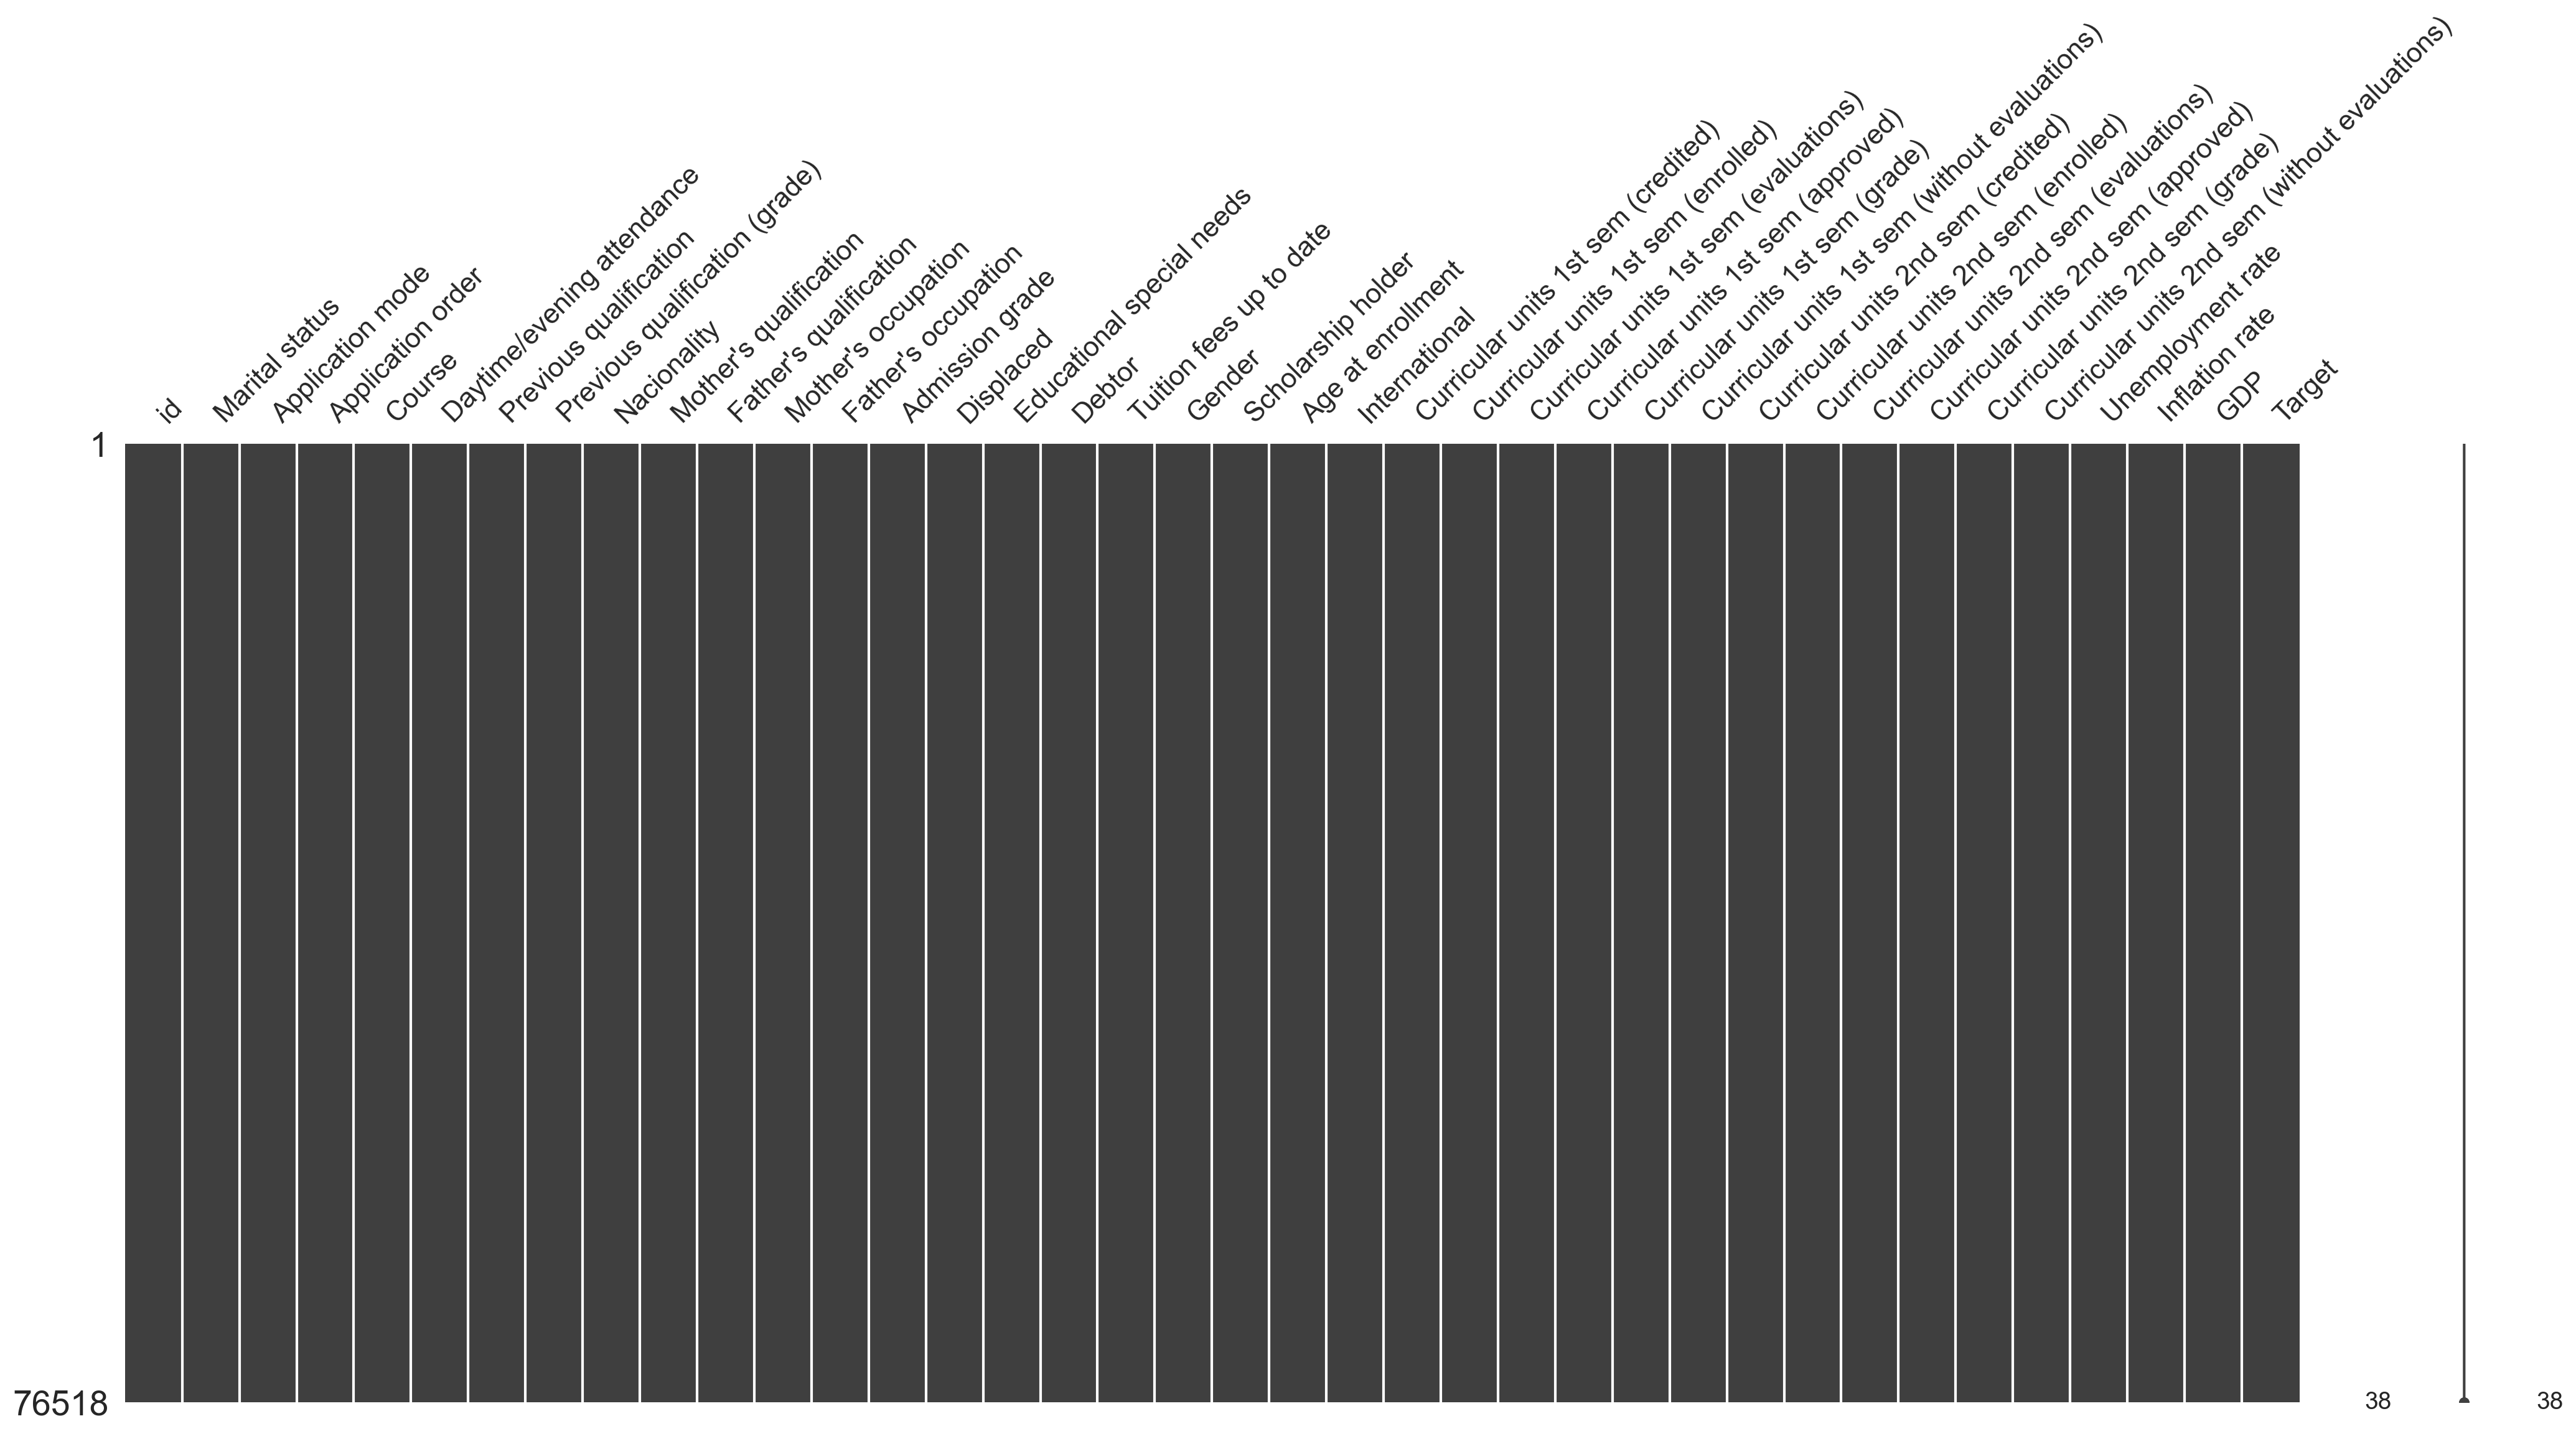

In [19]:
msno.matrix(train_df) ;

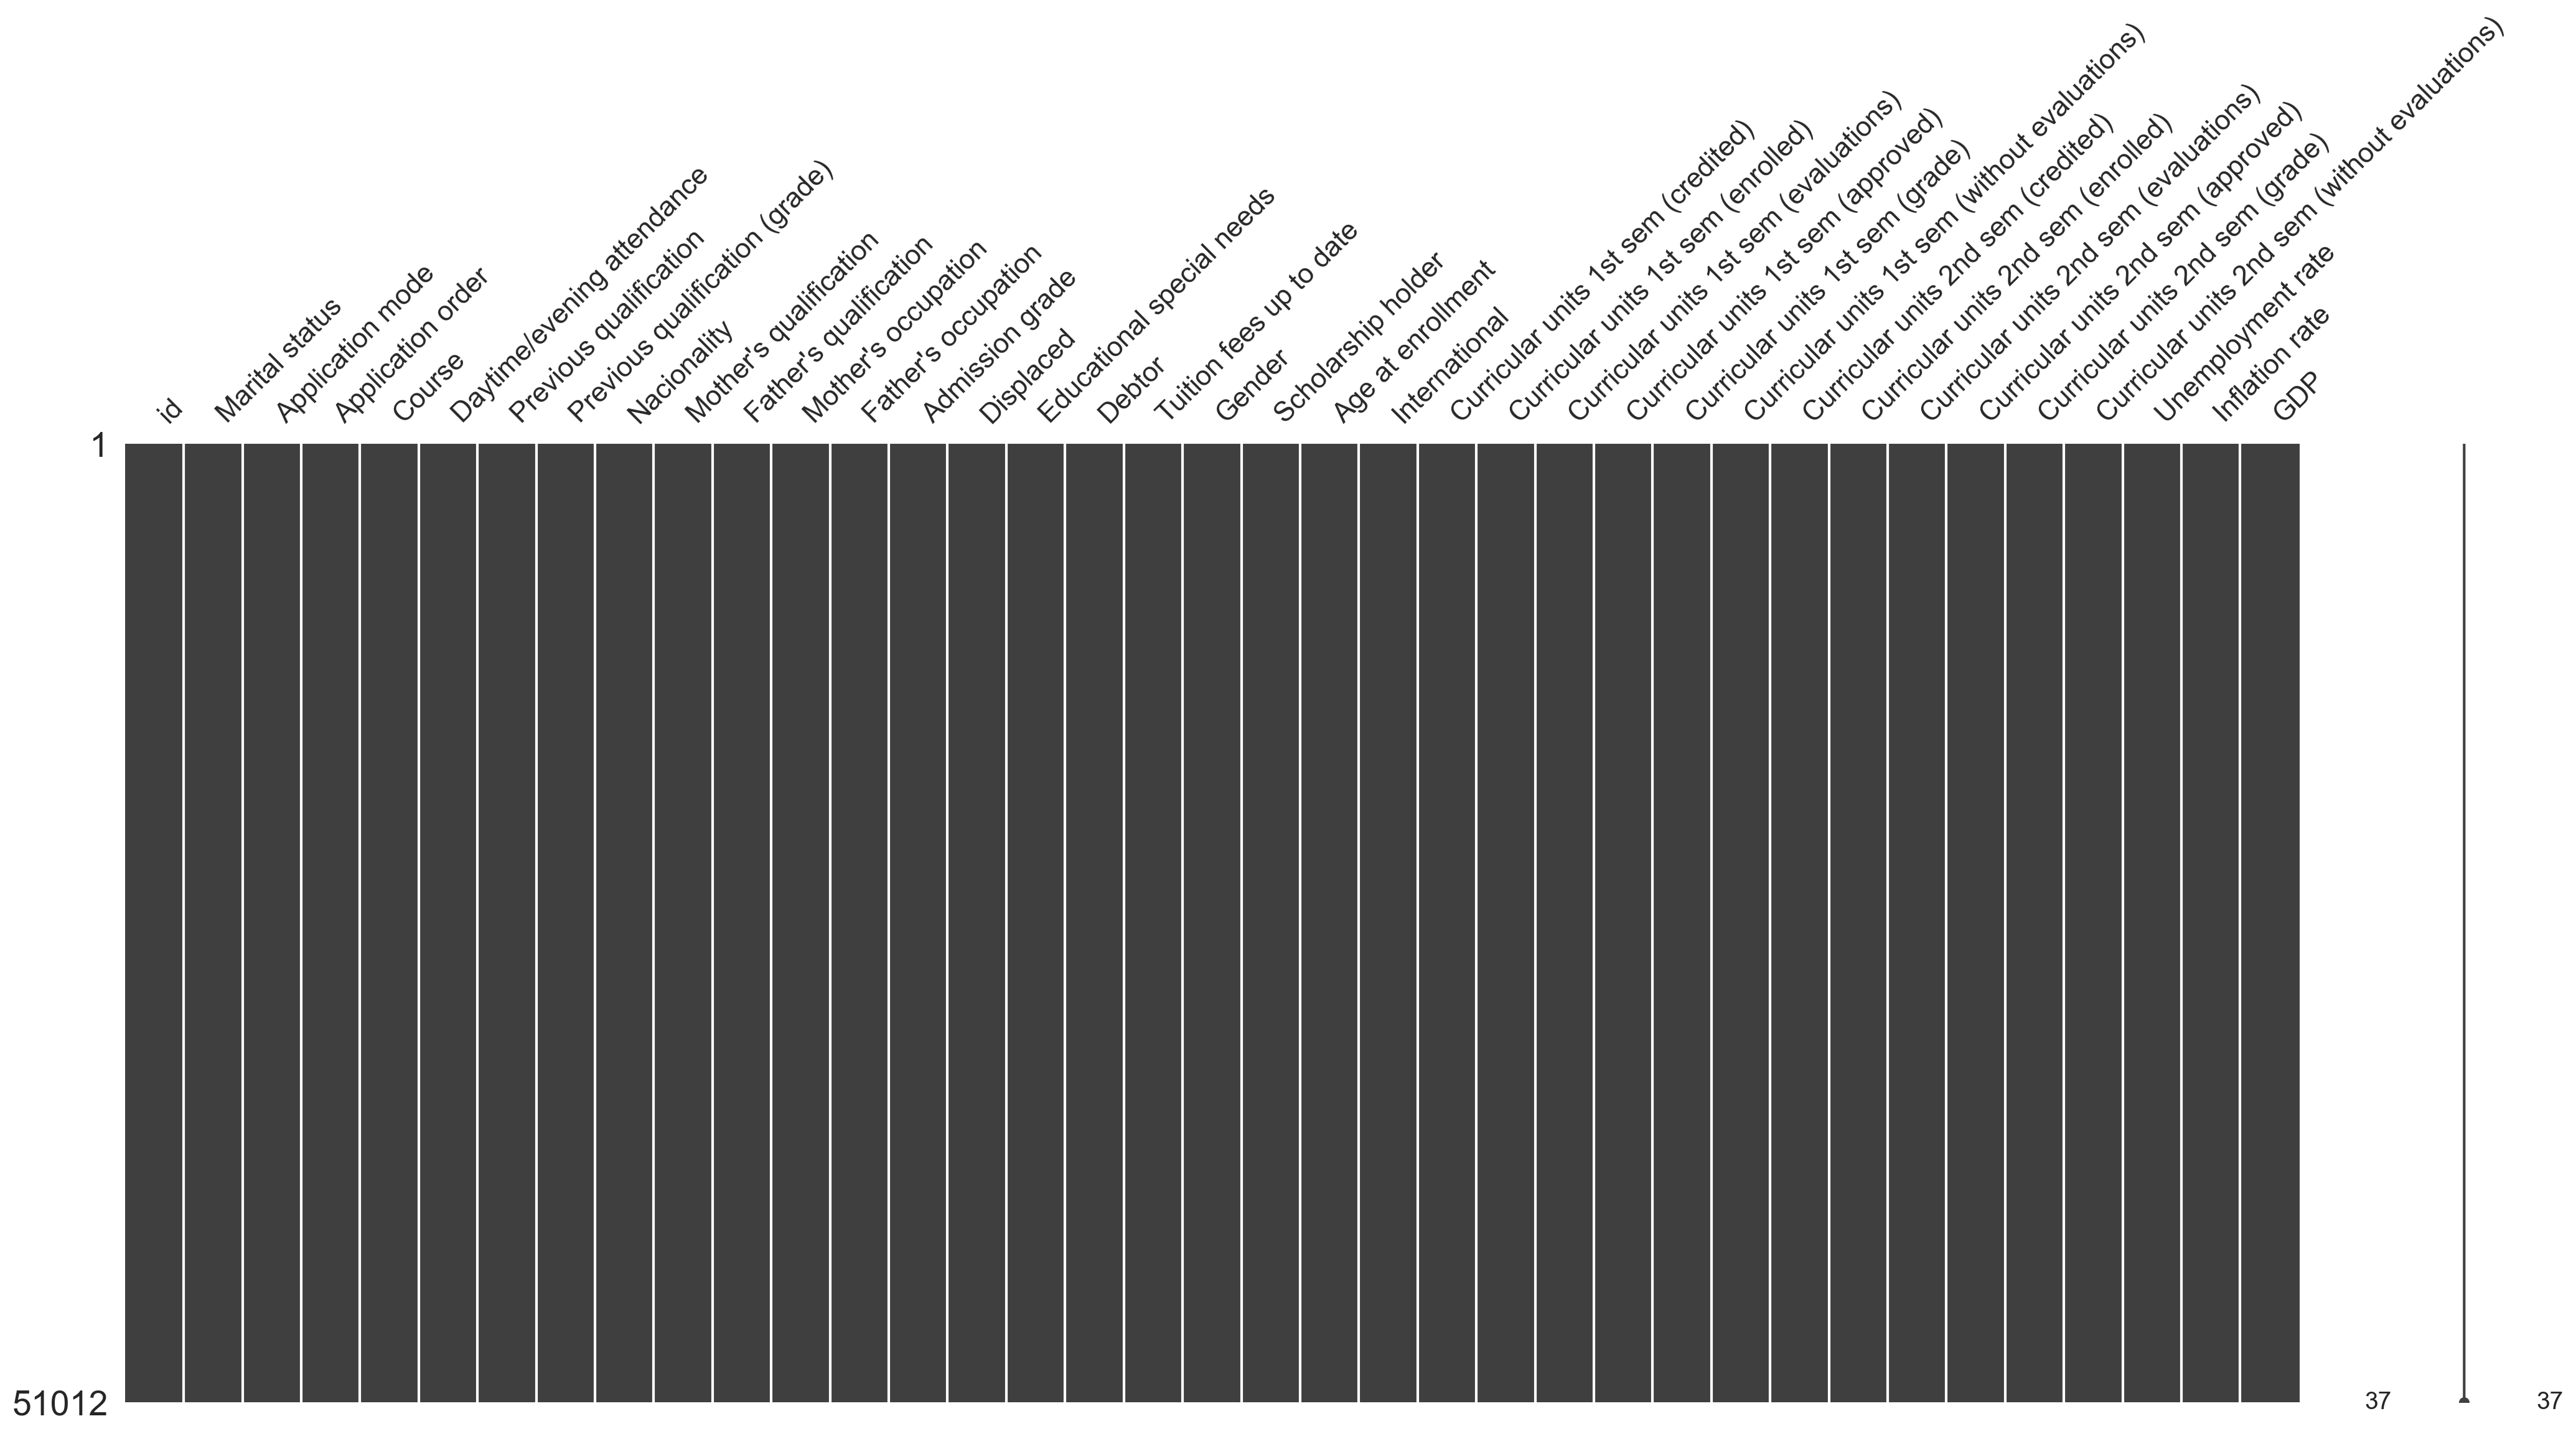

In [20]:
msno.matrix(test_df) ;

### (5) Unique Values
- feature 마다 유니크 값의 갯수가 다르다.
- 대부분 feature가 숫자형 데이터로 이루어져 있으나, 범주형 값을 숫자 데이터로 나타낸 것으로 보인다.
- Target feature의 유니트 데이터
   - Graduate, Dropout, Enrolled
   - **데이터의 종속변수는 다중 클래스에 해당한다.**

In [14]:
# train_df.nunique()

count_unique = []
for col in train_df.columns[1:] : 
    count_unique.append(pd.DataFrame({"count": len(train_df[col].value_counts().index)}, index=[col]))
    
train_count_unique_df = pd.concat(count_unique, axis=0)
train_count_unique_df

count
Marital status                                      6
Application mode                                   22
Application order                                   8
Course                                             19
Daytime/evening attendance                          2
Previous qualification                             21
Previous qualification (grade)                    110
Nacionality                                        18
Mother's qualification                             35
Father's qualification                             39
Mother's occupation                                40
Father's occupation                                56
Admission grade                                   668
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder                                  2
Age at enrollment                                  46
International                                       2
Curricular units 1st sem (credited)                21
Curricular units 1st sem (enrolled)                24
Curricular units 1st sem (evaluations)             36
Curricular units 1st sem (approved)                23
Curricular units 1st sem (grade)                 1206
Curricular units 1st sem (without evaluations)     12
Curricular units 2nd sem (credited)                20
Curricular units 2nd sem (enrolled)                22
Curricular units 2nd sem (evaluations)             31
Curricular units 2nd sem (approved)                21
Curricular units 2nd sem (grade)                 1234
Curricular units 2nd sem (without evaluations)     11
Unemployment rate                                  11
Inflation rate                                     13
GDP                                                11
Target                                              3

In [22]:
train_df["Target"].unique()

array(['Graduate', 'Dropout', 'Enrolled'], dtype=object)

### (6) Distribution of Features
- Feature 별 분포의 특징을 시각적으로 확인하여 numeric, categorical feature로 구분한다.
   - 모든 feature의 데이터는 정수 또는 실수로 이루어져 있다. 
   - unique data, 분포의 형태 등을 파악하여 numeric 또는 categorical feature의 특징을 찾는다.  
   - UCI API에서 임포트한 원본 데이터의 feature information 데이터로부터 각 feature 별 값의 원래 명칭을 확인해 본다.
- 좋은 성능의 모델을 만들기 위해서 feature의 dtype을 어떻게 설정하느냐가 중요하다.
   - numeric, categorical feature로 구분되면 각 type별로 전처리, 엔지니어링을 적용하는 방법이 달라지기 때문이다.

### UCI 원본 데이터의 feature 설명 정보 확인
- feature별 unique 데이터의 meta data 확인을 위한 원본 데이터 임포트
   - unique 데이터의 양식이 다양해서 정리하기 힘듦

In [8]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [98]:
from ucimlrepo import fetch_ucirepo

student_data = fetch_ucirepo(id=697)
feature_info = student_data.variables
feature_info.head()

name     role     type     demographic  \
0              Marital Status  Feature  Integer  Marital Status   
1            Application mode  Feature  Integer            None   
2           Application order  Feature  Integer            None   
3                      Course  Feature  Integer            None   
4  Daytime/evening attendance  Feature  Integer            None   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           description  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated   
1  1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International)   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Application order (between 0 - first choice; and 9 last choice)   
3                                                                                                                                                                                                               33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance)   
4                                                                                                                                                                                                                   

In [99]:
def get_feature_desc(col) : 
    
    '''
    UCI 패키지에서 feature 별 unique 데이터의 description을 반환하는 함수
    '''
    
    desc = feature_info.query("name == @col")["description"].values[0]
    
    return desc

### feature의 unique data 분포

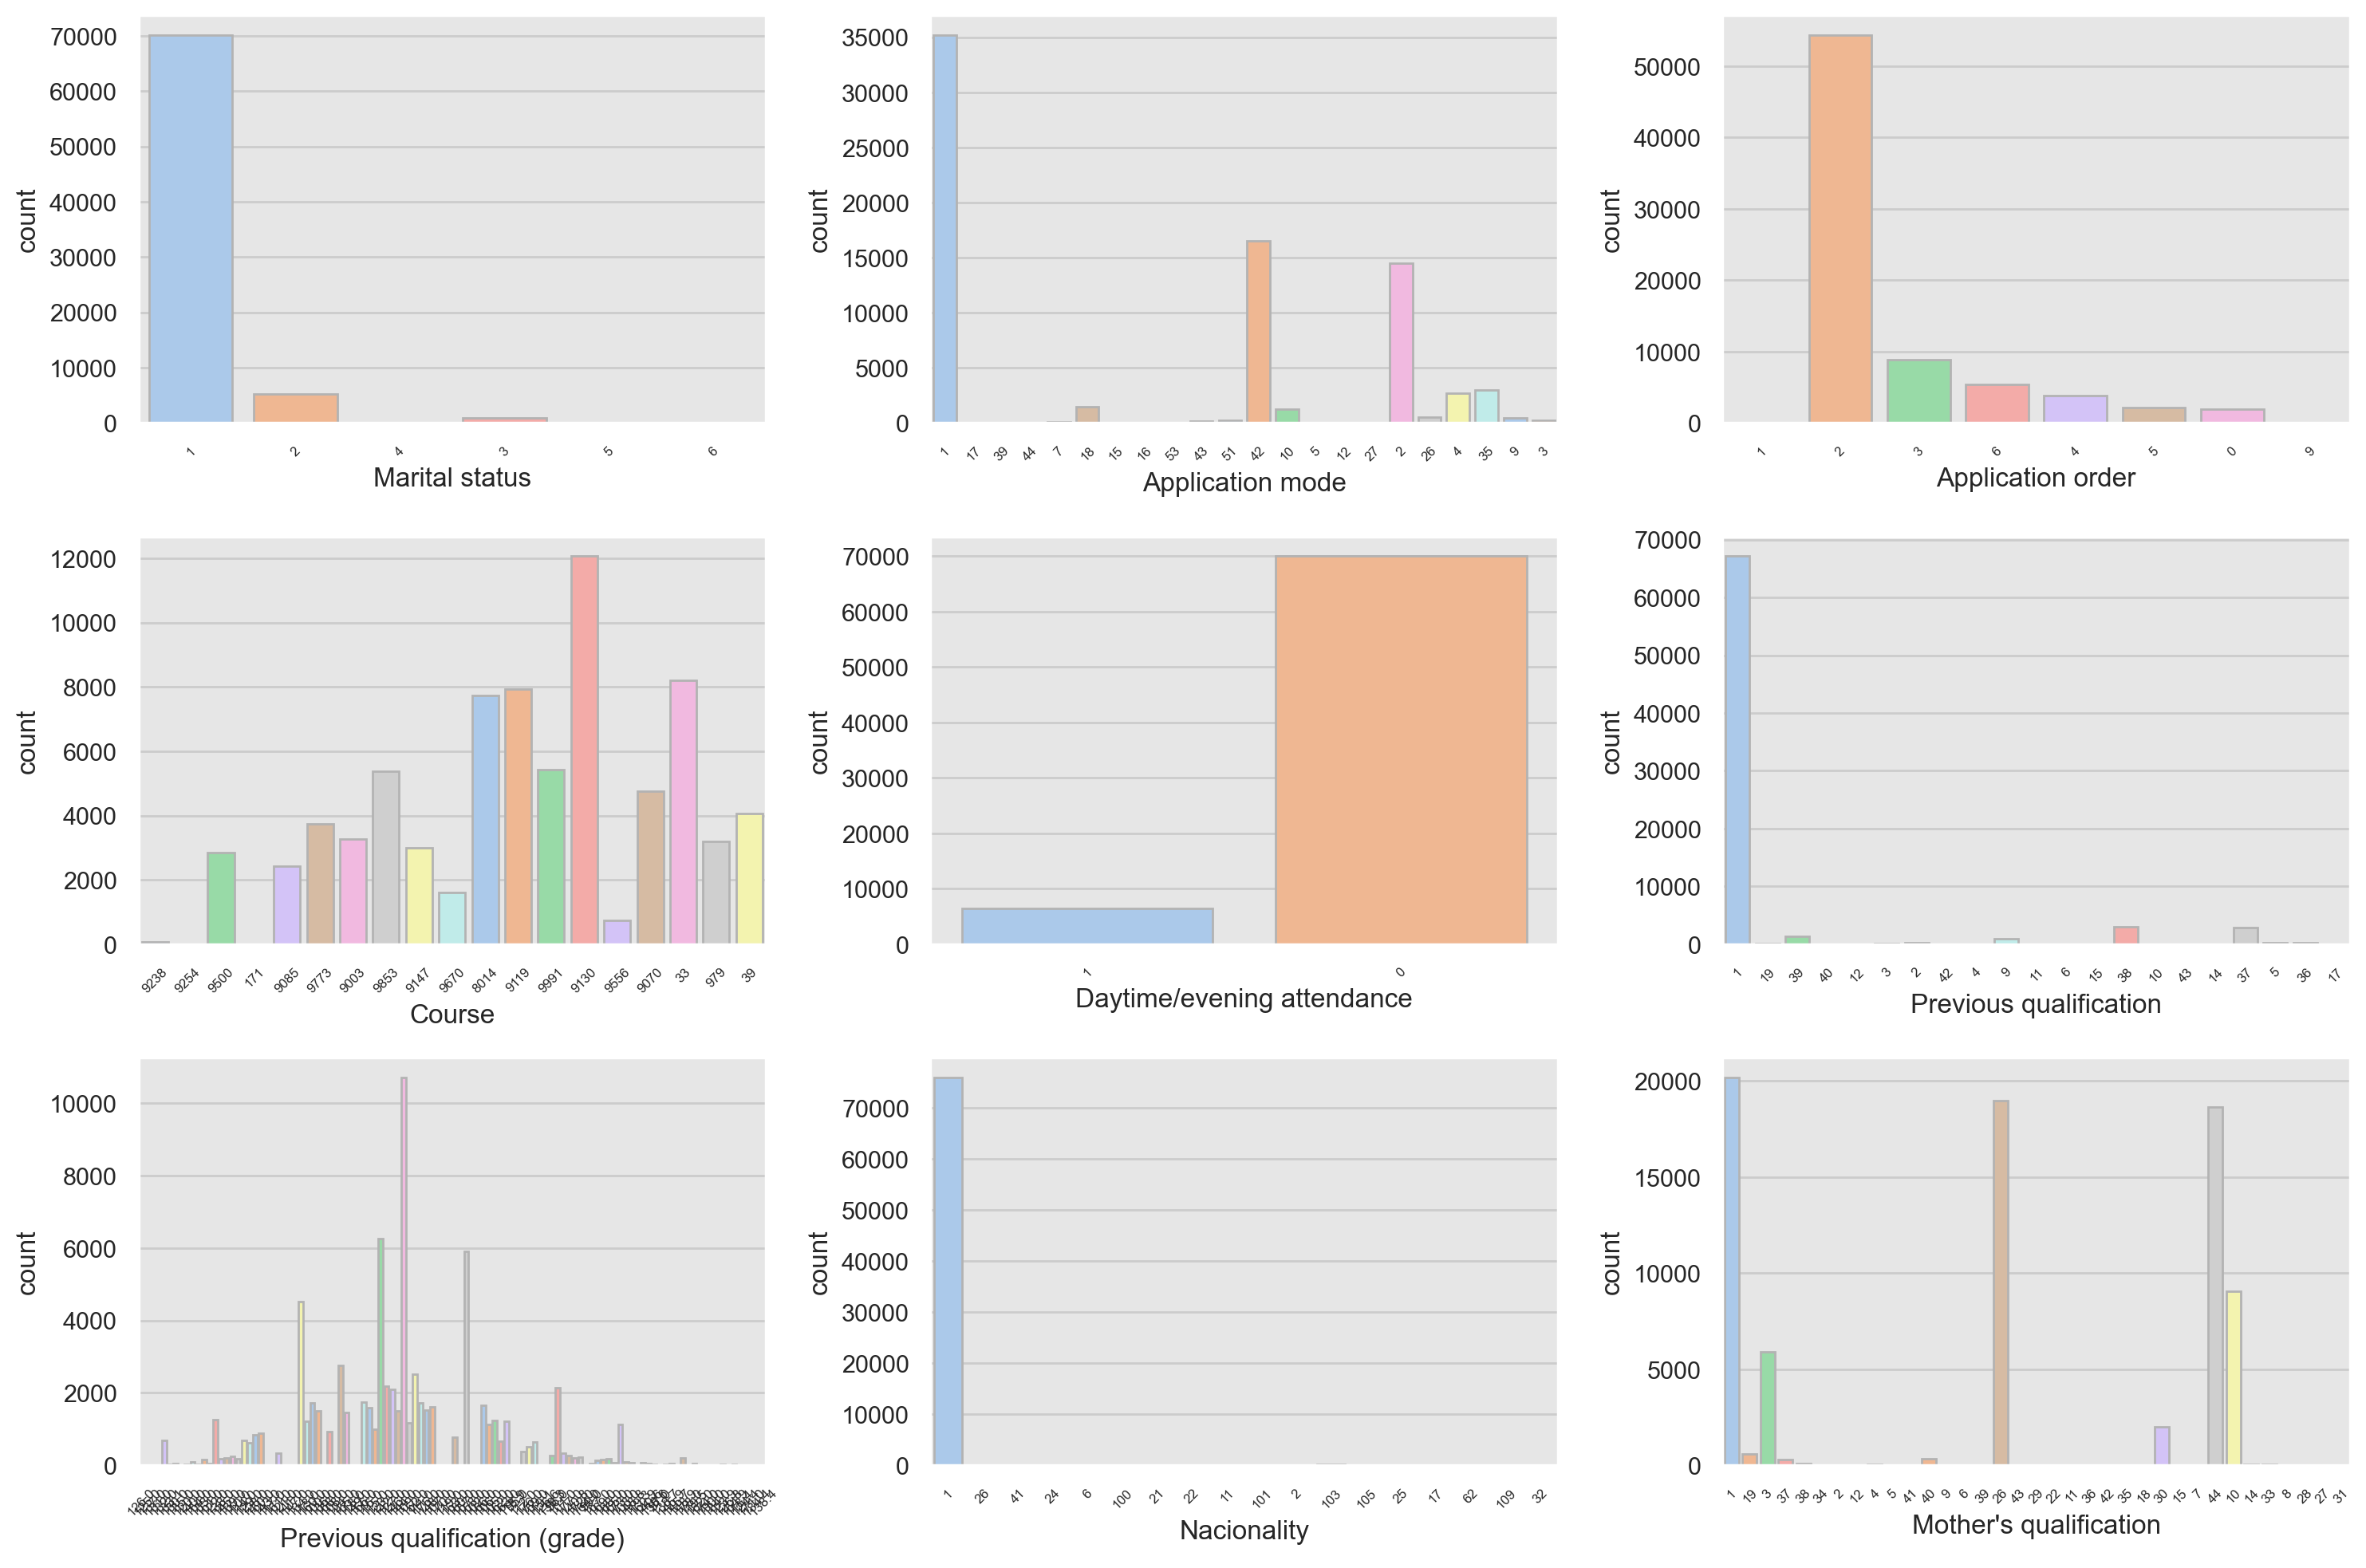

In [29]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(train_df.columns[1:10]) : 
    ax = axes[i]
    g = sns.countplot(
        data=train_df,
        x=col,
        palette="pastel",
        edgecolor=".7",
        ax=ax
    )
    g.set_xticklabels(labels=train_df[col].unique(), rotation=45, fontsize=6, ha="center")
fig.tight_layout() ; 

### unique data desc

In [24]:
get_feature_desc("Marital Status")

'1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated'

In [25]:
get_feature_desc("Course")

'33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance)'

In [26]:
get_feature_desc("Nacionality")

'1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian'

### feature의 unique data 분포

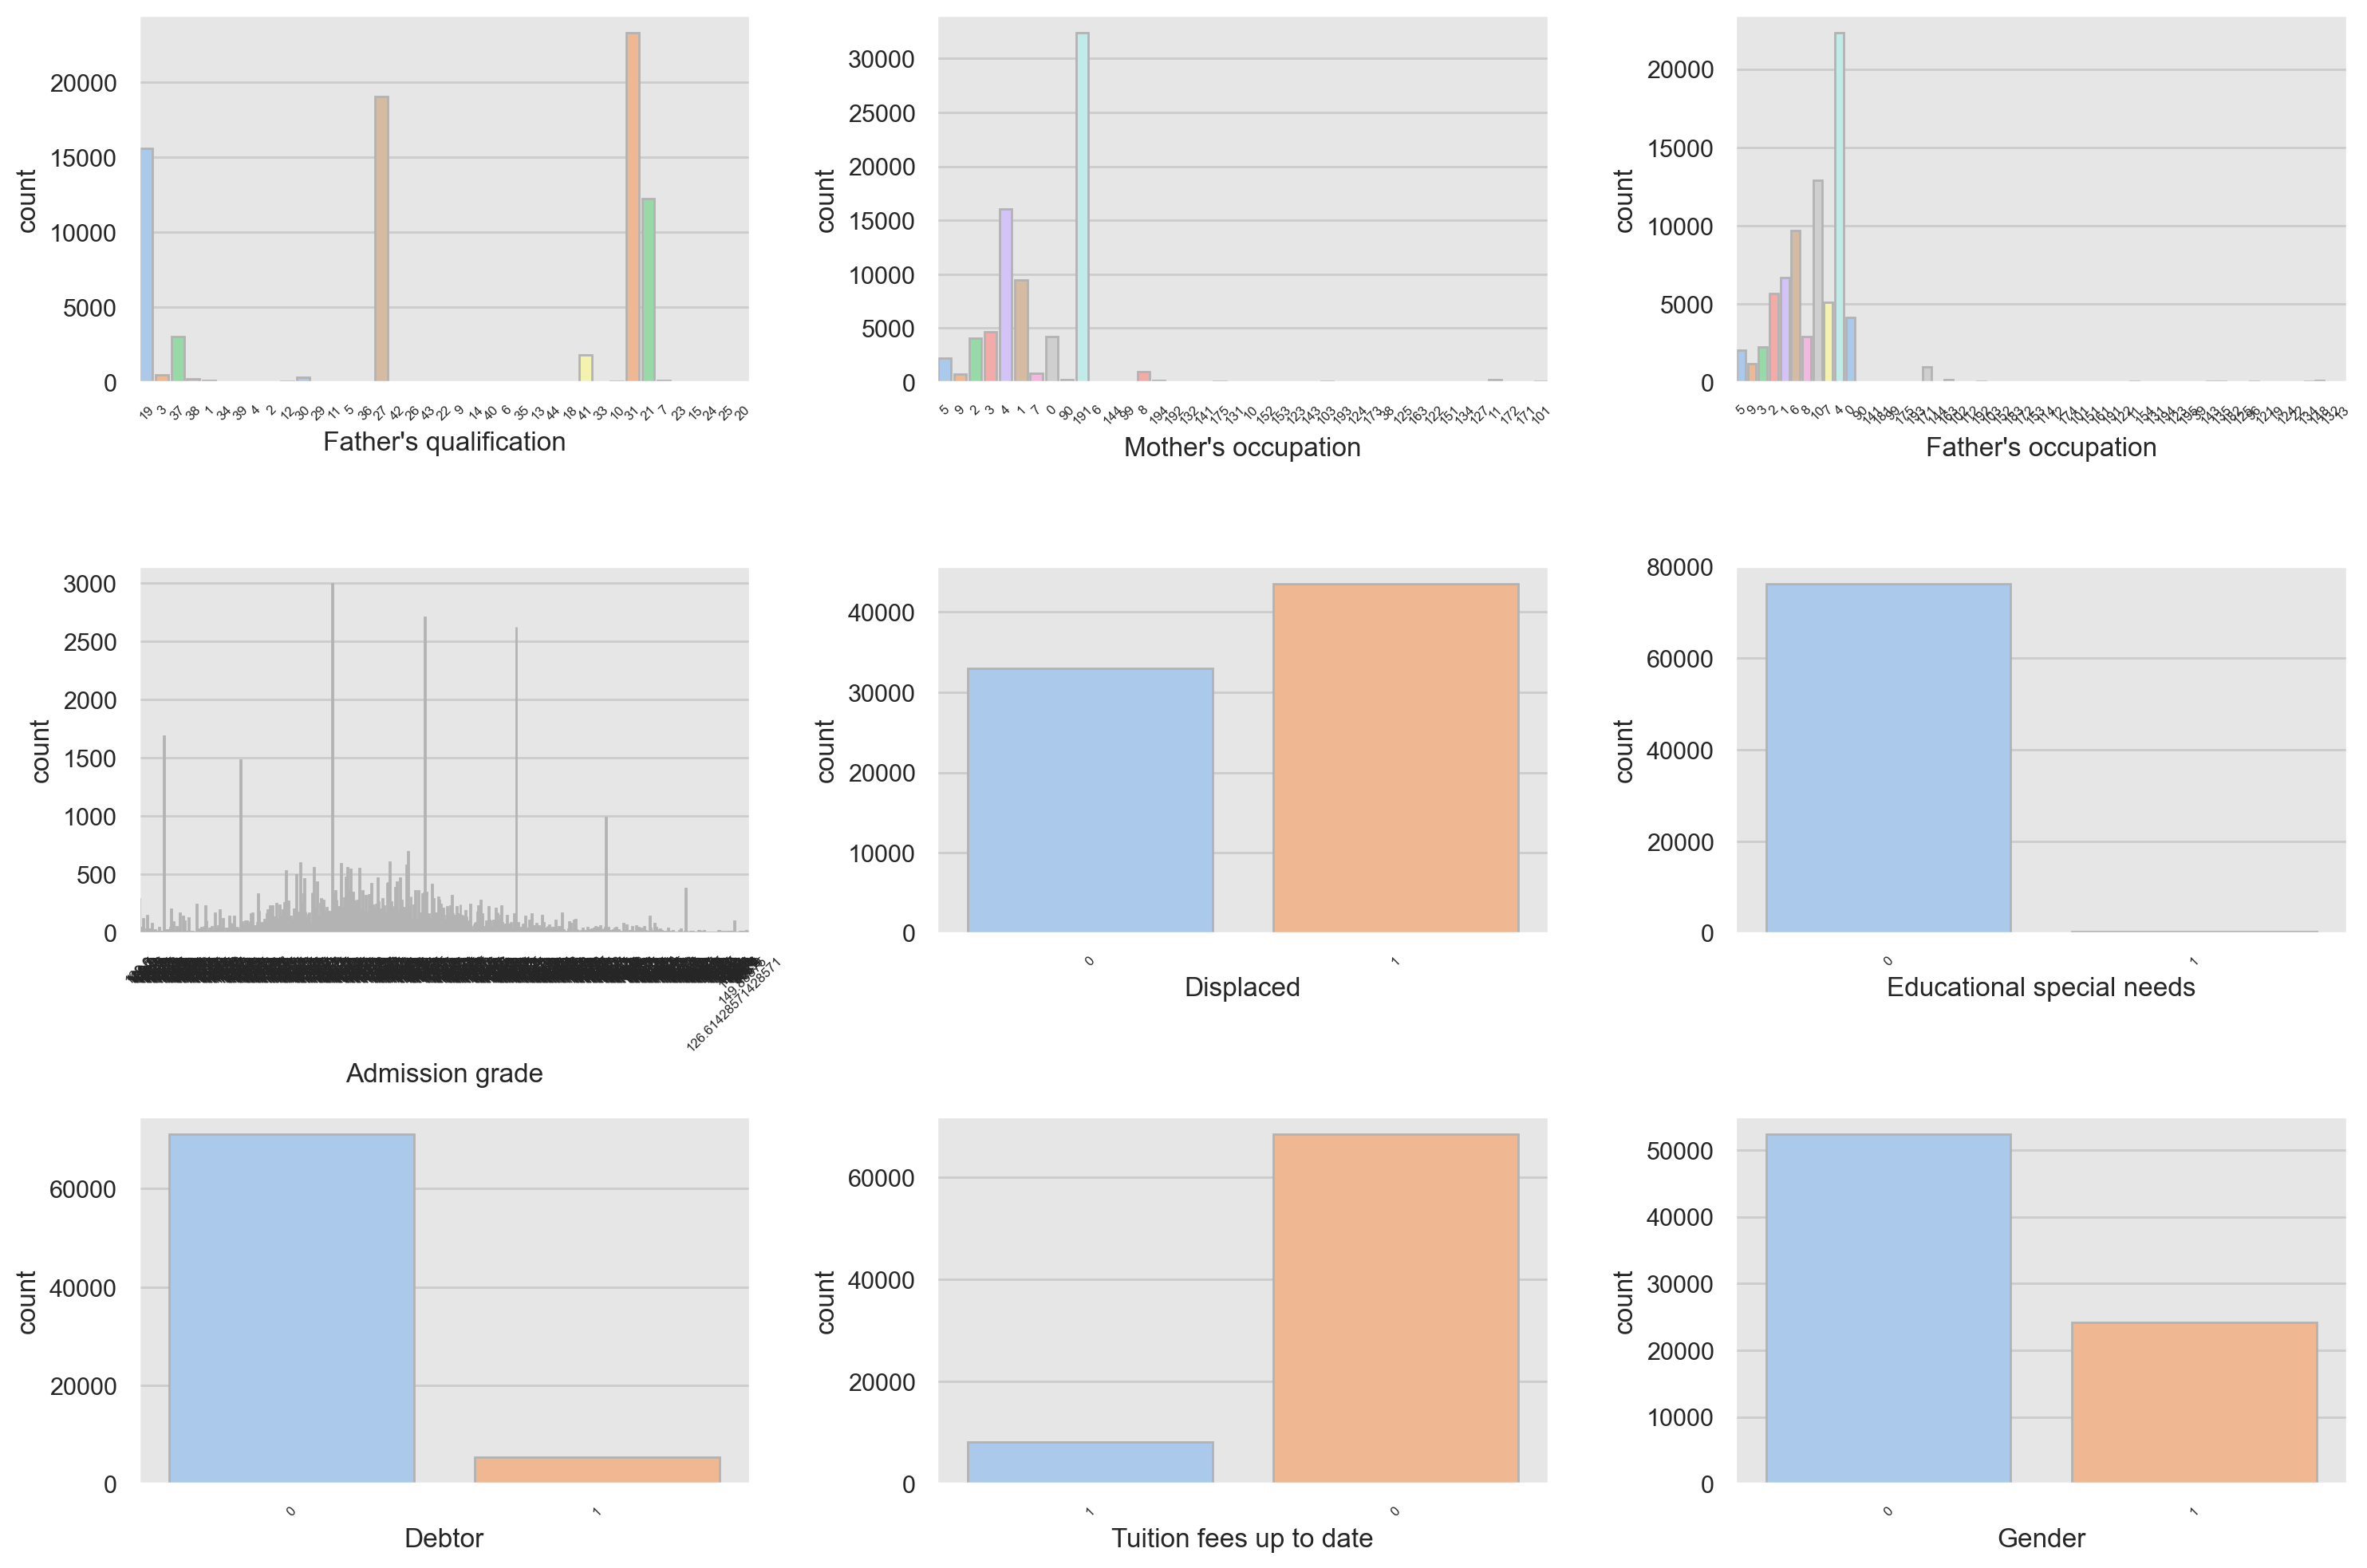

In [33]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(train_df.columns[10:19]) : 
    ax = axes[i]
    g = sns.countplot(
        data=train_df,
        x=col,
        palette="pastel",
        edgecolor=".7",
        ax=ax
    )
    g.set_xticklabels(labels=train_df[col].unique(), rotation=45, fontsize=6, ha="center")
fig.tight_layout() ; 

### unique data desc

In [27]:
# 어머니의 직업

get_feature_desc("Mother's occupation")

'0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and 

In [28]:
# 난민여부

get_feature_desc("Displaced")

'1 – yes 0 – no'

In [29]:
# 채무여부

get_feature_desc("Debtor")

'1 – yes 0 – no'

### feature의 unique data 분포

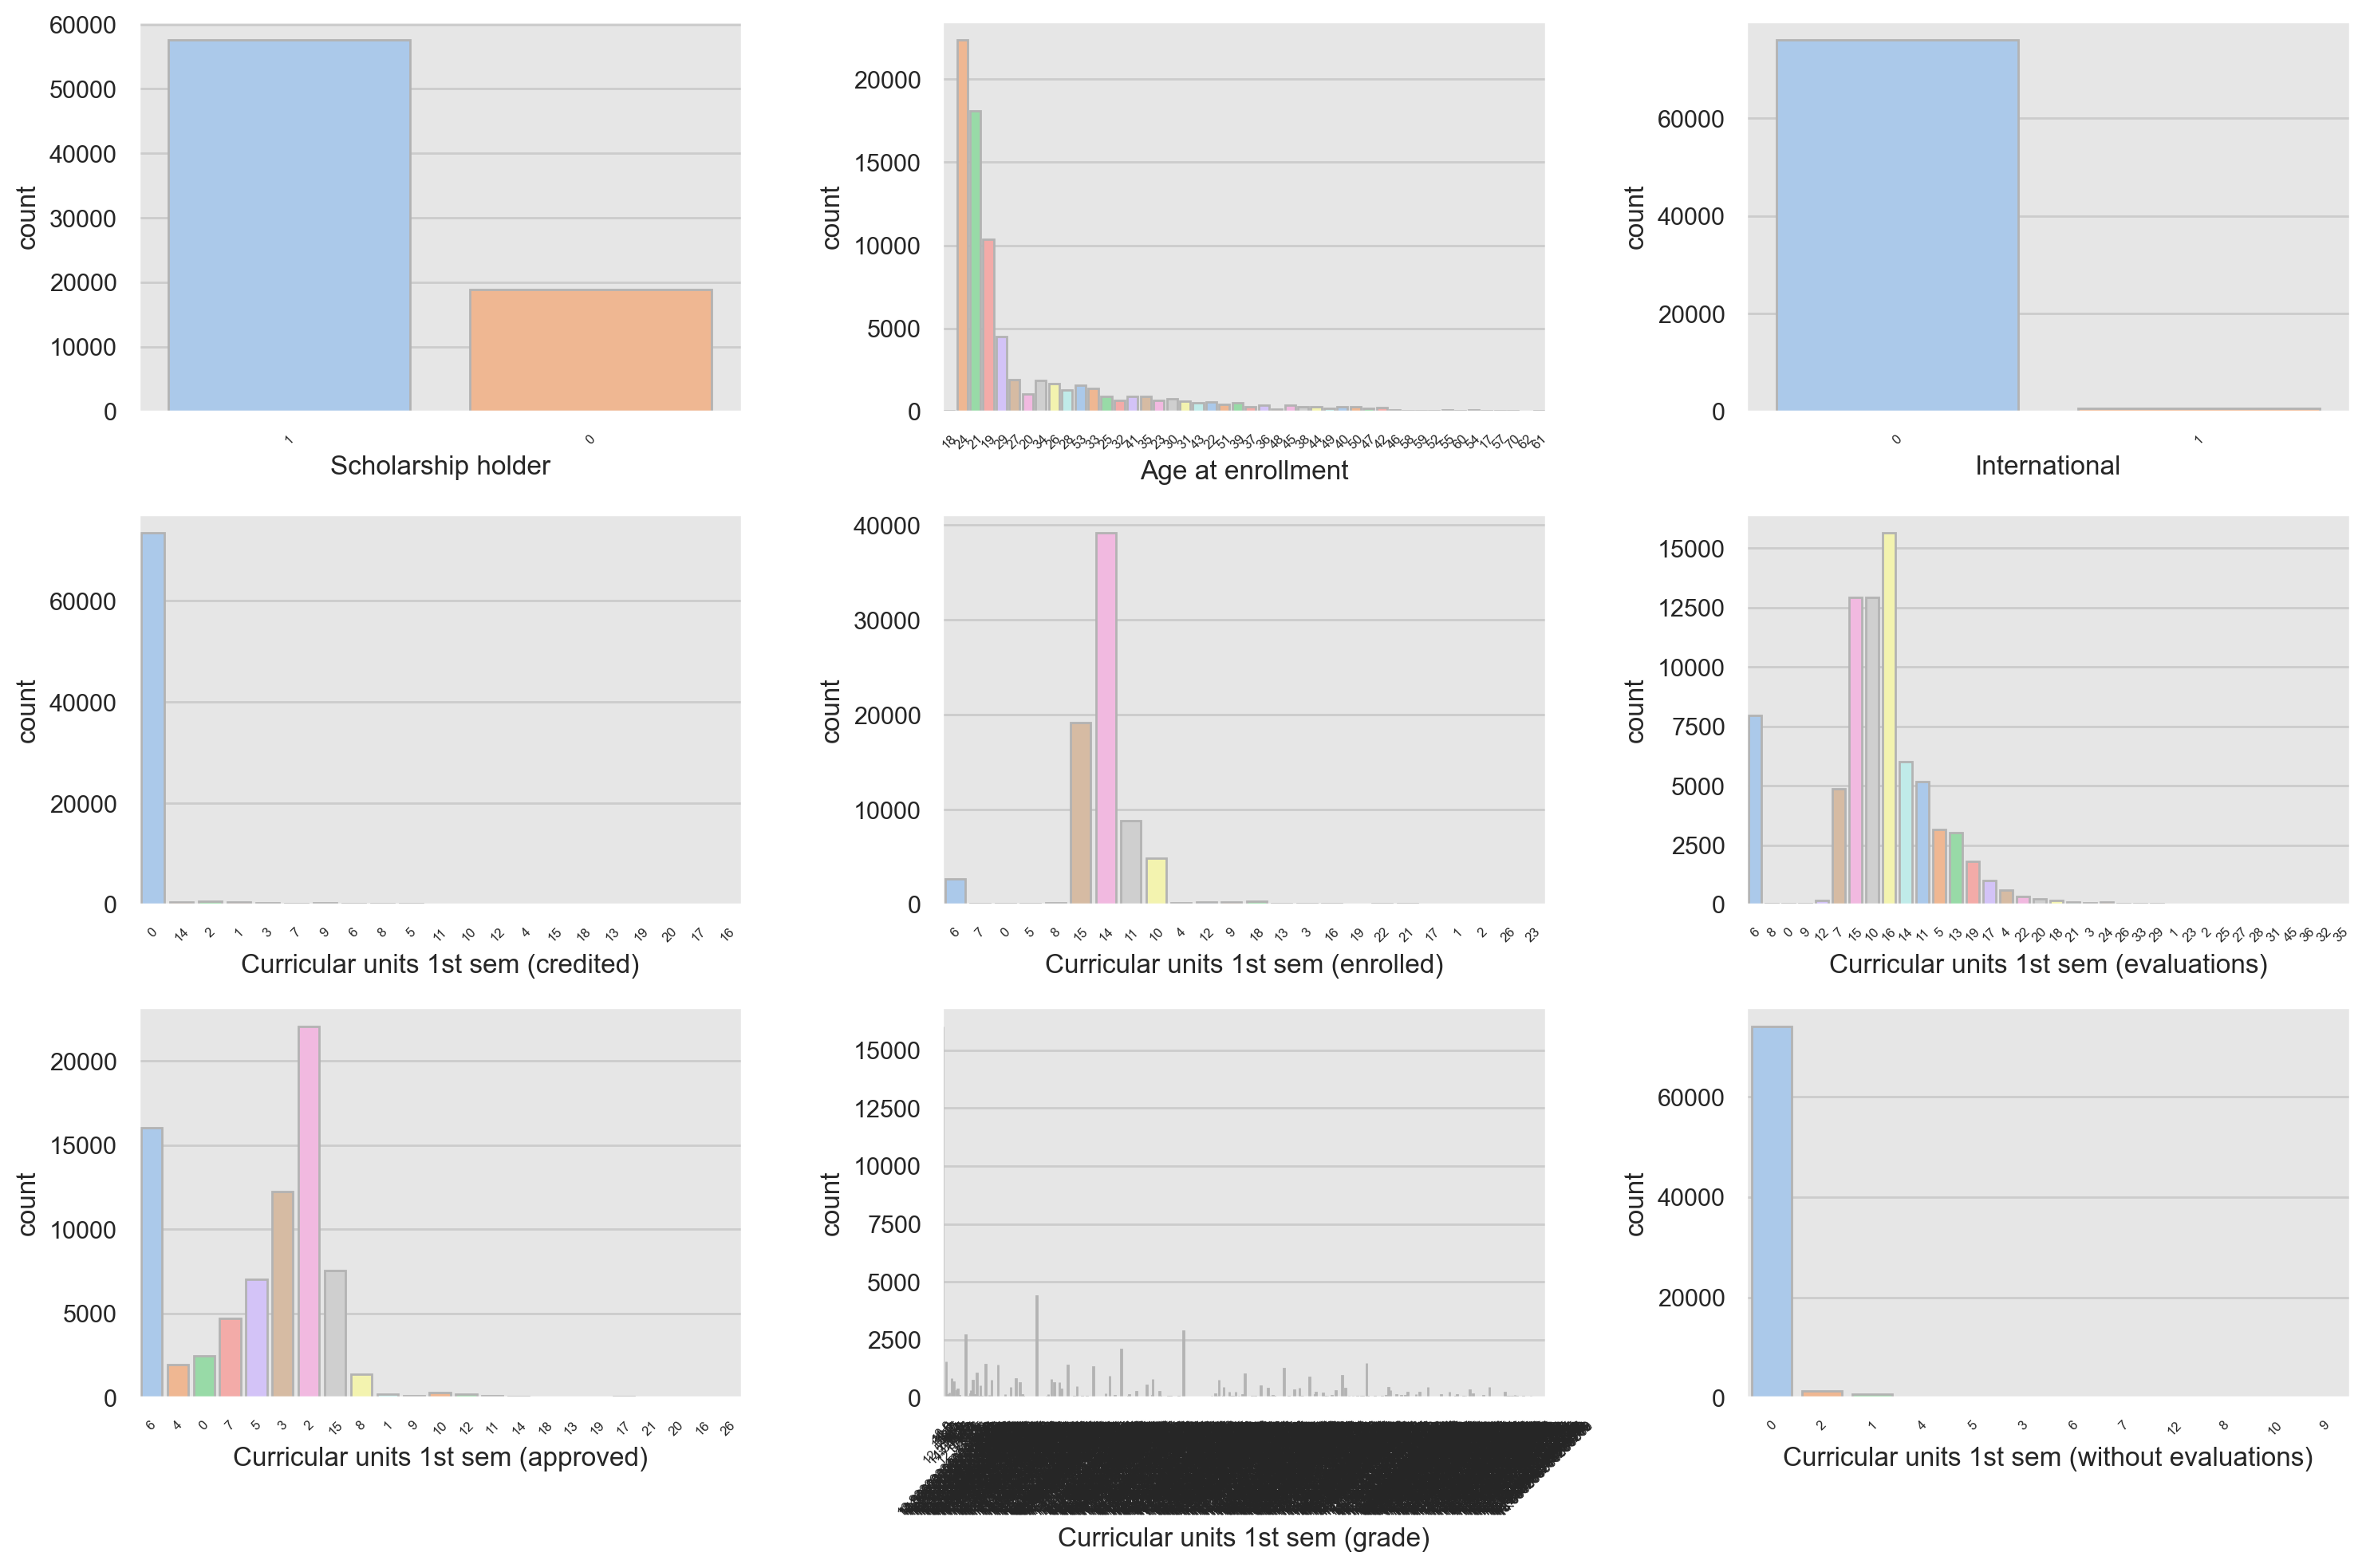

In [37]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(train_df.columns[19:28]) : 
    ax = axes[i]
    g = sns.countplot(
        data=train_df,
        x=col,
        palette="pastel",
        edgecolor=".7",
        ax=ax
    )
    g.set_xticklabels(labels=train_df[col].unique(), rotation=45, fontsize=6, ha="center")
fig.tight_layout() ; 

### unique data desc

In [30]:
# 학위소지 여부

get_feature_desc("Scholarship holder")

'1 – yes 0 – no'

In [31]:
# 외국인 여부

get_feature_desc("International")

'1 – yes 0 – no'

In [32]:
# 교과단위 1학기 학점

get_feature_desc("Curricular units 1st sem (credited)")

'Number of curricular units credited in the 1st semester'

### feature의 unique data 분포

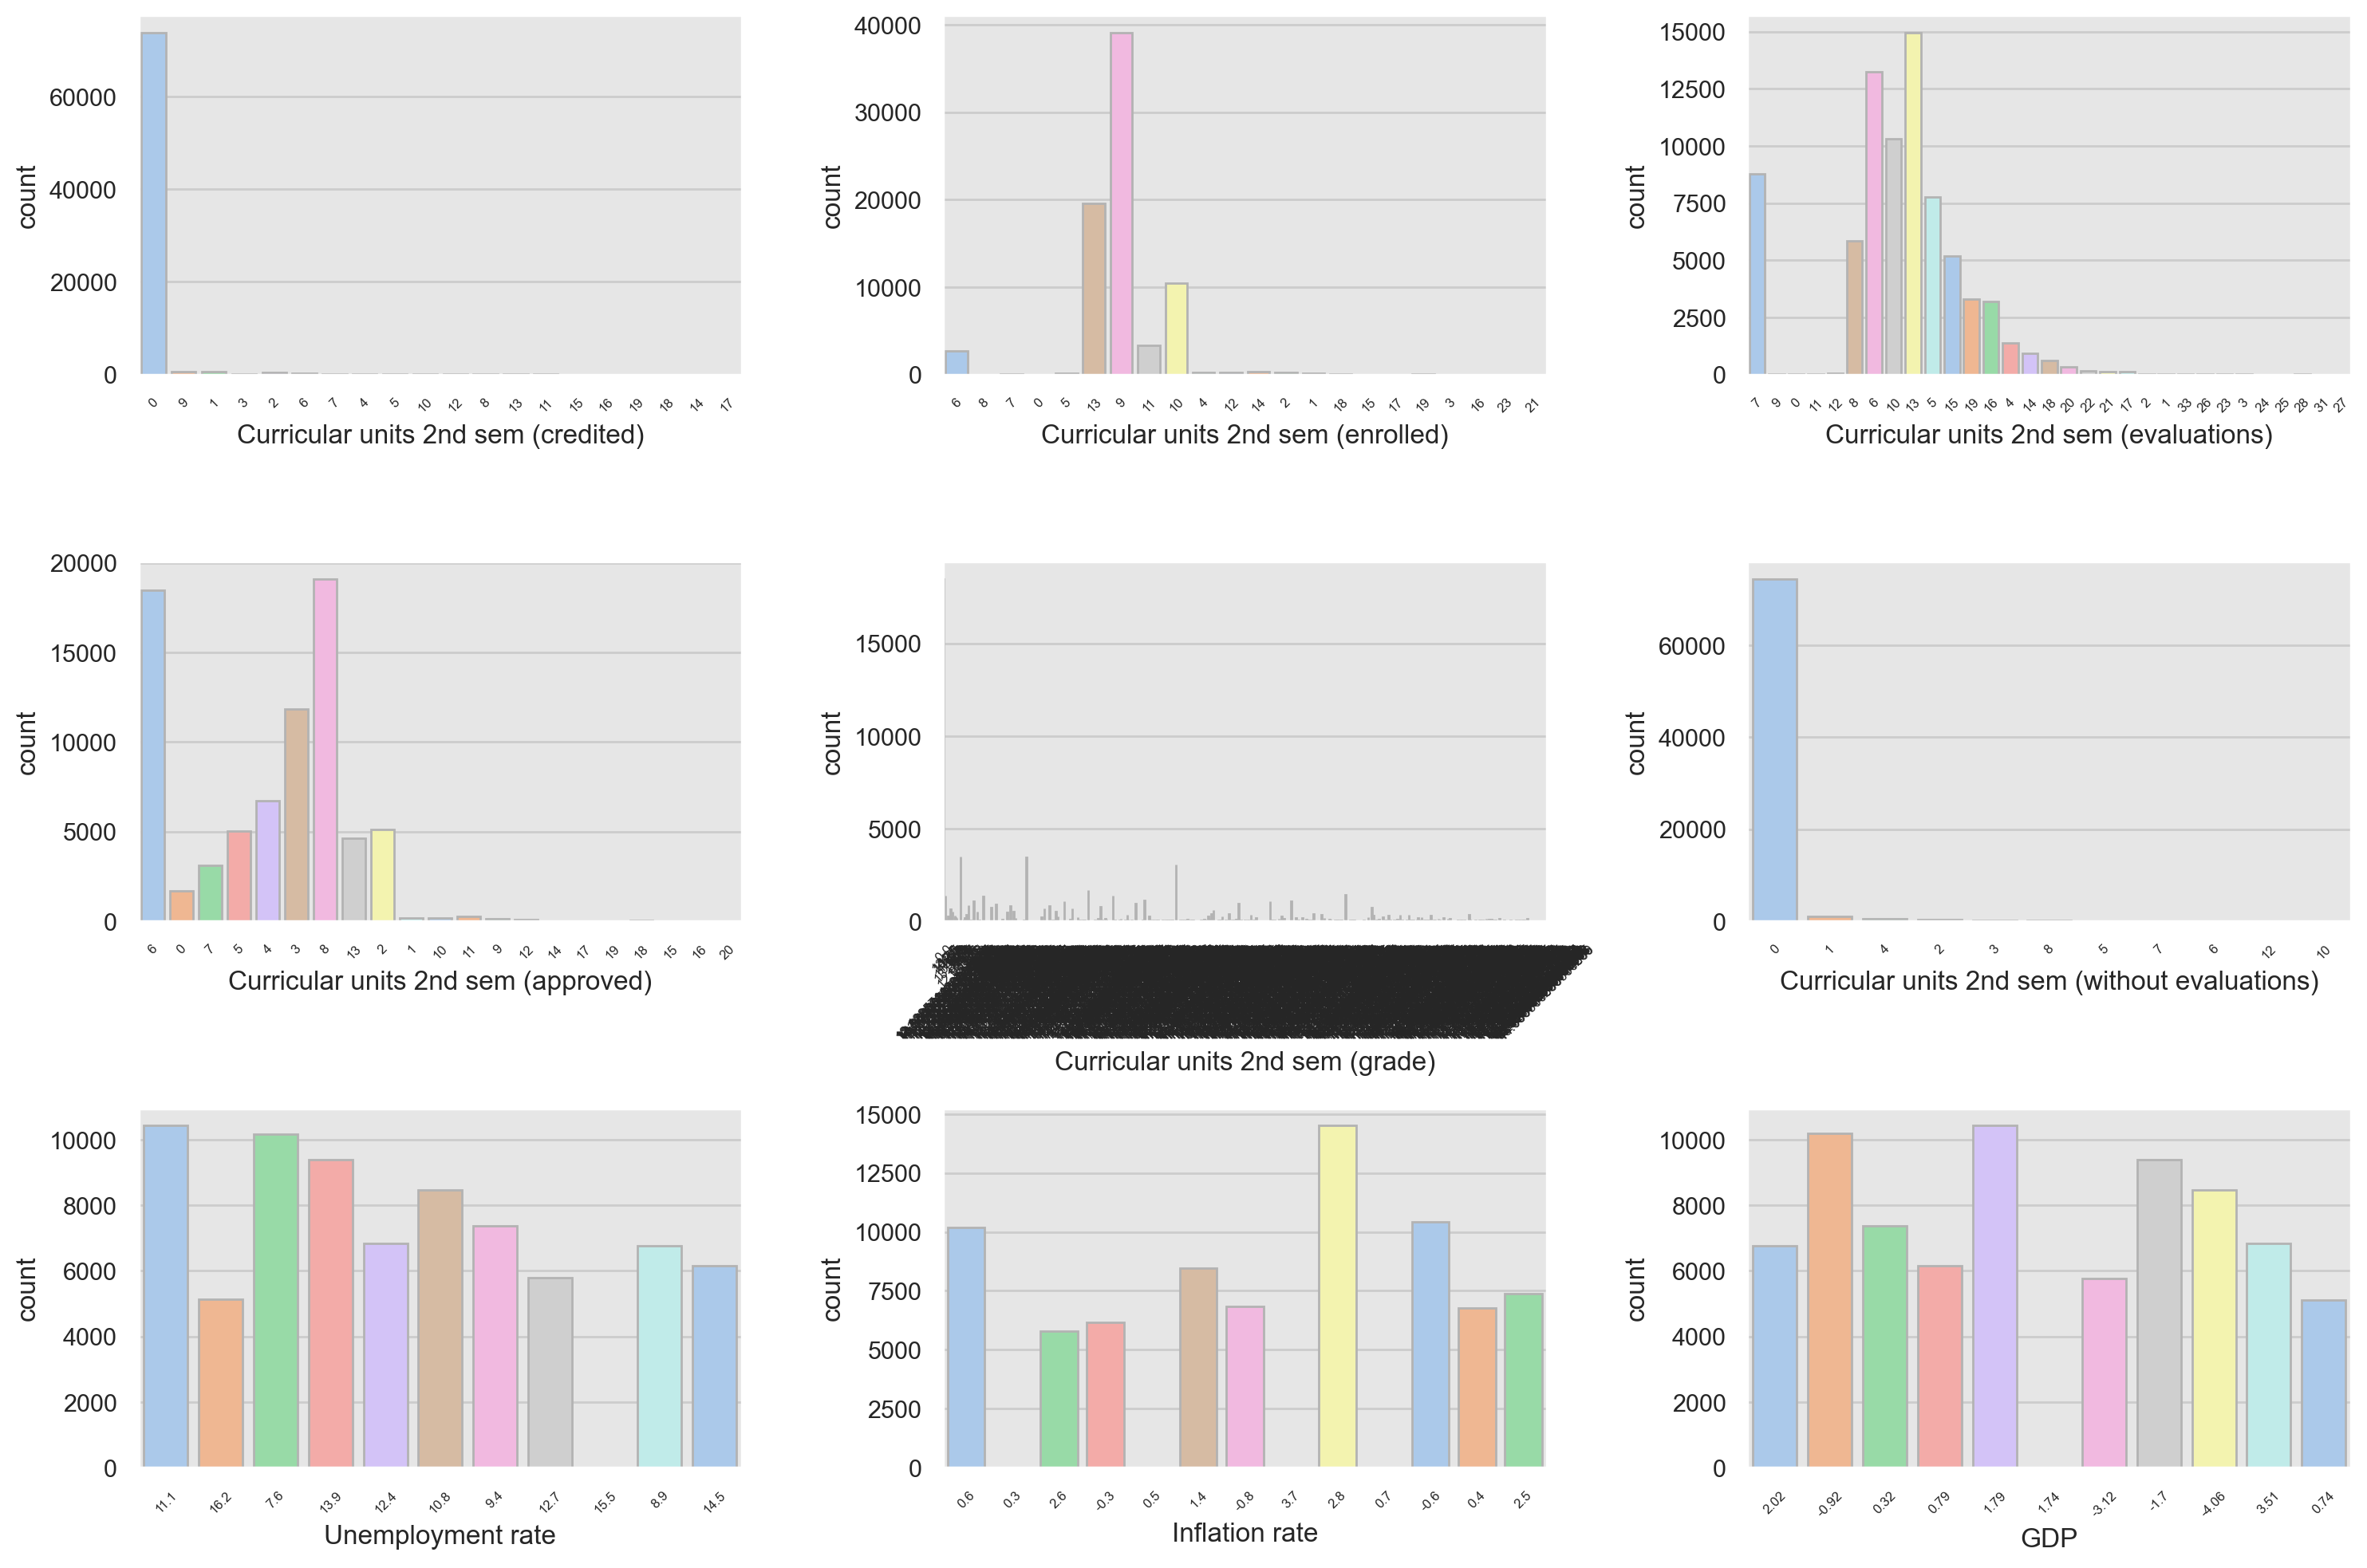

In [41]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()
for i, col in enumerate(train_df.columns[28:37]) : 
    ax = axes[i]
    g = sns.countplot(
        data=train_df,
        x=col,
        palette="pastel",
        edgecolor=".7",
        ax=ax
    )
    g.set_xticklabels(labels=train_df[col].unique(), rotation=45, fontsize=6, ha="center")
fig.tight_layout() ; 

### unique data desc

In [33]:
# 실업율

get_feature_desc("Unemployment rate")

'Unemployment rate (%)'

In [34]:
# 물가 상승률

get_feature_desc("Inflation rate")

'Inflation rate (%)'

In [35]:
# GDP : 국내총생산

get_feature_desc("GDP")

'GDP'

### Target feature의 unique data 분포
- 멀티 클래스 feature

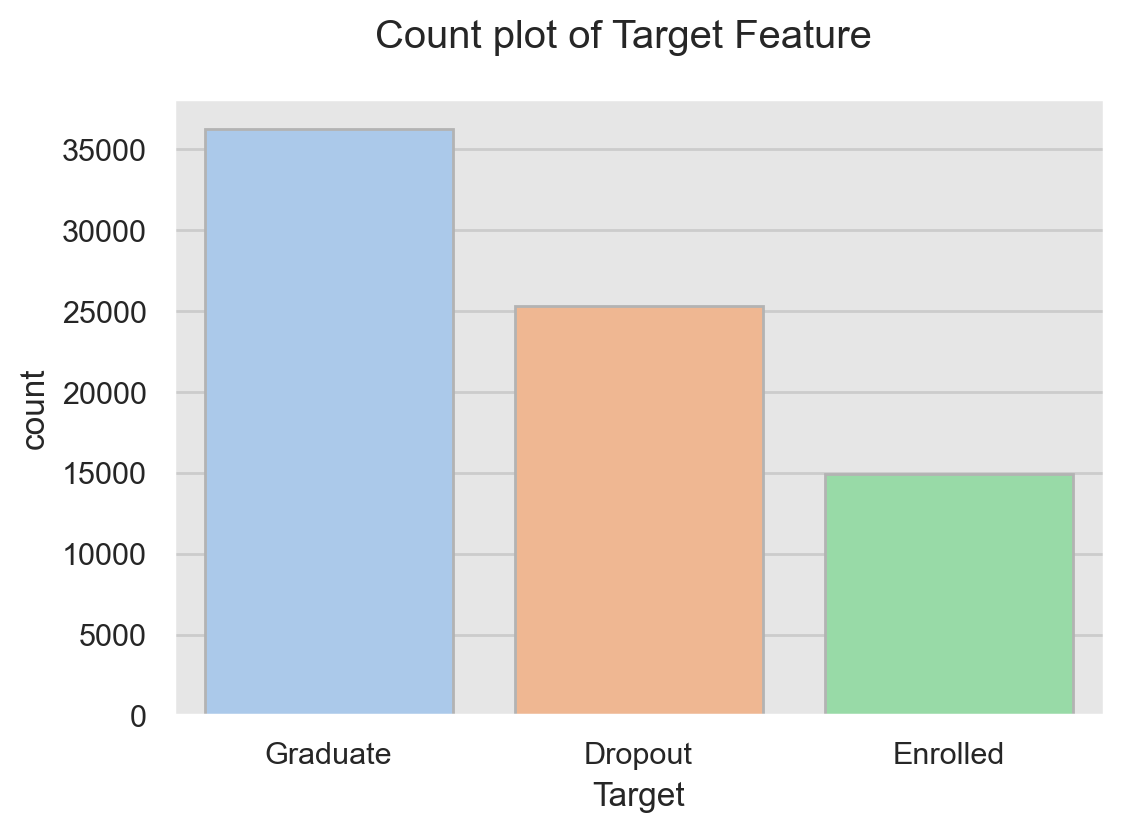

In [45]:
fig, ax = plt.subplots()
sns.countplot(
    data=train_df,
    x="Target",
    palette="pastel",
    edgecolor=".7"
) 
fig.suptitle("Count plot of Target Feature");

### (7) numeric, categorical features
- numeric features : 크기 비교가 가능한 데이터
   - grade features : 등급에 관한 컬럼
   - rage features : 비율에 과한 컬럼
   - age features : 나이에 관한 컬럼
   - curricular features : 교과과목의 수에 관한 컬럼
      - UCI 페이지에서 해당 컬럼의 유니크 값의 의미를 확인하면 범주형 데이터가 아닌 숫자 데이터라는 것을 알 수 있다.
      - "Number of curricular ~"
- categorical features : binary 데이터, 크기를 비교할 수 없는 값으로 이루어진 feature

### grade features

In [5]:
grade_cols = list(train_df.filter(regex=".*grade").columns)

for col in grade_cols : 
    print(f'''
    * column : {col}
    * type   : {feature_info.query("name == @col")["type"].values[0]}
    * length : {len(train_df[col].unique())}
    * unique : {np.sort(train_df[col].unique()[:30])}
    ''')


    * column : Previous qualification (grade)
    * type   : Continuous
    * length : 110
    * unique : [110.  113.  114.  117.  120.  121.  122.  125.  126.  128.  129.  130.
 131.  132.  133.  133.1 134.  135.  137.  138.  139.  140.  141.  143.
 145.  147.  150.  151.  154.  161. ]
    

    * column : Admission grade
    * type   : Continuous
    * length : 668
    * unique : [100.  107.7 110.  114.3 119.7 119.8 120.1 120.8 121.5 122.6 126.1 126.8
 127.3 128.  130.  131.9 132.1 133.  133.1 133.9 134.5 134.9 135.1 140.
 141.8 142.8 144.7 147.5 154.  170. ]
    

    * column : Curricular units 1st sem (grade)
    * type   : Integer
    * length : 1206
    * unique : [ 0.         10.         10.5        10.8        10.92307692 11.
 11.25       11.6        11.66666667 11.77777778 11.8        11.83333333
 12.         12.25       12.4        12.58571429 12.59125    12.63333333
 12.75       12.93333333 12.96666667 13.         13.07571429 13.33333333
 13.3475     13.83333333 14.1666666

### ratio features

In [6]:
ratio_cols = list(train_df.filter(regex=".rate").columns) + ["GDP"]

for col in ratio_cols : 
    print(f'''
    * column : {col}
    * type   : {feature_info.query("name == @col")["type"].values[0]}
    * length : {len(train_df[col].unique())}
    * unique : {np.sort(train_df[col].unique()[:50])}
    ''')


    * column : Unemployment rate
    * type   : Continuous
    * length : 11
    * unique : [ 7.6  8.9  9.4 10.8 11.1 12.4 12.7 13.9 14.5 15.5 16.2]
    

    * column : Inflation rate
    * type   : Continuous
    * length : 13
    * unique : [-0.8 -0.6 -0.3  0.3  0.4  0.5  0.6  0.7  1.4  2.5  2.6  2.8  3.7]
    

    * column : GDP
    * type   : Continuous
    * length : 11
    * unique : [-4.06 -3.12 -1.7  -0.92  0.32  0.74  0.79  1.74  1.79  2.02  3.51]
    



### age features

In [7]:
age_cols = list(train_df.filter(regex="^Age").columns)

for col in age_cols : 
    print(f'''
    * column : {col}
    * type   : {feature_info.query("name == @col")["type"].values[0]}
    * length : {len(train_df[col].unique())}
    * unique : {np.sort(train_df[col].unique()[:50])}
    ''')


    * column : Age at enrollment
    * type   : Integer
    * length : 46
    * unique : [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 57 58 59 60 61 62 70]
    


### Number of curricular units features

In [8]:
curricular_cols = list(train_df.filter(regex="^Curricular").columns)

for col in curricular_cols : 
    print(f'''
    * column : {col}
    * type   : {feature_info.query("name == @col")["type"].values[0]}
    * length : {len(train_df[col].unique())}
    * unique : {np.sort(train_df[col].unique()[:30])}
    ''')


    * column : Curricular units 1st sem (credited)
    * type   : Integer
    * length : 21
    * unique : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
    

    * column : Curricular units 1st sem (enrolled)
    * type   : Integer
    * length : 24
    * unique : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21 22 23 26]
    

    * column : Curricular units 1st sem (evaluations)
    * type   : Integer
    * length : 36
    * unique : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 29 33]
    

    * column : Curricular units 1st sem (approved)
    * type   : Integer
    * length : 23
    * unique : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 26]
    

    * column : Curricular units 1st sem (grade)
    * type   : Integer
    * length : 1206
    * unique : [ 0.         10.         10.5        10.8        10.92307692 11.
 11.25       11.6        11.66666667 11.77777778 11.8        11.833333

### numeric features

In [9]:
# set() : 중복 데이터 제거

numeric_features = grade_cols + ratio_cols + age_cols + curricular_cols
numeric_features = list(set(numeric_features))
numeric_features

['Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Curricular units 2nd sem (grade)',
 'Curricular units 1st sem (approved)',
 'GDP',
 'Curricular units 1st sem (enrolled)',
 'Previous qualification (grade)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Inflation rate',
 'Admission grade',
 'Age at enrollment']

### categorical features

In [10]:
categorical_features = list(set(train_df.columns).difference(numeric_features + ["id", "Target"]))
categorical_features

["Father's occupation",
 'Nacionality',
 'Educational special needs',
 'Debtor',
 'Daytime/evening attendance',
 "Mother's qualification",
 'Previous qualification',
 "Father's qualification",
 'Gender',
 'Application mode',
 "Mother's occupation",
 'Application order',
 'Marital status',
 'Displaced',
 'Course',
 'Tuition fees up to date',
 'International',
 'Scholarship holder']

### (8) Association (feature별 연관성)
- indiv features와 target feature 간의 연관성 확인
- 데이터 타입에 따라서 상관관계 계산 함수를 다르게 적용
   - 연속형과 범주형(3개) : Point biserial correlation 계산
   - 범주형(2개)과 범주형(2개) : Chi2 Test, Phi coefficient 계산
   - 범주형(3개)과 범주형(3개) : Chi2 Test, Cramer's V coefficient 계산
- 참고자료
   - https://eunhye-zz.tistory.com/29
   - https://recipesds.tistory.com/entry/%EA%B5%90%EC%B0%A8%EB%B6%84%EC%84%9D%EC%9D%98-%EC%99%84%EC%84%B1-Cross-Tabulation-%CF%87%C2%B2-Testing-Cramer-V-%EC%97%B0%EA%B4%80%EB%8F%84

### temp df

In [143]:
# Target data Encoded

mapper = {"Graduate": 0, "Dropout": 1, "Enrolled": 2}
encoded_target = train_df["Target"].map(mapper)

# temp df
temp_train_df = train_df.copy()
temp_train_df["Target"] = encoded_target
temp_train_df = temp_train_df.drop(["id"], axis=1) # data index remove
temp_train_df["Target"].unique()

array([0, 1, 2], dtype=int64)

### numeric features와 Target의 correlation
- Target이 3개의 범주형 데이터로 이루어져 있으므로 polyserial correlation 방법을 사용하려고 했으나 구현 방법을 찾지 못함. 대신 연속형과 범주형 2개 데이터의 상관관계를 구하는 pointbiserialr 패키지를 사용하여 계산
   - pearson 방법으로 계산한 것과 같음

In [144]:
from scipy import stats
from itertools import product

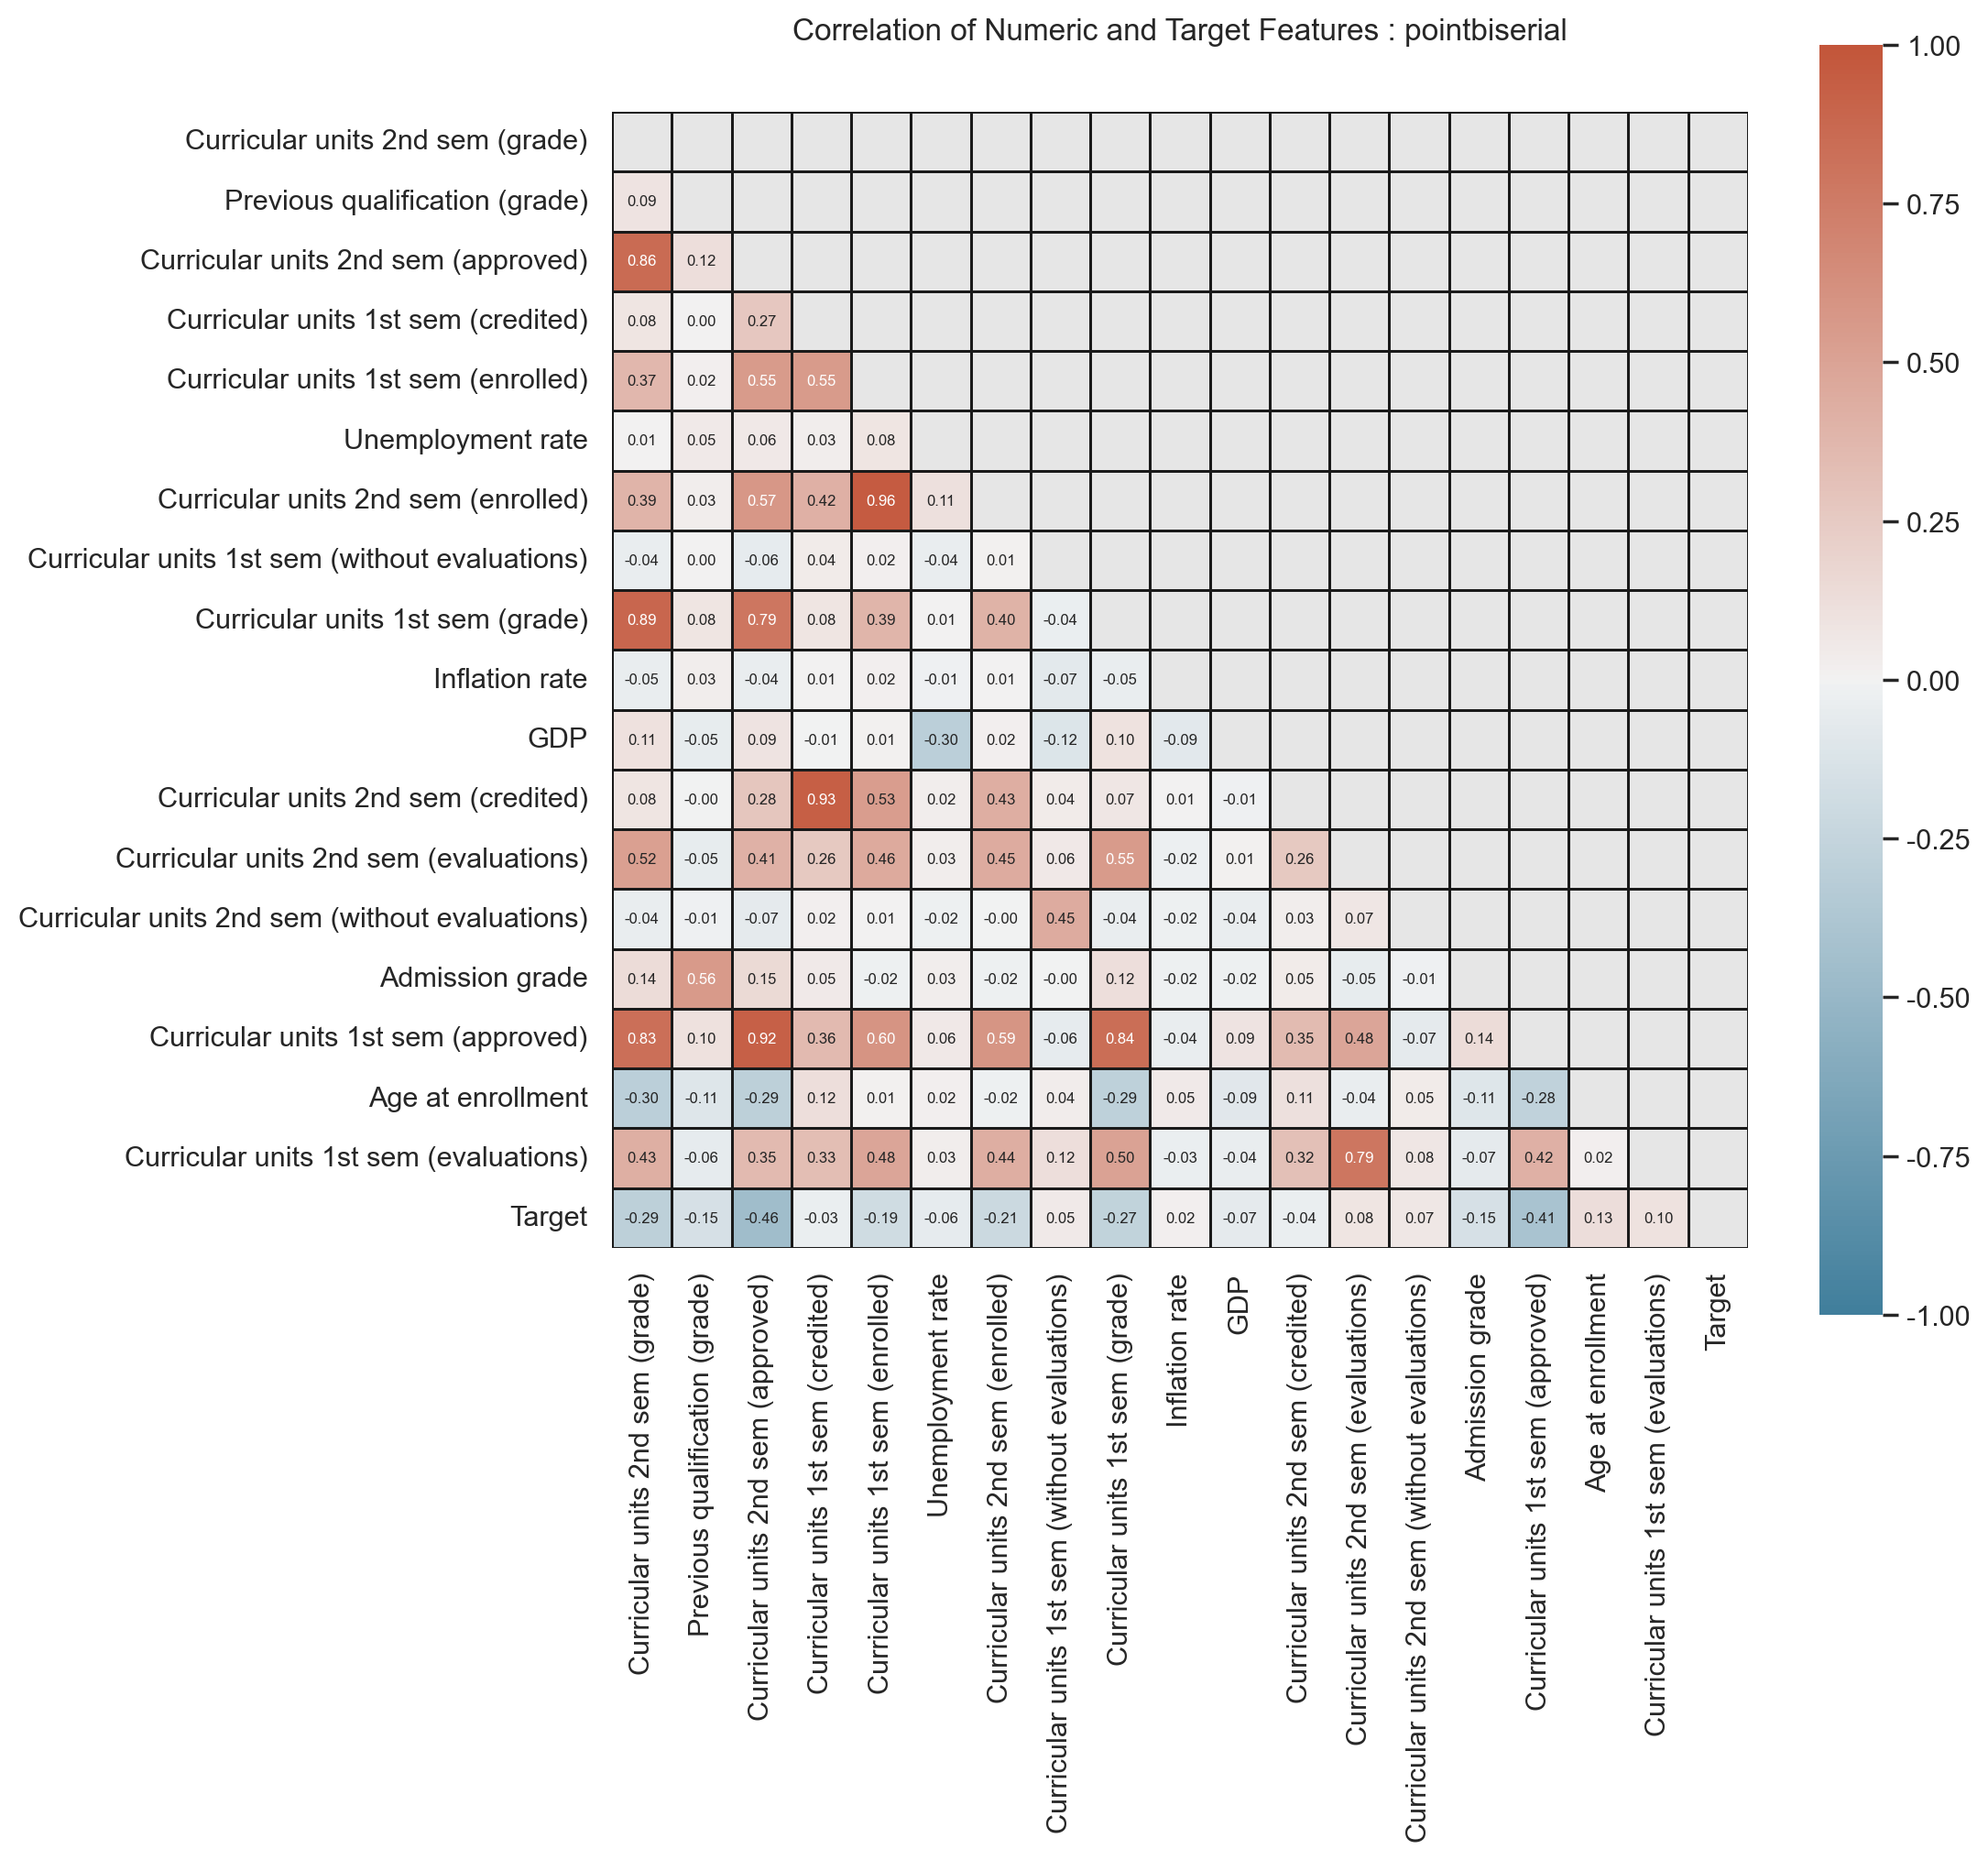

In [145]:
num_target_features = numeric_features + ["Target"]

# numeric features와 target feature의 조합을 사용하여 연관성 계산
numeric_target_corr = []
for col_pair in product(num_target_features, num_target_features) : 
    # corr of numeric and categorical features : pointbiserial coeff
    if "Target" in col_pair : 
        pointbiserial_val = stats.pointbiserialr(temp_train_df[col_pair[0]], temp_train_df[col_pair[1]]).statistic
        numeric_target_corr.append(pointbiserial_val)
    
    # corr of numeric features : pearson coeff
    else : 
        pearson_val = stats.pearsonr(temp_train_df[col_pair[0]], temp_train_df[col_pair[1]]).statistic
        numeric_target_corr.append(pearson_val)

# corr df
numeric_target_corr = np.array(numeric_target_corr).reshape(19, 19)        
numeric_target_corr_df = pd.DataFrame(numeric_target_corr, index=num_target_features, columns=num_target_features)

cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(numeric_target_corr_df, dtype=bool))
fig, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(
    data=numeric_target_corr_df,
    mask=mask,
    cmap=cmap,
    vmax=1.0,
    vmin=-1.0,
    center=0,
    square=True,
    linewidths=0.5,
    linecolor="k",
    annot=True,
    annot_kws={"fontsize": 6},
    fmt=".2f",
    ax=ax
)
ax.set_title("Correlation of Numeric and Target Features : pointbiserial", y=1.05)
ax.grid(False) ; 

### 교차분석 : categorical features와 Target의 연관성
- 범주형 feature 간의 교차분석을 위해 교차빈도집계표를 만들고 이를 통해 Chi2 Test, Phi coeff, Cramer's coeff 를 사용하여 연관성(association)을 계산한다.
   - 교차빈도집계표 : pd.crosstab(df1, df2)
- 모든 범주형 feature : 
   - Chi2 Test
      - 귀무가설 H0 : 두 변수는 독립이다.
      - 대립가설 H1 : 두 변수는 독립이 아니다.
   - p-value : 0.05 보다 크면 귀무가설(독립이다), 0.05 보다 작으면 대립가설(독립이 아니다)
- 비교하는 2개의 feature 모두 2개의 유니크 값을 가진 경우
   - phi coefficient
   - 0에 가까울 수록 연관성이 작고, 1에 가까울 수록 연관성이 크다.
- 그외 비교하려는 2개의 feature가 3개 이상의 유니크 값을 가진 경우
   - cramer's V coefficient
   - 0에 가까울 수록 연관성이 작고, 1에 가까울 수록 연관성이 크다.
   - 0.6 이상이면 연관성이 크다고 판단할 수 있다.
- **Chi2 Test 결과와 phi,cramer coeff 결과 비교**
   - 연관성 여부가 대체로 일치하며, 연관성의 정도는 phi,crammer coeff가 더 정확한 것 같다.   

### Chi2 Test
- "두 변수는 독립이다."라는 귀무가설에 대한 검정
   - 유의수준 5%보다 크면 귀무가설을 채택할 수 있으므로 독립이고,
   - 유의수준 5%보다 작으면 대립가설을 채택할 수 있으므로 독립이 아님(=연관성이 있음)

In [146]:
from scipy.stats import chi2_contingency

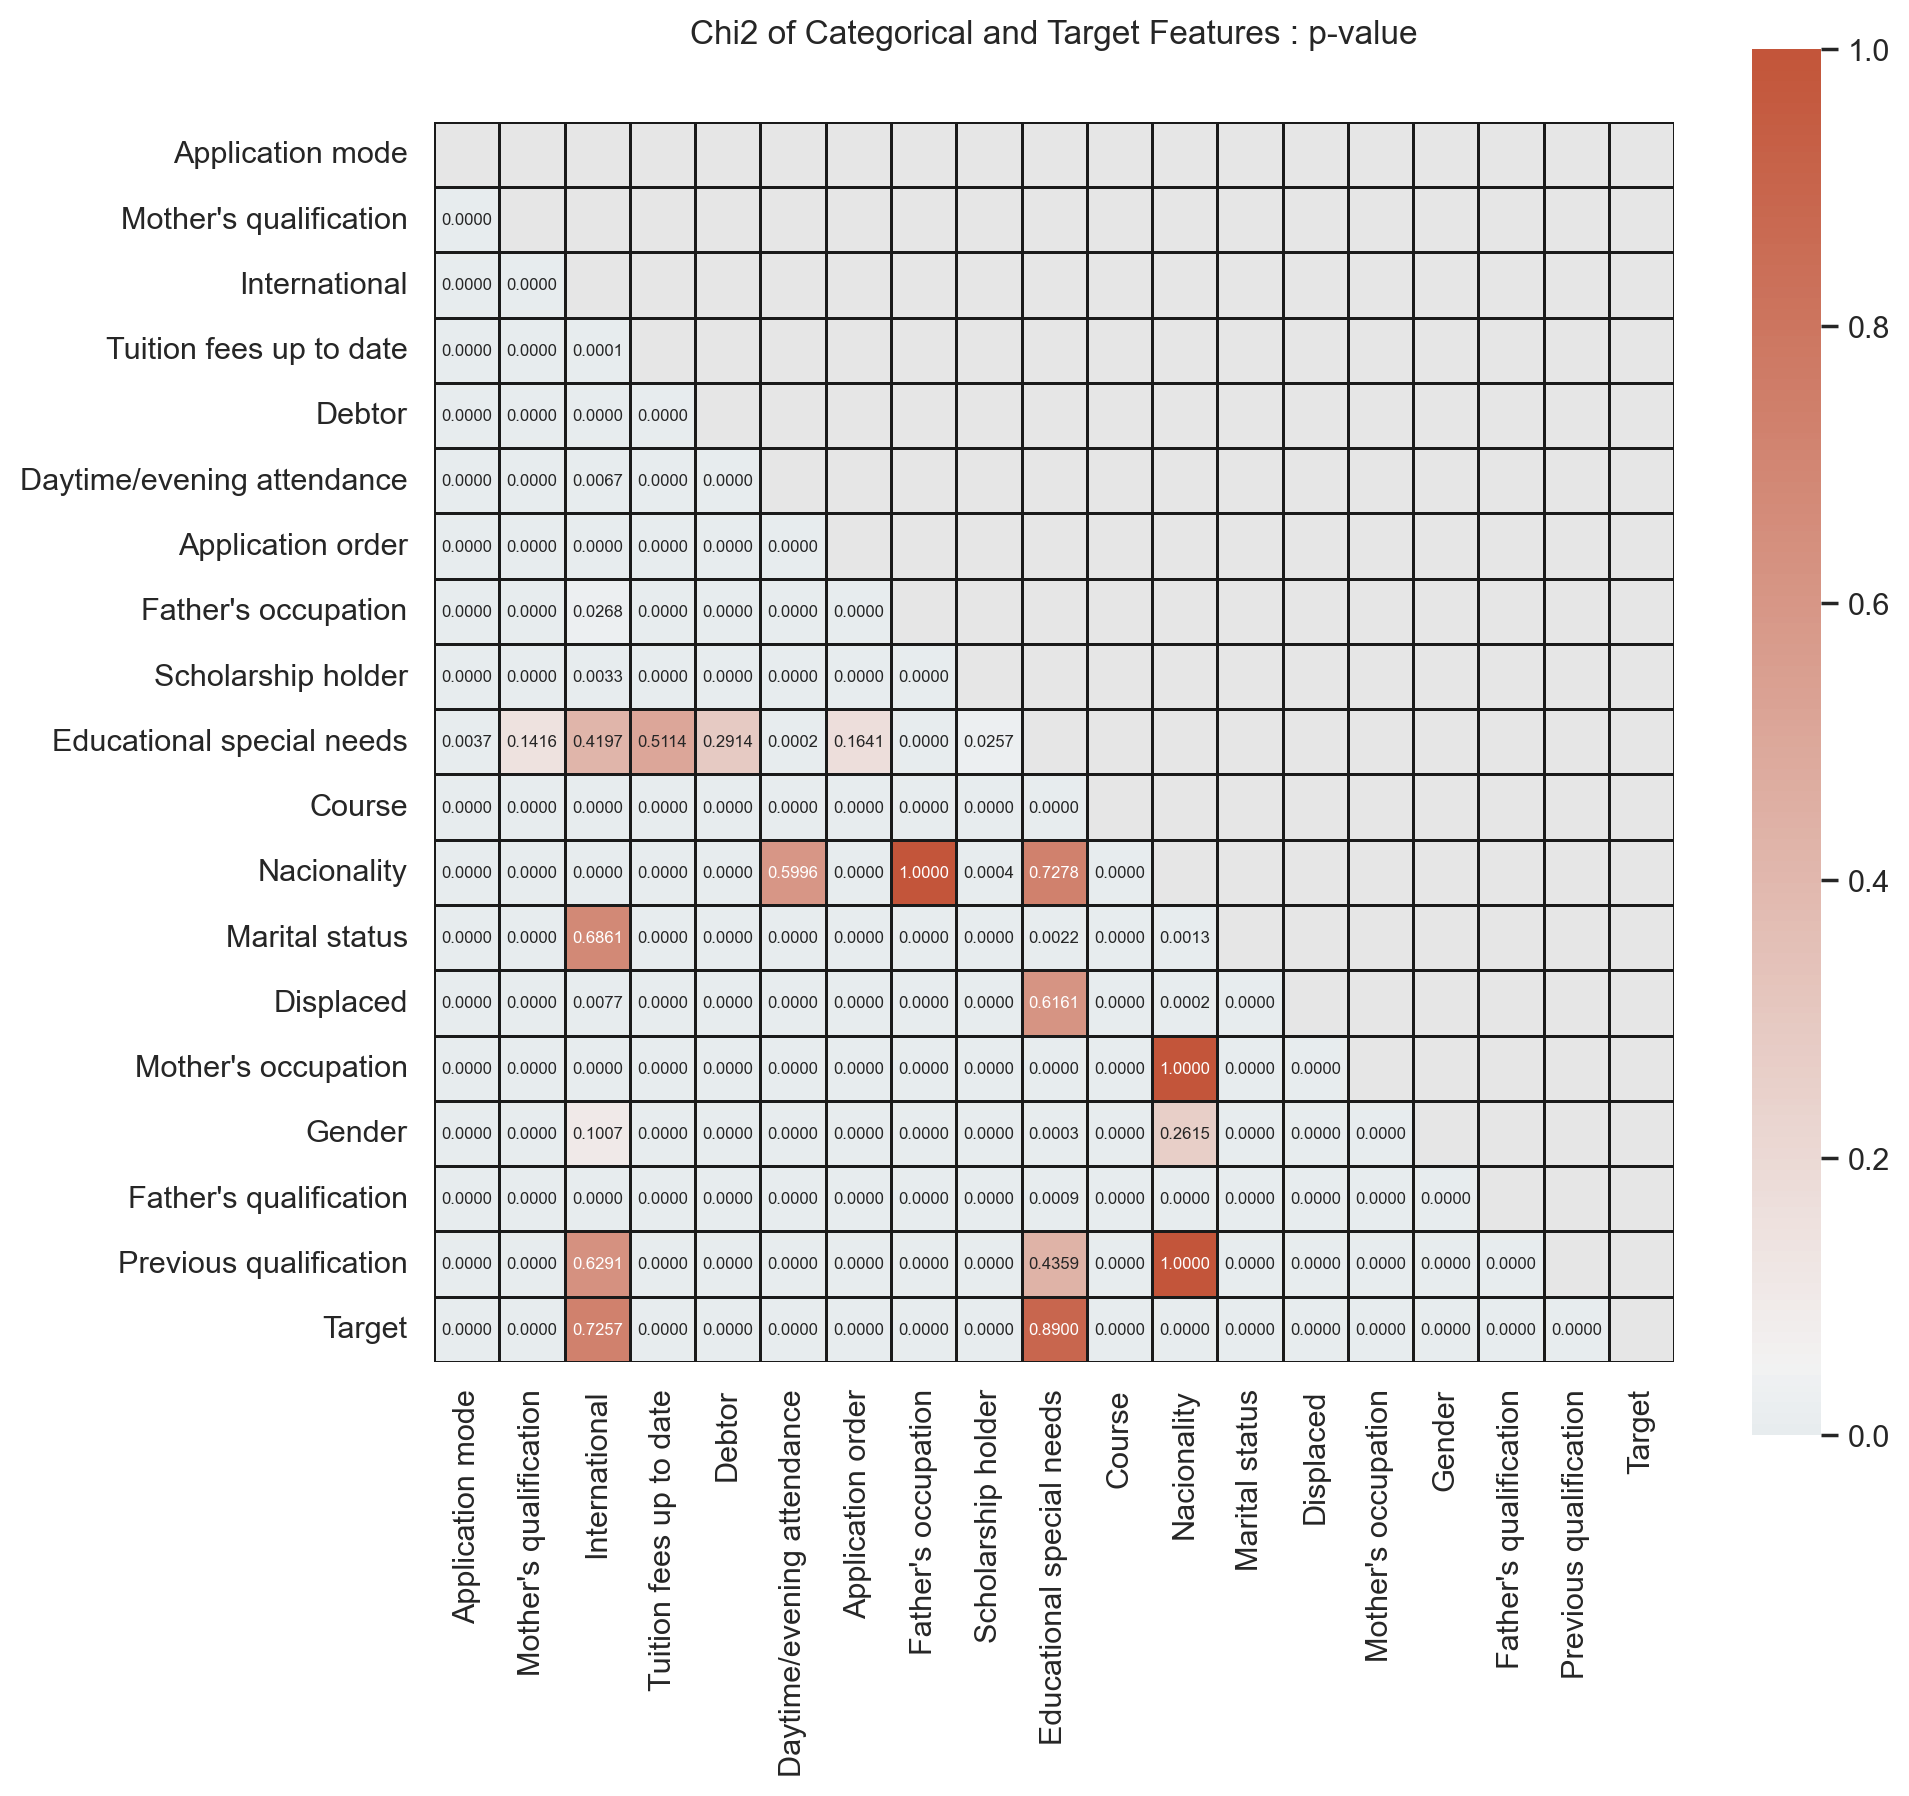

In [147]:
cate_target_features = categorical_features + ["Target"]

# categorical features와 target feature의 조합을 사용하여 연관성 계산
cate_target_corr = []
for col_pair in product(cate_target_features, cate_target_features) : 
    temp_cross_tab = pd.crosstab(temp_train_df[col_pair[0]], temp_train_df[col_pair[1]])
    temp_rows = [row.to_list() for i, row in temp_cross_tab.iterrows()]
    cate_target_corr.append(chi2_contingency(temp_rows, correction=False).pvalue)

# corr df
cate_target_corr = np.array(cate_target_corr).reshape(19, 19)        
cate_target_corr_df = pd.DataFrame(cate_target_corr, index=cate_target_features, columns=cate_target_features)

cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(cate_target_corr_df, dtype=bool))
fig, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(
    data=cate_target_corr_df,
    mask=mask,
    cmap=cmap,
    vmax=1.0,
    vmin=0.0,
    center=0.05,
    square=True,
    linewidths=0.5,
    linecolor="k",
    annot=True,
    annot_kws={"fontsize": 6},
    fmt=".4f",
    ax=ax
)
ax.set_title("Chi2 of Categorical and Target Features : p-value", y=1.05)
ax.grid(False) ; 

### Cramer's V, Phi coefficient
- 두 변수 모두 유니크 값이 2개인 경우 따로 계산 : binary feature

In [149]:
from scipy.stats.contingency import association

### 유니크 값이 2개인 feature

In [150]:
cate_2_unique = list(
    train_count_unique_df\
    .reset_index()\
    .rename(columns={"index": "col_name"})\
    .query("col_name in @categorical_features and count == 2")["col_name"]\
    .values
)
cate_2_unique

['Daytime/evening attendance',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'International']

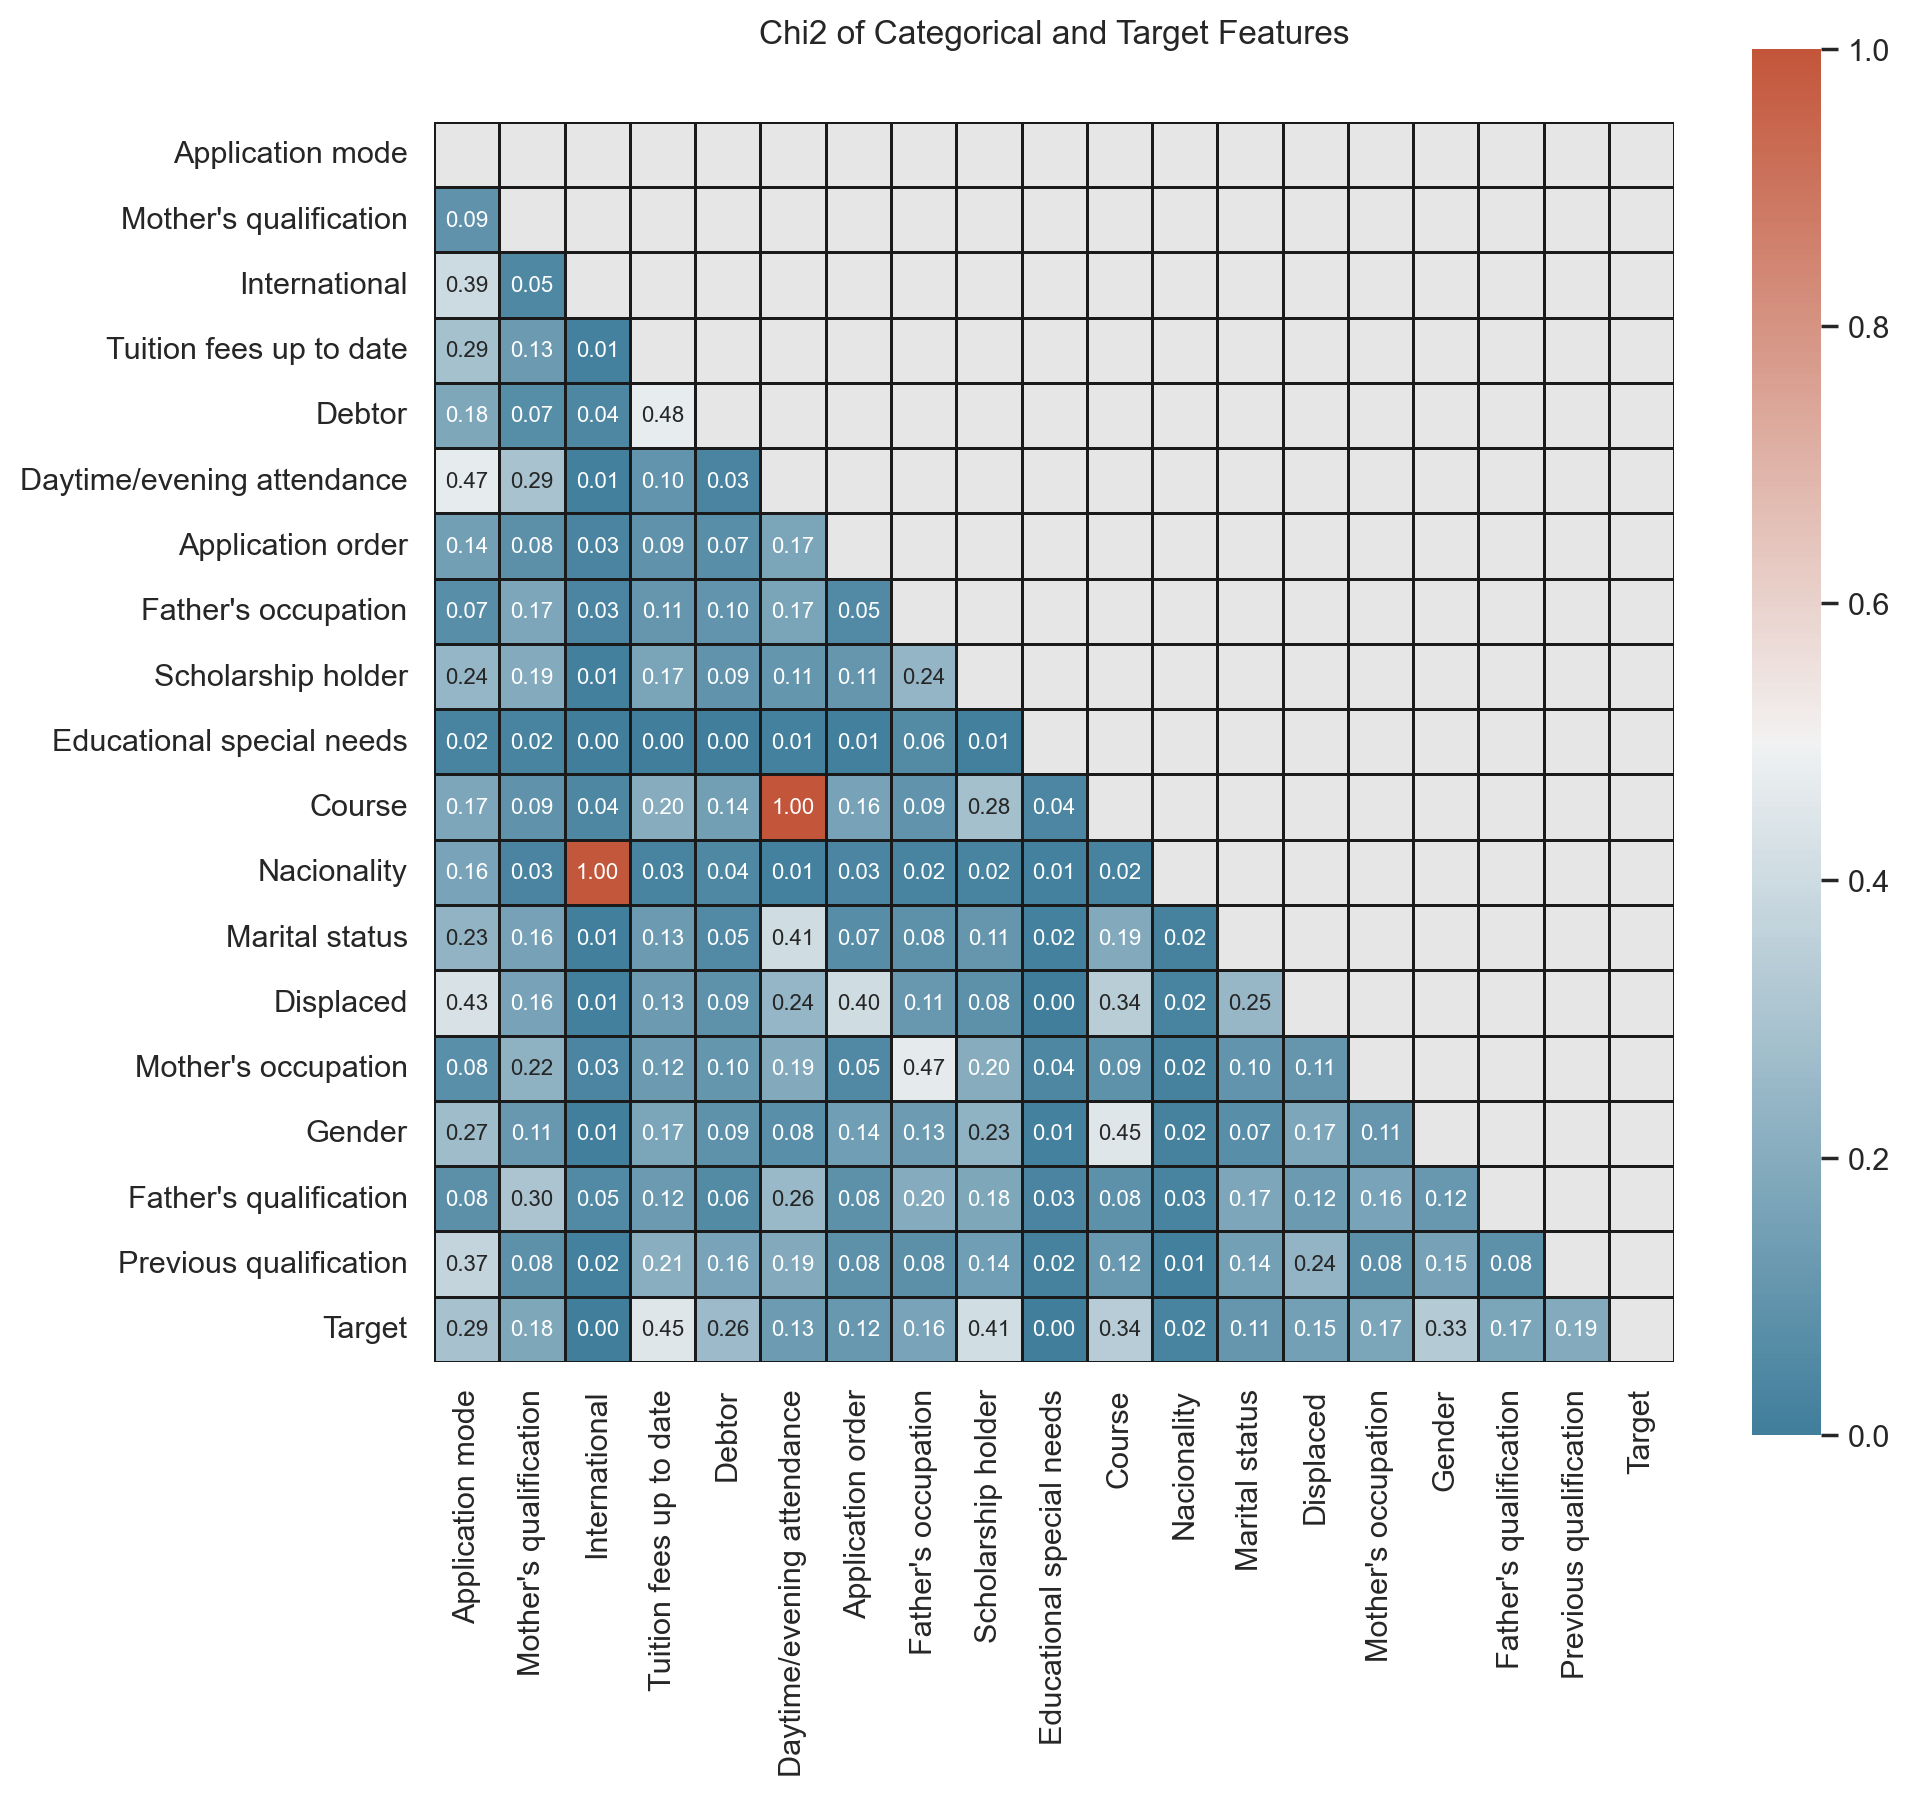

In [151]:
cate_target_features = categorical_features + ["Target"]

# categorical features와 target feature의 조합을 사용하여 연관성 계산
cate_target_corr = []
for col_pair in product(cate_target_features, cate_target_features) : 
    temp_cross_tab = pd.crosstab(temp_train_df[col_pair[0]], temp_train_df[col_pair[1]])
    temp_rows = [row.to_list() for i, row in temp_cross_tab.iterrows()]
    # 두 feature 모두 유니크 값이  2개인 경우 : phi 계수
    if (col_pair[0] in cate_2_unique) and (col_pair[1] in cate_2_unique) : 
        cate_target_corr.append(association(temp_rows, method="tschuprow"))
    # 두 feature의 유니크 값이 3개 이상인 경우 : cramer 계수    
    else : 
        cate_target_corr.append(association(temp_rows, method="cramer"))

# corr df
cate_target_cramer_phi_corr = np.array(cate_target_corr).reshape(19, 19)        
cate_target_cramer_phi_corr_df = pd.DataFrame(cate_target_cramer_phi_corr, index=cate_target_features, columns=cate_target_features)

cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(cate_target_cramer_phi_corr_df, dtype=bool))
fig, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(
    data=cate_target_cramer_phi_corr_df,
    mask=mask,
    cmap=cmap,
    vmax=1.0,
    vmin=0.0,
    center=0.5,
    square=True,
    linewidths=0.5,
    linecolor="k",
    annot=True,
    annot_kws={"fontsize": 8},
    fmt=".2f",
    ax=ax
)
ax.set_title("Chi2 of Categorical and Target Features", y=1.05)
ax.grid(False) ; 

## (9) Analysis
- 종속변수 Target feature와 연관성이 높은 독립변수 individual features 간의 분포

### feature의 uniqe 값의 description을 정리하여 반환하는 함수

In [27]:
get_feature_desc("Course")

'33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance)'

In [5]:
def clean_desc(col) : 
    
    '''
    UCI 원본 페이지에서 제공하는 variable description을 정리하는 함수
       - [("cate_num", "cate")] 로 반환
    '''
    
    desc = get_feature_desc(col).split(" ")
    cates = []
    
    for i, c in enumerate(desc) :
        cate = ""
        # str이 카테고리 값에 대한 숫자로 이루어졌는지 확인 후 
        # 현재 index 이후 값들을 반복문으로 확인하여 desc를 만든다.
        if c.isdigit() : 
            cate_num = c
            
            for d in desc[i+1:] :
                # str이 숫자가 아닌 경우 = description의 단어들을 하나의 str로 만든다.
                if not d.isdigit() :
                    if d not in ["–", "-"] :
                        cate += d + " "
                # str이 숫자이면 다른 카테고리 값에 대한 번호이므로 종료 (그렇지 않은 경우도 있으나 많지 않음)        
                elif d.isdigit() : 
                    break
                    
            cate = cate.rstrip(" ")
            cates.append((cate_num, cate))
    
    return cates

In [29]:
clean_desc("Course")

[('33', 'Biofuel Production Technologies'),
 ('171', 'Animation and Multimedia Design'),
 ('8014', 'Social Service (evening attendance)'),
 ('9003', 'Agronomy'),
 ('9070', 'Communication Design'),
 ('9085', 'Veterinary Nursing'),
 ('9119', 'Informatics Engineering'),
 ('9130', 'Equinculture'),
 ('9147', 'Management'),
 ('9238', 'Social Service'),
 ('9254', 'Tourism'),
 ('9500', 'Nursing'),
 ('9556', 'Oral Hygiene'),
 ('9670', 'Advertising and Marketing Management'),
 ('9773', 'Journalism and Communication'),
 ('9853', 'Basic Education'),
 ('9991', 'Management (evening attendance)')]

### Target feature와 연관성이 높은 카테고리형 변수들

In [22]:
top_5_cate_target = cate_target_cramer_phi_corr_df["Target"].sort_values()[::-1][1:6].index
top_5_cate_target

Index(['Tuition fees up to date', 'Scholarship holder', 'Course', 'Gender',
       'Application mode'],
      dtype='object')

### Target and "Tuition fees up to date" 의 분포
- 최신 등록금 지불 여부
   - Graduate : yes > no
   - Dropout : yes > no
   - Enrolled : yea > no
- **Graduate, Dropout, Enrolled 모두 최신 등록금을 납입한 사람이 더 많다.**

In [81]:
tuition_fees_desc = clean_desc(top_5_cate[0])
tuition_fees_desc.sort()
tuition_fees_desc

[('0', 'no'), ('1', 'yes')]

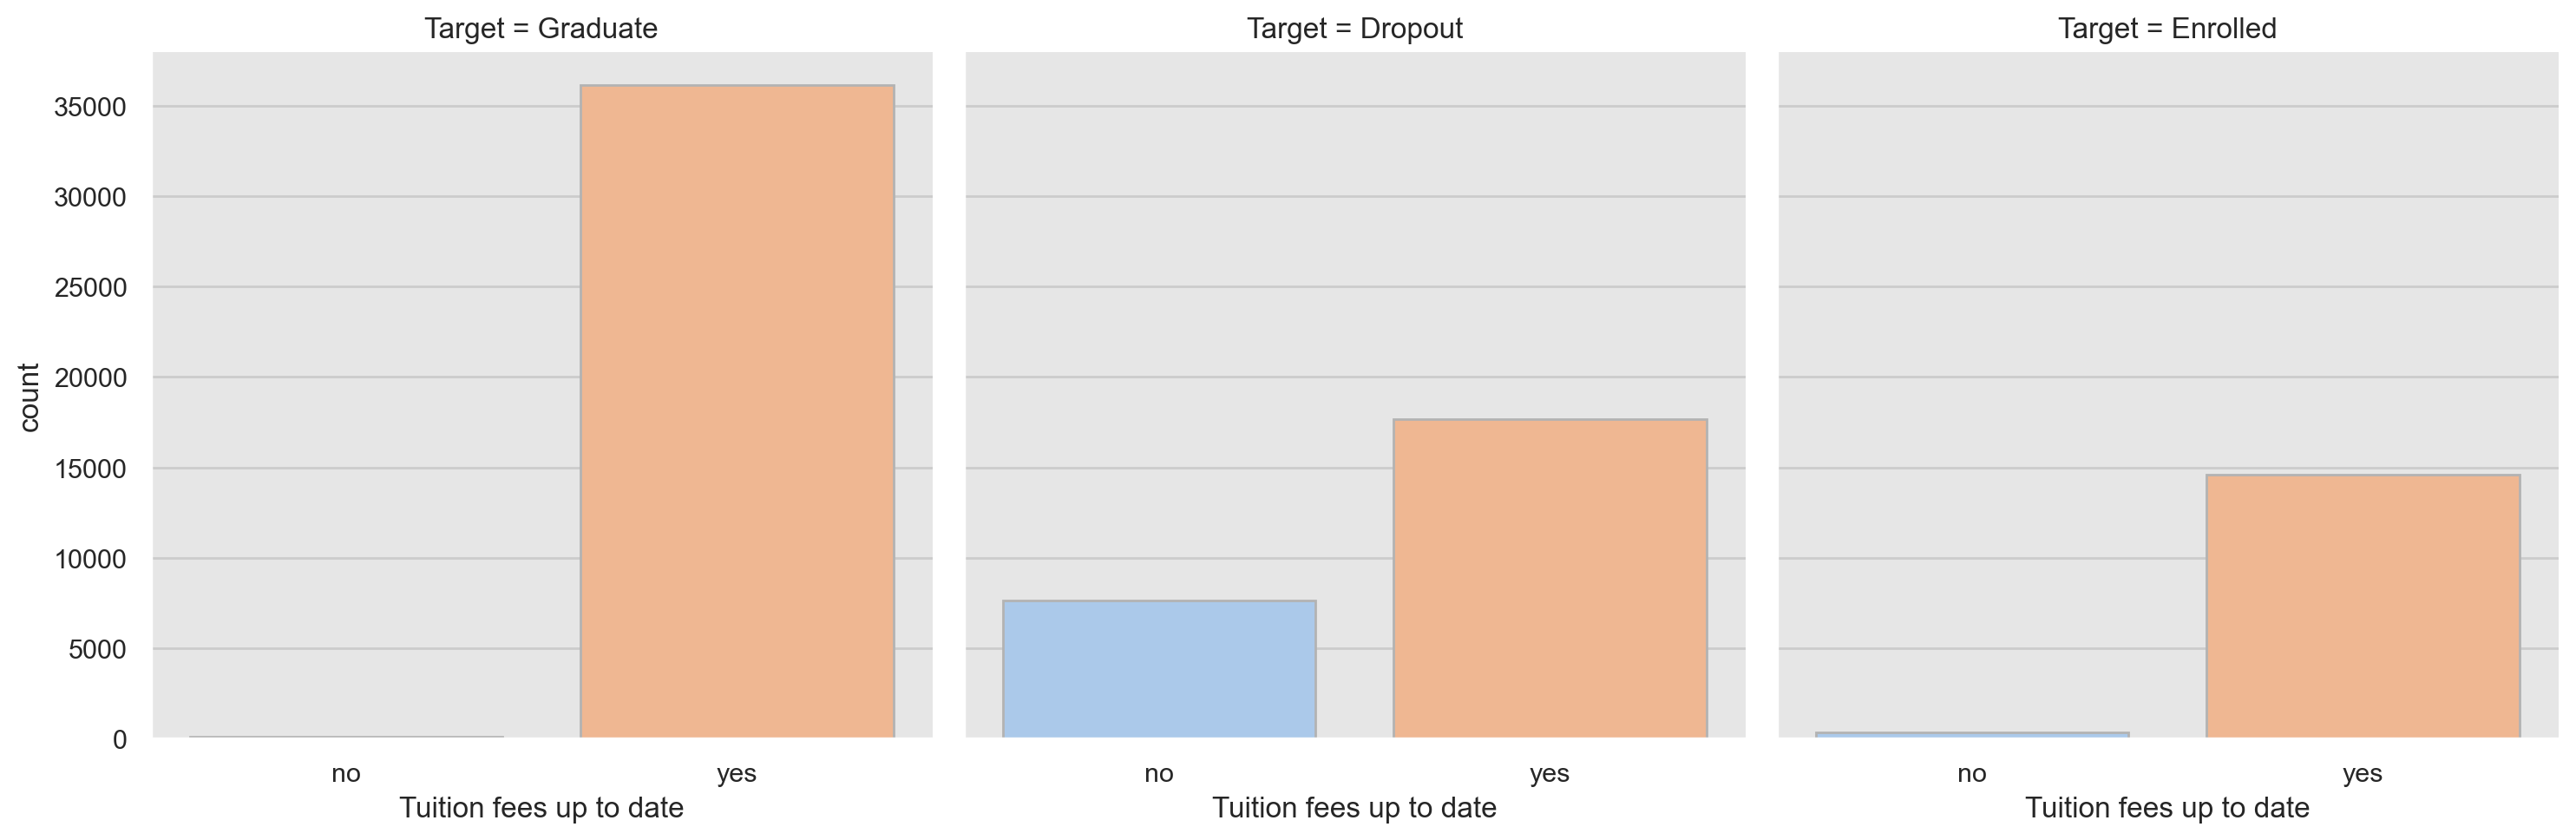

In [80]:
g = sns.catplot(
    data=train_df,
    x="Tuition fees up to date",
    col="Target",
    palette="pastel",
    edgecolor=".7",
    kind="count"
)
g.set_xticklabels(labels=[ele[1] for ele in tuition_fees_desc]) ;

### Target and "Scholarship holder" 의 분포
- 장학금 보유자
   - Graduate : yes < no
   - Dropout : yes < no
   - Enrolled : yes < no
- **Dropout에서 장학금을 받지 않은 사람과 받은 사람의 차이가 더 커진다.**

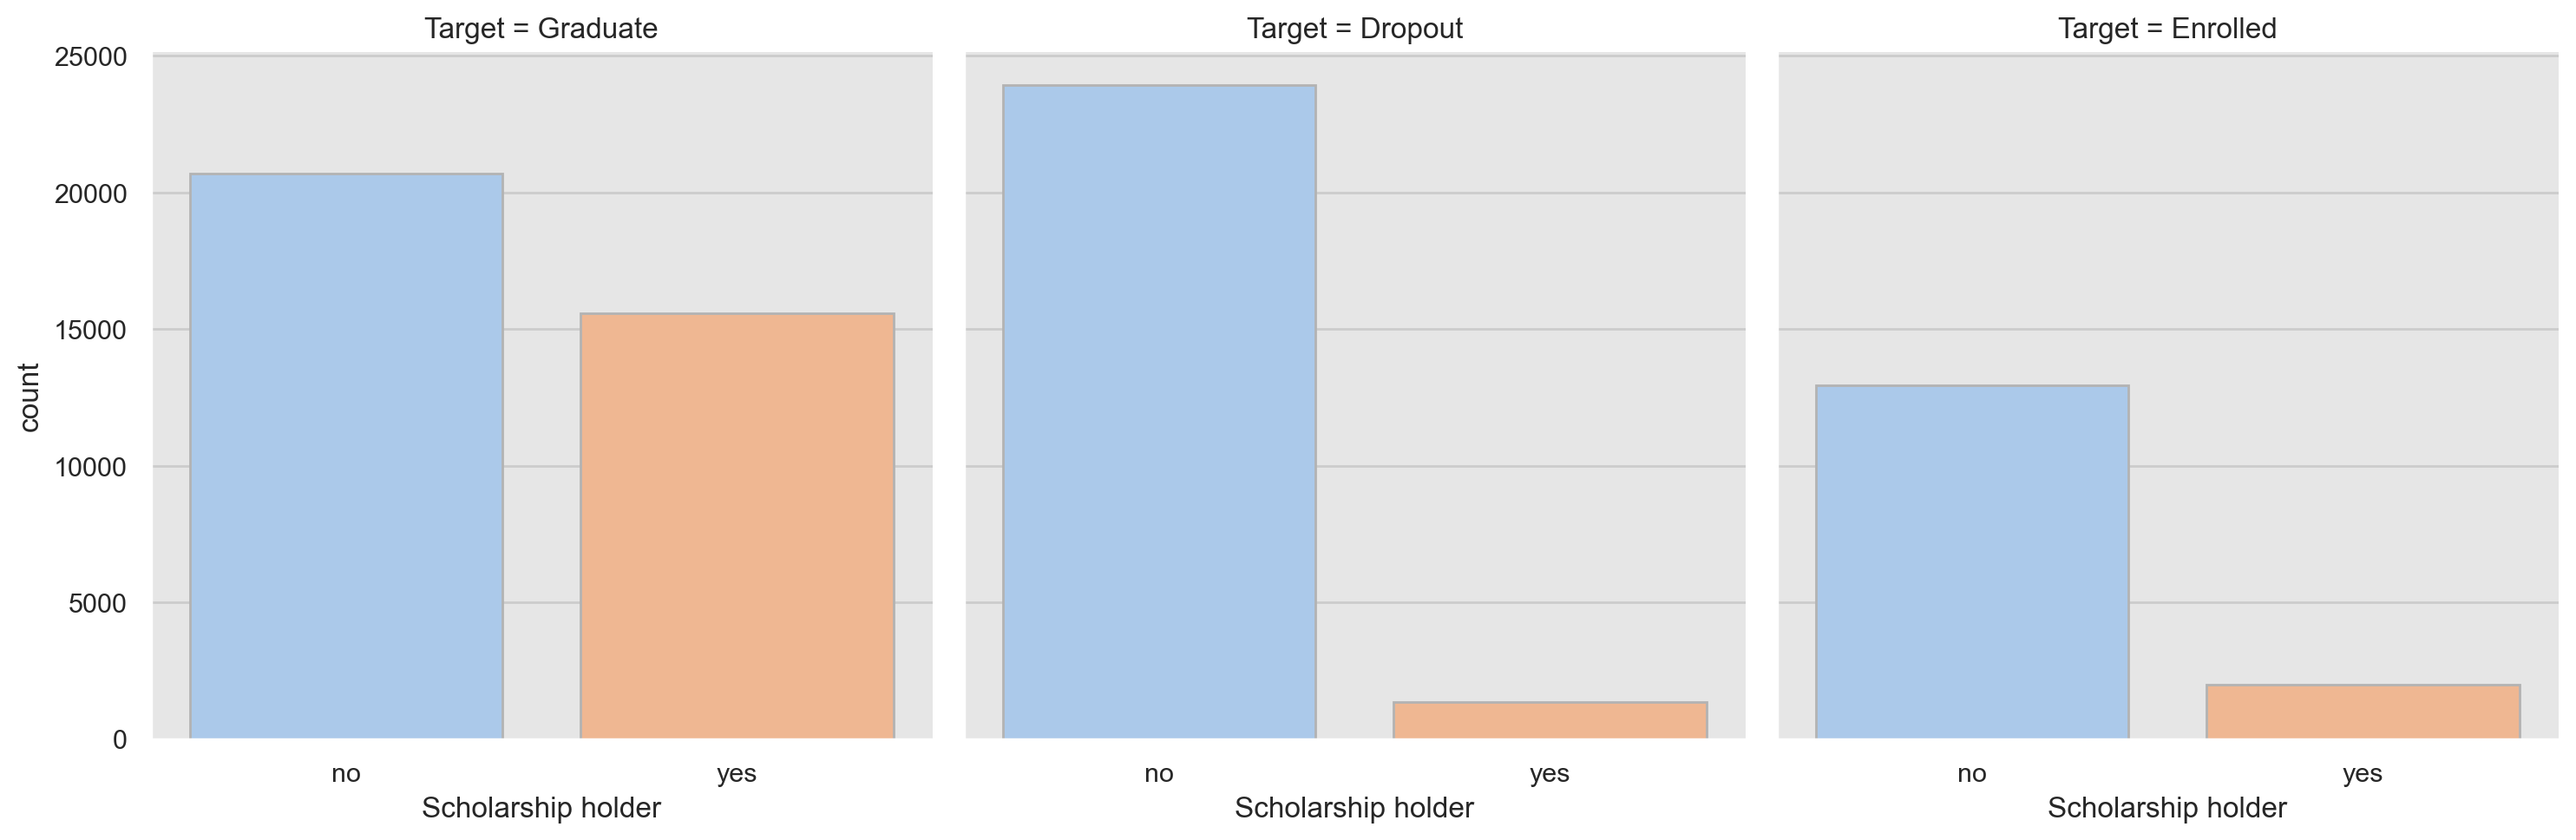

In [83]:
scholoarship_holder_desc = clean_desc(top_5_cate[0])
scholoarship_holder_desc.sort()

g = sns.catplot(
    data=train_df,
    x="Scholarship holder",
    col="Target",
    palette="pastel",
    edgecolor=".7",
    kind="count"
)
g.set_xticklabels(labels=[ele[1] for ele in scholoarship_holder_desc]) ;

### Target and "Course"(이수과목)의 분포
- 각 Target별 가장 많은 이수 과목
    - Graduate: 9500 (Nursing)
    - Dropout : 9147 (Management)
    - Enrolled : 9147 (Management)
- **Graduate 학생들의 이수 과목의 쏠림현상이 크다.**
- **feature desc에 없는 카테고리가 있다. : 33, 39**

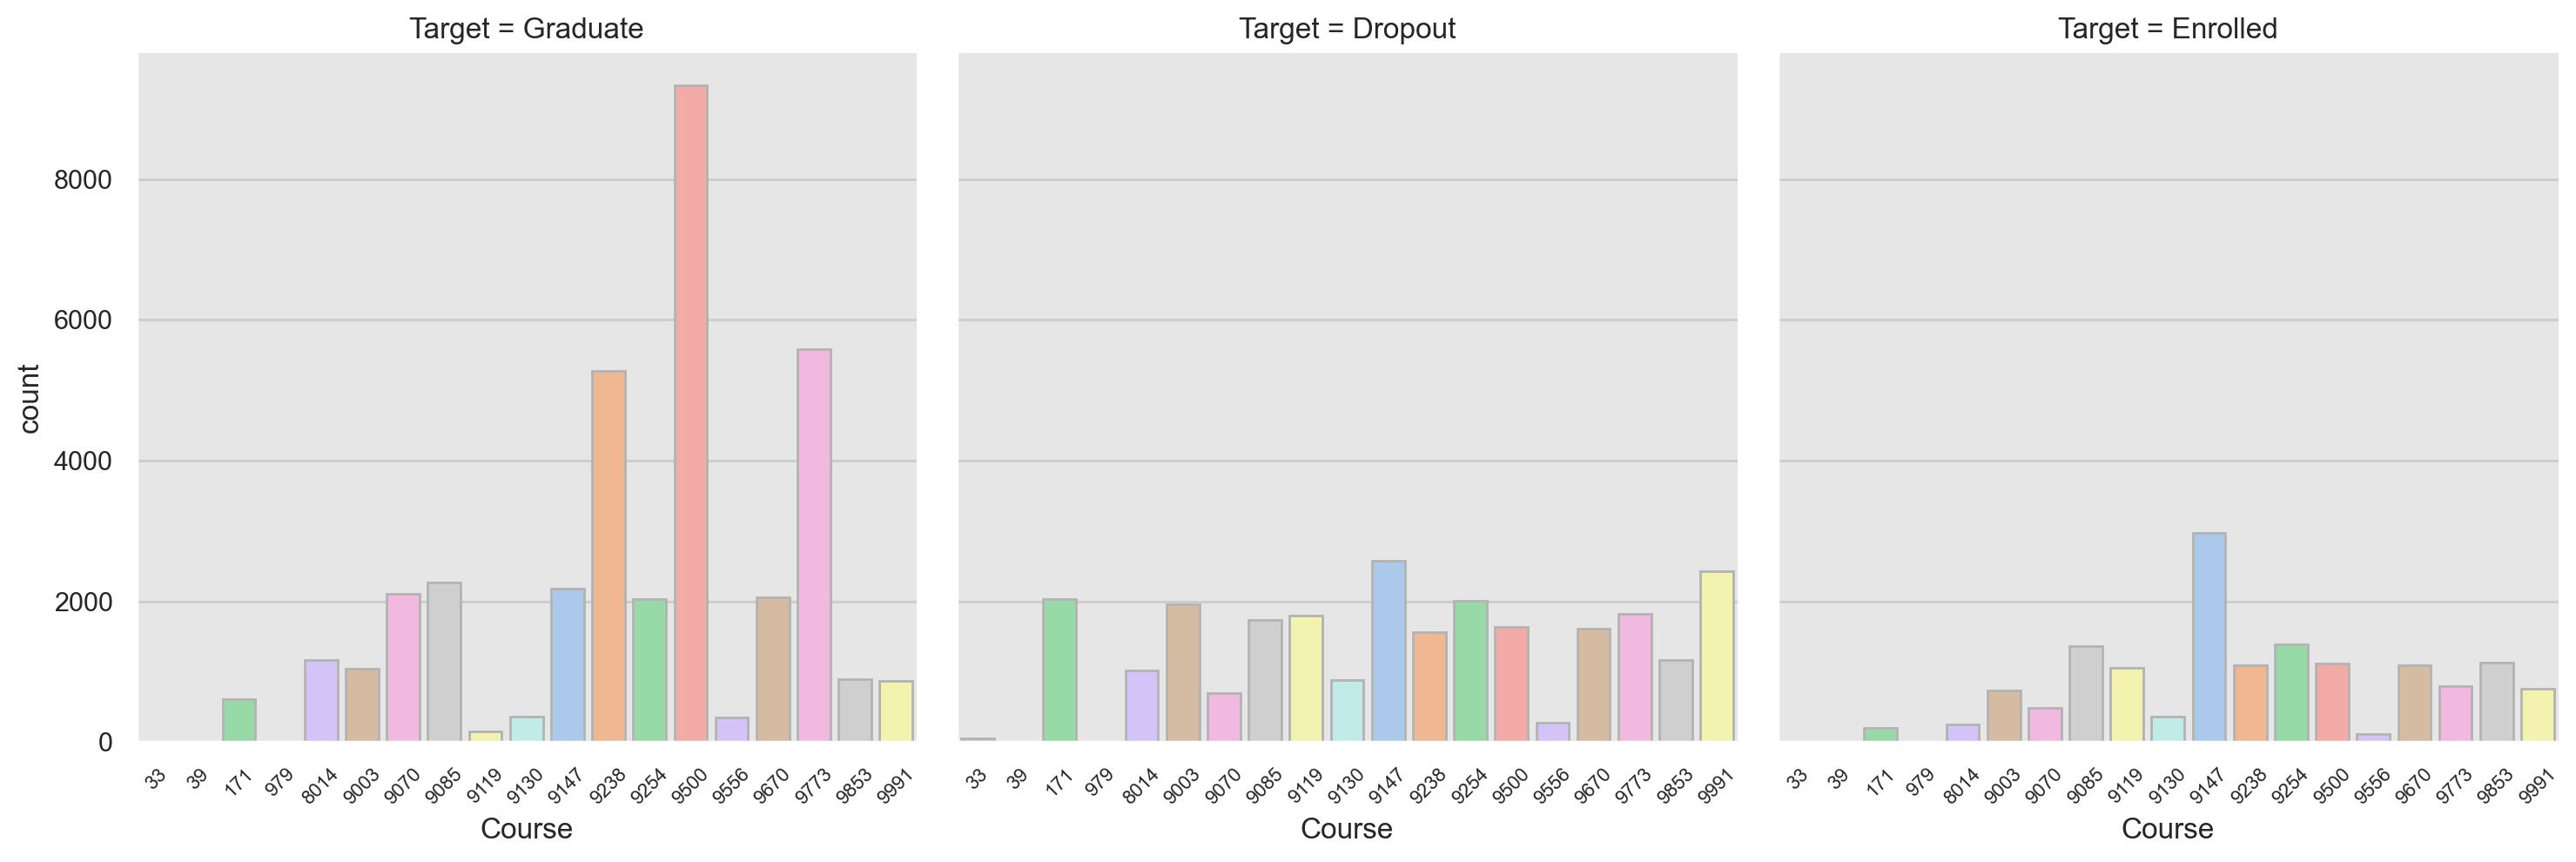

In [90]:
g = sns.catplot(
    data=train_df[["Target", "Course"]],
    x="Course",
    col="Target",
    palette="pastel",
    edgecolor=".7",
    kind="count"
)
g.set_xticklabels(rotation=45, fontsize=8, ha="center");

### Course feature의 분포 현황
- 범주형 데이터의 원래 의미에 해당하는 값을 매핑

In [52]:
col = "Course"
top = 3
cate_descs = clean_desc(col)
mapper = dict(cate_descs)

filter_dfs = []
for t in list(train_df["Target"].unique()) :     
    temp_df = train_df.query("Target == @t")[["Target", col]]
    temp_df["desc"] = temp_df[col].astype(str).map(mapper)
    temp_df["desc"] = temp_df[col].astype(str) + " " + temp_df["desc"]
    filter_dfs.append(temp_df["desc"].value_counts()[:top].to_frame().reset_index().assign(target=t))
    
filter_df = pd.concat(filter_dfs).reset_index(drop=True)[["target", "desc", "count"]]    
filter_df

target                                  desc  count
0  Graduate                          9500 Nursing   9325
1  Graduate     9773 Journalism and Communication   5586
2  Graduate                   9238 Social Service   5277
3   Dropout                       9147 Management   2582
4   Dropout  9991 Management (evening attendance)   2432
5   Dropout   171 Animation and Multimedia Design   2037
6  Enrolled                       9147 Management   2976
7  Enrolled                          9254 Tourism   1384
8  Enrolled               9085 Veterinary Nursing   1366

### Target and "Gender" 의 분포
- 성별
    - Graduate : female > male
    - Dropout : female < male
    - Enrolled : female > male
- **Graduated 한 학생과 Dropout 한 학생의 성별 차이는 반대이다. 특히 Graduated 한 학생은 여자가 더 많다.**

In [51]:
gender_desc = clean_desc("Gender")
gender_desc.sort()
gender_desc

[('0', 'female'), ('1', 'male')]

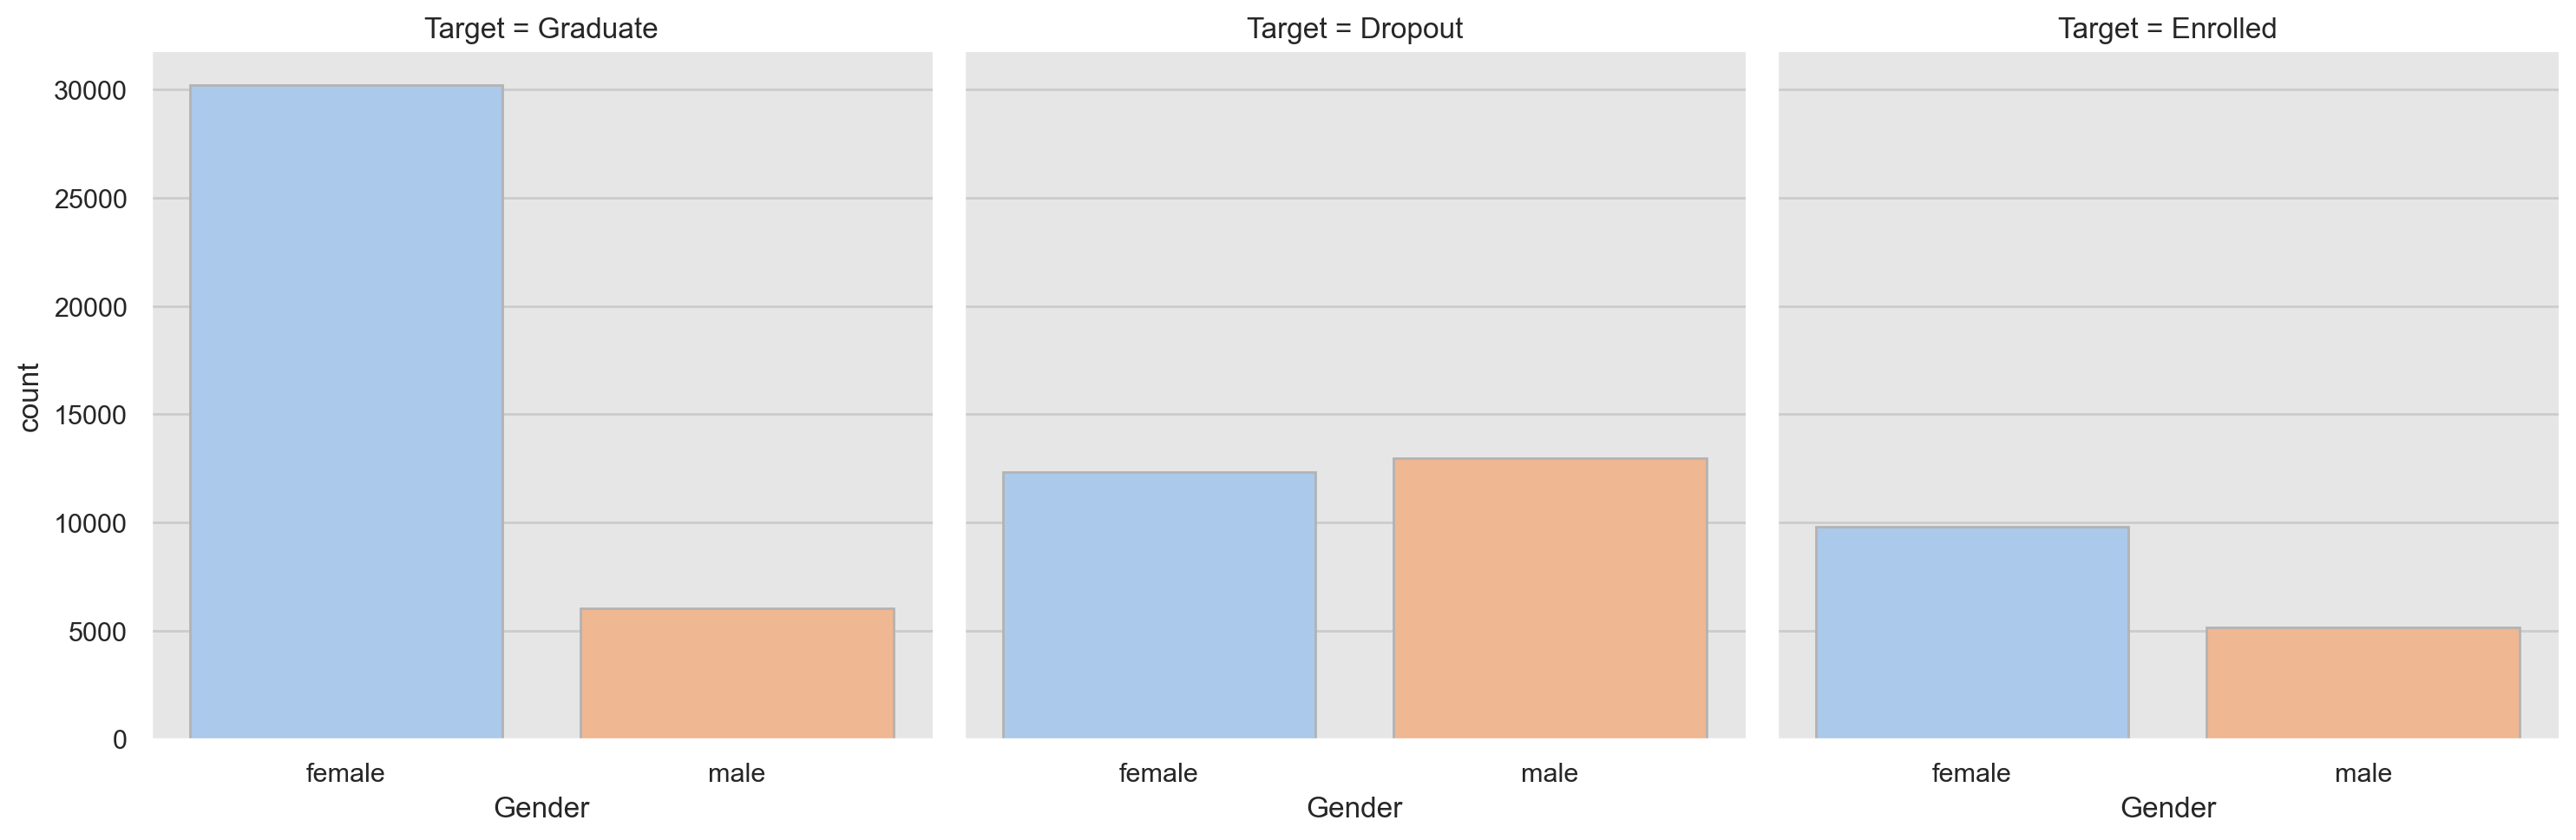

In [89]:
g = sns.catplot(
    data=train_df,
    x="Gender",
    col="Target",
    palette="pastel",
    edgecolor=".7",
    kind="count"
)
g.set_xticklabels(labels=[ele[1] for ele in gender_desc]) ;

### Target and "Application mode" 의 분포
- 적용 모드 : 학생의 신변 정보(?) : 유학생, 편입생, 군인 등에 대한 구분

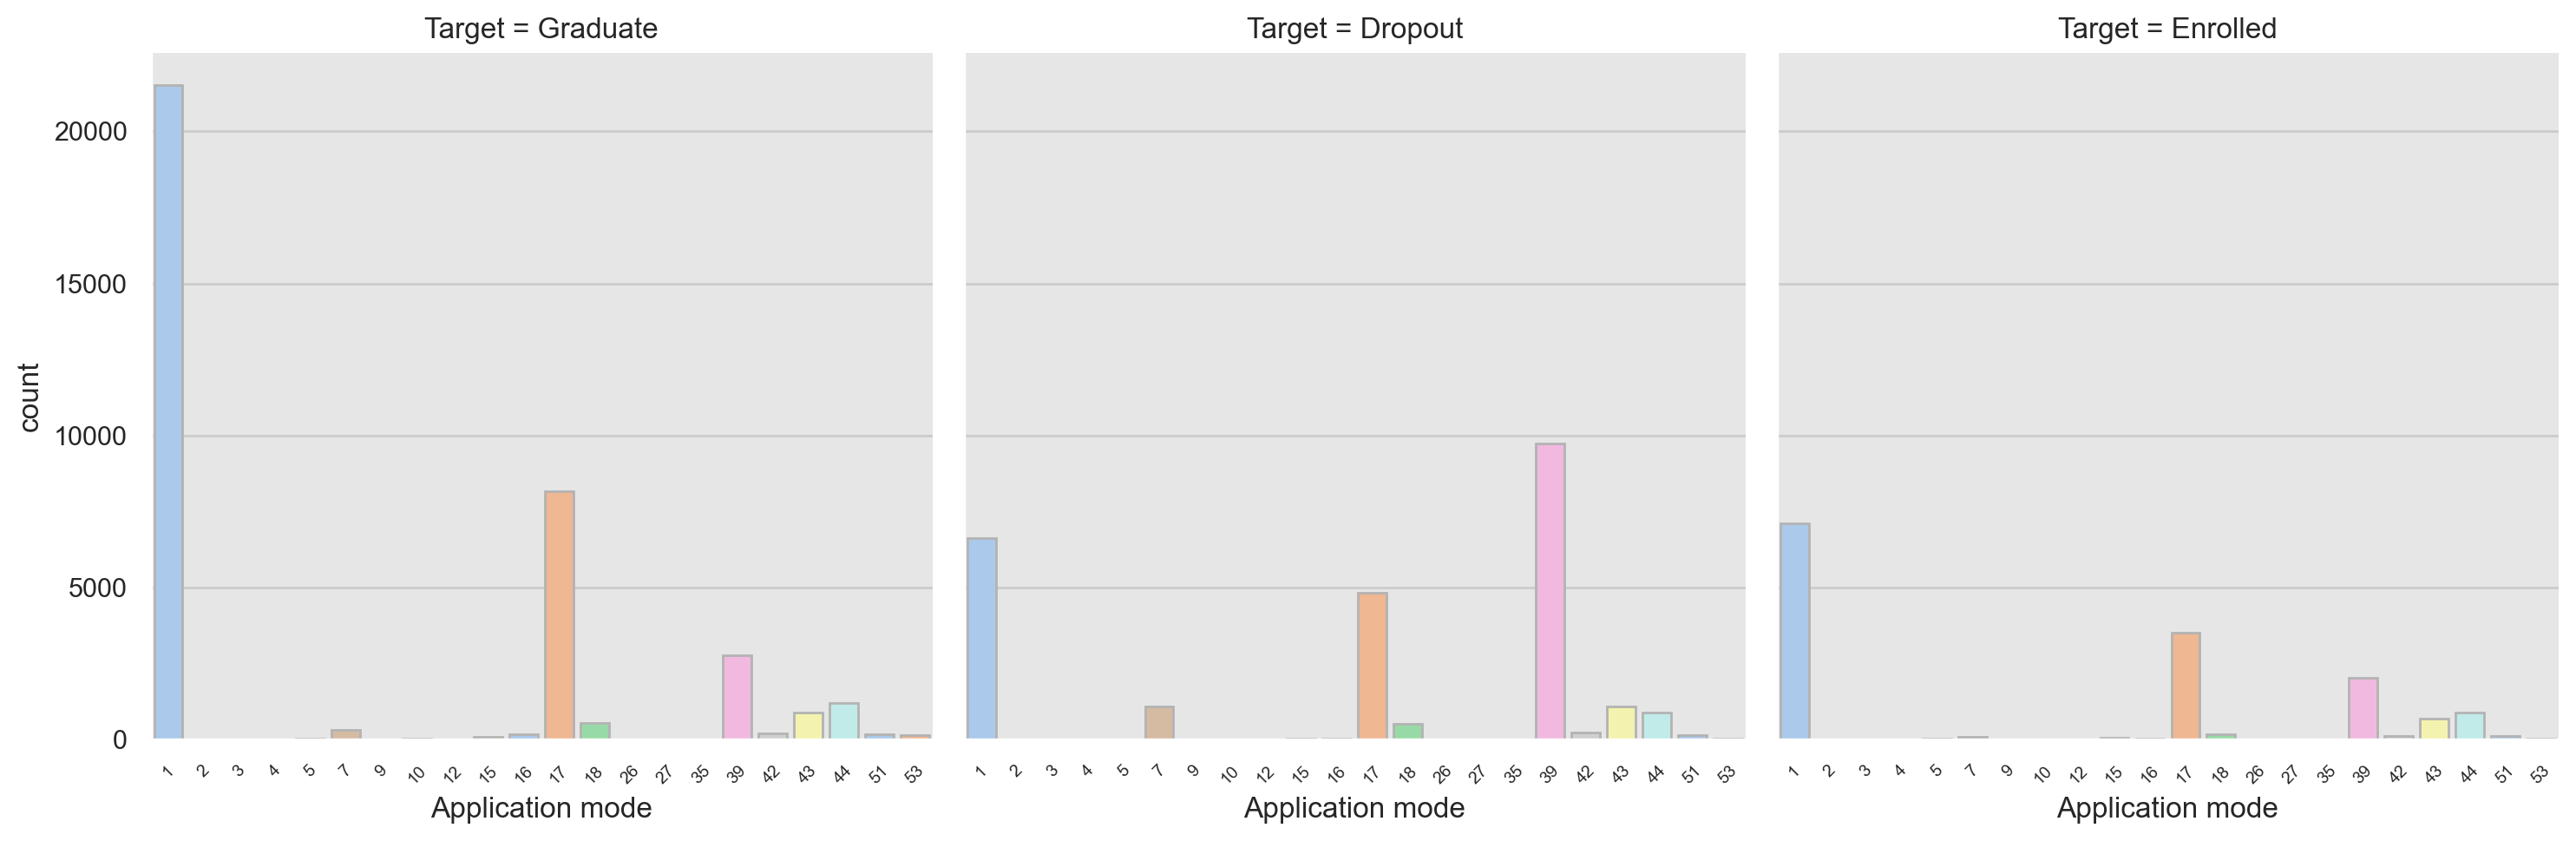

In [85]:
g = sns.catplot(
    data=train_df,
    x="Application mode",
    col="Target",
    palette="pastel",
    edgecolor=".7",
    kind="count"
)
g.set_xticklabels(rotation=45, fontsize=7, ha="center") ;

In [86]:
col = "Application mode"
top = 3
cate_descs = clean_desc(col)
mapper = dict(cate_descs)

filter_dfs = []
for t in list(train_df["Target"].unique()) :     
    temp_df = train_df.query("Target == @t")[["Target", col]]
    temp_df["desc"] = temp_df[col].astype(str).map(mapper)
    temp_df["desc"] = temp_df[col].astype(str) + " " + temp_df["desc"]
    filter_dfs.append(temp_df["desc"].value_counts()[:top].to_frame().reset_index().assign(target=t))
    
filter_df = pd.concat(filter_dfs).reset_index(drop=True)[["target", "desc", "count"]]    
filter_df

target                             desc  count
0  Graduate   1 1st phase general contingent  21510
1  Graduate  17 2nd phase general contingent   8174
2  Graduate                          39 Over   2761
3   Dropout                          39 Over   9725
4   Dropout   1 1st phase general contingent   6615
5   Dropout  17 2nd phase general contingent   4831
6  Enrolled   1 1st phase general contingent   7102
7  Enrolled  17 2nd phase general contingent   3518
8  Enrolled                          39 Over   2033

## Target 과 numeric features 의 분포
- traget feature와 numeric features 간의 연관성 계산값에서 가장 큰 feature 5개를 추출

In [23]:
top_5_numeric_target = numeric_target_corr_df["Target"].sort_values()[::-1][1:6].index
top_5_numeric_target

Index(['Age at enrollment', 'Curricular units 1st sem (evaluations)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (without evaluations)',
       'Curricular units 1st sem (without evaluations)'],
      dtype='object')

### Target and "Age at enrollment" 의 분포
- Age at enrollment(등록시 나이)의 분포
    - 10대~20대에 등록한 학생군이 가장 많다.
    - 50대 이후에 등록한 시니어 학생들도 더러 있는 것으로 보인다.

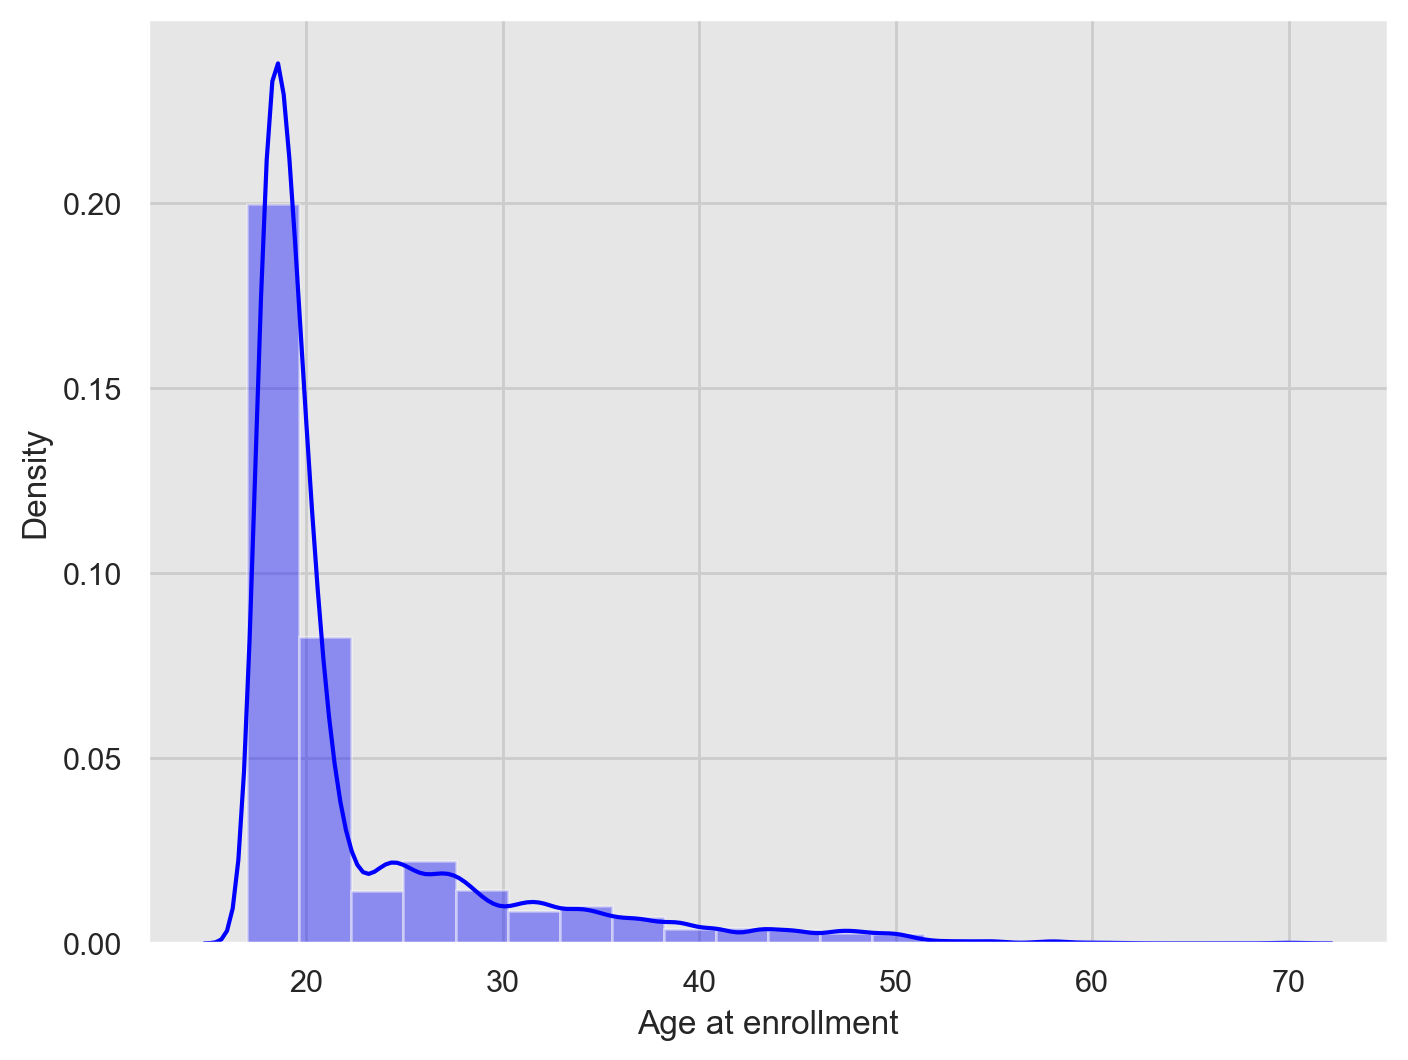

In [136]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.distplot(
    a=train_df["Age at enrollment"],
    bins=20,
    color="blue",
    ax=ax
) ;

#### Target 별 분포
- Graduated : 18세가 가장 많다.
- Dropout : 19세가 가장 많다.
- Enrolled : 18세가 가장 많다. 

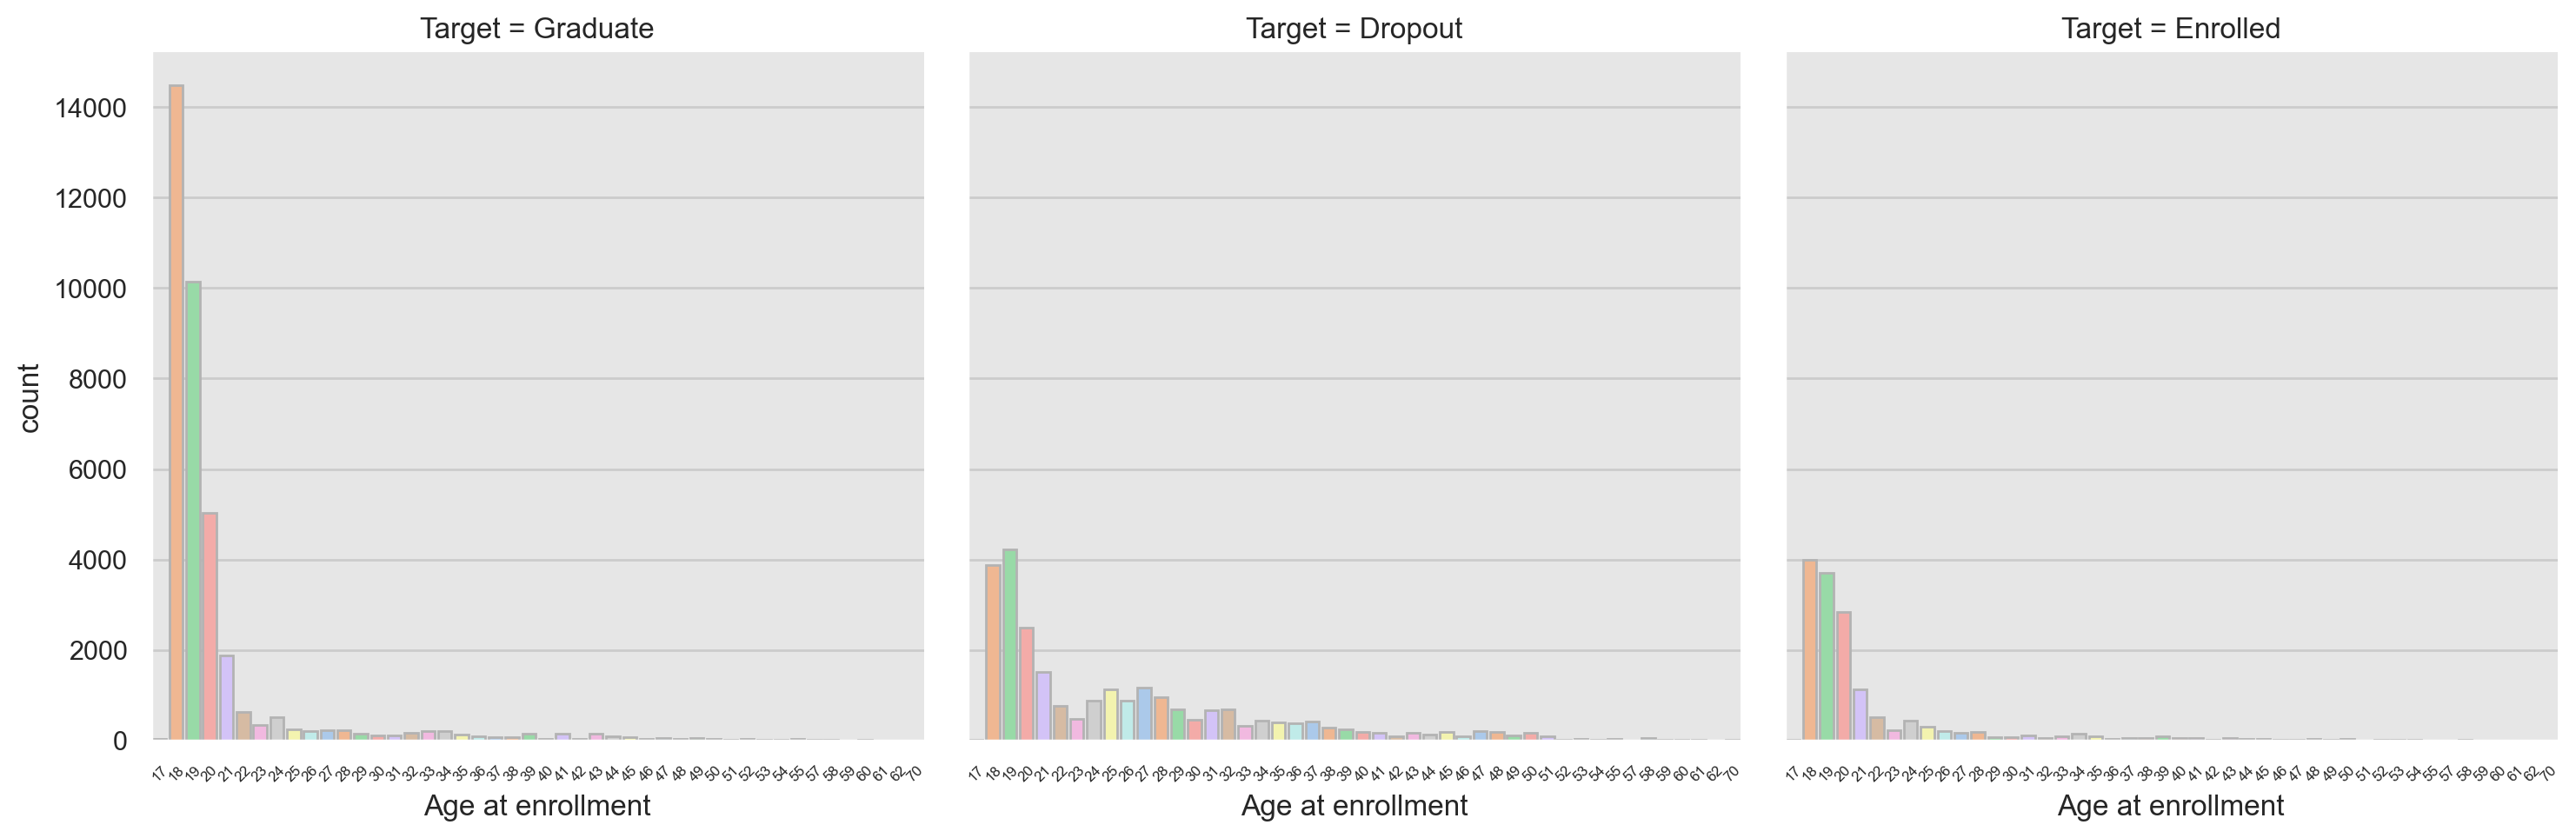

In [116]:
g = sns.catplot(
    data=train_df,
    x="Age at enrollment",
    col="Target",
    palette="pastel",
    edgecolor=".7",
    kind="count"
)
g.set_xticklabels(rotation=45, fontsize=6, ha="center") ;

In [33]:
col = "Age at enrollment"
top = 3

filter_dfs = []
for t in list(train_df["Target"].unique()) :     
    temp_df = train_df.query("Target == @t")[["Target", col]]
    filter_dfs.append(temp_df[col].value_counts()[:top].to_frame().reset_index().assign(target=t))
    
filter_df = pd.concat(filter_dfs).reset_index(drop=True)[["target", col, "count"]]    
filter_df

target  Age at enrollment  count
0  Graduate                 18  14490
1  Graduate                 19  10149
2  Graduate                 20   5037
3   Dropout                 19   4220
4   Dropout                 18   3886
5   Dropout                 20   2489
6  Enrolled                 18   4001
7  Enrolled                 19   3709
8  Enrolled                 20   2841

### Target and "Curricular units 1st sem (evaluations)" 의 분포
- Curricular units 1st sem (evaluations) feature 의 분포
    - 1학기 교과단위 평가횟수

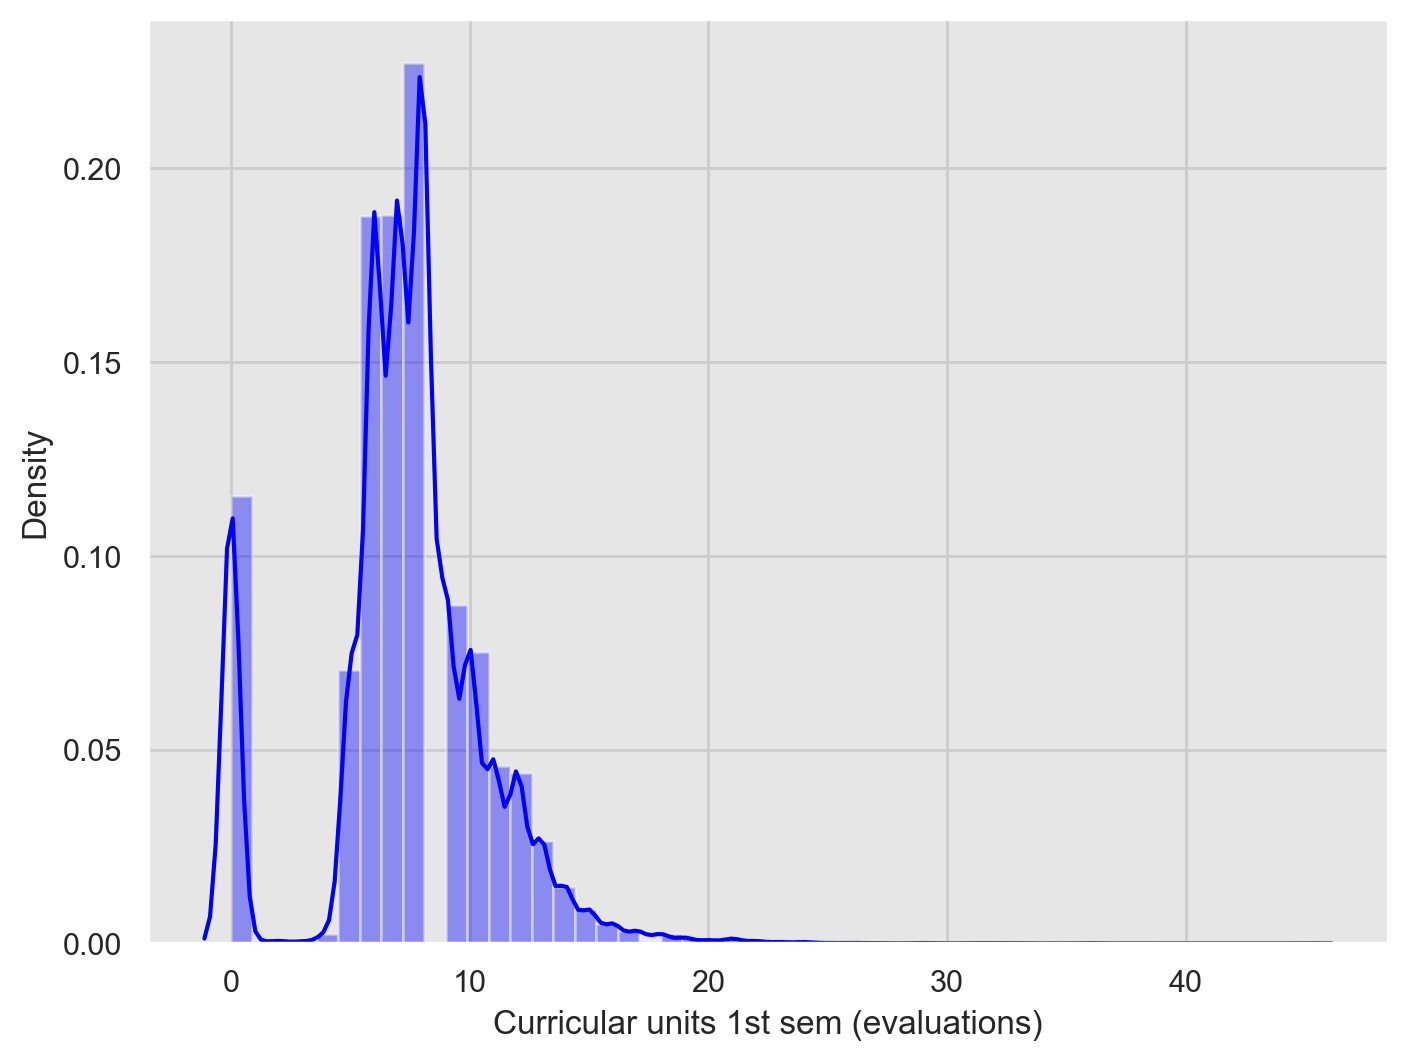

In [138]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.distplot(
    a=train_df["Curricular units 1st sem (evaluations)"],
    color="blue",
    ax=ax
) ;

#### Target 별 분포
- Graduated : 8
- Dropout : 0
- Enrolled : 8

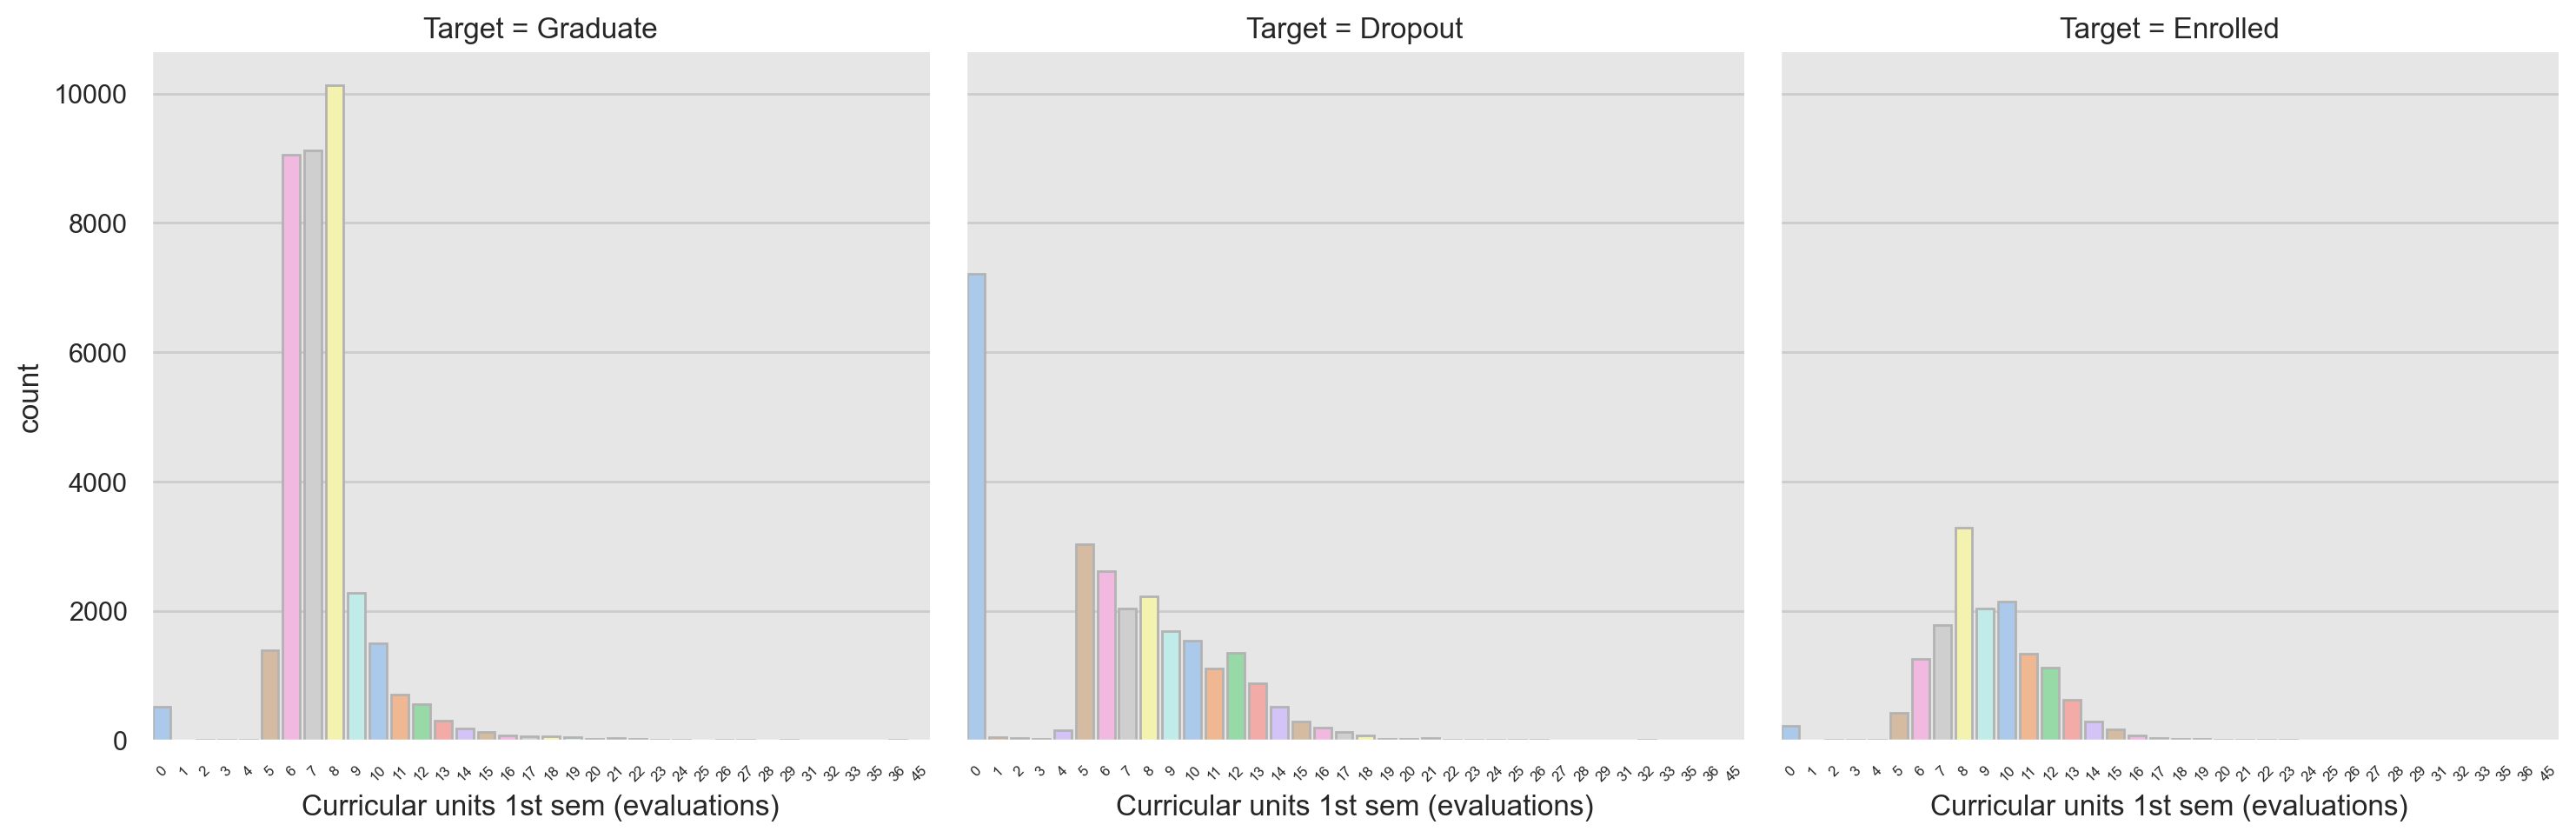

In [139]:
g = sns.catplot(
    data=train_df,
    x="Curricular units 1st sem (evaluations)",
    col="Target",
    palette="pastel",
    edgecolor=".7",
    kind="count"
)
g.set_xticklabels(rotation=45, fontsize=6, ha="center") ;

In [34]:
col = "Curricular units 1st sem (evaluations)"
top = 3

filter_dfs = []
for t in list(train_df["Target"].unique()) :     
    temp_df = train_df.query("Target == @t")[["Target", col]]
    filter_dfs.append(temp_df[col].value_counts()[:top].to_frame().reset_index().assign(target=t))
    
filter_df = pd.concat(filter_dfs).reset_index(drop=True)[["target", col, "count"]]    
filter_df

target  Curricular units 1st sem (evaluations)  count
0  Graduate                                       8  10130
1  Graduate                                       7   9117
2  Graduate                                       6   9050
3   Dropout                                       0   7212
4   Dropout                                       5   3034
5   Dropout                                       6   2621
6  Enrolled                                       8   3286
7  Enrolled                                      10   2148
8  Enrolled                                       9   2043

### Target and "Curricular units 2nd sem (evaluations)" 의 분포
- "Curricular units 2nd sem (evaluations)" 의 분포
   - 2학기 교과단위 평가횟수

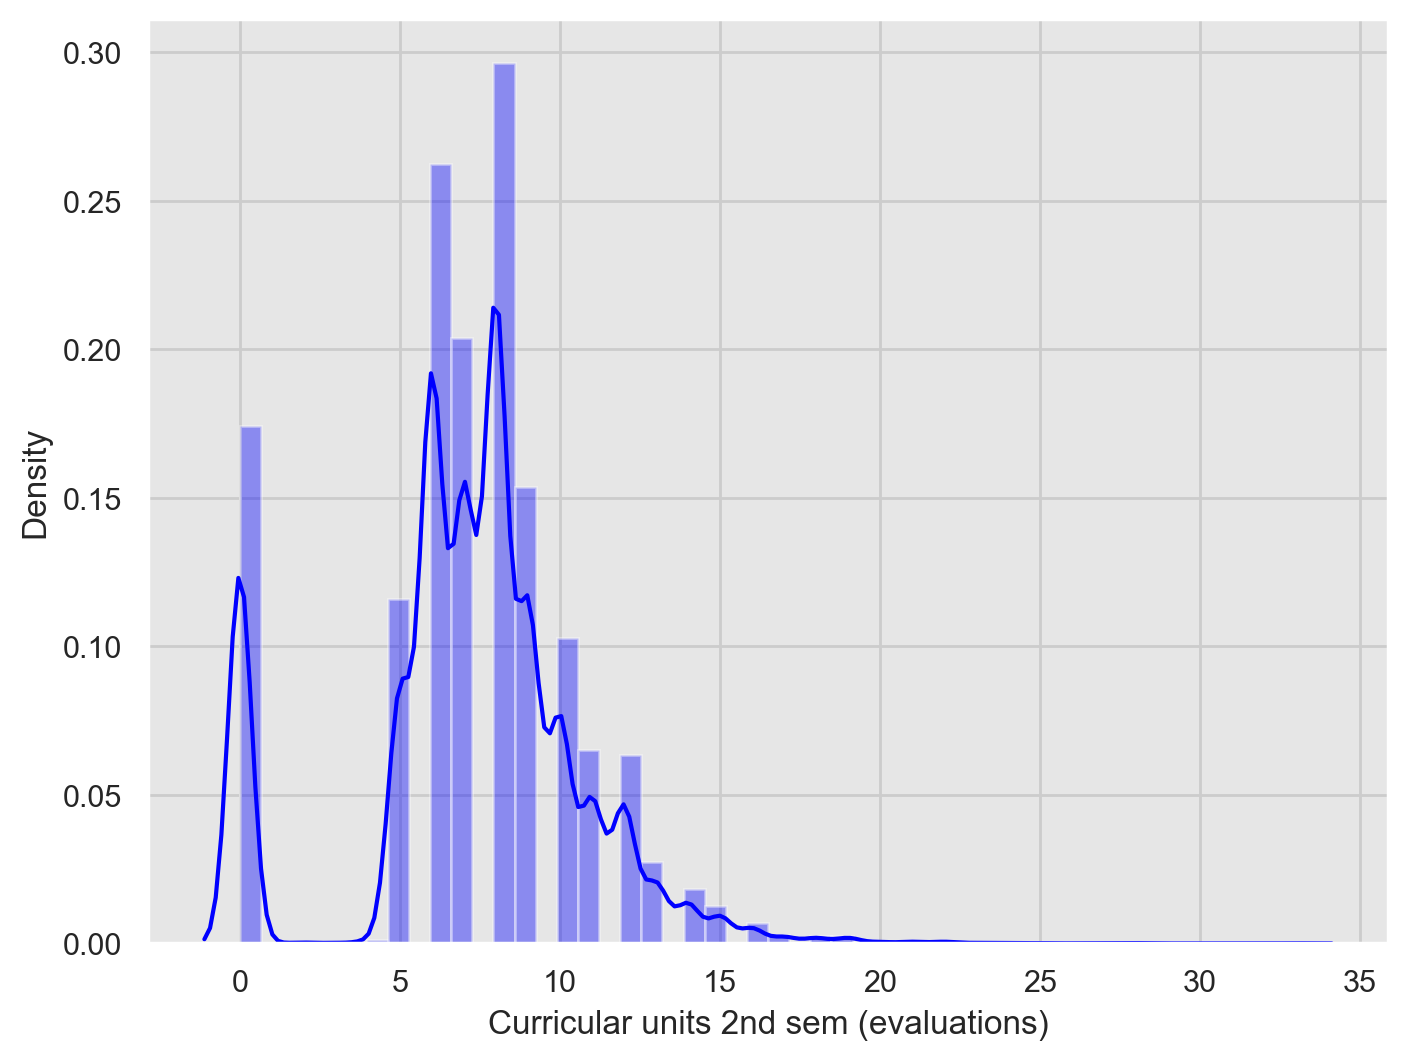

In [141]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.distplot(
    a=train_df["Curricular units 2nd sem (evaluations)"],
    color="blue",
    ax=ax
) ;

#### Target 별 분포
- Graduated : 8
- Dropout : 0
- Enrolled : 8

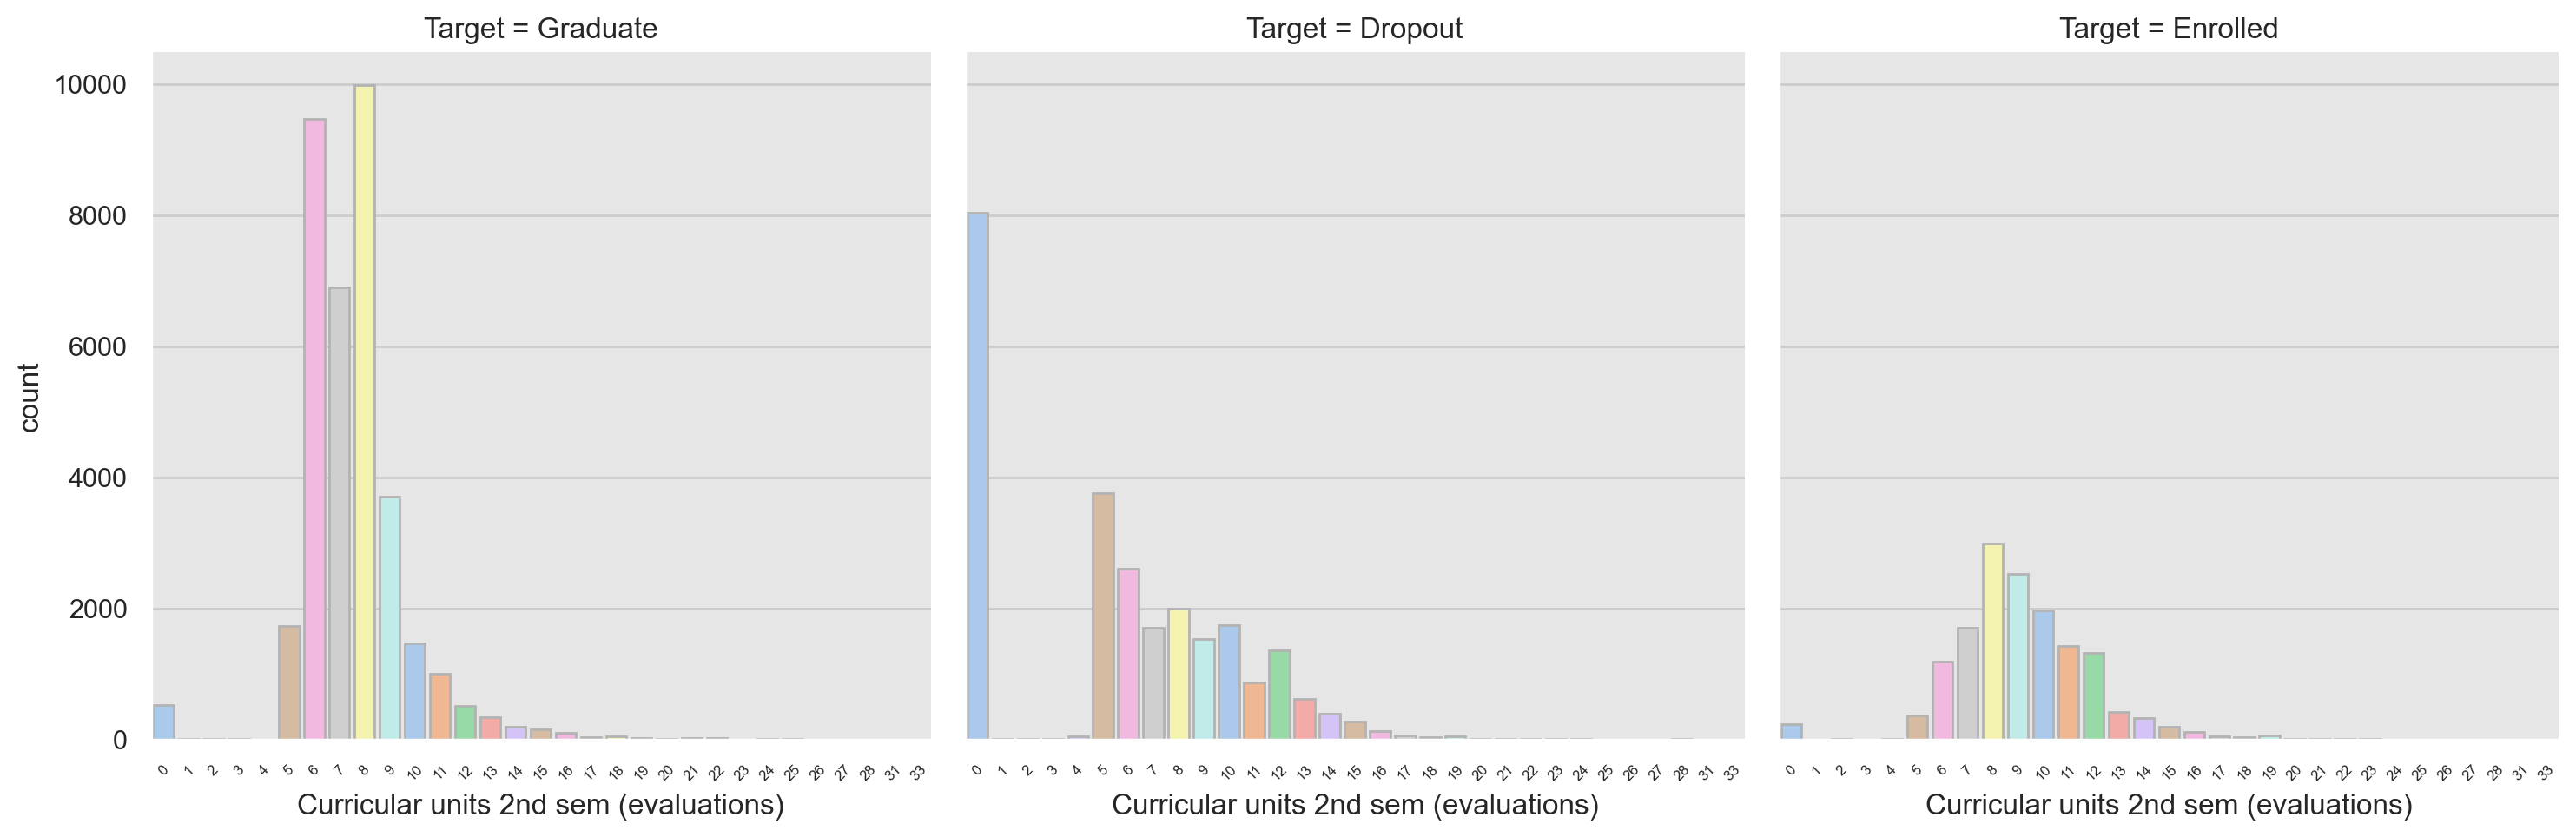

In [142]:
g = sns.catplot(
    data=train_df,
    x="Curricular units 2nd sem (evaluations)",
    col="Target",
    palette="pastel",
    edgecolor=".7",
    kind="count"
)
g.set_xticklabels(rotation=45, fontsize=6, ha="center") ;

In [35]:
col = "Curricular units 2nd sem (evaluations)"
top = 3

filter_dfs = []
for t in list(train_df["Target"].unique()) :     
    temp_df = train_df.query("Target == @t")[["Target", col]]
    filter_dfs.append(temp_df[col].value_counts()[:top].to_frame().reset_index().assign(target=t))
    
filter_df = pd.concat(filter_dfs).reset_index(drop=True)[["target", col, "count"]]    
filter_df

target  Curricular units 2nd sem (evaluations)  count
0  Graduate                                       8   9983
1  Graduate                                       6   9467
2  Graduate                                       7   6890
3   Dropout                                       0   8039
4   Dropout                                       5   3758
5   Dropout                                       6   2599
6  Enrolled                                       8   2986
7  Enrolled                                       9   2526
8  Enrolled                                      10   1974

### Target and "Curricular units 2nd sem (without evaluations)" 의 분포
- Curricular units 2nd sem (without evaluations) 분포
   - 2학기 평가가 없는 교과목 단위 수

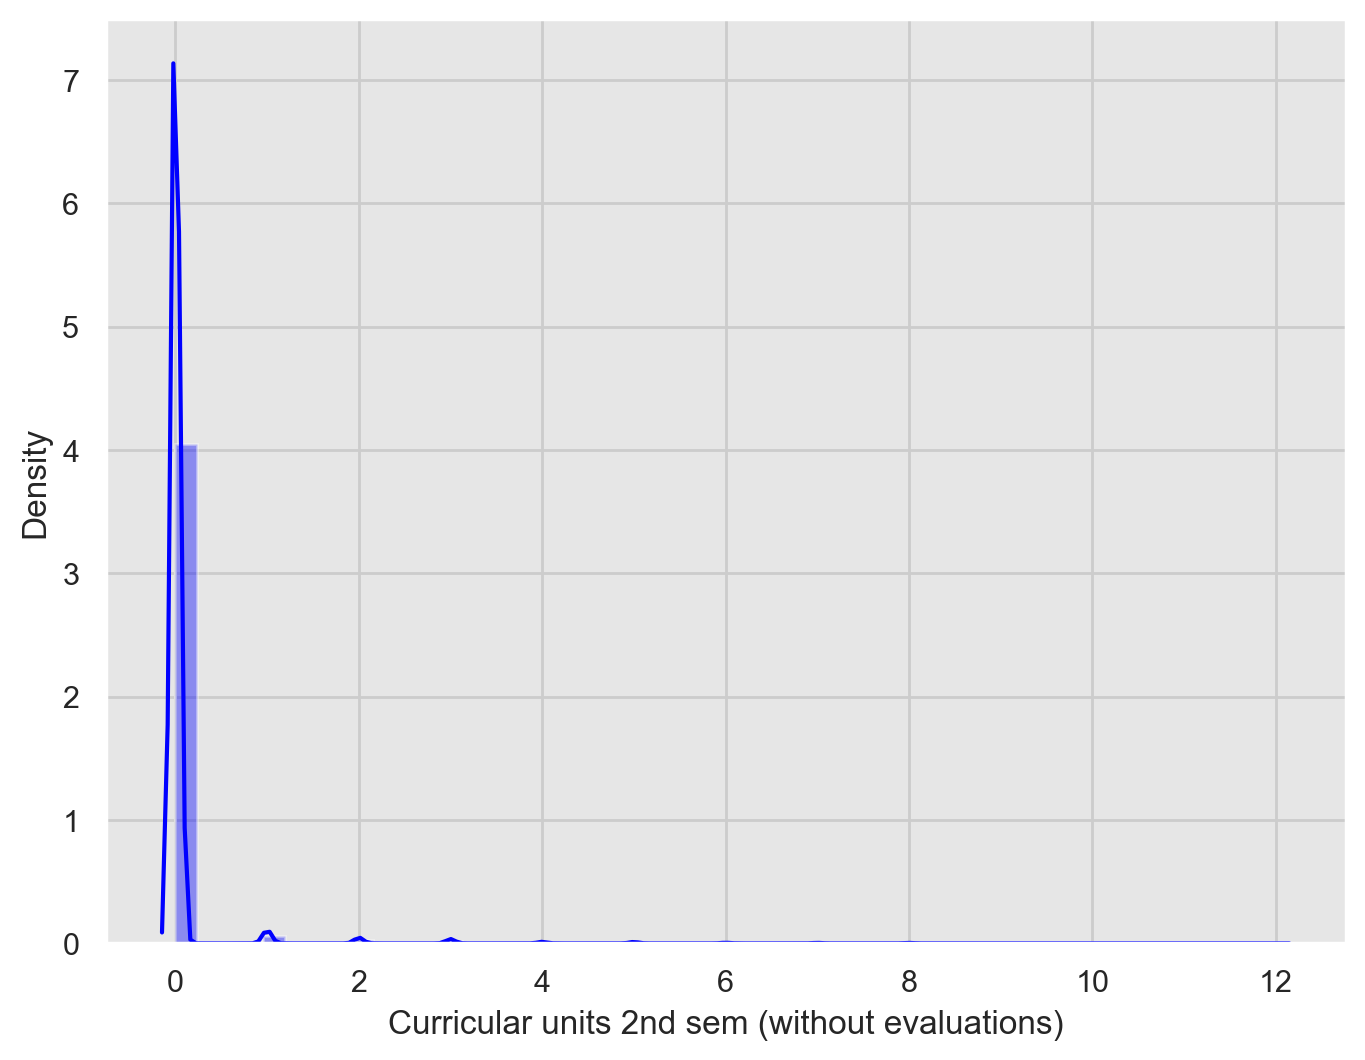

In [146]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.distplot(
    a=train_df["Curricular units 2nd sem (without evaluations)"],
    color="blue",
    ax=ax
) ;

#### Target 별 분포
- Graduated : 0
- Dropout : 0
- Enrolled : 0
- 2학기에 평가를 하지 않은 교과목은 거의 없었다.    

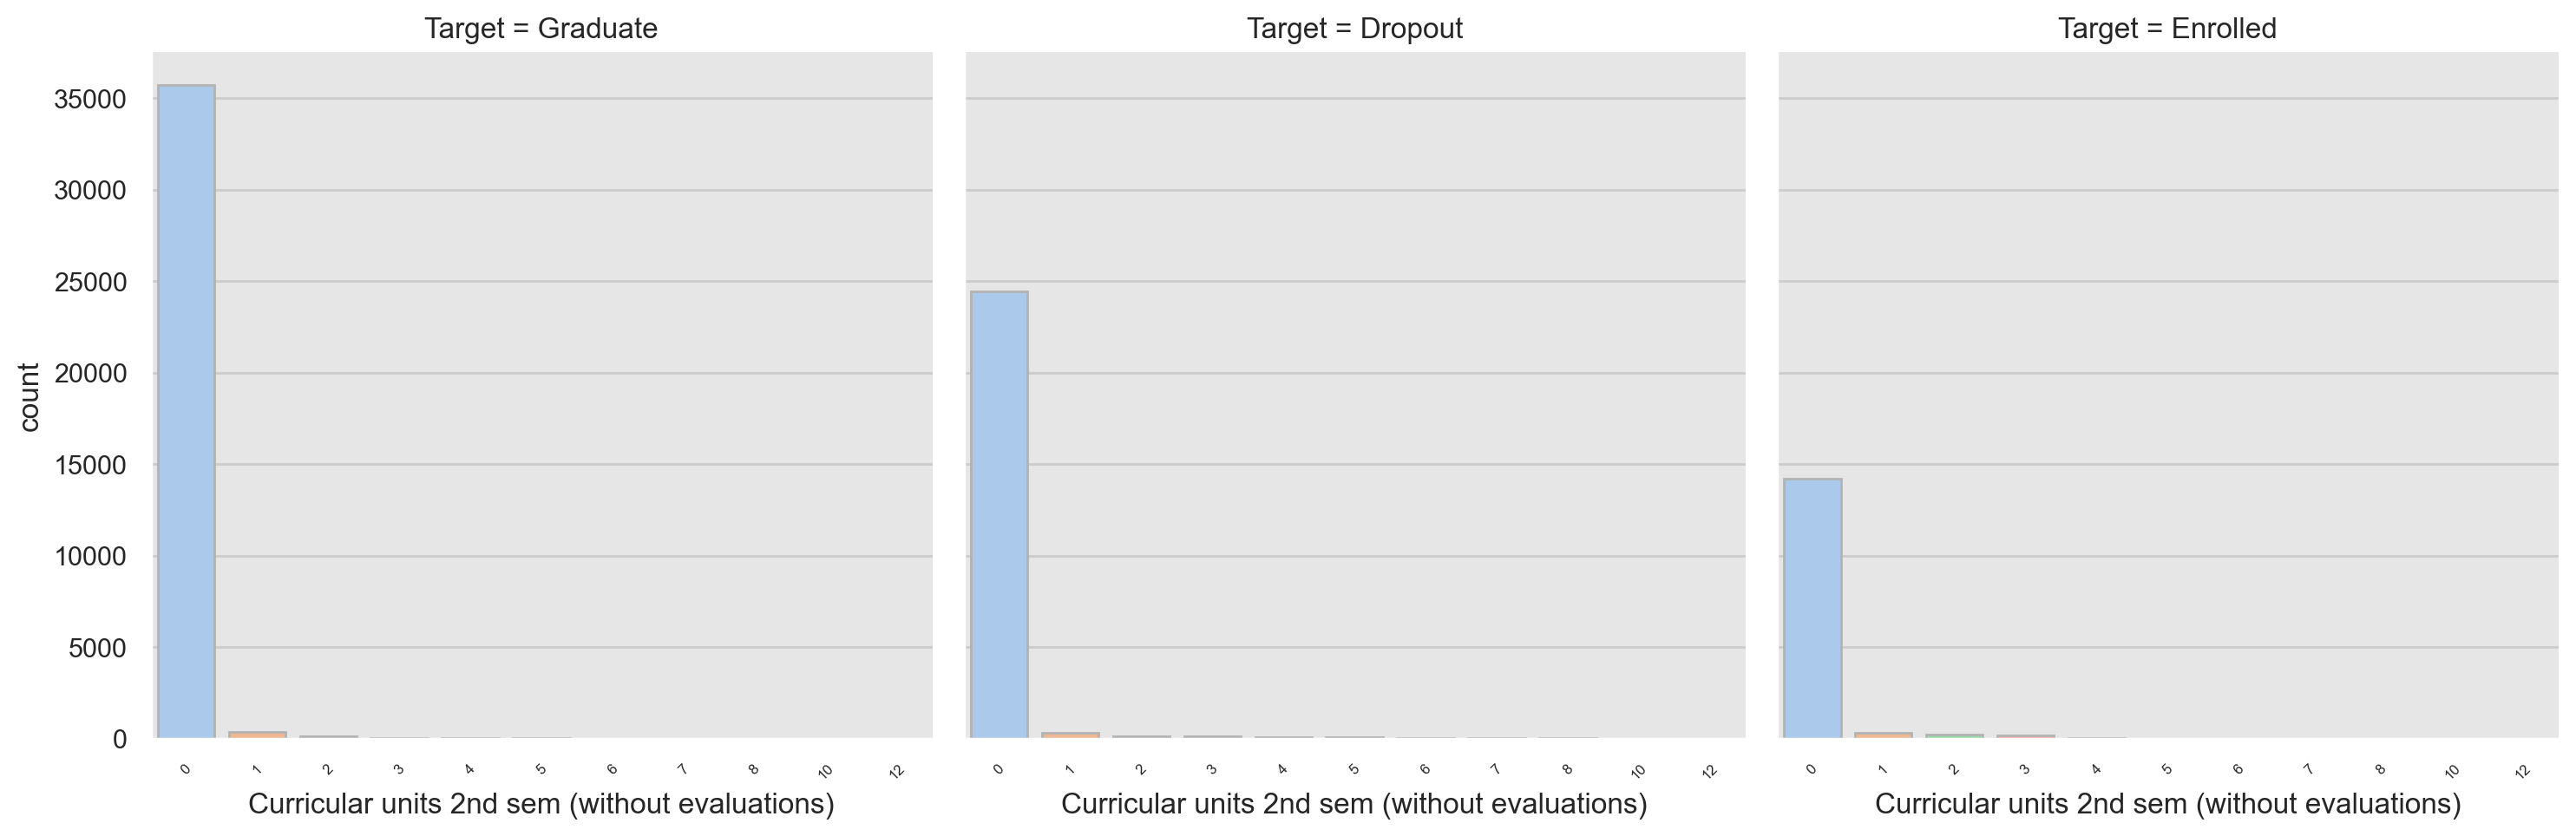

In [147]:
g = sns.catplot(
    data=train_df,
    x="Curricular units 2nd sem (without evaluations)",
    col="Target",
    palette="pastel",
    edgecolor=".7",
    kind="count"
)
g.set_xticklabels(rotation=45, fontsize=6, ha="center") ;

In [36]:
col = "Curricular units 2nd sem (without evaluations)"
top = 3

filter_dfs = []
for t in list(train_df["Target"].unique()) :     
    temp_df = train_df.query("Target == @t")[["Target", col]]
    filter_dfs.append(temp_df[col].value_counts()[:top].to_frame().reset_index().assign(target=t))
    
filter_df = pd.concat(filter_dfs).reset_index(drop=True)[["target", col, "count"]]    
filter_df

target  Curricular units 2nd sem (without evaluations)  count
0  Graduate                                               0  35731
1  Graduate                                               1    366
2  Graduate                                               2    107
3   Dropout                                               0  24440
4   Dropout                                               1    326
5   Dropout                                               2    134
6  Enrolled                                               0  14201
7  Enrolled                                               1    336
8  Enrolled                                               2    198

### Target and "Curricular units 1st sem (without evaluations)"
- "Curricular units 1st sem (without evaluations)"
   - 1학기 평가가 없는 교과목 단위 수

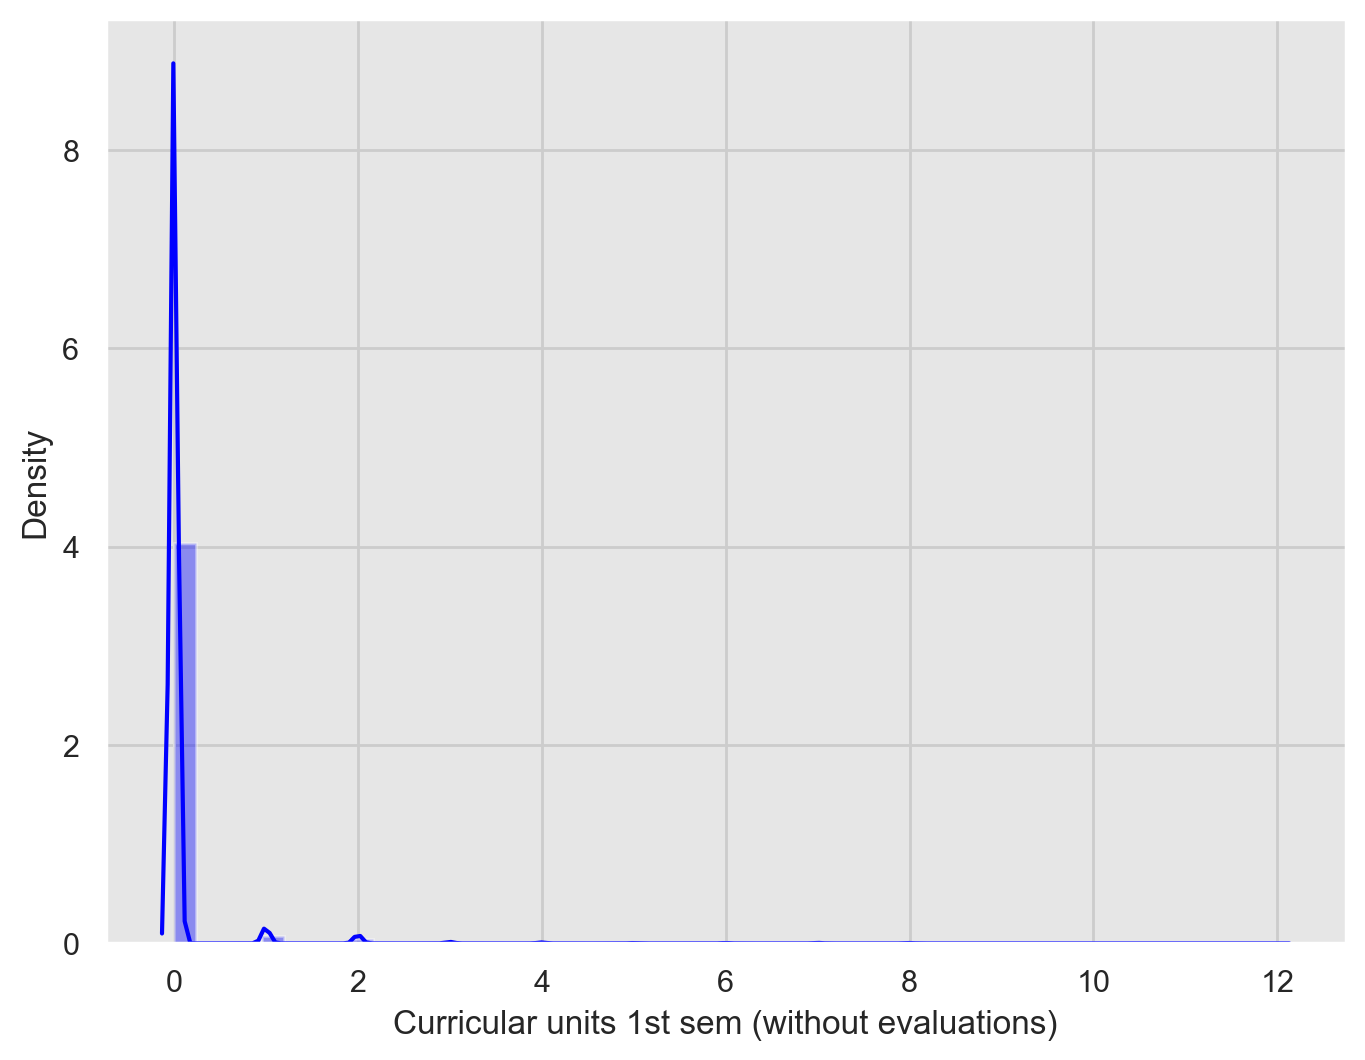

In [150]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.distplot(
    a=train_df["Curricular units 1st sem (without evaluations)"],
    color="blue",
    ax=ax
) ;

#### Target 별 분포
- Graduated : 0
- Dropout : 0
- Enrolled : 0

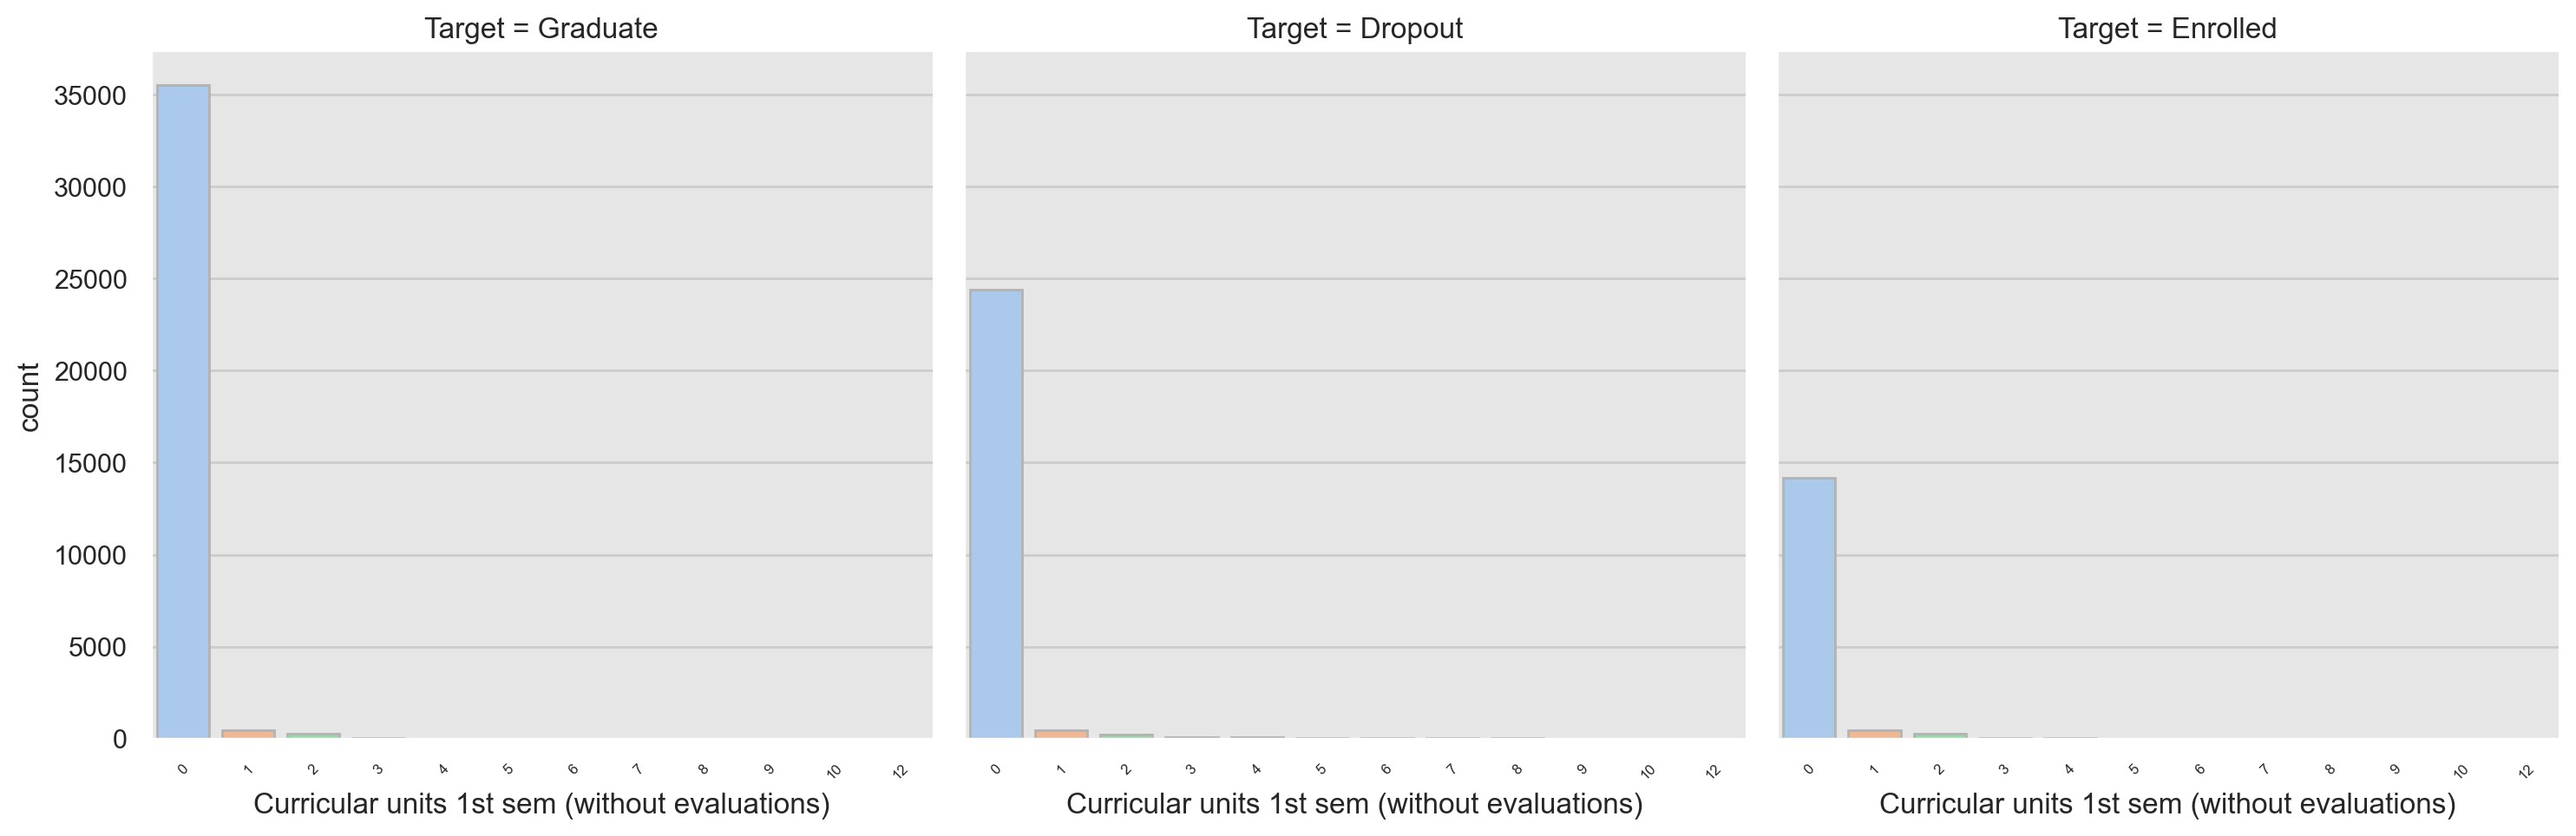

In [151]:
g = sns.catplot(
    data=train_df,
    x="Curricular units 1st sem (without evaluations)",
    col="Target",
    palette="pastel",
    edgecolor=".7",
    kind="count"
)
g.set_xticklabels(rotation=45, fontsize=6, ha="center") ;

In [37]:
col = "Curricular units 1st sem (without evaluations)"
top = 3

filter_dfs = []
for t in list(train_df["Target"].unique()) :     
    temp_df = train_df.query("Target == @t")[["Target", col]]
    filter_dfs.append(temp_df[col].value_counts()[:top].to_frame().reset_index().assign(target=t))
    
filter_df = pd.concat(filter_dfs).reset_index(drop=True)[["target", col, "count"]]    
filter_df

target  Curricular units 1st sem (without evaluations)  count
0  Graduate                                               0  35534
1  Graduate                                               1    464
2  Graduate                                               2    246
3   Dropout                                               0  24379
4   Dropout                                               1    434
5   Dropout                                               2    230
6  Enrolled                                               0  14156
7  Enrolled                                               1    473
8  Enrolled                                               2    270

### 그 외 feature와 Target의 분포 : Target 별 "Mother's qualification" 분포
- 어머니의 최종 학력
    - Graduated : 1 Secondary Education 12th Year of Schooling or Eq.
    - Dropout : 37 Basic education 1st cycle (4th/5th year) or equiv.
    - Enrolled : 1 Secondary Education 12th Year of Schooling or Eq.
- 특정 학력 카테고리에 데이터가 몰려 있다.    

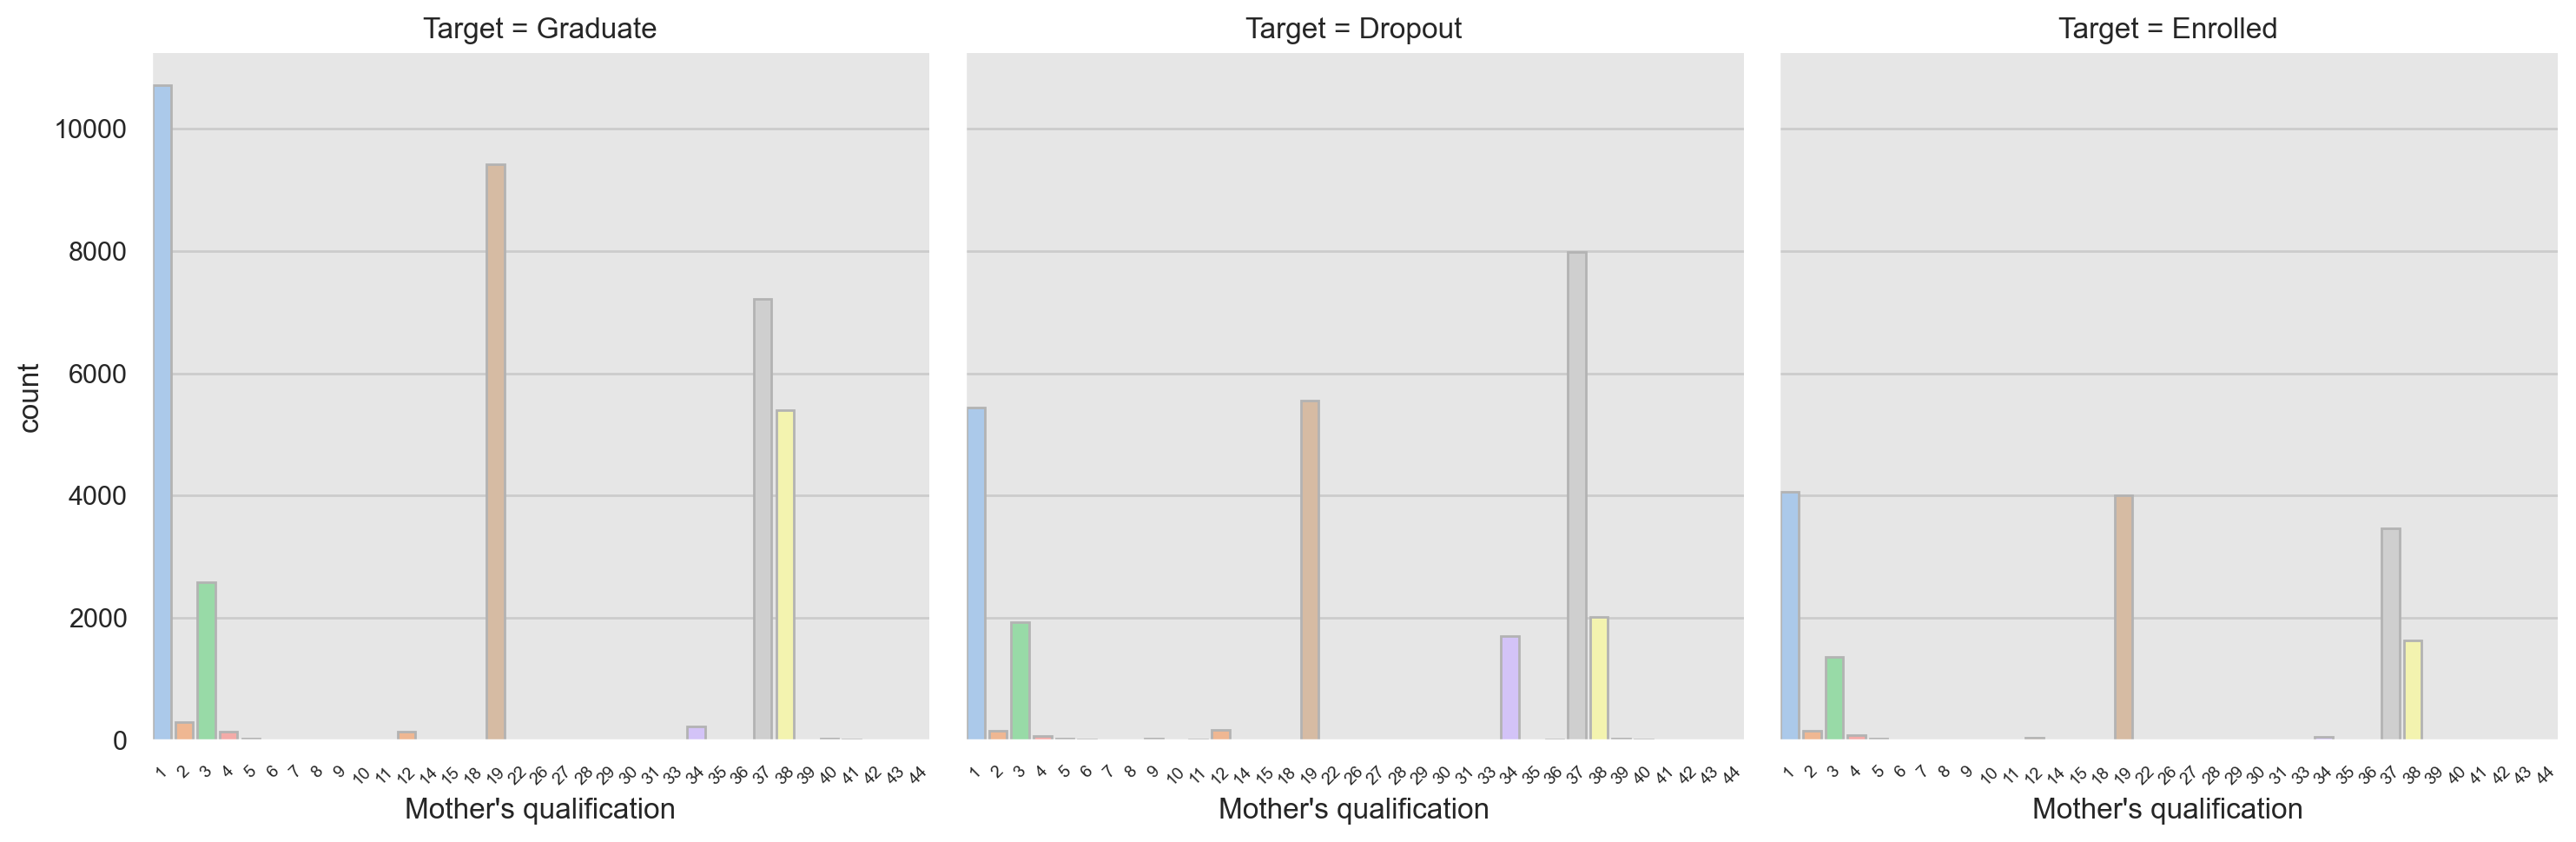

In [123]:
g = sns.catplot(
    data=train_df,
    x="Mother's qualification",
    col="Target",
    palette="pastel",
    edgecolor=".7",
    kind="count"
)
g.set_xticklabels(rotation=45, fontsize=7, ha="center") ;

In [53]:
col = "Mother's qualification"
top = 3
cate_descs = clean_desc(col)
mapper = dict(cate_descs)

filter_dfs = []
for t in list(train_df["Target"].unique()) :     
    temp_df = train_df.query("Target == @t")[["Target", col]]
    temp_df["desc"] = temp_df[col].astype(str).map(mapper)
    temp_df["desc"] = temp_df[col].astype(str) + " " + temp_df["desc"]
    filter_dfs.append(temp_df["desc"].value_counts()[:top].to_frame().reset_index().assign(target=t))
    
filter_df = pd.concat(filter_dfs).reset_index(drop=True)[["target", "desc", "count"]]    
filter_df

target                                                         desc  \
0  Graduate          1 Secondary Education 12th Year of Schooling or Eq.   
1  Graduate  19 Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.   
2  Graduate        37 Basic education 1st cycle (4th/5th year) or equiv.   
3   Dropout        37 Basic education 1st cycle (4th/5th year) or equiv.   
4   Dropout  19 Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.   
5   Dropout          1 Secondary Education 12th Year of Schooling or Eq.   
6  Enrolled          1 Secondary Education 12th Year of Schooling or Eq.   
7  Enrolled  19 Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.   
8  Enrolled        37 Basic education 1st cycle (4th/5th year) or equiv.   

   count  
0  10699  
1   9411  
2   7214  
3   7981  
4   5558  
5   5446  
6   4057  
7   4011  
8   3469

### Target 별 "Father's qualification" 의 분포
- 아버지의 최종 학력
    - Graduated : 37 Basic education 1st cycle (4th/5th year) or equiv.
    - Dropout : 37 Basic education 1st cycle (4th/5th year) or equiv.	
    - Enrolled : 37 Basic education 1st cycle (4th/5th year) or equiv.	
- 특정 학력 카테고리에 데이터가 치우쳐져 있다.     

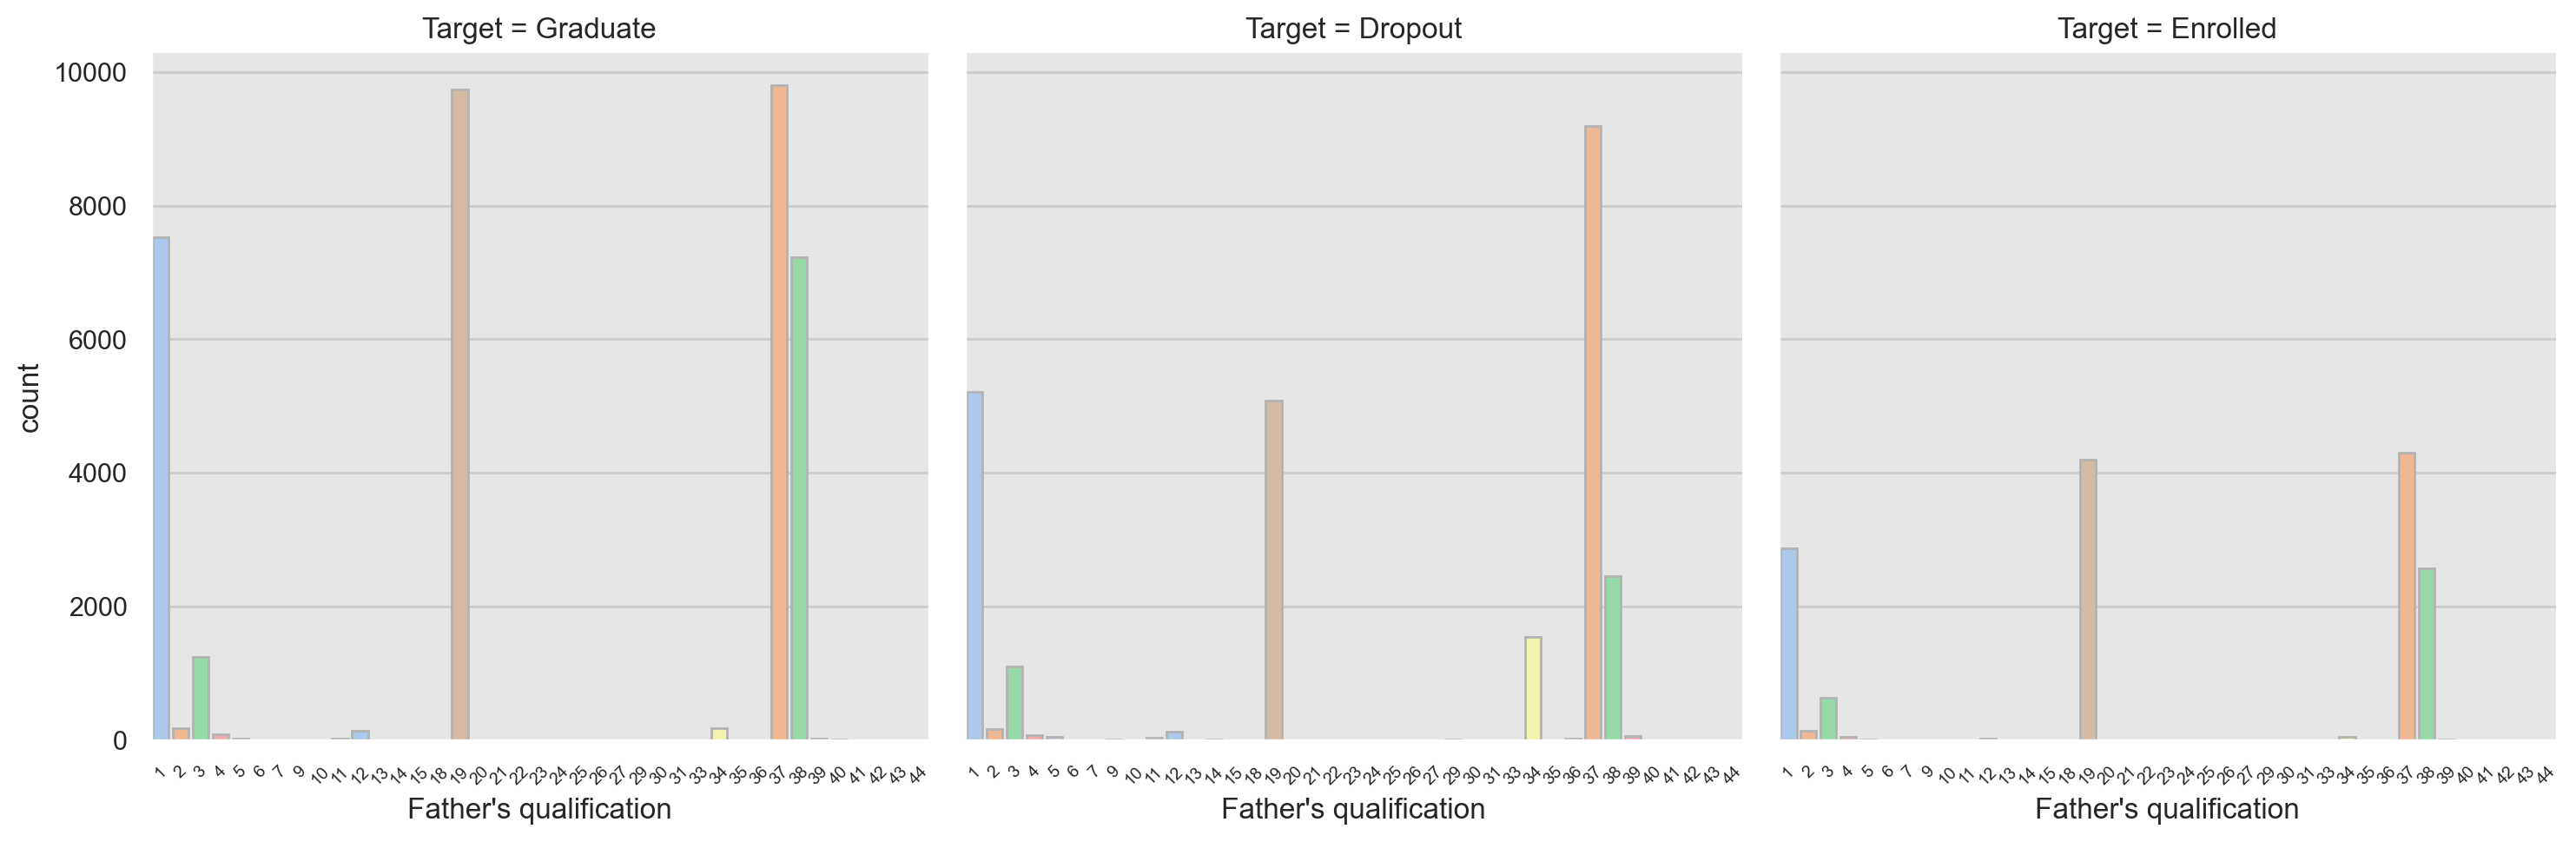

In [158]:
g = sns.catplot(
    data=train_df,
    x="Father's qualification",
    col="Target",
    palette="pastel",
    edgecolor=".7",
    kind="count"
)
g.set_xticklabels(rotation=45, fontsize=7, ha="center") ;

In [54]:
col = "Father's qualification"
top = 3
cate_descs = clean_desc(col)
mapper = dict(cate_descs)

filter_dfs = []
for t in list(train_df["Target"].unique()) :     
    temp_df = train_df.query("Target == @t")[["Target", col]]
    temp_df["desc"] = temp_df[col].astype(str).map(mapper)
    temp_df["desc"] = temp_df[col].astype(str) + " " + temp_df["desc"]
    filter_dfs.append(temp_df["desc"].value_counts()[:top].to_frame().reset_index().assign(target=t))
    
filter_df = pd.concat(filter_dfs).reset_index(drop=True)[["target", "desc", "count"]]    
filter_df

target                                                         desc  \
0  Graduate        37 Basic education 1st cycle (4th/5th year) or equiv.   
1  Graduate  19 Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.   
2  Graduate          1 Secondary Education 12th Year of Schooling or Eq.   
3   Dropout        37 Basic education 1st cycle (4th/5th year) or equiv.   
4   Dropout          1 Secondary Education 12th Year of Schooling or Eq.   
5   Dropout  19 Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.   
6  Enrolled        37 Basic education 1st cycle (4th/5th year) or equiv.   
7  Enrolled  19 Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.   
8  Enrolled          1 Secondary Education 12th Year of Schooling or Eq.   

   count  
0   9794  
1   9730  
2   7521  
3   9190  
4   5207  
5   5088  
6   4306  
7   4197  
8   2876

### Target 별 "Displaced" 의 분포
- 추방 여부
   - Graduated : yes > no
   - Dropout : yes > no
   - Enrolled : yes > no

In [167]:
displaced_desc = clean_desc("Displaced")
displaced_desc.sort()
displaced_desc

[('0', 'no'), ('1', 'yes')]

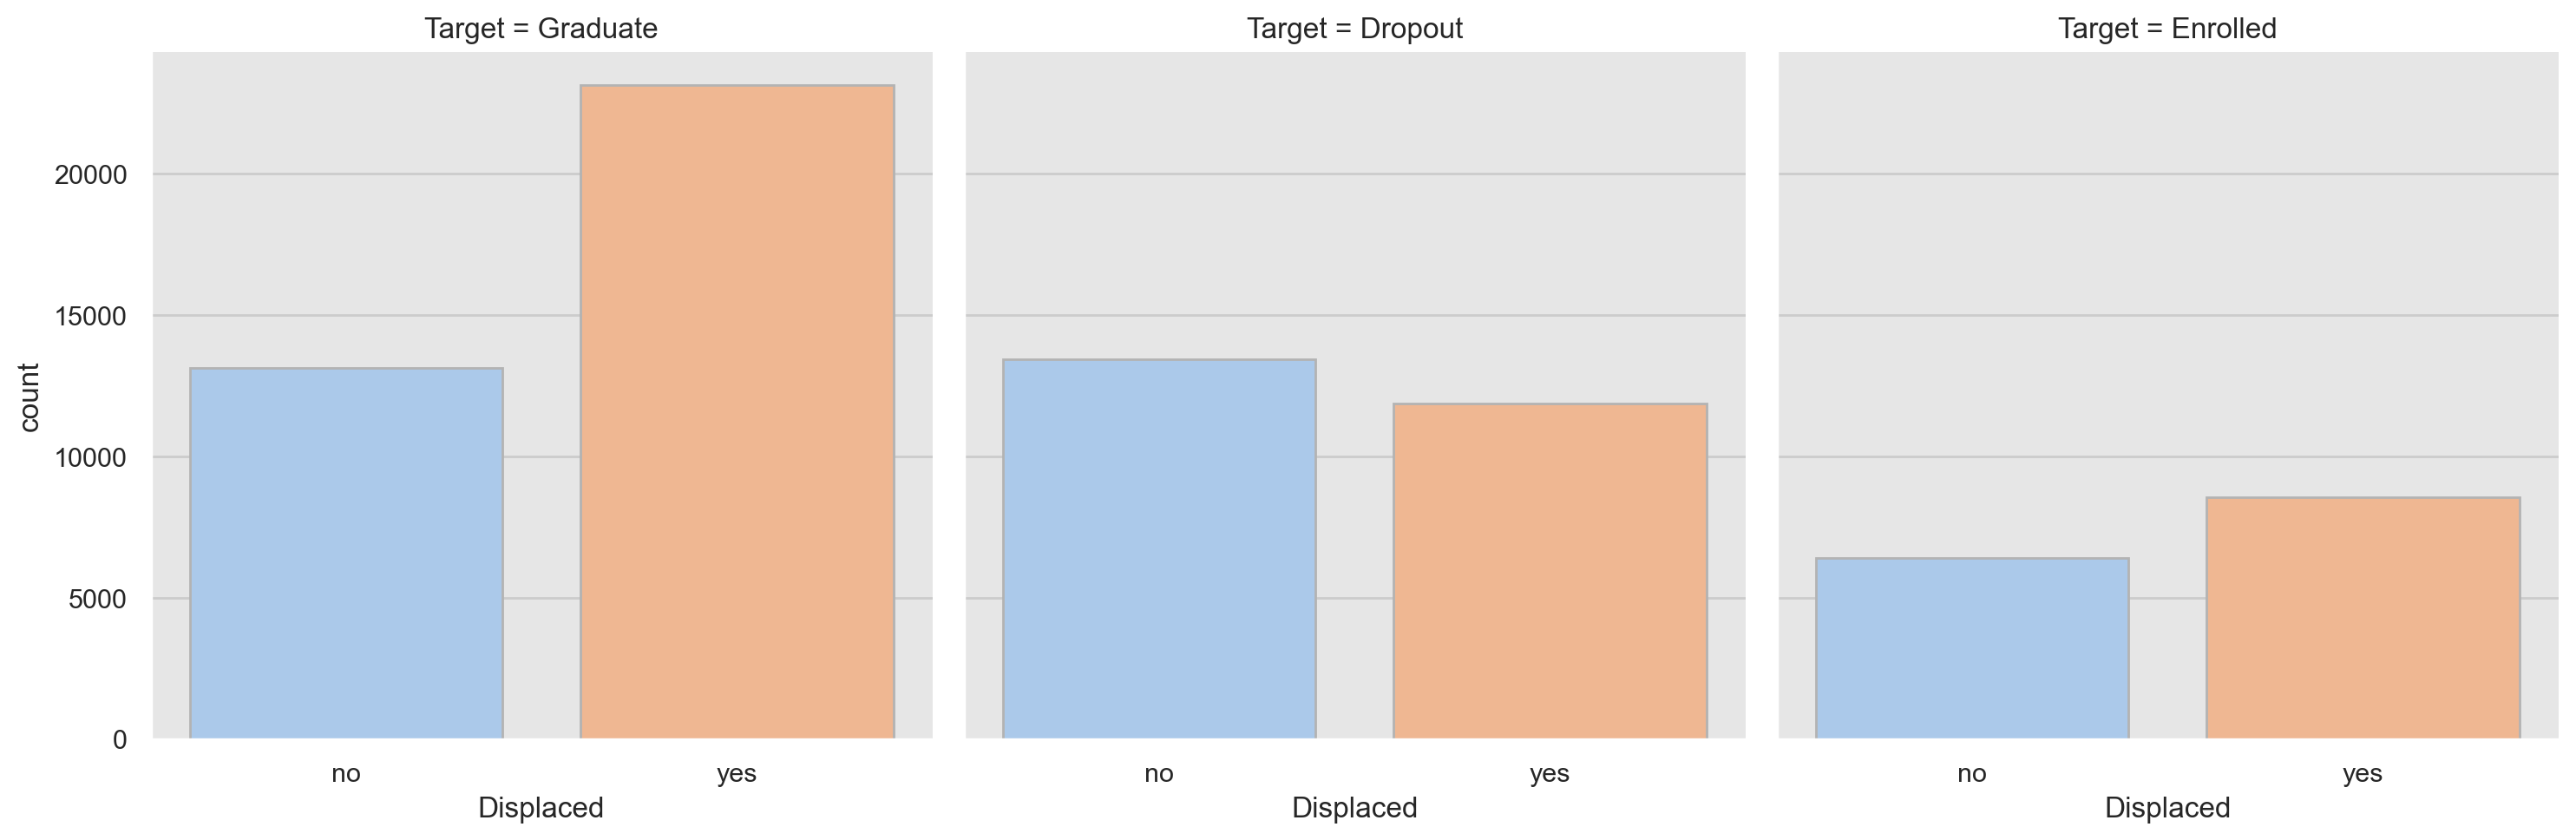

In [168]:
g = sns.catplot(
    data=train_df,
    x="Displaced",
    col="Target",
    palette="pastel",
    edgecolor=".7",
    kind="count"
)
g.set_xticklabels(labels=[ele[1] for ele in displaced_desc]) ;

### Target 별 "Debtor"의 분포
- 채무 여부
   - Graduated : yes < no
   - Dropout : yes < no
   - Enrolled : yes < no

In [58]:
debtor_desc = clean_desc("Debtor")
debtor_desc.sort()
debtor_desc

[('0', 'no'), ('1', 'yes')]

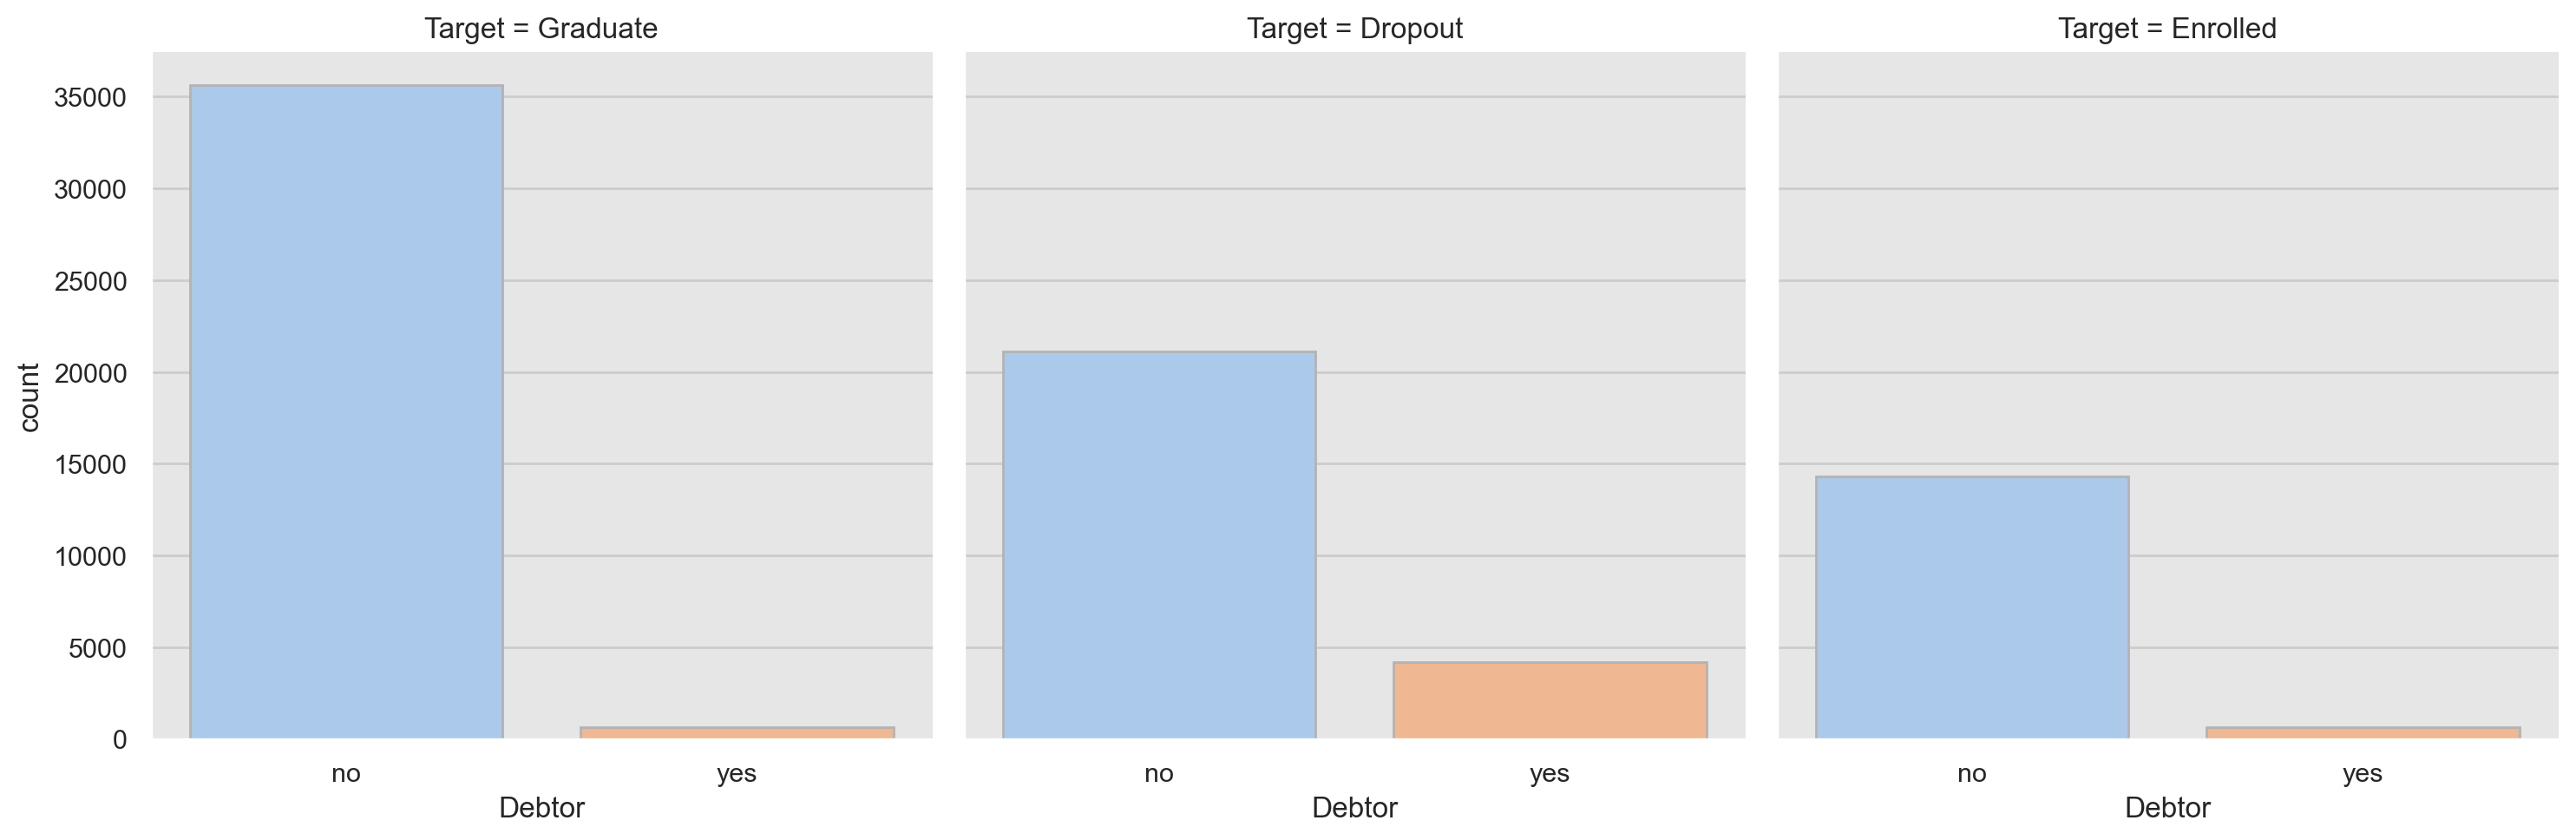

In [59]:
g = sns.catplot(
    data=train_df,
    x="Debtor",
    col="Target",
    palette="pastel",
    edgecolor=".7",
    kind="count"
)
g.set_xticklabels(labels=[ele[1] for ele in debtor_desc]) ;

### Target 별 Nacionanlity 의 분포
- 민족
   - Graduated : 1 Portuguese
   - Dropout : 1 Portuguese
   - Enrolled : 1 Portuguese
- **이 데이터는 포르투갈의 한 단체에서 지원하고 운영하고 있기때문에 포르투갈 민족의 학생이 대다수이다.**

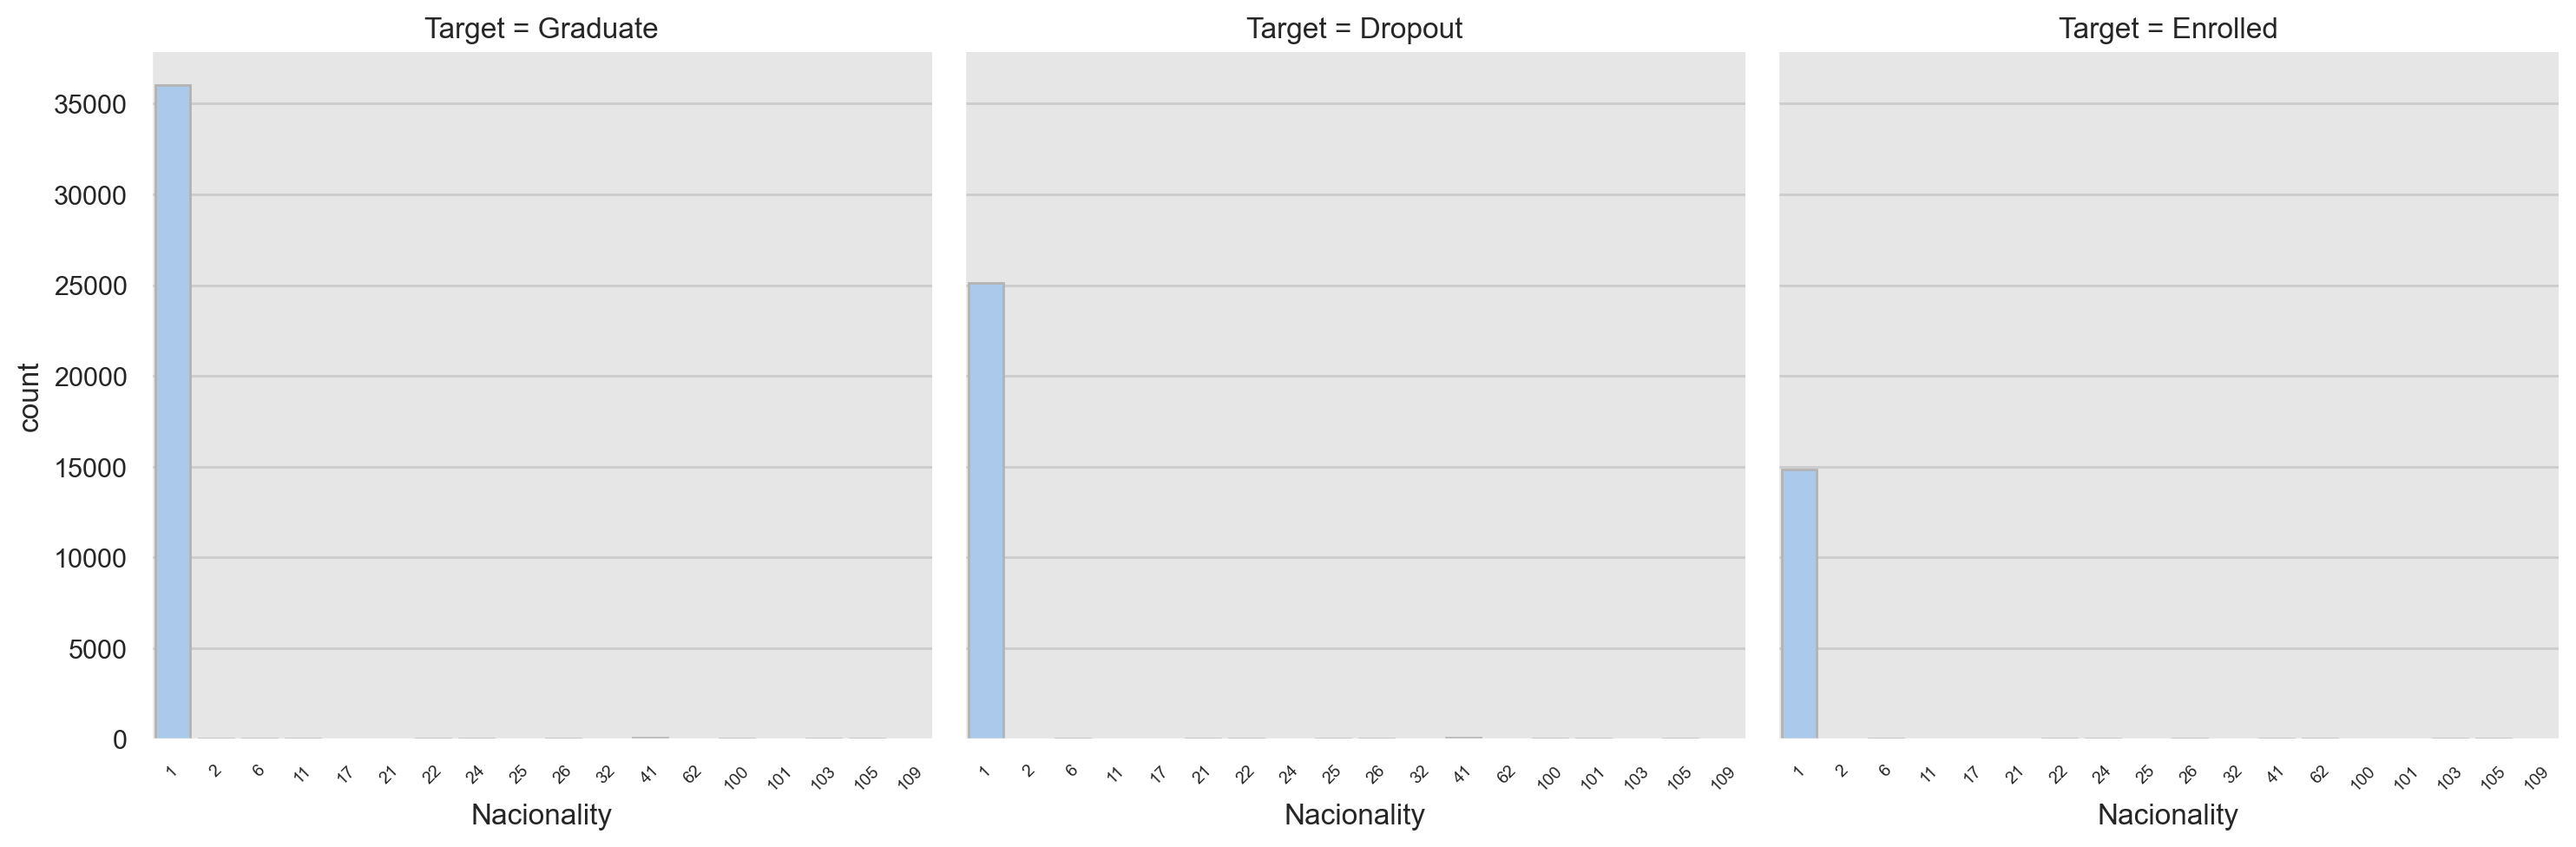

In [60]:
g = sns.catplot(
    data=train_df,
    x="Nacionality",
    col="Target",
    palette="pastel",
    edgecolor=".7",
    kind="count"
)
g.set_xticklabels(rotation=45, fontsize=7, ha="center") ;

In [61]:
col = "Nacionality"
top = 3
cate_descs = clean_desc(col)
mapper = dict(cate_descs)

filter_dfs = []
for t in list(train_df["Target"].unique()) :     
    temp_df = train_df.query("Target == @t")[["Target", col]]
    temp_df["desc"] = temp_df[col].astype(str).map(mapper)
    temp_df["desc"] = temp_df[col].astype(str) + " " + temp_df["desc"]
    filter_dfs.append(temp_df["desc"].value_counts()[:top].to_frame().reset_index().assign(target=t))
    
filter_df = pd.concat(filter_dfs).reset_index(drop=True)[["target", "desc", "count"]]    
filter_df

target           desc  count
0  Graduate  1 Portuguese;  36040
1  Graduate  41 Brazilian;     93
2  Graduate  26 Santomean;     36
3   Dropout  1 Portuguese;  25125
4   Dropout  41 Brazilian;     95
5   Dropout     6 Spanish;     22
6  Enrolled  1 Portuguese;  14848
7  Enrolled  41 Brazilian;     33
8  Enrolled  26 Santomean;     19

## 3. Modeling
- numeric, categorical features split
   - numeric : 18개
   - categorical : 18개
- Data Transform
   - individual feature, target feature 구분
   - target feature encoding
   - categorical features의 dtype 변경 : "category"
      - object로 설정할 수도 있지만 모델링에서 사용할 몇몇 패키지에서 카테고리 변수를 인식하는 값으로 dtype의 "category" 값을 사용할 수 있다.
- feature_preprocessor pipeline 생성
   - num_transformer, cat_transformer 파이프라인을 통합하는 파이프라인
   - num, cat 각각 여러 전처리기를 적용할 수 있도록 세분화 함
      - num_transformer : StandardScaler(), MinMaxScaler(), non_scaler
      - cat_transformer : OneHotEncoder(), OrdinalEncoder(), non_encoder
- feature별 전처리 방법을 달리하하여 모델 성능 실험
   - 전처리 방법을 다르게 했을 때 모델의 성능이 어떻게 변화하는지 확인하기 위함
   - RandomForestClassifier(), ExtraTreesClassifier(), HistGradientBoostingClassifier() 모델을 각각 다른 전처리방법으로 cv 성능 테스트
- Feature Engineering과 Submission
   - HistGradientBoostingClassifier()을 기본 모델로 전처리, feature engineering, hyper parameter tunning 을 함께 진행하여 모델링을 한다.
   - feature engineering 시도 
      - feature importance로 feature 선택 : randomF 모델로부터 feature importance 값을 추출하고 여러 기준값을 정하여 특정한 feature만 선택하여 성능 테스트
      - association features : feature 간의 연관성을 계산한 값으로부터 연관성이 낮다고 보여지는 feature를 제외하여 모델 성능 측정
      - outlier cap 적용 : train data에서 numeric features의 outlier를 표준편차와 사분위수 방법으로 각각 구한 후 outlier 최소, 최대값을 넘어가는 데이터의 비중을 계산하여 최소, 최대값으로 변경(cap)
      - log transform : train data에서 numeric features를 log 변환 적용, log 변환을 적용하면 feature의 분포가 정규분포에 가까워지게 된다.
      - log transform + outlier cap : numeric features를 log 변환과 아웃라이어 캡을 적용하여 성능 테스트
      - numeric feature binning : numeric feature 중 grade 관련 feature의 데이터의 분포 구간을 10, 20, 30 등으로 균일하게 적용 후 categorical feature로 변경
      - categorical feature binning : categorical features의 데이터 중 빈도수가 현저히 낮은 데이터들을 찾고, 특정값으로 대체
      - feature interaction, select 추가 : feature engineering pipeline을 만들고, feature interaction으로 PolynomialFeatures()를 사용하고, feature select로 SelectKBest()를 사용
      - SelectKBest() 설정 : 전체 파이프라인의 마지막 단계에 있는 feature select 방법으로 사용하는 SelectKBest()의 k 파라미터 값을 다르게하여 모델의 성능 테스트
      - numeric, categorical features binning + log transform : train data의 모든 변수들의 binning과 log 변형을 적용
      - 나이브 베이즈 결합 모형 : Naive Bayes 모델의 나이브 가정(naive assumption) 원리를 적용하여 데이터 타입별 다른 모형으로 가능도(likelihood)를 계산한 후 곱하여 전체 가능도를 통해 예측값을 추정

In [32]:
# 전처리, 엔지니어링
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.model_selection import train_test_split, KFold, cross_validate, GridSearchCV, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_classif

# 확률적 판별모형
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# 확률적 생성모형
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB, CategoricalNB

# 판별모형
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# 앙상블(모형결합)
from sklearn.ensemble import (VotingClassifier, BaggingClassifier, RandomForestClassifier, 
                              ExtraTreesClassifier, AdaBoostClassifier, HistGradientBoostingClassifier)
import xgboost as xgb

### (1) numeric, categorical features

In [7]:
grade_cols = list(train_df.filter(regex=".*grade").columns)
ratio_cols = list(train_df.filter(regex=".rate").columns) + ["GDP"]
age_cols = list(train_df.filter(regex="^Age").columns)
curricular_cols = list(train_df.filter(regex="^Curricular").columns)

numeric_features = grade_cols + ratio_cols + age_cols + curricular_cols
numeric_features = list(set(numeric_features))
categorical_features = list(set(train_df.columns).difference(numeric_features + ["id", "Target"]))


print(f'''
* numeric features
length : {len(numeric_features)}
{numeric_features}

* categorical features
length : {len(categorical_features)}
{categorical_features}
''')


* numeric features
length : 18
['Previous qualification (grade)', 'Curricular units 2nd sem (without evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)', 'Age at enrollment', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 1st sem (credited)', 'Admission grade', 'Inflation rate', 'Curricular units 1st sem (evaluations)', 'Unemployment rate', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (credited)', 'GDP', 'Curricular units 2nd sem (enrolled)', 'Curricular units 1st sem (without evaluations)']

* categorical features
length : 18
['Tuition fees up to date', "Mother's occupation", 'Gender', 'Application order', 'Educational special needs', 'Course', 'Daytime/evening attendance', 'Displaced', 'Debtor', 'Application mode', "Father's occupation", "Father's qualification", 'Marital status', 'Nacionality', "Mother's qualification", 'Scholarship holder

### (2) Data Transform

### individual, target feature 구분

In [142]:
X = train_df.copy()
X = X.drop(["id", "Target"], axis=1)
Y = train_df["Target"]

print(f'''
shape of train X : {X.shape}
shape of train Y : {Y.shape}
''')


shape of train X : (76518, 36)
shape of train Y : (76518,)



### Target feature Encoding

In [9]:
label_enc = LabelEncoder()
y_enc = label_enc.fit_transform(Y)
y_enc

array([2, 0, 0, ..., 1, 0, 2])

In [10]:
label_enc.classes_

array(['Dropout', 'Enrolled', 'Graduate'], dtype=object)

### categorical features의 dtype 변경

In [11]:
X[categorical_features] = X[categorical_features].astype("category")
X[categorical_features].dtypes

Tuition fees up to date       category
Mother's occupation           category
Gender                        category
Application order             category
Educational special needs     category
Course                        category
Daytime/evening attendance    category
Displaced                     category
Debtor                        category
Application mode              category
Father's occupation           category
Father's qualification        category
Marital status                category
Nacionality                   category
Mother's qualification        category
Scholarship holder            category
Previous qualification        category
International                 category
dtype: object

### (3) numerical, categorical features 변환을 위한 pipeline 생성
- feature_preprocessor에서 num_transformer와 cat_transformer을 설정할 수 있다. 

In [12]:
num_transformer = Pipeline(steps=[
    ("ss", StandardScaler()),
    ("mms", MinMaxScaler()),
    ("non_scaler", "passthrough")
])

cat_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder()),
    ("ordinal", OrdinalEncoder()),
    ("non_encoder", "passthrough")
])

feature_preprocessor = ColumnTransformer(
    transformers=[
        ("num_transformer", num_transformer, numeric_features),
        ("cat_transformer", cat_transformer, categorical_features)
    ], remainder="passthrough"
)

feature_preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_transformer',
                                 Pipeline(steps=[('ss', StandardScaler()),
                                                 ('mms', MinMaxScaler()),
                                                 ('non_scaler',
                                                  'passthrough')]),
                                 ['Curricular units 2nd sem (evaluations)',
                                  'Curricular units 1st sem (evaluations)',
                                  'Admission grade', 'GDP',
                                  'Previous qualification (grade)',
                                  'Curricular units 1st sem (enrolled)',
                                  'Curricular units 2n...
                                                  'passthrough')]),
                                 ['Previous qualification',
                                  'Daytime/evening attendance', 'Displaced',
                                  'Debtor', 'Marital status',
                                  'Application mode', 'Course',
                                  'Scholarship holder',
                                  "Father's qualification", 'International',
                                  'Tuition fees up to date',
                                  "Mother's occupation", 'Application order',
                                  'Gender', 'Educational special needs',
                                  'Nacionality', "Mother's qualification",
                                  "Father's occupation"])])

### StandardScaler, OneHotEncoder 적용
- feature의 갯수가 36개에서 298개로 늘어났다.

In [12]:
feature_preprocessor.set_params(
    num_transformer=num_transformer["ss"],
    cat_transformer=cat_transformer["onehot"]
)

X_trans = feature_preprocessor.fit_transform(X).toarray()
X_trans = pd.DataFrame(X_trans, columns=[c.split("__")[1] for c in feature_preprocessor.get_feature_names_out()])
X_trans.head()

Curricular units 1st sem (evaluations)  Admission grade  \
0                               -0.385478        -0.220022   
1                                0.184603        -0.442912   
2                               -2.095724         1.539217   
3                                0.469644         0.058591   
4                                1.324767        -0.419031   

   Curricular units 2nd sem (enrolled)  Previous qualification (grade)  \
0                             0.040921                       -0.580138   
1                             0.040921                       -0.671086   
2                             0.040921                        0.420293   
3                             1.270048                       -0.125396   
4                             0.655484                       -0.034448   

   Age at enrollment  Curricular units 1st sem (grade)  \
0          -0.621067                          0.855619   
1          -0.621067                          0.304727   
2          -0.621067                         -1.898842   
3          -0.621067                          0.493027   
4          -0.621067                          0.558010   

   Curricular units 2nd sem (credited)  \
0                            -0.146765   
1                            -0.146765   
2                            -0.146765   
3                            -0.146765   
4                            -0.146765   

   Curricular units 2nd sem (evaluations)  Unemployment rate  Inflation rate  \
0                               -0.066933          -0.158418       -0.449110   
1                                0.504003          -0.158418       -0.449110   
2                               -2.065210           1.763675       -0.663578   
3                                1.074940          -0.158418       -0.449110   
4                                1.360408          -1.477502        0.980680   

   ...  Mother's occupation_191  Mother's occupation_192  \
0  ...                      0.0                      0.0   
1  ...                      0.0                      0.0   
2  ...                      0.0                      0.0   
3  ...                      0.0                      0.0   
4  ...                      0.0                      0.0   

   Mother's occupation_193  Mother's occupation_194  Marital status_1  \
0                      0.0                      0.0               1.0   
1                      0.0                      0.0               1.0   
2                      0.0                      0.0               1.0   
3                      0.0                      0.0               1.0   
4                      0.0                      0.0               1.0   

   Marital status_2  Marital status_3  Marital status_4  Marital status_5  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   Marital status_6  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  

[5 rows x 298 columns]

### numerical features의 스케일링 전후

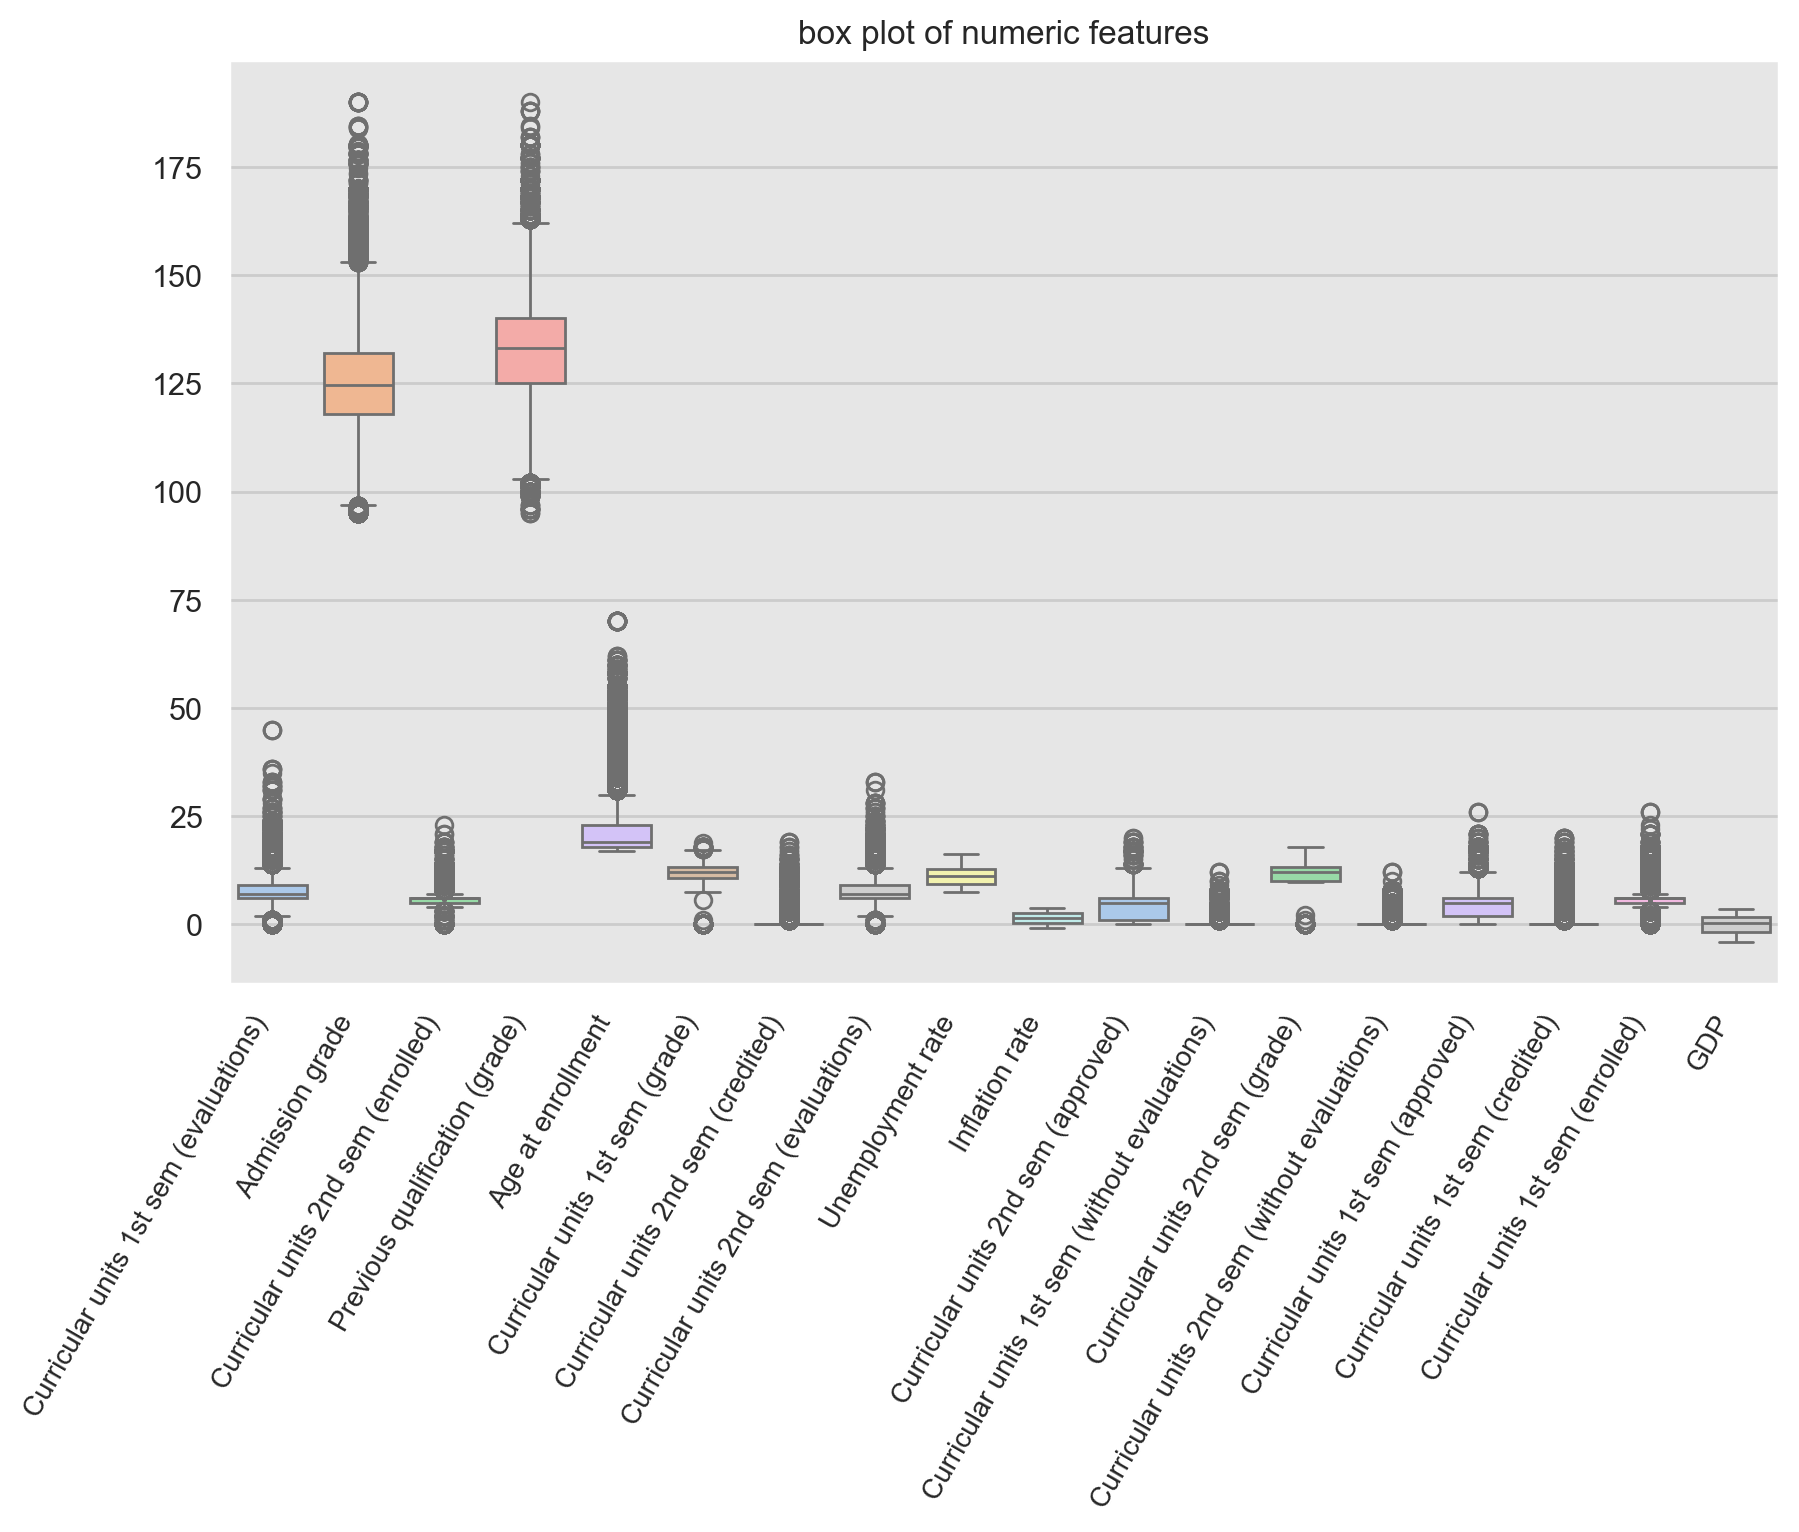

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
g = sns.boxplot(
    data=X[numeric_features],
    palette="pastel",
    ax=ax
)

g.set_xticklabels(labels=numeric_features, rotation=60, fontsize=10, ha="right")
g.set(title="box plot of numeric features");

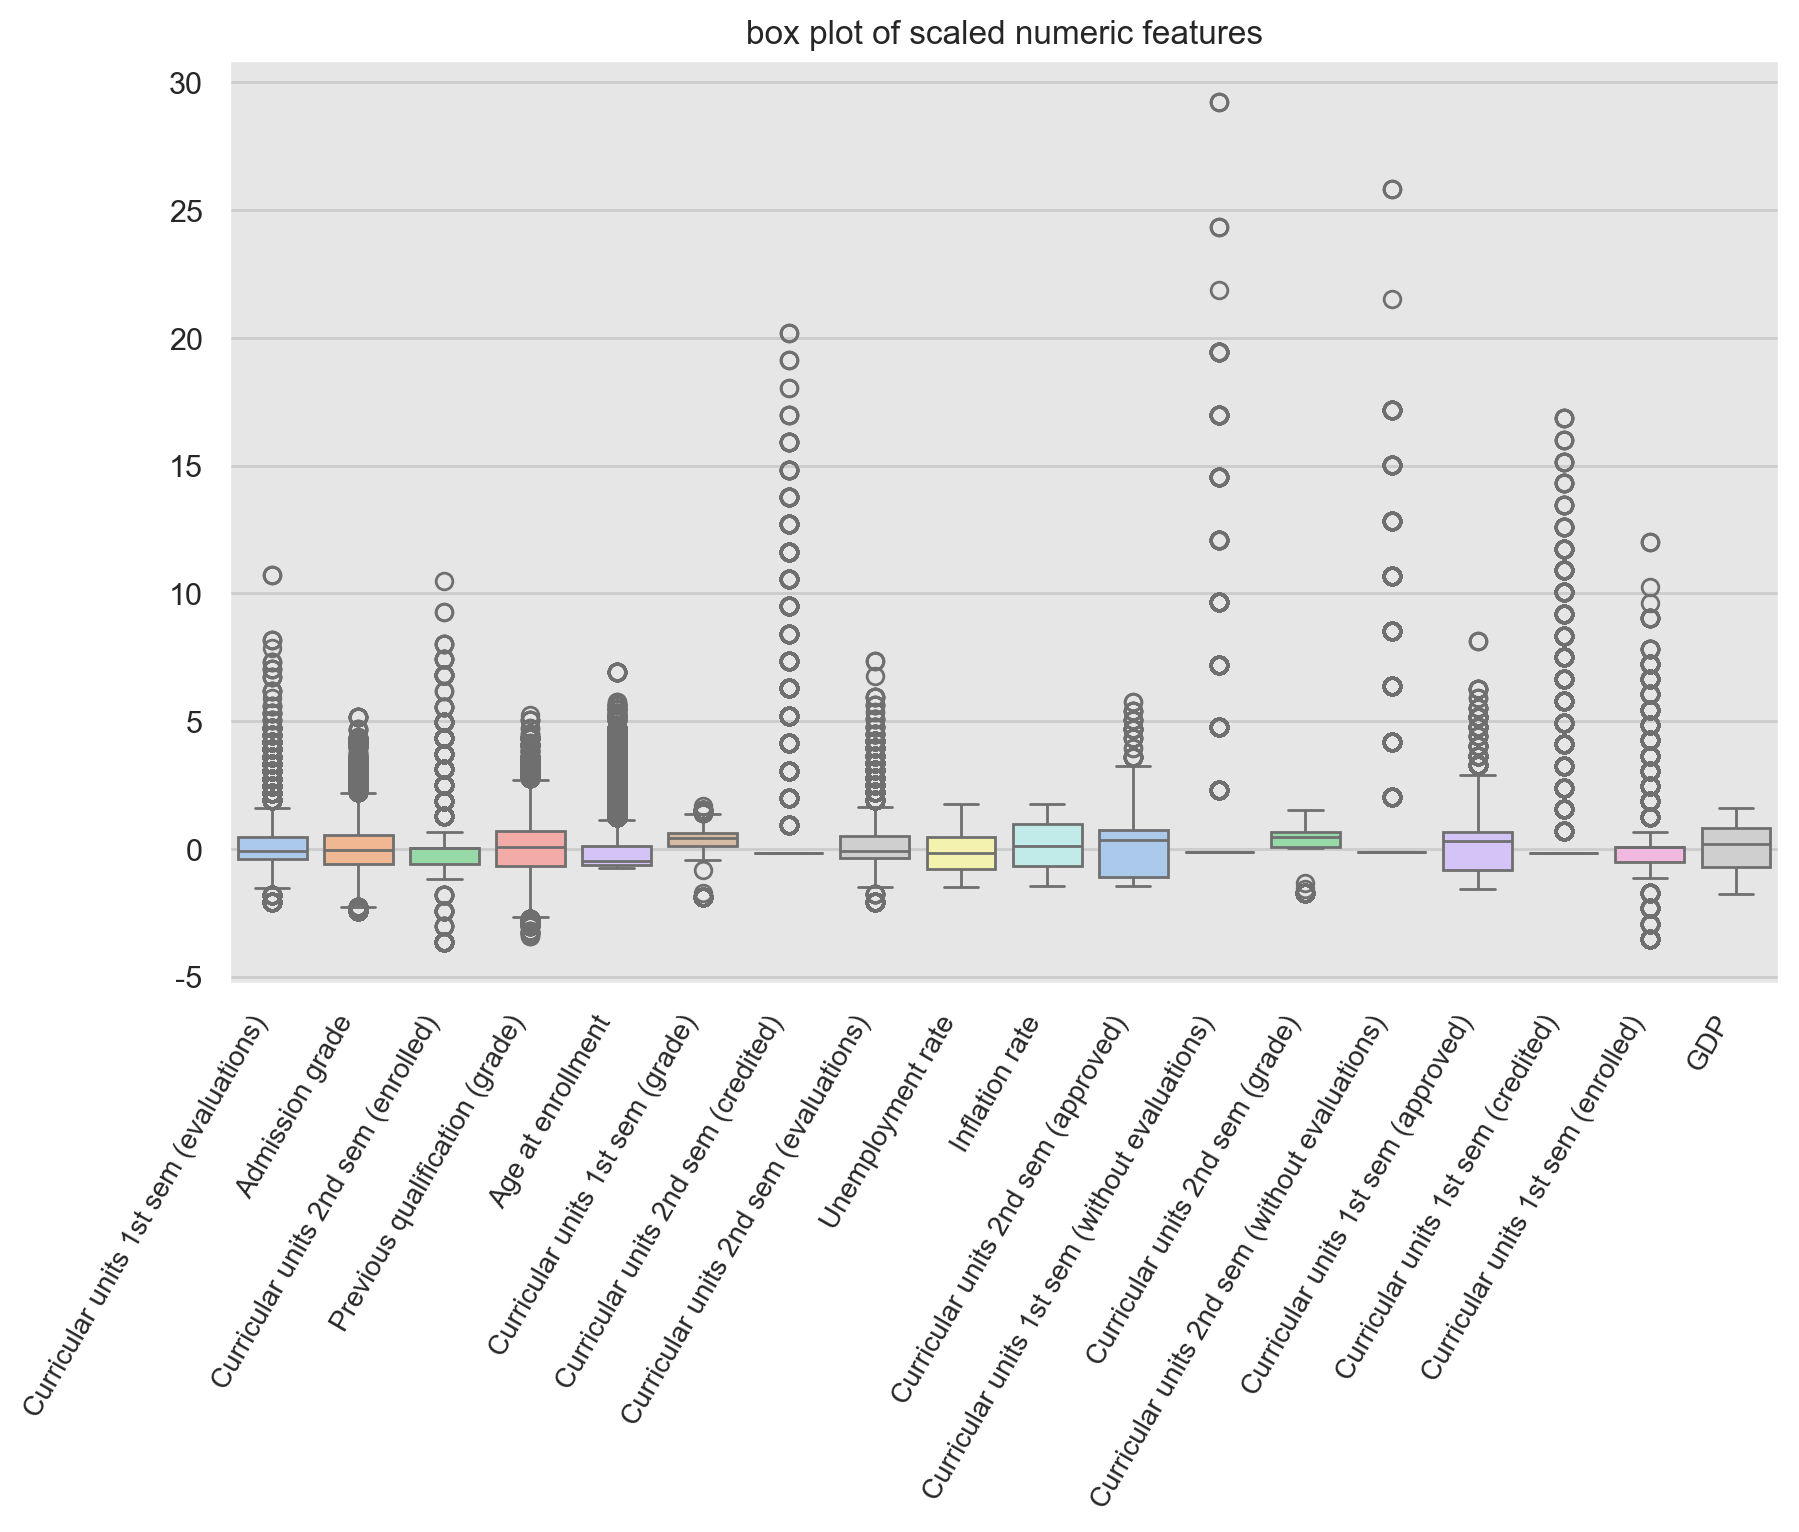

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
g = sns.boxplot(
    data=X_trans[numeric_features],
    palette="pastel",
    ax=ax
)

g.set_xticklabels(labels=numeric_features, rotation=60, fontsize=10, ha="right")
g.set(title="box plot of scaled numeric features");

### (4) feature 별 전처리 방법을 달리하여 모델링 실험
- RandomForestClassifier 모델을 사용하여 예측한 결과 numeric features는 전처리를 하지 않고, categorical features는 ordinal encoding을 한 경우 성능이 더 높고, fitting 시간이 단축되었다.
   - RandomForestClassifier 모델의 모수추정 원리와 데이터의 상태에 따른 결과라고 생각된다.
   - 다른 분류 모델도 모수추정 원리는 다르지만 데이터의 이러한 상태로부터 모델 성능의 향상에 영향을 받는다.

In [38]:
feature_preprocessor.set_params(
    num_transformer=num_transformer["ss"],
    cat_transformer=cat_transformer["onehot"]
)

# onehot encoder를 사용한 경우 변환 된 데이터를 toarray() 속성값을 사용하여 반환 받을 수 있다.
X_trans = feature_preprocessor.fit_transform(X).toarray()
X_trans = pd.DataFrame(X_trans, columns=[c.split("__")[1] for c in feature_preprocessor.get_feature_names_out()])

X_train, X_test, y_train, y_test = train_test_split(X_trans, y_enc, test_size=0.2, random_state=42)

start_time = time.time()
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_leaf=2, criterion="entropy")
rf_clf.fit(X_train, y_train)
end_time = time.time()

y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

print(f'''
* preprocessing: 
   - numeric features : {feature_preprocessor.get_params()["transformers"][0][1].__class__.__name__}
   - categorical features : {feature_preprocessor.get_params()["transformers"][1][1].__class__.__name__}
* fit time : {end_time - start_time : .3f}s   
* train pred : {accuracy_score(y_train, y_pred_train) :.3f}
* test pred  : {accuracy_score(y_test, y_pred_test) : .3f}
''')


* preprocessing: 
   - numeric features : StandardScaler
   - categorical features : OneHotEncoder
* fit time :  4.016s   
* train pred : 0.737
* test pred  :  0.738



In [39]:
feature_preprocessor.set_params(
    num_transformer=num_transformer["mms"],
    cat_transformer=cat_transformer["ordinal"]
)

X_trans = feature_preprocessor.fit_transform(X)
X_trans = pd.DataFrame(X_trans, columns=[c.split("__")[1] for c in feature_preprocessor.get_feature_names_out()])

X_train, X_test, y_train, y_test = train_test_split(X_trans, y_enc, test_size=0.2, random_state=42)

start_time = time.time()
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_leaf=2, criterion="entropy")
rf_clf.fit(X_train, y_train)
end_time = time.time()

y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

print(f'''
* preprocessing : 
   - numeric features : {feature_preprocessor.get_params()["transformers"][0][1].__class__.__name__}
   - categorical features : {feature_preprocessor.get_params()["transformers"][1][1].__class__.__name__}
* fit time : {end_time - start_time : .3f}s   
* train pred : {accuracy_score(y_train, y_pred_train) :.3f}
* test pred  : {accuracy_score(y_test, y_pred_test) : .3f}
''')


* preprocessing : 
   - numeric features : MinMaxScaler
   - categorical features : OrdinalEncoder
* fit time :  1.767s   
* train pred : 0.794
* test pred  :  0.793



### RandomF의 성능 실험
- cross_validate와 model_pipe를 사용하여 성능 실험
   - hyper parameter tunning 없이 기본 적인 매개변수 설정

In [14]:
num_transformer = Pipeline(steps=[
    ("ss", StandardScaler()),
    ("mms", MinMaxScaler()),
    ("non_scaler", "passthrough")
])

# onehot, ordinal encoder의 "handle_unknown" 설정으로 train, test 데이터의 불균형 문제를 해결 할 수 있다.
# onehot encoder에서 sparse_output=False로 설정하면 
cat_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(sparse_output=False, handle_unknown="ignore")),
    ("ordinal", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)),
    ("non_encoder", "passthrough"),
    ("drop_cate", "drop")
])

# columntransformer의 transformer 파라미터 구성 : name, transformer, columns
# columns로 features의 이름을 설정하면 features의 dtype이나 데이터의 type에 따라서 에러가 날 수 있다.
# columns로 make_column_selector()를 설정하면 포함할 dtype, 제외할 dtype을 설정할 수 있다. 
feature_preprocessor = ColumnTransformer(
    transformers=[
        ("num_transformer", num_transformer, numeric_features),
        #("cat_transformer", cat_transformer, categorical_features)
        ("cat_transformer", cat_transformer, make_column_selector(dtype_include="category"))
    ], remainder="passthrough"
)

model_link = {
    "randomF": RandomForestClassifier(n_estimators=200, max_depth=3, criterion="entropy")
}

model_pipe = Pipeline(
    steps=[
        ("preprocessor", feature_preprocessor),
        ("model", model_link)
    ]
)

model_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transformer',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler()),
                                                                  ('mms',
                                                                   MinMaxScaler()),
                                                                  ('non_scaler',
                                                                   'passthrough')]),
                                                  ['Curricular units 2nd sem '
                                                   '(evaluations)',
                                                   'Curricular units 1st sem '
                                                   '(evaluations)',
                                                   'Admission grade', 'GDP',
                                                   'Previous qualification '
                                                   '(grade)',
                                                   'Curricular uni...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1)),
                                                                  ('non_encoder',
                                                                   'passthrough'),
                                                                  ('drop_cate',
                                                                   'drop')]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000023652D379D0>)])),
                ('model',
                 {'randomF': RandomForestClassifier(criterion='entropy',
                                                    max_depth=3,
                                                    n_estimators=200)})])

In [11]:
def get_cv_result(X, y, model_name=None, num_scaler=None, cate_encoder=None) : 
    
    kfold = KFold(n_splits=5, shuffle=True, random_state=45)
    cv_results = []
    # scaler와 encoder의 조합으로 모델링 실험
    total_start_time = time.time()
    for comb in list(product(num_scaler, cate_encoder)) : 
        model_pipe["preprocessor"].set_params(
            num_transformer=num_transformer[comb[0]], cat_transformer=cat_transformer[comb[1]]
        )
        model_pipe.set_params(model=model_link[model_name])
        
        start_time = time.time()
        cv_result = cross_validate(
            estimator=model_pipe, 
            X=X, 
            y=y, 
            scoring="accuracy", 
            cv=kfold,
            return_train_score=True,
            n_jobs=2,
            error_score='raise'
        )
        end_time = time.time()
        
        cv_results.append(pd.DataFrame({
            "model": model_pipe["model"].__class__.__name__,
            "num_transformer": comb[0],
            "cat_transformer": comb[1],
            "train_score": cv_result["train_score"].mean(),
            "test_score": cv_result["test_score"].mean(),
            "fit_time": end_time - start_time
        }, index=[0]
        ))
    
    result = pd.concat(cv_results, axis=0).sort_values("test_score", ascending=False)
    total_end_time = time.time()
    print(f"total time : {total_end_time - total_start_time : .3f}")
    
    return result

In [46]:
cv_result_df = get_cv_result(model_name="rf")
cv_result_df

model num_transformer cat_transformer  train_score  \
0  RandomForestClassifier              ss         ordinal     0.793607   
0  RandomForestClassifier             mms     non_encoder     0.791957   
0  RandomForestClassifier             mms         ordinal     0.791752   
0  RandomForestClassifier      non_scaler         ordinal     0.791121   
0  RandomForestClassifier              ss     non_encoder     0.790602   
0  RandomForestClassifier      non_scaler     non_encoder     0.790023   
0  RandomForestClassifier             mms          onehot     0.739561   
0  RandomForestClassifier      non_scaler          onehot     0.738277   
0  RandomForestClassifier              ss          onehot     0.737591   

   test_score   fit_time  
0    0.793395  15.053601  
0    0.791500  13.851640  
0    0.791409  15.019085  
0    0.790755  15.691248  
0    0.790285  13.474950  
0    0.789514  13.677180  
0    0.739512  14.698895  
0    0.737696  14.817286  
0    0.737552  15.345757

### ExtraTrees 모델의 성능 실험
- RF 모델과 유사한 ExtraT 모델을 사용하여 성능 실험
   - 과최적화가 발생했다.
   - randomF 모델보다 성능이 다소 증가했다. 
   - 성능 측정 시간이 오래 걸린다.

In [53]:
model_link.update({"extraT": ExtraTreesClassifier()})
model_link

{'randomF': RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=200),
 'histGB': HistGradientBoostingClassifier(max_depth=3, max_iter=200, scoring='accuracy'),
 'extraT': ExtraTreesClassifier()}

In [68]:
scaler = ["ss", "mms", "non_scaler"]
encoder = ["onehot", "ordinal", "non_encoder"]

svc_cv_result_df = get_cv_result(model_name="extraT", num_scaler=scaler, cate_encoder=encoder)
svc_cv_result_df

model num_transformer cat_transformer  train_score  \
0  ExtraTreesClassifier             mms     non_encoder          1.0   
0  ExtraTreesClassifier      non_scaler     non_encoder          1.0   
0  ExtraTreesClassifier             mms         ordinal          1.0   
0  ExtraTreesClassifier      non_scaler         ordinal          1.0   
0  ExtraTreesClassifier              ss         ordinal          1.0   
0  ExtraTreesClassifier              ss     non_encoder          1.0   
0  ExtraTreesClassifier      non_scaler          onehot          1.0   
0  ExtraTreesClassifier             mms          onehot          1.0   
0  ExtraTreesClassifier              ss          onehot          1.0   

   test_score    fit_time  
0    0.823009   42.210539  
0    0.822708   42.976707  
0    0.822552   40.365776  
0    0.822395   41.374006  
0    0.822186   40.392106  
0    0.821977   41.297720  
0    0.816200  561.142055  
0    0.816109  541.660863  
0    0.815011  639.485389

### HistGradientBoosting model 을 사용하여 실험
- HGBC 모델은 randomF 보다 성능이 더 좋고, 속도가 빠르다고 알려져 있다.
- GB 모델을 기반으로, LightGBM 모델과 유사하게 만들어 졌다.
- 회귀와 분류 문제에 사용할 수 있다.
- pipeline과 cross_validate에서 모델을 사용할 때 categorical_features 매개변수를 None으로 설정해야 한다.
   - "from_dtype"(feature의 dtype을 사용), ["col1", "col2"](feature의 이름을 사용) 할 수 있으나 pipe line의 전처리 단계에서 encoding을 한 후 모델에 입력 되기 때문에 이 설정을 None으로 해야 실행 된다.
- categorical features를 데이터에서 제외하는 "drop_cate" 추가

In [115]:
model_link.update({
    "histGB": HistGradientBoostingClassifier(max_iter=200, max_depth=3, categorical_features=None, scoring="accuracy")
})
model_link

{'randomF': RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=200),
 'histGB': HistGradientBoostingClassifier(max_depth=3, max_iter=200, scoring='accuracy')}

In [117]:
scaler = ["ss", "mms", "non_scaler"]
encoder = ["onehot", "ordinal", "non_encoder", "drop_cate"]

histgb_cv_result_df = get_cv_result(model_name="histGB", num_scaler=scaler, cate_encoder=encoder)
histgb_cv_result_df

total time :  204.970


model num_transformer cat_transformer  \
0  HistGradientBoostingClassifier             mms          onehot   
0  HistGradientBoostingClassifier      non_scaler     non_encoder   
0  HistGradientBoostingClassifier              ss         ordinal   
0  HistGradientBoostingClassifier              ss     non_encoder   
0  HistGradientBoostingClassifier      non_scaler         ordinal   
0  HistGradientBoostingClassifier      non_scaler          onehot   
0  HistGradientBoostingClassifier             mms     non_encoder   
0  HistGradientBoostingClassifier              ss          onehot   
0  HistGradientBoostingClassifier             mms         ordinal   
0  HistGradientBoostingClassifier      non_scaler       drop_cate   
0  HistGradientBoostingClassifier              ss       drop_cate   
0  HistGradientBoostingClassifier             mms       drop_cate   

   train_score  test_score   fit_time  
0     0.832343    0.828589  40.766237  
0     0.831608    0.828223  12.562090  
0     0.831288    0.828171  13.198067  
0     0.830762    0.827779  12.866665  
0     0.831442    0.827766  13.311382  
0     0.830448    0.827204  30.438964  
0     0.830475    0.827086  12.941227  
0     0.830720    0.826969  28.841500  
0     0.830269    0.826590  11.492230  
0     0.811646    0.808529   7.948476  
0     0.812351    0.808385  12.100340  
0     0.810767    0.807653   8.488091

### (5) Feature Engineering and Submission
- HistGradientBoosting을 기본 모델로 modeling과 feature engineering을 함께 진행하고, test 데이터를 예측하여 submission score를 확인하면서 모델의 성능을 개선한다.
- train 데이터의 품질이 더 나아지지 않으면 하이퍼파라미터 튜닝을 통한 모델을 고도화하더라도 성능이 크게 나아지지 않는다.
- 그러므로 전처리 및 feature engineering을 모델링과 함께 진행하면서 모델을 업그레이드 시키는 것이 좋을 것 같다.
   - num, cat transformer 변경
   - feature engineering : binning, log transform, outlier cap ...
   - model 변경
   - hyperparameter tunning

### Submission (1) : HistGB model Hyper parameter Tunning - (1)
- 전처리로 mms와 onehot 만 적용한 경우의 모델 성능
   - acc score : 0.831

In [46]:
model_pipe["preprocessor"].set_params(
    num_transformer=num_transformer["mms"], 
    cat_transformer=cat_transformer["onehot"]
)
model_link.update({
    "histGB": HistGradientBoostingClassifier(max_iter=200, max_depth=3, categorical_features=None, scoring="accuracy")
})
model_pipe.set_params(model=model_link["histGB"])

kfold = KFold(n_splits=5, shuffle=True, random_state=45)
histgb_cv = cross_validate(model_pipe, X, y_enc, cv=kfold, scoring="accuracy", return_train_score=True, n_jobs=2)


print(f'''
* train 
 - acc score : {histgb_cv["train_score"].mean()}
 - acc std : {histgb_cv["train_score"].std()}
 
* test 
 - acc score : {histgb_cv["train_score"].mean()}
 - acc std : {histgb_cv["train_score"].std()}
''')


* train 
 - acc score : 0.8319153857680561
 - acc std : 0.003329182327302682
 
* test 
 - acc score : 0.8319153857680561
 - acc std : 0.003329182327302682



#### test data predict and submission

In [48]:
model_pipe.fit(X, y_enc)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transformer',
                                                  MinMaxScaler(),
                                                  ['Curricular units 1st sem '
                                                   '(grade)',
                                                   'Curricular units 2nd sem '
                                                   '(credited)',
                                                   'Curricular units 2nd sem '
                                                   '(approved)',
                                                   'Curricular units 2nd sem '
                                                   '(without evaluations)',
                                                   'Unemployment rate',
                                                   'Curricular units 2nd sem '
                                                   '(grade)',
                                                   'Curricular units 1st sem '
                                                   '...
                                                   '(credited)',
                                                   'Curricular units 2nd sem '
                                                   '(enrolled)',
                                                   'Inflation rate',
                                                   'Admission grade',
                                                   'Age at enrollment']),
                                                 ('cat_transformer',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001F799F9D930>)])),
                ('model',
                 HistGradientBoostingClassifier(max_depth=3, max_iter=200,
                                                scoring='accuracy'))])

In [49]:
submission_X = test_df.drop("id", axis=1)
first_submission_pred = model_pipe.predict(submission_X)

submission_df["Target"] = first_submission_pred
target_mapper = dict(zip(np.array([2, 0, 1]), Y.unique()))
submission_df["Target"] = submission_df["Target"].map(target_mapper)
submission_df.head()

id    Target
0  76518   Dropout
1  76519  Graduate
2  76520  Graduate
3  76521  Graduate
4  76522  Enrolled

In [45]:
submission_df.to_csv("./submission/submission_df_0619.csv", index=False)

### Submission (2) : HistGB model Hyper parameter Tunning - (2)
- **submission score : 0.82924**
   - 최소한의 전처리와 하이퍼 파라미터 튜닝을 적용한 submission score

### HistGB 모델의 hyper parameter tunning

In [58]:
model_link.update({"histGB_tunning": HistGradientBoostingClassifier()})
model_pipe.set_params(model=model_link["histGB_tunning"])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transformer',
                                                  MinMaxScaler(),
                                                  ['Curricular units 1st sem '
                                                   '(grade)',
                                                   'Curricular units 2nd sem '
                                                   '(credited)',
                                                   'Curricular units 2nd sem '
                                                   '(approved)',
                                                   'Curricular units 2nd sem '
                                                   '(without evaluations)',
                                                   'Unemployment rate',
                                                   'Curricular units 2nd sem '
                                                   '(grade)',
                                                   'Curricular units 1st sem '
                                                   '...
                                                   '(evaluations)',
                                                   'Curricular units 1st sem '
                                                   '(credited)',
                                                   'Curricular units 2nd sem '
                                                   '(enrolled)',
                                                   'Inflation rate',
                                                   'Admission grade',
                                                   'Age at enrollment']),
                                                 ('cat_transformer',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001F799F9D930>)])),
                ('model', HistGradientBoostingClassifier())])

In [62]:
from sklearn.model_selection import GridSearchCV

In [64]:
%%time

histGB_params = {
    "model__learning_rate": [0.01, 0.1],
    "model__max_iter": [100, 200],
    "model__max_depth": [2, 3, 4],
    "model__l2_regularization": [0.01, 0.1]
}
kfold = KFold(n_splits=5, shuffle=True, random_state=45)
histGB_grid_cv = GridSearchCV(estimator=model_pipe,
                              param_grid=histGB_params, 
                              cv=kfold, 
                              scoring="accuracy", 
                              n_jobs=2,
                              return_train_score=True)
histGB_grid_cv.fit(X, y_enc)

CPU times: total: 23.1 s
Wall time: 20min 39s


GridSearchCV(cv=KFold(n_splits=5, random_state=45, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_transformer',
                                                                         MinMaxScaler(),
                                                                         ['Curricular '
                                                                          'units '
                                                                          '1st '
                                                                          'sem '
                                                                          '(grade)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '2nd '
                                                                          'sem '
                                                                          '(credited)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '2nd '
                                                                          'sem '
                                                                          '(approved)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '2nd '
                                                                          'sem '
                                                                          '(...
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001F799F9D930>)])),
                                       ('model',
                                        HistGradientBoostingClassifier())]),
             n_jobs=2,
             param_grid={'model__l2_regularization': [0.01, 0.1],
                         'model__learning_rate': [0.01, 0.1],
                         'model__max_depth': [2, 3, 4],
                         'model__max_iter': [100, 200]},
             return_train_score=True, scoring='accuracy')

In [78]:
histGB_grid_cv_result = pd.DataFrame(histGB_grid_cv.cv_results_).sort_values("rank_test_score")
cols = list(histGB_grid_cv_result.filter(regex="^param_model").columns) + ["mean_test_score", "mean_train_score", "std_test_score", "rank_test_score"]
histGB_grid_cv_result[cols][:10]

param_model__l2_regularization param_model__learning_rate  \
23                            0.1                        0.1   
22                            0.1                        0.1   
9                            0.01                        0.1   
11                           0.01                        0.1   
21                            0.1                        0.1   
10                           0.01                        0.1   
20                            0.1                        0.1   
8                            0.01                        0.1   
19                            0.1                        0.1   
7                            0.01                        0.1   

   param_model__max_depth param_model__max_iter  mean_test_score  \
23                      4                   200         0.831896   
22                      4                   100         0.831687   
9                       3                   200         0.831242   
11                      4                   200         0.831033   
21                      3                   200         0.830929   
10                      4                   100         0.830576   
20                      3                   100         0.829596   
8                       3                   100         0.829517   
19                      2                   200         0.829413   
7                       2                   200         0.828929   

    mean_train_score  std_test_score  rank_test_score  
23          0.847467        0.003118                1  
22          0.840309        0.002921                2  
9           0.840070        0.003016                3  
11          0.848849        0.003449                4  
21          0.839237        0.002474                5  
10          0.840361        0.002982                6  
20          0.833761        0.002584                7  
8           0.833915        0.002654                8  
19          0.832196        0.003089                9  
7           0.832487        0.002066               10

### best estimator로 test data predict

In [83]:
%%time

histGB_grid_cv_best_model = histGB_grid_cv.best_estimator_
histGB_grid_cv_best_model.fit(X, y_enc)

CPU times: total: 18.8 s
Wall time: 17.7 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transformer',
                                                  MinMaxScaler(),
                                                  ['Curricular units 1st sem '
                                                   '(grade)',
                                                   'Curricular units 2nd sem '
                                                   '(credited)',
                                                   'Curricular units 2nd sem '
                                                   '(approved)',
                                                   'Curricular units 2nd sem '
                                                   '(without evaluations)',
                                                   'Unemployment rate',
                                                   'Curricular units 2nd sem '
                                                   '(grade)',
                                                   'Curricular units 1st sem '
                                                   '...
                                                   '(credited)',
                                                   'Curricular units 2nd sem '
                                                   '(enrolled)',
                                                   'Inflation rate',
                                                   'Admission grade',
                                                   'Age at enrollment']),
                                                 ('cat_transformer',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001F79B099C30>)])),
                ('model',
                 HistGradientBoostingClassifier(l2_regularization=0.1,
                                                max_depth=4, max_iter=200))])

In [12]:
def pred_submission(best_model) : 

    submission_X = test_df.drop("id", axis=1)
    submission_pred = best_model.predict(submission_X)

    submission_df["Target"] = submission_pred
    target_mapper = dict(zip(np.array([2, 0, 1]), Y.unique()))
    submission_df["Target"] = submission_df["Target"].map(target_mapper)
    
    return submission_df

In [100]:
histGB_best_estimator_submission_df = pred_submission(histGB_grid_cv_best_model)
histGB_best_estimator_submission_df.head()

id    Target
0  76518   Dropout
1  76519  Graduate
2  76520  Graduate
3  76521  Enrolled
4  76522  Enrolled

In [101]:
histGB_best_estimator_submission_df.to_csv("./submission/histGB_best_estimator_submission_df.csv", index=False)
os.listdir("./submission")

['histGB_best_estimator_submission_df.csv', 'submission_df_0619.csv']

### submission (3) : histGB tunning model test
- **submission score : 0.83336**
   - hyper parameter의 범위와 개수를 조정하여 모델링 적용
   - max_depth의 깊이가 깊어지면서 앞의 테스트보다 성능이 다소 증가한 것으로 보인다.

In [103]:
model_link.update({"histGB_tunning": HistGradientBoostingClassifier()})
model_pipe.set_params(model=model_link["histGB_tunning"])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transformer',
                                                  MinMaxScaler(),
                                                  ['Curricular units 1st sem '
                                                   '(grade)',
                                                   'Curricular units 2nd sem '
                                                   '(credited)',
                                                   'Curricular units 2nd sem '
                                                   '(approved)',
                                                   'Curricular units 2nd sem '
                                                   '(without evaluations)',
                                                   'Unemployment rate',
                                                   'Curricular units 2nd sem '
                                                   '(grade)',
                                                   'Curricular units 1st sem '
                                                   '...
                                                   '(evaluations)',
                                                   'Curricular units 1st sem '
                                                   '(credited)',
                                                   'Curricular units 2nd sem '
                                                   '(enrolled)',
                                                   'Inflation rate',
                                                   'Admission grade',
                                                   'Age at enrollment']),
                                                 ('cat_transformer',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001F799F9D930>)])),
                ('model', HistGradientBoostingClassifier())])

In [106]:
%%time

histGB_params = {
    "model__learning_rate": [0.1, 0.2],
    "model__max_iter": [100, 200, 300],
    "model__max_depth": [2, 3, 4, 5, 6],
    "model__l2_regularization": [0.1, 0.2]
}
kfold = KFold(n_splits=5, shuffle=True, random_state=45)
histGB_grid_cv_2 = GridSearchCV(estimator=model_pipe,
                              param_grid=histGB_params, 
                              cv=kfold, 
                              scoring="accuracy", 
                              n_jobs=2,
                              return_train_score=True)
histGB_grid_cv_2.fit(X, y_enc)

CPU times: total: 20.2 s
Wall time: 47min 22s


GridSearchCV(cv=KFold(n_splits=5, random_state=45, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_transformer',
                                                                         MinMaxScaler(),
                                                                         ['Curricular '
                                                                          'units '
                                                                          '1st '
                                                                          'sem '
                                                                          '(grade)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '2nd '
                                                                          'sem '
                                                                          '(credited)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '2nd '
                                                                          'sem '
                                                                          '(approved)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '2nd '
                                                                          'sem '
                                                                          '(...
                                                                                       sparse_output=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001F799F9D930>)])),
                                       ('model',
                                        HistGradientBoostingClassifier())]),
             n_jobs=2,
             param_grid={'model__l2_regularization': [0.1, 0.2],
                         'model__learning_rate': [0.1, 0.2],
                         'model__max_depth': [2, 3, 4, 5, 6],
                         'model__max_iter': [100, 200, 300]},
             return_train_score=True, scoring='accuracy')

In [107]:
histGB_grid_cv_result_2 = pd.DataFrame(histGB_grid_cv_2.cv_results_).sort_values("rank_test_score")
cols = list(histGB_grid_cv_result_2.filter(regex="^param_model").columns) + ["mean_test_score", "mean_train_score", "std_test_score", "rank_test_score"]
histGB_grid_cv_result_2[cols][:10]

param_model__l2_regularization param_model__learning_rate  \
10                            0.1                        0.1   
13                            0.1                        0.1   
41                            0.2                        0.1   
37                            0.2                        0.1   
44                            0.2                        0.1   
38                            0.2                        0.1   
54                            0.2                        0.2   
14                            0.1                        0.1   
51                            0.2                        0.2   
23                            0.1                        0.2   

   param_model__max_depth param_model__max_iter  mean_test_score  \
10                      5                   200         0.832092   
13                      6                   200         0.832013   
41                      5                   300         0.831935   
37                      4                   200         0.831909   
44                      6                   300         0.831896   
38                      4                   300         0.831870   
54                      5                   100         0.831843   
14                      6                   300         0.831817   
51                      4                   100         0.831791   
23                      4                   300         0.831739   

    mean_train_score  std_test_score  rank_test_score  
10          0.852594        0.003304                1  
13          0.854802        0.004070                2  
41          0.852188        0.003594                3  
37          0.846771        0.003932                4  
44          0.855658        0.002667                5  
38          0.848771        0.003579                6  
54          0.856632        0.002597                7  
14          0.855028        0.003271                8  
51          0.848369        0.003245                9  
23          0.850231        0.002816               10

In [108]:
%%time

histGB_grid_cv_best_model_2 = histGB_grid_cv_2.best_estimator_
histGB_grid_cv_best_model_2.fit(X, y_enc)

CPU times: total: 8.7 s
Wall time: 19 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transformer',
                                                  MinMaxScaler(),
                                                  ['Curricular units 1st sem '
                                                   '(grade)',
                                                   'Curricular units 2nd sem '
                                                   '(credited)',
                                                   'Curricular units 2nd sem '
                                                   '(approved)',
                                                   'Curricular units 2nd sem '
                                                   '(without evaluations)',
                                                   'Unemployment rate',
                                                   'Curricular units 2nd sem '
                                                   '(grade)',
                                                   'Curricular units 1st sem '
                                                   '...
                                                   '(credited)',
                                                   'Curricular units 2nd sem '
                                                   '(enrolled)',
                                                   'Inflation rate',
                                                   'Admission grade',
                                                   'Age at enrollment']),
                                                 ('cat_transformer',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001F79F4C9990>)])),
                ('model',
                 HistGradientBoostingClassifier(l2_regularization=0.1,
                                                max_depth=5, max_iter=200))])

In [14]:
def save_model(dir_path, save_model, model_name) : 
    
    os.makedirs(dir_path, exist_ok=True)
    full_path = dir_path + "/" + model_name + ".pkl"
    
    pickle.dump(save_model, open(full_path, 'wb'))
    
    # 저장한 모델을 불러온 후 모델의 params의 갯수를 확인
    load_model = pickle.load(open(full_path, "rb"))
    if len(load_model["model"].get_params()) > 1 : 
        print(f"{model_name} save success.")

In [310]:
dir_path = "./build_model"
save_model(dir_path, histGB_grid_cv_best_model_2, "histGB_grid_cv")

histGB_grid_cv save success.


In [109]:
histGB_best_estimator_submission_df_2 = pred_submission(histGB_grid_cv_best_model_2)
histGB_best_estimator_submission_df_2.head()

id    Target
0  76518   Dropout
1  76519  Graduate
2  76520  Graduate
3  76521  Enrolled
4  76522  Enrolled

In [110]:
histGB_best_estimator_submission_df_2.to_csv("./submission/histGB_best_estimator_submission_df_2.csv", index=False)
os.listdir("./submission")

['histGB_best_estimator_submission_df.csv',
 'histGB_best_estimator_submission_df_2.csv',
 'submission_df_0619.csv']

### submission (4) : using feature importance (1)
- randomF 모델에서 feature importances를 추출하여 기준값 0.00001 보다 큰 119개 feature 로 새로운 훈련 데이터 생성
- **submission score : 0.83336**
   - randomF로 추출한 feature importance에서 기준값보다 작은 feature는 제거해도 모델의 성능에 영향을 미치지 않는 것을 확인 할 수 있었다. 

In [27]:
model_link.update({"randomF_tunning": RandomForestClassifier()})
model_pipe["preprocessor"].set_params(
    num_transformer=num_transformer["mms"],
    cat_transformer=cat_transformer["onehot"]
)
model_pipe.set_params(model=model_link["randomF_tunning"])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transformer',
                                                  MinMaxScaler(),
                                                  ['Curricular units 2nd sem '
                                                   '(grade)',
                                                   'Previous qualification '
                                                   '(grade)',
                                                   'Curricular units 2nd sem '
                                                   '(approved)',
                                                   'Curricular units 1st sem '
                                                   '(credited)',
                                                   'Curricular units 1st sem '
                                                   '(enrolled)',
                                                   'Unemployment rate',
                                                   'Curricular units 2nd sem '
                                                   '(enrolled)...
                                                   'Curricular units 2nd sem '
                                                   '(without evaluations)',
                                                   'Admission grade',
                                                   'Curricular units 1st sem '
                                                   '(approved)',
                                                   'Age at enrollment',
                                                   'Curricular units 1st sem '
                                                   '(evaluations)']),
                                                 ('cat_transformer',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002162D2E4040>)])),
                ('model', RandomForestClassifier())])

In [28]:
%%time

rf_params = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [3, 4, 5, 6],
    "model__criterion": ["entropy"]    
}

kfold = KFold(n_splits=5, shuffle=True, random_state=45)
randomF_grid_cv = GridSearchCV(estimator=model_pipe,
                              param_grid=rf_params, 
                              cv=kfold, 
                              scoring="accuracy", 
                              n_jobs=2,
                              return_train_score=True)

randomF_grid_cv.fit(X, y_enc)

CPU times: total: 9.03 s
Wall time: 7min 1s


GridSearchCV(cv=KFold(n_splits=5, random_state=45, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num_transformer',
                                                                         MinMaxScaler(),
                                                                         ['Curricular '
                                                                          'units '
                                                                          '2nd '
                                                                          'sem '
                                                                          '(grade)',
                                                                          'Previous '
                                                                          'qualification '
                                                                          '(grade)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '2nd '
                                                                          'sem '
                                                                          '(approved)',
                                                                          'Curricular '
                                                                          'units '
                                                                          '1st '
                                                                          'sem '
                                                                          '(credite...
                                                                        ('cat_transformer',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000002162D2E4040>)])),
                                       ('model', RandomForestClassifier())]),
             n_jobs=2,
             param_grid={'model__criterion': ['entropy'],
                         'model__max_depth': [3, 4, 5, 6],
                         'model__n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='accuracy')

In [29]:
randomF_grid_cv_result = pd.DataFrame(randomF_grid_cv.cv_results_).sort_values("rank_test_score")
cols = list(randomF_grid_cv_result.filter(regex="^param_model").columns) + ["mean_test_score", "mean_train_score", "std_test_score", "rank_test_score"]
randomF_grid_cv_result[cols][:10]

param_model__criterion param_model__max_depth param_model__n_estimators  \
9                 entropy                      6                       100   
11                entropy                      6                       300   
10                entropy                      6                       200   
8                 entropy                      5                       300   
6                 entropy                      5                       100   
7                 entropy                      5                       200   
4                 entropy                      4                       200   
5                 entropy                      4                       300   
3                 entropy                      4                       100   
0                 entropy                      3                       100   

    mean_test_score  mean_train_score  std_test_score  rank_test_score  
9          0.790010          0.791320        0.004896                1  
11         0.788925          0.790219        0.002563                2  
10         0.788886          0.790167        0.003256                3  
8          0.775543          0.776383        0.003430                4  
6          0.773988          0.774896        0.006846                5  
7          0.773583          0.774056        0.004316                6  
4          0.754947          0.755267        0.005109                7  
5          0.751915          0.752401        0.004450                8  
3          0.751078          0.751777        0.008931                9  
0          0.739800          0.739888        0.004285               10

### 기준값을 적용하여 feature filtering

In [31]:
randomF_grid_cv_feature_importances = randomF_grid_cv.best_estimator_["model"].feature_importances_
onehot_feature_names = [c.split("__")[1] for c in feature_preprocessor.fit(X).get_feature_names_out()]
randomF_feature_importance_df = pd.DataFrame(randomF_grid_cv_feature_importances, 
                                             index=onehot_feature_names, columns=["feature_importance"])\
                                            .sort_values("feature_importance", ascending=False)

importance_features = randomF_feature_importance_df.query("feature_importance > 0.00001")
importance_features

feature_importance
Curricular units 2nd sem (approved)               0.170275
Curricular units 2nd sem (grade)                  0.157457
Curricular units 1st sem (approved)               0.147362
Curricular units 1st sem (grade)                  0.100199
Curricular units 2nd sem (evaluations)            0.058065
...                                                    ...
Nacionality_62                                    0.000011
Mother's occupation_1                             0.000011
Nacionality_22                                    0.000011
Father's occupation_99                            0.000010
Educational special needs_0                       0.000010

[119 rows x 1 columns]

In [92]:
randomF_feature_importance_df.to_csv("./randomF_feature_importance_df.csv")

In [33]:
importance_features.to_csv("./feature_importace_df.csv")

In [36]:
transformed_X = pd.DataFrame(feature_preprocessor.fit_transform(X), columns=onehot_feature_names)
transformed_X_importance_features = transformed_X[importance_features.index]
transformed_X_importance_features.shape

(76518, 119)

In [75]:
histGB_best_model = pickle.load(open("./build_model/histGB_grid_cv.pkl", "rb"))
histGB_best_model.fit(transformed_X_importance_features, y_enc)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transformer',
                                                  MinMaxScaler(),
                                                  ['Curricular units 1st sem '
                                                   '(grade)',
                                                   'Curricular units 2nd sem '
                                                   '(credited)',
                                                   'Curricular units 2nd sem '
                                                   '(approved)',
                                                   'Curricular units 2nd sem '
                                                   '(without evaluations)',
                                                   'Unemployment rate',
                                                   'Curricular units 2nd sem '
                                                   '(grade)',
                                                   'Curricular units 1st sem '
                                                   '...
                                                   '(credited)',
                                                   'Curricular units 2nd sem '
                                                   '(enrolled)',
                                                   'Inflation rate',
                                                   'Admission grade',
                                                   'Age at enrollment']),
                                                 ('cat_transformer',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002163FA304C0>)])),
                ('model',
                 HistGradientBoostingClassifier(l2_regularization=0.1,
                                                max_depth=5, max_iter=200))])

### test 데이터에 feature importance로 선별한 features 적용

In [76]:
submission_X = test_df.copy()
submission_X = submission_X.drop("id", axis=1)
submission_X[categorical_features] = submission_X[categorical_features].astype("category")
transformed_submission_X = pd.DataFrame(feature_preprocessor.fit_transform(submission_X), 
                                         columns=[c.split("__")[1] for c in feature_preprocessor.get_feature_names_out()])
transformed_submission_X_importance_features = transformed_submission_X[importance_features.index]
transformed_submission_X_importance_features.shape

(51012, 119)

In [77]:
submission_pred = histGB_best_model["model"].predict(transformed_submission_X_importance_features)

temp_submission_df = submission_df.copy()
temp_submission_df["Target"] = submission_pred
target_mapper = dict(zip(np.array([2, 0, 1]), Y.unique()))
temp_submission_df["Target"] = temp_submission_df["Target"].map(target_mapper)

histGB_best_estimator_feature_importances_119 = temp_submission_df
histGB_best_estimator_feature_importances_119.head()

id   Target
0  76518  Dropout
1  76519  Dropout
2  76520  Dropout
3  76521  Dropout
4  76522  Dropout

In [304]:
histGB_best_estimator_feature_importances_119.to_csv("./submission/histGB_best_estimator_feature_importance_119.csv", index=False)
os.listdir("./submission")

['histGB_best_estimator_feature_importance_119.csv',
 'histGB_best_estimator_submission_df.csv',
 'histGB_best_estimator_submission_df_2.csv',
 'submission_df_0619.csv']

### submission (5) : using feature importances (2)
- feature importances 기준값을 0.0001 이상으로 변경 하여 69개 features 로 모델 테스트
- **submission score : 0.83189**

In [78]:
importance_features_2 = randomF_feature_importance_df.query("feature_importance > 0.0001")
importance_features_2

feature_importance
Curricular units 2nd sem (approved)               0.170275
Curricular units 2nd sem (grade)                  0.157457
Curricular units 1st sem (approved)               0.147362
Curricular units 1st sem (grade)                  0.100199
Curricular units 2nd sem (evaluations)            0.058065
...                                                    ...
Course_9130                                       0.000128
Mother's qualification_38                         0.000125
Application mode_44                               0.000120
Mother's qualification_37                         0.000119
Application mode_17                               0.000117

[69 rows x 1 columns]

In [14]:
def pred_submission_feature_importance(best_model, imp_features) : 
    
    # feature importances 데이터로 모델 fitting
    # 이미 전처리를 한 데이터로 fitting 하는 것이므로 ["model"]을 사용해야 한다.
    trans_X = pd.DataFrame(feature_preprocessor.fit_transform(X), columns=onehot_feature_names)
    trans_X_imp_features = trans_X[imp_features]
    best_model["model"].fit(trans_X_imp_features, y_enc)
    
    # submission 데이터를 전처리 후 feature importances 로 인덱싱
    submission_X = test_df.copy()
    submission_X = submission_X.drop("id", axis=1)
    submission_X[categorical_features] = submission_X[categorical_features].astype("category")
    trans_submission_X = pd.DataFrame(feature_preprocessor.fit_transform(submission_X), 
                                             columns=[c.split("__")[1] for c in feature_preprocessor.get_feature_names_out()])
    trans_submission_X_imp_features = trans_submission_X[imp_features]
    
    # fitted 된 model로 transformed 된 submission 데이터를 예측
    submission_pred = best_model["model"].predict(trans_submission_X_imp_features)
    temp_submission_df = submission_df.copy()
    temp_submission_df["Target"] = submission_pred
    target_mapper = dict(zip(np.array([2, 0, 1]), Y.unique()))
    temp_submission_df["Target"] = temp_submission_df["Target"].map(target_mapper)
    
    return temp_submission_df

In [84]:
histGB_best_estimator_feature_importances_69 = pred_submission_feature_importance(histGB_best_model, importance_features_2.index)
histGB_best_estimator_feature_importances_69.head()

id    Target
0  76518   Dropout
1  76519  Graduate
2  76520  Graduate
3  76521  Enrolled
4  76522  Enrolled

In [85]:
histGB_best_estimator_feature_importances_69.to_csv("./submission/histGB_best_estimator_feature_importances_69.csv", index=False)
os.listdir("./submission")

['histGB_best_estimator_feature_importances_69.csv',
 'histGB_best_estimator_feature_importances_70.csv',
 'histGB_best_estimator_feature_importance_119.csv',
 'histGB_best_estimator_submission_df.csv',
 'histGB_best_estimator_submission_df_2.csv',
 'submission_df_0619.csv']

### submission (6) : using feature importances (3)
- feature importances 기준값을 0.00005 이상인 79개 feature로 모델 테스트
- **submission score : 0.83150**
   - **feature importance의 값에 따라서 feature를 선택하는 방법이 모델 성능향상에 중대한 영향을 끼친다고 볼 수 없을 거 같다.**

In [1]:
importance_features_3 = randomF_feature_importance_df.query("feature_importance > 0.00005").index
importance_features_3.shape

NameError: name 'randomF_feature_importance_df' is not defined

In [109]:
feature_preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_transformer', MinMaxScaler(),
                                 ['Curricular units 2nd sem (grade)',
                                  'Previous qualification (grade)',
                                  'Curricular units 2nd sem (approved)',
                                  'Curricular units 1st sem (credited)',
                                  'Curricular units 1st sem (enrolled)',
                                  'Unemployment rate',
                                  'Curricular units 2nd sem (enrolled)',
                                  'Curricular units 1st sem (without '
                                  'evaluation...
                                  'Curricular units 2nd sem (evaluations)',
                                  'Curricular units 2nd sem (without '
                                  'evaluations)',
                                  'Admission grade',
                                  'Curricular units 1st sem (approved)',
                                  'Age at enrollment',
                                  'Curricular units 1st sem (evaluations)']),
                                ('cat_transformer',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000002162D2E4040>)])

In [115]:
X_trans = pd.DataFrame(feature_preprocessor.fit_transform(X), 
                       columns=[c.split("__")[1] for c in feature_preprocessor.get_feature_names_out()])
X_trans_imp_features_3 = X_trans[importance_features_3]
X_trans_imp_features_3.head()

Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                 0.30                          0.690476   
1                                 0.00                          0.000000   
2                                 0.00                          0.000000   
3                                 0.35                          0.712222   
4                                 0.30                          0.718519   

   Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  \
0                             0.230769                          0.768212   
1                             0.153846                          0.614570   
2                             0.000000                          0.000000   
3                             0.269231                          0.667086   
4                             0.230769                          0.685210   

   Curricular units 2nd sem (evaluations)  \
0                                0.212121   
1                                0.272727   
2                                0.000000   
3                                0.333333   
4                                0.363636   

   Curricular units 1st sem (evaluations)  Tuition fees up to date_0  \
0                                0.133333                        0.0   
1                                0.177778                        0.0   
2                                0.000000                        0.0   
3                                0.200000                        0.0   
4                                0.266667                        0.0   

   Scholarship holder_0  Tuition fees up to date_1  Application mode_39  ...  \
0                   0.0                        1.0                  0.0  ...   
1                   1.0                        1.0                  0.0  ...   
2                   1.0                        1.0                  0.0  ...   
3                   0.0                        1.0                  0.0  ...   
4                   1.0                        1.0                  0.0  ...   

   Application mode_43  Mother's occupation_9  \
0                  0.0                    0.0   
1                  0.0                    1.0   
2                  0.0                    0.0   
3                  0.0                    0.0   
4                  0.0                    0.0   

   Curricular units 1st sem (without evaluations)  Father's qualification_19  \
0                                             0.0                        1.0   
1                                             0.0                        1.0   
2                                             0.0                        1.0   
3                                             0.0                        0.0   
4                                             0.0                        0.0   

   Application order_5  Application order_6  Mother's qualification_19  \
0                  0.0                  0.0                        0.0   
1                  0.0                  0.0                        1.0   
2                  0.0                  0.0                        0.0   
3                  0.0                  0.0                        1.0   
4                  0.0                  0.0                        1.0   

   Mother's qualification_1  Father's occupation_7  Previous qualification_42  
0                       1.0                    0.0                        0.0  
1                       0.0                    0.0                        0.0  
2                       0.0                    0.0                        0.0  
3                       0.0                    0.0                        0.0  
4                       0.0                    0.0                        0.0  

[5 rows x 79 columns]

In [122]:
model_pipe_2 = Pipeline(steps=(
    [
        ("model", model_link)
    ]
))
model_pipe_2

Pipeline(steps=[('model',
                 {'histGB_best_model': HistGradientBoostingClassifier(l2_regularization=0.1,
                                                                      max_depth=5,
                                                                      max_iter=200),
                  'histGB_tunning_3': HistGradientBoostingClassifier(),
                  'randomF': RandomForestClassifier(criterion='entropy',
                                                    max_depth=3,
                                                    n_estimators=200),
                  'randomF_tunning': RandomForestClassifier()})])

In [123]:
model_link.update({"histGB_tunning_3": HistGradientBoostingClassifier()})
model_pipe_2.set_params(model=model_link["histGB_tunning_3"])
model_pipe_2

Pipeline(steps=[('model', HistGradientBoostingClassifier())])

### histGB tunning

In [124]:
%%time

histGB_params = {
    "model__learning_rate": [0.05, 0.1],
    "model__max_iter": [100, 200, 300],
    "model__max_depth": [4, 5, 6],
    "model__l2_regularization": [0.05, 0.1],
    "model__min_samples_leaf": [5, 10, 15, 20]
}
kfold = KFold(n_splits=5, shuffle=True, random_state=45)
histGB_grid_cv_3 = GridSearchCV(estimator=model_pipe_2,
                                param_grid=histGB_params, 
                                cv=kfold, 
                                scoring="accuracy", 
                                n_jobs=2,
                                return_train_score=True)

histGB_grid_cv_3.fit(X_trans_imp_features_3, y_enc)

CPU times: total: 3.39 s
Wall time: 1h 2min 40s


GridSearchCV(cv=KFold(n_splits=5, random_state=45, shuffle=True),
             estimator=Pipeline(steps=[('model',
                                        HistGradientBoostingClassifier())]),
             n_jobs=2,
             param_grid={'model__l2_regularization': [0.05, 0.1],
                         'model__learning_rate': [0.05, 0.1],
                         'model__max_depth': [4, 5, 6],
                         'model__max_iter': [100, 200, 300],
                         'model__min_samples_leaf': [5, 10, 15, 20]},
             return_train_score=True, scoring='accuracy')

In [15]:
def get_grid_cv_result_df(grid_cv) : 
    
    result_df = pd.DataFrame(grid_cv.cv_results_).sort_values("rank_test_score")
    cols = list(result_df.filter(regex="^param_model").columns) + ["mean_test_score", "mean_train_score", "std_test_score", "rank_test_score"]
    result_df = result_df[cols]
    
    return result_df

In [131]:
cv_results = get_grid_cv_result_df(histGB_grid_cv_3)
cv_results[:5]

param_model__l2_regularization param_model__learning_rate  \
128                            0.1                        0.1   
43                            0.05                        0.1   
33                            0.05                       0.05   
116                            0.1                        0.1   
130                            0.1                        0.1   

    param_model__max_depth param_model__max_iter  \
128                      5                   300   
43                       4                   200   
33                       6                   300   
116                      4                   300   
130                      5                   300   

    param_model__min_samples_leaf  mean_test_score  mean_train_score  \
128                             5         0.831608          0.853848   
43                             20         0.831569          0.846664   
33                             10         0.831478          0.851594   
116                             5         0.831190          0.845393   
130                            15         0.831164          0.850826   

     std_test_score  rank_test_score  
128        0.002286                1  
43         0.003676                2  
33         0.002505                3  
116        0.003528                4  
130        0.003210                5

In [134]:
histGB_grid_cv_3.best_estimator_["model"]

HistGradientBoostingClassifier(l2_regularization=0.1, max_depth=5, max_iter=300,
                               min_samples_leaf=5)

In [142]:
histGB_grid_cv_3.best_params_

{'model__l2_regularization': 0.1,
 'model__learning_rate': 0.1,
 'model__max_depth': 5,
 'model__max_iter': 300,
 'model__min_samples_leaf': 5}

In [137]:
histGB_best_estimator_feature_importances_79 = pred_submission_feature_importance(histGB_grid_cv_3.best_estimator_, importance_features_3)
histGB_best_estimator_feature_importances_79

id    Target
0       76518   Dropout
1       76519  Graduate
2       76520  Graduate
3       76521  Enrolled
4       76522  Enrolled
...       ...       ...
51007  127525   Dropout
51008  127526   Dropout
51009  127527   Dropout
51010  127528   Dropout
51011  127529   Dropout

[51012 rows x 2 columns]

In [140]:
histGB_best_estimator_feature_importances_79.to_csv("./submission/histGB_best_estimator_feature_importances_79.csv", index=False)

In [141]:
os.listdir("./submission")

['histGB_best_estimator_feature_importances_69.csv',
 'histGB_best_estimator_feature_importances_70.csv',
 'histGB_best_estimator_feature_importances_79.csv',
 'histGB_best_estimator_feature_importance_119.csv',
 'histGB_best_estimator_submission_df.csv',
 'histGB_best_estimator_submission_df_2.csv',
 'submission_df_0619.csv']

### submission (7) : association features
- numeric, catgorical featuers에서 연관성이 낮은 feature 제외한 후 모델 테스트
- **submission score : 0.83326**
   - randomF의 feature importance 값을 사용하여 feature를 재선택한 경우보다 모델의 성능이 다소 높다.

### numeric features에서 연관성이 가장 작은 feature

In [177]:
numeric_target_corr_df.loc["Target"]

Curricular units 2nd sem (grade)                 -0.291505
Previous qualification (grade)                   -0.152562
Curricular units 2nd sem (approved)              -0.458061
Curricular units 1st sem (credited)              -0.033397
Curricular units 1st sem (enrolled)              -0.188270
Unemployment rate                                -0.055411
Curricular units 2nd sem (enrolled)              -0.213194
Curricular units 1st sem (without evaluations)    0.053365
Curricular units 1st sem (grade)                 -0.272594
Inflation rate                                    0.016117
GDP                                              -0.066999
Curricular units 2nd sem (credited)              -0.036499
Curricular units 2nd sem (evaluations)            0.084115
Curricular units 2nd sem (without evaluations)    0.068818
Admission grade                                  -0.153127
Curricular units 1st sem (approved)              -0.406249
Age at enrollment                                 0.1312

In [186]:
lower_association_num_index = np.abs(numeric_target_corr_df.loc["Target"].values).argsort()
lower_association_num_index

array([ 9,  3, 11,  7,  5, 10, 13, 12, 17, 16,  1, 14,  4,  6,  8,  0, 15,
        2, 18], dtype=int64)

In [187]:
lower_association_num_feature = numeric_target_corr_df.loc["Target"].index[lower_association_num_index[0]]
lower_association_num_feature

'Inflation rate'

### categorical features에서 Target과 연관성이 가장 작은 feature
- chi2 test로 비교한 수치
- phi coef, cramer's V coef로 비교한 수치

In [184]:
# chi2 test 계산 결과

lower_association_cate_index = np.abs(cate_target_corr_df.loc["Target"].values).argsort()
lower_association_cate_index

array([ 0, 16, 15, 14, 13, 12, 10, 17, 18,  7,  6,  4,  3,  1,  8,  5, 11,
        2,  9], dtype=int64)

In [185]:
lower_association_cate_feature = cate_target_corr_df.loc["Target"].index[lower_association_cate_index[0]]
lower_association_cate_feature

'Application mode'

In [188]:
# phi coef, cramer V coef 계산 결과

lower_association_cate_index_2 = np.abs(cate_target_cramer_phi_corr_df.loc["Target"].values).argsort()
lower_association_cate_index_2

array([ 9,  2, 11, 12,  6,  5, 13,  7, 16, 14,  1, 17,  4,  0, 15, 10,  8,
        3, 18], dtype=int64)

In [189]:
lower_association_cate_feature_2 = cate_target_cramer_phi_corr_df.loc["Target"].index[lower_association_cate_index_2[0]]
lower_association_cate_feature_2

'Educational special needs'

### X에서 연관성 낮은 feature 제외

In [192]:
drop_association_features_X = X.drop([lower_association_num_feature, lower_association_cate_feature], axis=1)
drop_association_features_X.shape

(76518, 34)

### num, cate features에서 연관성 낮은 feature 제외

In [241]:
droped_numeric_features = list(set(numeric_features).difference({lower_association_num_feature}))
droped_numeric_features

['Curricular units 1st sem (enrolled)',
 'Unemployment rate',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (without evaluations)',
 'Admission grade',
 'Curricular units 1st sem (approved)',
 'Age at enrollment',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (approved)',
 'Previous qualification (grade)',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (grade)',
 'GDP',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 1st sem (without evaluations)']

In [221]:
droped_categorical_features = list(set(categorical_features).difference(lower_association_cate_feature))
droped_categorical_features

['Daytime/evening attendance',
 'Application order',
 "Father's occupation",
 'Application mode',
 'Scholarship holder',
 'Educational special needs',
 'Course',
 'Nacionality',
 'Marital status',
 "Mother's qualification",
 'International',
 'Displaced',
 'Tuition fees up to date',
 "Mother's occupation",
 'Debtor',
 'Gender',
 "Father's qualification",
 'Previous qualification']

In [16]:
num_transformer = Pipeline(steps=[
    ("ss", StandardScaler()),
    ("mms", MinMaxScaler()),
    ("non_scaler", "passthrough")
])

# onehot, ordinal encoder의 "handle_unknown" 설정으로 train, test 데이터의 불균형 문제를 해결 할 수 있다.
# onehot encoder에서 sparse_output=False로 설정하면 
cat_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(sparse_output=False, handle_unknown="ignore")),
    ("ordinal", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)),
    ("non_encoder", "passthrough"),
    ("drop_cate", "drop")
])

# categorical features를 구별하는 방법으로 features의 이름을 사용하는 것보다, make_column_selector() 함수를 사용하는 것이 범용성이 높은 것 같다. 
feature_preprocessor = ColumnTransformer(
    transformers=[
        ("num_transformer", num_transformer, numeric_features),
        #("cat_transformer", cat_transformer, categorical_features)
        ("cat_transformer", cat_transformer, make_column_selector(dtype_include="category"))
    ], remainder="passthrough"
)

model_link = {
    "randomF": RandomForestClassifier(n_estimators=200, max_depth=3, criterion="entropy")
}

model_pipe_3 = Pipeline(
    steps=[
        ("preprocessor", feature_preprocessor),
        ("model", model_link)
    ]
)

model_pipe_3

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transformer',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler()),
                                                                  ('mms',
                                                                   MinMaxScaler()),
                                                                  ('non_scaler',
                                                                   'passthrough')]),
                                                  ['Curricular units 1st sem '
                                                   '(grade)',
                                                   'Age at enrollment',
                                                   'Inflation rate',
                                                   'Curricular units 1st sem '
                                                   '(evaluations)',
                                                   'Curricular units 2nd sem '
                                                   '(enrolled)',
                                                   'Curri...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1)),
                                                                  ('non_encoder',
                                                                   'passthrough'),
                                                                  ('drop_cate',
                                                                   'drop')]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000212150725F0>)])),
                ('model',
                 {'randomF': RandomForestClassifier(criterion='entropy',
                                                    max_depth=3,
                                                    n_estimators=200)})])

In [246]:
model_link.update({"histGB": HistGradientBoostingClassifier(l2_regularization=0.1, 
                                                            max_depth=5, 
                                                            max_iter=300,
                                                            min_samples_leaf=5)})
model_link

{'randomF': RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=200),
 'histGB': HistGradientBoostingClassifier(l2_regularization=0.1, max_depth=5, max_iter=300,
                                min_samples_leaf=5)}

In [247]:
%%time

scaler = ["ss", "mms", "non_scaler"]
encoder = ['onehot', 'ordinal', 'non_encoder', 'drop_cate']

droped_lower_association_X_test_df = get_cv_result(drop_association_features_X, 
                                                   y_enc, 
                                                   model_name="histGB", 
                                                   num_scaler=scaler, 
                                                   cate_encoder=encoder)
droped_lower_association_X_test_df

total time :  311.687
CPU times: total: 469 ms
Wall time: 5min 11s


model num_transformer cat_transformer  \
0  HistGradientBoostingClassifier      non_scaler          onehot   
0  HistGradientBoostingClassifier              ss          onehot   
0  HistGradientBoostingClassifier      non_scaler     non_encoder   
0  HistGradientBoostingClassifier             mms     non_encoder   
0  HistGradientBoostingClassifier      non_scaler         ordinal   
0  HistGradientBoostingClassifier              ss         ordinal   
0  HistGradientBoostingClassifier              ss     non_encoder   
0  HistGradientBoostingClassifier             mms          onehot   
0  HistGradientBoostingClassifier             mms         ordinal   
0  HistGradientBoostingClassifier      non_scaler       drop_cate   
0  HistGradientBoostingClassifier             mms       drop_cate   
0  HistGradientBoostingClassifier              ss       drop_cate   

   train_score  test_score   fit_time  
0     0.851545    0.831582  68.674034  
0     0.853273    0.830981  61.955748  
0     0.853231    0.830929  17.640166  
0     0.853923    0.830680  16.668757  
0     0.852708    0.830628  16.048964  
0     0.853802    0.830589  14.815679  
0     0.855312    0.830537  15.010506  
0     0.850695    0.830497  57.231236  
0     0.853303    0.830393  15.534307  
0     0.827034    0.811691  10.014586  
0     0.827844    0.810920   9.779722  
0     0.827884    0.810698   8.298856

In [249]:
model_pipe_3["preprocessor"].set_params(
    num_transformer=num_transformer["non_scaler"],
    cat_transformer=cat_transformer["onehot"]
)
model_pipe_3.fit(drop_association_features_X, y_enc)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transformer',
                                                  'passthrough',
                                                  ['Curricular units 1st sem '
                                                   '(enrolled)',
                                                   'Unemployment rate',
                                                   'Curricular units 2nd sem '
                                                   '(enrolled)',
                                                   'Curricular units 2nd sem '
                                                   '(credited)',
                                                   'Curricular units 2nd sem '
                                                   '(without evaluations)',
                                                   'Admission grade',
                                                   'Curricular units 1st sem '
                                                   '(approved)',
                                                   'A...
                                                   'Curricular units 2nd sem '
                                                   '(evaluations)',
                                                   'Curricular units 1st sem '
                                                   '(without evaluations)']),
                                                 ('cat_transformer',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000021642D8E650>)])),
                ('model',
                 HistGradientBoostingClassifier(l2_regularization=0.1,
                                                max_depth=5, max_iter=300,
                                                min_samples_leaf=5))])

In [254]:
submission_X = test_df.copy()
submission_X = submission_X[drop_association_features_X.columns]
submission_pred = model_pipe_3.predict(submission_X)

temp_submission_df = submission_df.copy()
temp_submission_df["Target"] = submission_pred
target_mapper = dict(zip(np.array([2, 0, 1]), Y.unique()))
temp_submission_df["Target"] = temp_submission_df["Target"].map(target_mapper)
temp_submission_df

id    Target
0       76518   Dropout
1       76519  Graduate
2       76520  Graduate
3       76521  Enrolled
4       76522  Enrolled
...       ...       ...
51007  127525   Dropout
51008  127526   Dropout
51009  127527   Dropout
51010  127528   Dropout
51011  127529   Dropout

[51012 rows x 2 columns]

In [256]:
temp_submission_df.to_csv("./submission/histGB_best_estimator_dorp_association_features.csv", index=False)

In [257]:
os.listdir("./submission")

['histGB_best_estimator_dorp_association_features.csv',
 'histGB_best_estimator_feature_importances_69.csv',
 'histGB_best_estimator_feature_importances_70.csv',
 'histGB_best_estimator_feature_importances_79.csv',
 'histGB_best_estimator_feature_importance_119.csv',
 'histGB_best_estimator_submission_df.csv',
 'histGB_best_estimator_submission_df_2.csv',
 'submission_df_0619.csv']

### Submission (8) : feature engineering - Outlier Cap
- std outlier, quantilie outlier를 구하고 outlier의 갯수가 많은 feature 3개에 outlier 값을 대체하여 모델 실험
- **submission score : 0.83415**
   - **outlier cap으로 train data를 전처리한 경우 submission score가 다소 증가 하였다.**

In [266]:
train_count_unique_df.loc[numeric_features]

count
Curricular units 2nd sem (grade)                 1234
Previous qualification (grade)                    110
Curricular units 2nd sem (approved)                21
Curricular units 1st sem (credited)                21
Curricular units 1st sem (enrolled)                24
Unemployment rate                                  11
Curricular units 2nd sem (enrolled)                22
Curricular units 1st sem (without evaluations)     12
Curricular units 1st sem (grade)                 1206
Inflation rate                                     13
GDP                                                11
Curricular units 2nd sem (credited)                20
Curricular units 2nd sem (evaluations)             31
Curricular units 2nd sem (without evaluations)     11
Admission grade                                   668
Curricular units 1st sem (approved)                23
Age at enrollment                                  46
Curricular units 1st sem (evaluations)             36

In [15]:
def find_outlier(X, col) : 

    upper_lim_std = X[col].mean() + (X[col].std() * 3)
    lower_lim_std = X[col].mean() - (X[col].std() * 3)
    
    upper_lim_quant = X[col].quantile(.95)
    lower_lim_quant = X[col].quantile(.05)

    print(f'''
    ~~~ {col}'s outlier ~~~ 
    * std
      - upper lim : {upper_lim_std.round(3)}, nlower lim : {lower_lim_std.round(3)}
      - upper lim length : {len(X[X[col] > upper_lim_std][col])}, lower lim length : {len(X[X[col] < lower_lim_std][col])}
      - outlier / length : { ( len(X[X[col] > upper_lim_std][col]) + len(X[X[col] < lower_lim_std][col]) ) / X.shape[0] :.3f}
    * quantile  
      - upper lim : {upper_lim_quant.round(3)}, nlower lim : {lower_lim_quant.round(3)}
      - upper lim length : {len(X[X[col] > upper_lim_quant][col])}, lower lim length : {len(X[X[col] < lower_lim_quant][col])}
      - outlier / length : { ( len(X[X[col] > upper_lim_quant][col]) + len(X[X[col] < lower_lim_quant][col]) ) / X.shape[0] :.3f}
    ''')
    std_percentage = ( len(X[X[col] > upper_lim_std][col]) + len(X[X[col] < lower_lim_std][col]) ) / X.shape[0]
    quant_percentage = ( len(X[X[col] > upper_lim_quant][col]) + len(X[X[col] < lower_lim_quant][col]) ) / X.shape[0]
    
    return std_percentage, quant_percentage

In [123]:
print("< find outlier by std > \n")
outlier_results = []
for c in numeric_features : 
    std_percent, quant_percent = find_outlier(c)
    outlier_results.append(pd.DataFrame({
        "column": c,
        "std_outlier": std_percent,
        "quant_outlier": quant_percent
    }, index=[0]))

< find outlier by std > 


    ~~~ Age at enrollment's outlier ~~~ 
    * std
      - upper lim : 42.946, nlower lim : 1.611
      - upper lim length : 2442, lower lim length : 0
      - outlier / length : 0.032
    * quantile  
      - upper lim : 38.0, nlower lim : 18.0
      - upper lim length : 3699, lower lim length : 40
      - outlier / length : 0.049
    

    ~~~ Curricular units 2nd sem (credited)'s outlier ~~~ 
    * std
      - upper lim : 2.939, nlower lim : -2.664
      - upper lim length : 1442, lower lim length : 0
      - outlier / length : 0.019
    * quantile  
      - upper lim : 0.0, nlower lim : 0.0
      - upper lim length : 2709, lower lim length : 0
      - outlier / length : 0.035
    

    ~~~ Curricular units 2nd sem (approved)'s outlier ~~~ 
    * std
      - upper lim : 12.277, nlower lim : -4.271
      - upper lim length : 142, lower lim length : 0
      - outlier / length : 0.002
    * quantile  
      - upper lim : 8.0, nlower lim : 0.0
      - upper li

In [128]:
outlier_result_df = pd.concat(outlier_results, axis=0).sort_values("std_outlier", ascending=False)
outlier_result_df

column  std_outlier  quant_outlier
0             Curricular units 1st sem (enrolled)     0.048904       0.058418
0             Curricular units 2nd sem (enrolled)     0.045597       0.053791
0                               Age at enrollment     0.031914       0.048864
0             Curricular units 1st sem (credited)     0.019747       0.040370
0             Curricular units 2nd sem (credited)     0.018845       0.035403
0  Curricular units 2nd sem (without evaluations)     0.014611       0.028046
0  Curricular units 1st sem (without evaluations)     0.014088       0.032006
0          Curricular units 1st sem (evaluations)     0.007070       0.035207
0                  Previous qualification (grade)     0.005881       0.088162
0          Curricular units 2nd sem (evaluations)     0.005319       0.050001
0                                 Admission grade     0.004992       0.099859
0             Curricular units 1st sem (approved)     0.003829       0.032476
0             Curricular units 2nd sem (approved)     0.001856       0.011814
0                Curricular units 1st sem (grade)     0.000000       0.049949
0                                             GDP     0.000000       0.000000
0                                  Inflation rate     0.000000       0.000000
0                               Unemployment rate     0.000000       0.000000
0                Curricular units 2nd sem (grade)     0.000000       0.048890

In [16]:
def cap_outlier(X, col, op="std") : 
    
    if op == "std" : 
        upper_lim = X[col].mean() + (X[col].std() * 3)
        lower_lim = X[col].mean() - (X[col].std() * 3)
    elif op == "quant" : 
        upper_lim = X[col].quantile(.95)
        lower_lim = X[col].quantile(.05)
    
    print(f'''
    * befor cap {op} 
      - upper lim : {upper_lim.round(3)}, nlower lim : {lower_lim.round(3)}
      - upper lim length : {len(X[X[col] > upper_lim][col])}, lower lim length : {len(X[X[col] < lower_lim][col])}
    ''')
    
    X.loc[(X[col] > upper_lim), col] = upper_lim
    X.loc[(X[col] < lower_lim), col] = upper_lim
    
    print(f'''
    * after cap
       - upper lim length : {len(X[X[col] > upper_lim][col])}, lower lim length : {len(X[X[col] < lower_lim][col])}
    ''')
    
    outlier_cap_X = X
    
    return outlier_cap_X

In [148]:
X = train_df.copy().drop(["id", "Target"], axis=1)
X[categorical_features] = X[categorical_features].astype("category")
X.head()

Marital status Application mode Application order Course  \
0              1                1                 1   9238   
1              1               17                 1   9238   
2              1               17                 2   9254   
3              1                1                 3   9500   
4              1                1                 2   9500   

  Daytime/evening attendance Previous qualification  \
0                          1                      1   
1                          1                      1   
2                          1                      1   
3                          1                      1   
4                          1                      1   

   Previous qualification (grade) Nacionality Mother's qualification  \
0                           126.0           1                      1   
1                           125.0           1                     19   
2                           137.0           1                      3   
3                           131.0           1                     19   
4                           132.0           1                     19   

  Father's qualification  ... Curricular units 1st sem (without evaluations)  \
0                     19  ...                                              0   
1                     19  ...                                              0   
2                     19  ...                                              0   
3                      3  ...                                              0   
4                     37  ...                                              0   

  Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                   0                                    6   
1                                   0                                    6   
2                                   0                                    6   
3                                   0                                    8   
4                                   0                                    7   

  Curricular units 2nd sem (evaluations) Curricular units 2nd sem (approved)  \
0                                      7                                   6   
1                                      9                                   0   
2                                      0                                   0   
3                                     11                                   7   
4                                     12                                   6   

  Curricular units 2nd sem (grade)  \
0                        12.428571   
1                         0.000000   
2                         0.000000   
3                        12.820000   
4                        12.933333   

  Curricular units 2nd sem (without evaluations) Unemployment rate  \
0                                              0              11.1   
1                                              0              11.1   
2                                              0              16.2   
3                                              0              11.1   
4                                              0               7.6   

  Inflation rate   GDP  
0            0.6  2.02  
1            0.6  2.02  
2            0.3 -0.92  
3            0.6  2.02  
4            2.6  0.32  

[5 rows x 36 columns]

In [149]:
find_outlier(X, "Curricular units 1st sem (enrolled)")


    ~~~ Curricular units 1st sem (enrolled)'s outlier ~~~ 
    * std
      - upper lim : 10.907, nlower lim : 0.876
      - upper lim length : 1071, lower lim length : 2671
      - outlier / length : 0.049
    * quantile  
      - upper lim : 8.0, nlower lim : 5.0
      - upper lim length : 1480, lower lim length : 2990
      - outlier / length : 0.058
    


(0.04890352596774615, 0.05841762722496668)

### std outlier의 갯수가 3% 보다 큰 outlier cap
- 1071 + 807 + 2442 개의 outlier를 upper_lim, lower_lim 값을 대치 (Cap)

In [172]:
outlier_result_df.query("std_outlier > 0.03")

column  std_outlier  quant_outlier
0  Curricular units 1st sem (enrolled)     0.048904       0.058418
0  Curricular units 2nd sem (enrolled)     0.045597       0.053791
0                    Age at enrollment     0.031914       0.048864

In [150]:
cap_X = cap_outlier(X, "Curricular units 1st sem (enrolled)", op="std")
cap_X = cap_outlier(cap_X, "Curricular units 2nd sem (enrolled)", op="std")
cap_X = cap_outlier(cap_X, "Age at enrollment", op="std")
cap_X.head()


    * befor cap std 
      - upper lim : 10.907, nlower lim : 0.876
      - upper lim length : 1071, lower lim length : 2671
    

    * after cap
       - upper lim length : 0, lower lim length : 0
    

    * befor cap std 
      - upper lim : 10.815, nlower lim : 1.052
      - upper lim length : 807, lower lim length : 2682
    

    * after cap
       - upper lim length : 0, lower lim length : 0
    

    * befor cap std 
      - upper lim : 42.946, nlower lim : 1.611
      - upper lim length : 2442, lower lim length : 0
    

    * after cap
       - upper lim length : 0, lower lim length : 0
    


Marital status Application mode Application order Course  \
0              1                1                 1   9238   
1              1               17                 1   9238   
2              1               17                 2   9254   
3              1                1                 3   9500   
4              1                1                 2   9500   

  Daytime/evening attendance Previous qualification  \
0                          1                      1   
1                          1                      1   
2                          1                      1   
3                          1                      1   
4                          1                      1   

   Previous qualification (grade) Nacionality Mother's qualification  \
0                           126.0           1                      1   
1                           125.0           1                     19   
2                           137.0           1                      3   
3                           131.0           1                     19   
4                           132.0           1                     19   

  Father's qualification  ... Curricular units 1st sem (without evaluations)  \
0                     19  ...                                              0   
1                     19  ...                                              0   
2                     19  ...                                              0   
3                      3  ...                                              0   
4                     37  ...                                              0   

  Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                   0                                  6.0   
1                                   0                                  6.0   
2                                   0                                  6.0   
3                                   0                                  8.0   
4                                   0                                  7.0   

  Curricular units 2nd sem (evaluations) Curricular units 2nd sem (approved)  \
0                                      7                                   6   
1                                      9                                   0   
2                                      0                                   0   
3                                     11                                   7   
4                                     12                                   6   

  Curricular units 2nd sem (grade)  \
0                        12.428571   
1                         0.000000   
2                         0.000000   
3                        12.820000   
4                        12.933333   

  Curricular units 2nd sem (without evaluations) Unemployment rate  \
0                                              0              11.1   
1                                              0              11.1   
2                                              0              16.2   
3                                              0              11.1   
4                                              0               7.6   

  Inflation rate   GDP  
0            0.6  2.02  
1            0.6  2.02  
2            0.3 -0.92  
3            0.6  2.02  
4            2.6  0.32  

[5 rows x 36 columns]

In [151]:
model_link.update({"histGB": HistGradientBoostingClassifier(l2_regularization=0.1, 
                                                            max_depth=5, 
                                                            max_iter=300,
                                                            min_samples_leaf=5)})
model_link

{'randomF': RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=200),
 'histGB': HistGradientBoostingClassifier(l2_regularization=0.1, max_depth=5, max_iter=300,
                                min_samples_leaf=5)}

In [101]:
import time
from itertools import product

In [152]:
%%time

scaler = ["ss", "mms", "non_scaler"]
encoder = ["onehot", "ordinal", "non_encoder"]

test_dorp_outlier_X_result = get_cv_result(cap_X, y_enc, model_name="histGB", num_scaler=scaler, cate_encoder=encoder)
test_dorp_outlier_X_result

total time :  299.609
CPU times: total: 578 ms
Wall time: 4min 59s


model num_transformer cat_transformer  \
0  HistGradientBoostingClassifier             mms          onehot   
0  HistGradientBoostingClassifier              ss          onehot   
0  HistGradientBoostingClassifier      non_scaler          onehot   
0  HistGradientBoostingClassifier             mms         ordinal   
0  HistGradientBoostingClassifier      non_scaler     non_encoder   
0  HistGradientBoostingClassifier              ss     non_encoder   
0  HistGradientBoostingClassifier              ss         ordinal   
0  HistGradientBoostingClassifier      non_scaler         ordinal   
0  HistGradientBoostingClassifier             mms     non_encoder   

   train_score  test_score   fit_time  
0     0.854273    0.831582  72.973854  
0     0.852084    0.831216  65.503489  
0     0.852211    0.830955  65.443914  
0     0.855910    0.830733  17.701536  
0     0.856109    0.830654  18.167808  
0     0.853361    0.830628  14.250253  
0     0.856053    0.830471  16.084862  
0     0.856053    0.830406  16.065241  
0     0.850751    0.830027  13.402666

In [157]:
model_pipe["preprocessor"].set_params(
    num_transformer=num_transformer["mms"], cat_transformer=cat_transformer["onehot"]
)
model_pipe.set_params(model=model_link["histGB"])
model_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transformer',
                                                  MinMaxScaler(),
                                                  ['Age at enrollment',
                                                   'Curricular units 2nd sem '
                                                   '(credited)',
                                                   'Curricular units 2nd sem '
                                                   '(approved)',
                                                   'Curricular units 1st sem '
                                                   '(grade)',
                                                   'Curricular units 1st sem '
                                                   '(approved)',
                                                   'Curricular units 1st sem '
                                                   '(evaluations)',
                                                   'Admission grade',
                                                   'Curricular u...
                                                   'Curricular units 2nd sem '
                                                   '(evaluations)',
                                                   'Curricular units 1st sem '
                                                   '(enrolled)']),
                                                 ('cat_transformer',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000027117158E50>)])),
                ('model',
                 HistGradientBoostingClassifier(l2_regularization=0.1,
                                                max_depth=5, max_iter=300,
                                                min_samples_leaf=5))])

In [164]:
submission_X = test_df.copy()
cap_submission_X = cap_outlier(submission_X, "Curricular units 1st sem (enrolled)", op="std")
cap_submission_X = cap_outlier(cap_submission_X, "Curricular units 2nd sem (enrolled)", op="std")
cap_submission_X = cap_outlier(cap_submission_X, "Age at enrollment", op="std")
cap_submission_X.shape


    * befor cap std 
      - upper lim : 10.821, nlower lim : 0.985
      - upper lim length : 676, lower lim length : 1684
    

    * after cap
       - upper lim length : 0, lower lim length : 0
    

    * befor cap std 
      - upper lim : 10.743, nlower lim : 1.145
      - upper lim length : 506, lower lim length : 1689
    

    * after cap
       - upper lim length : 0, lower lim length : 0
    

    * befor cap std 
      - upper lim : 42.488, nlower lim : 1.926
      - upper lim length : 1555, lower lim length : 0
    

    * after cap
       - upper lim length : 0, lower lim length : 0
    


(51012, 37)

In [166]:
model_pipe_3.fit(cap_X, y_enc)
submission_pred = model_pipe_3.predict(cap_submission_X)

cap_temp_submission_df = submission_df.copy()
cap_temp_submission_df["Target"] = submission_pred
target_mapper = dict(zip(np.array([2, 0, 1]), Y.unique()))
cap_temp_submission_df["Target"] = cap_temp_submission_df["Target"].map(target_mapper)
cap_temp_submission_df[:5]

id    Target
0  76518   Dropout
1  76519  Graduate
2  76520  Graduate
3  76521  Enrolled
4  76522  Enrolled

In [168]:
import os

In [169]:
cap_temp_submission_df.to_csv("./submission/cap_temp_submission_df.csv", index=False)
os.listdir("./submission")

['cap_temp_submission_df.csv',
 'histGB_best_estimator_dorp_association_features.csv',
 'histGB_best_estimator_feature_importances_69.csv',
 'histGB_best_estimator_feature_importances_70.csv',
 'histGB_best_estimator_feature_importances_79.csv',
 'histGB_best_estimator_feature_importance_119.csv',
 'histGB_best_estimator_submission_df.csv',
 'histGB_best_estimator_submission_df_2.csv',
 'submission_df_0619.csv']

### Submission (9) - quant outlier cap 테스트
- quant outlier 중 비중이 가장 높은 top 3 features의 outlier를 uppper_lim, lower_lim으로 cap하고 모델 테스트
- **submission score : 0.83375**
   - std 기준 outlier 제거 방법 보다 모델의 성능이 다소 낮아졌다.

In [176]:
outlier_result_df.sort_values("quant_outlier", ascending=False)[:3]

column  std_outlier  quant_outlier
0                      Admission grade     0.004992       0.099859
0       Previous qualification (grade)     0.005881       0.088162
0  Curricular units 1st sem (enrolled)     0.048904       0.058418

In [180]:
qunt_outlier_top3_features = outlier_result_df.sort_values("quant_outlier", ascending=False)[:3].column.values
qunt_outlier_top3_features

array(['Admission grade', 'Previous qualification (grade)',
       'Curricular units 1st sem (enrolled)'], dtype=object)

In [186]:
X = train_df.copy().drop(["id", "Target"], axis=1)
X[categorical_features] = X[categorical_features].astype("category")
X.shape

(76518, 36)

In [181]:
for c in qunt_outlier_top3_features : 
    print("column : {}".format(c))
    find_outlier(X, c)

column : Admission grade

    ~~~ Admission grade's outlier ~~~ 
    * std
      - upper lim : 163.051, nlower lim : 87.677
      - upper lim length : 375, lower lim length : 0
      - outlier / length : 0.005
    * quantile  
      - upper lim : 149.4, nlower lim : 104.3
      - upper lim length : 3816, lower lim length : 3825
      - outlier / length : 0.100
    
column : Previous qualification (grade)

    ~~~ Previous qualification (grade)'s outlier ~~~ 
    * std
      - upper lim : 165.365, nlower lim : 99.393
      - upper lim length : 418, lower lim length : 32
      - outlier / length : 0.006
    * quantile  
      - upper lim : 150.0, nlower lim : 115.0
      - upper lim length : 3496, lower lim length : 3250
      - outlier / length : 0.088
    
column : Curricular units 1st sem (enrolled)

    ~~~ Curricular units 1st sem (enrolled)'s outlier ~~~ 
    * std
      - upper lim : 10.907, nlower lim : 0.876
      - upper lim length : 1071, lower lim length : 2671
      - outlie

In [187]:
quant_cap_X = cap_outlier(X, qunt_outlier_top3_features[0], op="quant")
quant_cap_X = cap_outlier(quant_cap_X, qunt_outlier_top3_features[1], op="quant")
quant_cap_X = cap_outlier(quant_cap_X, qunt_outlier_top3_features[2], op="quant")
quant_cap_X.head()


    * befor cap quant 
      - upper lim : 149.4, nlower lim : 104.3
      - upper lim length : 3816, lower lim length : 3825
    

    * after cap
       - upper lim length : 0, lower lim length : 0
    

    * befor cap quant 
      - upper lim : 150.0, nlower lim : 115.0
      - upper lim length : 3496, lower lim length : 3250
    

    * after cap
       - upper lim length : 0, lower lim length : 0
    

    * befor cap quant 
      - upper lim : 8.0, nlower lim : 5.0
      - upper lim length : 1480, lower lim length : 2990
    

    * after cap
       - upper lim length : 0, lower lim length : 0
    


Marital status Application mode Application order Course  \
0              1                1                 1   9238   
1              1               17                 1   9238   
2              1               17                 2   9254   
3              1                1                 3   9500   
4              1                1                 2   9500   

  Daytime/evening attendance Previous qualification  \
0                          1                      1   
1                          1                      1   
2                          1                      1   
3                          1                      1   
4                          1                      1   

   Previous qualification (grade) Nacionality Mother's qualification  \
0                           126.0           1                      1   
1                           125.0           1                     19   
2                           137.0           1                      3   
3                           131.0           1                     19   
4                           132.0           1                     19   

  Father's qualification  ... Curricular units 1st sem (without evaluations)  \
0                     19  ...                                              0   
1                     19  ...                                              0   
2                     19  ...                                              0   
3                      3  ...                                              0   
4                     37  ...                                              0   

  Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                   0                                    6   
1                                   0                                    6   
2                                   0                                    6   
3                                   0                                    8   
4                                   0                                    7   

  Curricular units 2nd sem (evaluations) Curricular units 2nd sem (approved)  \
0                                      7                                   6   
1                                      9                                   0   
2                                      0                                   0   
3                                     11                                   7   
4                                     12                                   6   

  Curricular units 2nd sem (grade)  \
0                        12.428571   
1                         0.000000   
2                         0.000000   
3                        12.820000   
4                        12.933333   

  Curricular units 2nd sem (without evaluations) Unemployment rate  \
0                                              0              11.1   
1                                              0              11.1   
2                                              0              16.2   
3                                              0              11.1   
4                                              0               7.6   

  Inflation rate   GDP  
0            0.6  2.02  
1            0.6  2.02  
2            0.3 -0.92  
3            0.6  2.02  
4            2.6  0.32  

[5 rows x 36 columns]

In [188]:
%%time

scaler = ["ss", "mms", "non_scaler"]
encoder = ["onehot", "ordinal", "non_encoder"]

cap_quant_outlier_X_result = get_cv_result(quant_cap_X, y_enc, model_name="histGB", num_scaler=scaler, cate_encoder=encoder)
cap_quant_outlier_X_result

total time :  315.380
CPU times: total: 375 ms
Wall time: 5min 15s


model num_transformer cat_transformer  \
0  HistGradientBoostingClassifier              ss     non_encoder   
0  HistGradientBoostingClassifier              ss          onehot   
0  HistGradientBoostingClassifier             mms          onehot   
0  HistGradientBoostingClassifier      non_scaler          onehot   
0  HistGradientBoostingClassifier             mms         ordinal   
0  HistGradientBoostingClassifier              ss         ordinal   
0  HistGradientBoostingClassifier      non_scaler     non_encoder   
0  HistGradientBoostingClassifier      non_scaler         ordinal   
0  HistGradientBoostingClassifier             mms     non_encoder   

   train_score  test_score   fit_time  
0     0.853084    0.831451  14.819253  
0     0.853943    0.831399  66.978431  
0     0.852303    0.830968  73.679750  
0     0.853639    0.830863  70.559694  
0     0.858099    0.830707  19.523606  
0     0.857393    0.830537  18.803353  
0     0.853512    0.830419  15.909518  
0     0.853469    0.830341  15.784842  
0     0.856171    0.829962  19.303446

In [189]:
model_pipe["preprocessor"].set_params(
    num_transformer=num_transformer["mms"], cat_transformer=cat_transformer["onehot"]
)
model_pipe.set_params(model=model_link["histGB"])
model_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transformer',
                                                  MinMaxScaler(),
                                                  ['Age at enrollment',
                                                   'Curricular units 2nd sem '
                                                   '(credited)',
                                                   'Curricular units 2nd sem '
                                                   '(approved)',
                                                   'Curricular units 1st sem '
                                                   '(grade)',
                                                   'Curricular units 1st sem '
                                                   '(approved)',
                                                   'Curricular units 1st sem '
                                                   '(evaluations)',
                                                   'Admission grade',
                                                   'Curricular u...
                                                   'Curricular units 2nd sem '
                                                   '(evaluations)',
                                                   'Curricular units 1st sem '
                                                   '(enrolled)']),
                                                 ('cat_transformer',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000027117158E50>)])),
                ('model',
                 HistGradientBoostingClassifier(l2_regularization=0.1,
                                                max_depth=5, max_iter=300,
                                                min_samples_leaf=5))])

In [191]:
qunt_outlier_top3_features

array(['Admission grade', 'Previous qualification (grade)',
       'Curricular units 1st sem (enrolled)'], dtype=object)

In [192]:
submission_X = test_df.copy()
quant_cap_submission_X = cap_outlier(submission_X, qunt_outlier_top3_features[0], op="quant")
quant_cap_submission_X = cap_outlier(quant_cap_submission_X, qunt_outlier_top3_features[1], op="quant")
quant_cap_submission_X = cap_outlier(quant_cap_submission_X, qunt_outlier_top3_features[2], op="quant")
quant_cap_submission_X.shape


    * befor cap quant 
      - upper lim : 149.3, nlower lim : 105.0
      - upper lim length : 2543, lower lim length : 2550
    

    * after cap
       - upper lim length : 0, lower lim length : 0
    

    * befor cap quant 
      - upper lim : 150.0, nlower lim : 116.0
      - upper lim length : 2307, lower lim length : 2542
    

    * after cap
       - upper lim length : 0, lower lim length : 0
    

    * befor cap quant 
      - upper lim : 8.0, nlower lim : 5.0
      - upper lim length : 950, lower lim length : 1867
    

    * after cap
       - upper lim length : 0, lower lim length : 0
    


(51012, 37)

In [193]:
model_pipe_3.fit(quant_cap_X, y_enc)
submission_pred = model_pipe_3.predict(quant_cap_submission_X)

quant_cap_submission_df = submission_df.copy()
quant_cap_submission_df["Target"] = submission_pred
target_mapper = dict(zip(np.array([2, 0, 1]), Y.unique()))
quant_cap_submission_df["Target"] = quant_cap_submission_df["Target"].map(target_mapper)
quant_cap_submission_df[:5]

id    Target
0  76518   Dropout
1  76519  Graduate
2  76520  Graduate
3  76521  Enrolled
4  76522  Enrolled

In [194]:
quant_cap_submission_df.to_csv("./submission/quant_cap_submission_df.csv", index=False)
os.listdir("./submission")

['cap_temp_submission_df.csv',
 'histGB_best_estimator_dorp_association_features.csv',
 'histGB_best_estimator_feature_importances_69.csv',
 'histGB_best_estimator_feature_importances_70.csv',
 'histGB_best_estimator_feature_importances_79.csv',
 'histGB_best_estimator_feature_importance_119.csv',
 'histGB_best_estimator_submission_df.csv',
 'histGB_best_estimator_submission_df_2.csv',
 'quant_cap_submission_df.csv',
 'submission_df_0619.csv']

### submission (10) - Log Transform
- numeric features에 log 변형을 적용
- **submission score : 0.83385**

In [196]:
X = train_df.copy().drop(["id", "Target"], axis=1)
X[categorical_features] = X[categorical_features].astype("category")
X.shape

(76518, 36)

In [203]:
log_trans_X_numeric = X[numeric_features]
log_trans_X_numeric.head()

Age at enrollment  Curricular units 2nd sem (credited)  \
0                 18                                    0   
1                 18                                    0   
2                 18                                    0   
3                 18                                    0   
4                 18                                    0   

   Curricular units 2nd sem (approved)  Curricular units 1st sem (grade)  \
0                                    6                         14.500000   
1                                    0                         11.600000   
2                                    0                          0.000000   
3                                    7                         12.591250   
4                                    6                         12.933333   

   Curricular units 1st sem (approved)  \
0                                    6   
1                                    4   
2                                    0   
3                                    7   
4                                    6   

   Curricular units 1st sem (evaluations)  Admission grade  \
0                                       6            122.6   
1                                       8            119.8   
2                                       0            144.7   
3                                       9            126.1   
4                                      12            120.1   

   Curricular units 1st sem (without evaluations)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Curricular units 1st sem (credited)  Previous qualification (grade)   GDP  \
0                                    0                           126.0  2.02   
1                                    0                           125.0  2.02   
2                                    0                           137.0 -0.92   
3                                    0                           131.0  2.02   
4                                    0                           132.0  0.32   

   Curricular units 2nd sem (without evaluations)  Inflation rate  \
0                                               0             0.6   
1                                               0             0.6   
2                                               0             0.3   
3                                               0             0.6   
4                                               0             2.6   

   Unemployment rate  Curricular units 2nd sem (enrolled)  \
0               11.1                                    6   
1               11.1                                    6   
2               16.2                                    6   
3               11.1                                    8   
4                7.6                                    7   

   Curricular units 2nd sem (grade)  Curricular units 2nd sem (evaluations)  \
0                         12.428571                                       7   
1                          0.000000                                       9   
2                          0.000000                                       0   
3                         12.820000                                      11   
4                         12.933333                                      12   

   Curricular units 1st sem (enrolled)  
0                                    6  
1                                    6  
2                                    6  
3                                    7  
4                                    7

In [204]:
log_trans_X_numeric = log_trans_X_numeric.apply(lambda x: (x+1).transform(np.log), axis=1)
log_trans_X_numeric

Age at enrollment  Curricular units 2nd sem (credited)  \
0               2.944439                                  0.0   
1               2.944439                                  0.0   
2               2.944439                                  0.0   
3               2.944439                                  0.0   
4               2.944439                                  0.0   
...                  ...                                  ...   
76513           2.944439                                  0.0   
76514           2.995732                                  0.0   
76515           2.995732                                  0.0   
76516           2.944439                                  0.0   
76517           2.995732                                  0.0   

       Curricular units 2nd sem (approved)  Curricular units 1st sem (grade)  \
0                                 1.945910                          2.740840   
1                                 0.000000                          2.533697   
2                                 0.000000                          0.000000   
3                                 2.079442                          2.609426   
4                                 1.945910                          2.634284   
...                                    ...                               ...   
76513                             1.791759                          2.456736   
76514                             1.945910                          2.639057   
76515                             1.791759                          2.602690   
76516                             0.000000                          0.000000   
76517                             1.945910                          2.627081   

       Curricular units 1st sem (approved)  \
0                                 1.945910   
1                                 1.609438   
2                                 0.000000   
3                                 2.079442   
4                                 1.945910   
...                                    ...   
76513                             1.945910   
76514                             1.609438   
76515                             1.609438   
76516                             0.000000   
76517                             1.945910   

       Curricular units 1st sem (evaluations)  Admission grade  \
0                                    1.945910         4.817051   
1                                    2.197225         4.794136   
2                                    0.000000         4.981550   
3                                    2.302585         4.844974   
4                                    2.564949         4.796617   
...                                       ...              ...   
76513                                2.302585         4.766438   
76514                                3.135494         4.887337   
76515                                2.639057         4.822698   
76516                                0.000000         4.834693   
76517                                1.945910         4.882802   

       Curricular units 1st sem (without evaluations)  \
0                                            0.000000   
1                                            0.000000   
2                                            0.000000   
3                                            0.000000   
4                                            0.000000   
...                                               ...   
76513                                        0.000000   
76514                                        0.000000   
76515                                        1.098612   
76516                                        0.000000   
76517                                        0.000000   

       Curricular units 1st sem (credited)  Previous qualification (grade)  \
0                                      0.0                        4.844187   
1                                      0.0                        4.836282   


In [205]:
log_trans_X = pd.concat([log_trans_X_numeric, X[categorical_features]], axis=1)
log_trans_X.shape

(76518, 36)

In [209]:
log_trans_X[numeric_features].describe()

Age at enrollment  Curricular units 2nd sem (credited)  \
count       76518.000000                         76518.000000   
mean            3.115142                             0.049812   
std             0.236988                             0.281726   
min             2.890372                             0.000000   
25%             2.944439                             0.000000   
50%             2.995732                             0.000000   
75%             3.178054                             0.000000   
max             4.262680                             2.995732   

       Curricular units 2nd sem (approved)  Curricular units 1st sem (grade)  \
count                         76518.000000                      76518.000000   
mean                              1.355471                          2.062480   
std                               0.819844                          1.065063   
min                               0.000000                          0.000000   
25%                               0.693147                          2.456736   
50%                               1.791759                          2.577688   
75%                               1.945910                          2.661258   
max                               3.044522                          2.989463   

       Curricular units 1st sem (approved)  \
count                         76518.000000   
mean                              1.415320   
std                               0.785418   
min                               0.000000   
25%                               1.098612   
50%                               1.791759   
75%                               1.945910   
max                               3.295837   

       Curricular units 1st sem (evaluations)  Admission grade  \
count                            76518.000000     76518.000000   
mean                                 1.958569         4.834270   
std                                  0.709189         0.098900   
min                                  0.000000         4.564348   
25%                                  1.945910         4.779123   
50%                                  2.079442         4.833102   
75%                                  2.302585         4.890349   
max                                  3.828641         5.252273   

       Curricular units 1st sem (without evaluations)  \
count                                    76518.000000   
mean                                         0.030491   
std                                          0.179852   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                          2.564949   

       Curricular units 1st sem (credited)  Previous qualification (grade)  \
count                         76518.000000                    76518.000000   
mean                              0.062631                        4.889789   
std                               0.328579                        0.082664   
min                               0.000000                        4.564348   
25%                               0.000000                        4.836282   
50%                               0.000000                        4.898586   
75%                               0.000000                        4.948760   
max                               3.044522                        5.252273   

                GDP  Curricular units 2nd sem (without evaluations)  \
count  52198.000000                                    76518.000000   
mean       0.462988                                        0.029951   
std        1.151900                                        0.190477   
min       -2.525729                                        0.000000   
25%        0.277632                                        0.000000   
50%        1.007958                            

In [210]:
%%time

scaler = ["ss", "mms", "non_scaler"]
encoder = ["onehot", "ordinal", "non_encoder"]

log_trans_X_result = get_cv_result(log_trans_X, y_enc, model_name="histGB", num_scaler=scaler, cate_encoder=encoder)
log_trans_X_result

total time :  303.316
CPU times: total: 547 ms
Wall time: 5min 3s


model num_transformer cat_transformer  \
0  HistGradientBoostingClassifier      non_scaler          onehot   
0  HistGradientBoostingClassifier              ss          onehot   
0  HistGradientBoostingClassifier              ss     non_encoder   
0  HistGradientBoostingClassifier      non_scaler         ordinal   
0  HistGradientBoostingClassifier             mms          onehot   
0  HistGradientBoostingClassifier      non_scaler     non_encoder   
0  HistGradientBoostingClassifier             mms         ordinal   
0  HistGradientBoostingClassifier              ss         ordinal   
0  HistGradientBoostingClassifier             mms     non_encoder   

   train_score  test_score   fit_time  
0     0.851421    0.831595  63.115237  
0     0.850150    0.831399  64.087150  
0     0.855276    0.831268  19.989680  
0     0.856279    0.831190  16.612211  
0     0.853165    0.830863  72.848219  
0     0.852362    0.830811  14.876557  
0     0.852456    0.830680  15.048002  
0     0.856514    0.830602  21.745526  
0     0.854273    0.830563  14.981787

In [218]:
log_trans_submission_X = test_df.copy().drop("id", axis=1)
log_trans_submission_X[numeric_features] = log_trans_submission_X[numeric_features].apply(lambda x: (x+1).transform(np.log), axis=1)
log_trans_submission_X.shape

(51012, 36)

In [227]:
model_pipe["preprocessor"].set_params(
    num_transformer=num_transformer["non_scaler"], cat_transformer=cat_transformer["onehot"]
)
model_pipe.set_params(model=model_link["histGB"])
model_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transformer',
                                                  'passthrough',
                                                  ['Age at enrollment',
                                                   'Curricular units 2nd sem '
                                                   '(credited)',
                                                   'Curricular units 2nd sem '
                                                   '(approved)',
                                                   'Curricular units 1st sem '
                                                   '(grade)',
                                                   'Curricular units 1st sem '
                                                   '(approved)',
                                                   'Curricular units 1st sem '
                                                   '(evaluations)',
                                                   'Admission grade',
                                                   'Curricular un...
                                                   'Curricular units 2nd sem '
                                                   '(evaluations)',
                                                   'Curricular units 1st sem '
                                                   '(enrolled)']),
                                                 ('cat_transformer',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000027117158E50>)])),
                ('model',
                 HistGradientBoostingClassifier(l2_regularization=0.1,
                                                max_depth=5, max_iter=300,
                                                min_samples_leaf=5))])

In [230]:
model_link["histGB"]

HistGradientBoostingClassifier(l2_regularization=0.1, max_depth=5, max_iter=300,
                               min_samples_leaf=5)

In [228]:
model_pipe_3.fit(log_trans_X, y_enc)
submission_pred = model_pipe_3.predict(log_trans_submission_X)

log_trans_submission_df = submission_df.copy()
log_trans_submission_df["Target"] = submission_pred
target_mapper = dict(zip(np.array([2, 0, 1]), Y.unique()))
log_trans_submission_df["Target"] = log_trans_submission_df["Target"].map(target_mapper)
log_trans_submission_df[:5]

id    Target
0  76518   Dropout
1  76519  Graduate
2  76520  Graduate
3  76521  Enrolled
4  76522  Enrolled

In [229]:
log_trans_submission_df.to_csv("./submission/log_trans_submission_df.csv", index=False)
os.listdir("./submission")

['cap_temp_submission_df.csv',
 'histGB_best_estimator_dorp_association_features.csv',
 'histGB_best_estimator_feature_importances_69.csv',
 'histGB_best_estimator_feature_importances_70.csv',
 'histGB_best_estimator_feature_importances_79.csv',
 'histGB_best_estimator_feature_importance_119.csv',
 'histGB_best_estimator_submission_df.csv',
 'histGB_best_estimator_submission_df_2.csv',
 'log_trans_submission_df.csv',
 'quant_cap_submission_df.csv',
 'submission_df_0619.csv']

### submission (11) - log transform + cap outlier
- numeric features에 대해서 log 변환과 아웃라이어 캡을 적용하여 성능 테스트
- **submission score : 0.83346**
   - 모델의 성능이 크게 좋아지지 않는다.

In [234]:
print("< find outlier : log trans X > \n")
outlier_results = []
for c in numeric_features : 
    std_percent, quant_percent = find_outlier(log_trans_X, c)
    outlier_results.append(pd.DataFrame({
        "column": c,
        "std_outlier": std_percent,
        "quant_outlier": quant_percent
    }, index=[0]))

< find outlier : log trans X > 


    ~~~ Age at enrollment's outlier ~~~ 
    * std
      - upper lim : 3.826, nlower lim : 2.404
      - upper lim length : 1827, lower lim length : 0
      - outlier / length : 0.024
    * quantile  
      - upper lim : 3.664, nlower lim : 2.944
      - upper lim length : 3699, lower lim length : 40
      - outlier / length : 0.049
    

    ~~~ Curricular units 2nd sem (credited)'s outlier ~~~ 
    * std
      - upper lim : 0.895, nlower lim : -0.795
      - upper lim length : 2050, lower lim length : 0
      - outlier / length : 0.027
    * quantile  
      - upper lim : 0.0, nlower lim : 0.0
      - upper lim length : 2709, lower lim length : 0
      - outlier / length : 0.035
    

    ~~~ Curricular units 2nd sem (approved)'s outlier ~~~ 
    * std
      - upper lim : 3.815, nlower lim : -1.104
      - upper lim length : 0, lower lim length : 0
      - outlier / length : 0.000
    * quantile  
      - upper lim : 2.197, nlower lim : 0.0
      - u

In [239]:
log_trans_X_std_outlier_features = pd.concat(outlier_results).sort_values("std_outlier", ascending=False)[:3]["column"].values
log_trans_X_std_outlier_features

array(['Curricular units 1st sem (enrolled)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 1st sem (credited)'], dtype=object)

In [240]:
std_ol_cap_log_trans_X = cap_outlier(log_trans_X, log_trans_X_std_outlier_features[0], op="std")
std_ol_cap_log_trans_X = cap_outlier(std_ol_cap_log_trans_X, log_trans_X_std_outlier_features[1], op="std")
std_ol_cap_log_trans_X = cap_outlier(std_ol_cap_log_trans_X, log_trans_X_std_outlier_features[2], op="std")
std_ol_cap_log_trans_X.head()


    * befor cap std 
      - upper lim : 3.041, nlower lim : 0.72
      - upper lim length : 18, lower lim length : 2712
    

    * after cap
       - upper lim length : 0, lower lim length : 0
    

    * befor cap std 
      - upper lim : 3.05, nlower lim : 0.724
      - upper lim length : 3, lower lim length : 2682
    

    * after cap
       - upper lim length : 0, lower lim length : 0
    

    * befor cap std 
      - upper lim : 1.048, nlower lim : -0.923
      - upper lim length : 2580, lower lim length : 0
    

    * after cap
       - upper lim length : 0, lower lim length : 0
    


Age at enrollment  Curricular units 2nd sem (credited)  \
0           2.944439                                  0.0   
1           2.944439                                  0.0   
2           2.944439                                  0.0   
3           2.944439                                  0.0   
4           2.944439                                  0.0   

   Curricular units 2nd sem (approved)  Curricular units 1st sem (grade)  \
0                             1.945910                          2.740840   
1                             0.000000                          2.533697   
2                             0.000000                          0.000000   
3                             2.079442                          2.609426   
4                             1.945910                          2.634284   

   Curricular units 1st sem (approved)  \
0                             1.945910   
1                             1.609438   
2                             0.000000   
3                             2.079442   
4                             1.945910   

   Curricular units 1st sem (evaluations)  Admission grade  \
0                                1.945910         4.817051   
1                                2.197225         4.794136   
2                                0.000000         4.981550   
3                                2.302585         4.844974   
4                                2.564949         4.796617   

   Curricular units 1st sem (without evaluations)  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   Curricular units 1st sem (credited)  Previous qualification (grade)  ...  \
0                                  0.0                        4.844187  ...   
1                                  0.0                        4.836282  ...   
2                                  0.0                        4.927254  ...   
3                                  0.0                        4.882802  ...   
4                                  0.0                        4.890349  ...   

   Father's occupation  Gender  Educational special needs  \
0                    5       0                          0   
1                    9       0                          0   
2                    3       1                          0   
3                    2       0                          0   
4                    9       0                          0   

   Father's qualification  Mother's occupation  Tuition fees up to date  \
0                      19                    5                        1   
1                      19                    9                        1   
2                      19                    2                        1   
3                       3                    3                        1   
4                      37                    4                        1   

   Nacionality  Previous qualification International Scholarship holder  
0            1                       1             0                  1  
1            1                       1             0                  0  
2            1                       1             0                  0  
3            1                       1             0                  1  
4            1                       1             0                  0  

[5 rows x 36 columns]

In [241]:
%%time

scaler = ["ss", "mms", "non_scaler"]
encoder = ["onehot", "ordinal", "non_encoder"]

std_ol_cap_log_trans_X_result = get_cv_result(std_ol_cap_log_trans_X, 
                                              y_enc, 
                                              model_name="histGB", 
                                              num_scaler=scaler, 
                                              cate_encoder=encoder)
std_ol_cap_log_trans_X_result

total time :  291.013
CPU times: total: 266 ms
Wall time: 4min 51s


model num_transformer cat_transformer  \
0  HistGradientBoostingClassifier      non_scaler          onehot   
0  HistGradientBoostingClassifier             mms          onehot   
0  HistGradientBoostingClassifier      non_scaler     non_encoder   
0  HistGradientBoostingClassifier             mms     non_encoder   
0  HistGradientBoostingClassifier      non_scaler         ordinal   
0  HistGradientBoostingClassifier              ss          onehot   
0  HistGradientBoostingClassifier              ss     non_encoder   
0  HistGradientBoostingClassifier              ss         ordinal   
0  HistGradientBoostingClassifier             mms         ordinal   

   train_score  test_score   fit_time  
0     0.856106    0.831713  74.119592  
0     0.851940    0.831190  65.351959  
0     0.853155    0.830955  15.831021  
0     0.856955    0.830889  17.753526  
0     0.855586    0.830667  16.226804  
0     0.851146    0.830484  58.745223  
0     0.854319    0.830484  14.645303  
0     0.853286    0.830262  14.215866  
0     0.851930    0.829857  14.110210

### test data의 log transform, outlier cap 적용

In [243]:
log_trans_submission_X = test_df.copy().drop("id", axis=1)
log_trans_submission_X[numeric_features] = log_trans_submission_X[numeric_features]\
    .apply(lambda x: (x+1).transform(np.log), axis=1)
log_trans_submission_X.shape

(51012, 36)

In [244]:
std_ol_cap_log_trans_submission_X = cap_outlier(log_trans_submission_X, log_trans_X_std_outlier_features[0], op="std")
std_ol_cap_log_trans_submission_X = cap_outlier(std_ol_cap_log_trans_submission_X, log_trans_X_std_outlier_features[1], op="std")
std_ol_cap_log_trans_submission_X = cap_outlier(std_ol_cap_log_trans_submission_X, log_trans_X_std_outlier_features[2], op="std")
std_ol_cap_log_trans_submission_X.head()


    * befor cap std 
      - upper lim : 3.017, nlower lim : 0.752
      - upper lim length : 15, lower lim length : 1709
    

    * after cap
       - upper lim length : 0, lower lim length : 0
    

    * befor cap std 
      - upper lim : 3.025, nlower lim : 0.756
      - upper lim length : 3, lower lim length : 1689
    

    * after cap
       - upper lim length : 0, lower lim length : 0
    

    * befor cap std 
      - upper lim : 1.03, nlower lim : -0.909
      - upper lim length : 1673, lower lim length : 0
    

    * after cap
       - upper lim length : 0, lower lim length : 0
    


Marital status  Application mode  Application order  Course  \
0               1                 1                  1    9500   
1               1                 1                  1    9238   
2               1                 1                  1    9238   
3               1                44                  1    9147   
4               1                39                  1    9670   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                      39   
4                           1                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                        4.955827            1                       3   
1                        4.859812            1                       1   
2                        4.779123            1                       1   
3                        4.875197            1                       1   
4                        4.709530            1                       1   

   Father's qualification  ...  \
0                       1  ...   
1                      19  ...   
2                      19  ...   
3                      19  ...   
4                      37  ...   

   Curricular units 1st sem (without evaluations)  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                             0.000000                             2.197225   
1                             0.000000                             1.945910   
2                             0.000000                             1.945910   
3                             1.386294                             2.197225   
4                             0.000000                             1.945910   

   Curricular units 2nd sem (evaluations)  \
0                                0.000000   
1                                1.945910   
2                                2.484907   
3                                2.708050   
4                                2.302585   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                             0.000000                          0.000000   
1                             1.945910                          2.674149   
2                             1.791759                          2.484907   
3                             1.791759                          2.484907   
4                             1.609438                          2.456736   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                        0.000000           2.701361   
1                                        0.000000           2.493205   
2                                        0.000000           2.803360   
3                                        0.000000           2.292535   
4                                        1.098612           2.151762   

   Inflation rate       GDP  
0       -0.356675  0.582216  
1        0.470004  1.105257  
2        1.335001       NaN  
3        0.875469  1.506297  
4        1.280934  0.277632  

[5 rows x 36 columns]

In [249]:
model_pipe["preprocessor"].set_params(
    num_transformer=num_transformer["non_scaler"], cat_transformer=cat_transformer["onehot"]
)
model_pipe.set_params(model=model_link["histGB"])
model_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transformer',
                                                  'passthrough',
                                                  ['Age at enrollment',
                                                   'Curricular units 2nd sem '
                                                   '(credited)',
                                                   'Curricular units 2nd sem '
                                                   '(approved)',
                                                   'Curricular units 1st sem '
                                                   '(grade)',
                                                   'Curricular units 1st sem '
                                                   '(approved)',
                                                   'Curricular units 1st sem '
                                                   '(evaluations)',
                                                   'Admission grade',
                                                   'Curricular un...
                                                   'Curricular units 2nd sem '
                                                   '(evaluations)',
                                                   'Curricular units 1st sem '
                                                   '(enrolled)']),
                                                 ('cat_transformer',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000027117158E50>)])),
                ('model',
                 HistGradientBoostingClassifier(l2_regularization=0.1,
                                                max_depth=5, max_iter=300,
                                                min_samples_leaf=5))])

In [250]:
model_pipe_3.fit(std_ol_cap_log_trans_X, y_enc)
submission_pred = model_pipe_3.predict(std_ol_cap_log_trans_submission_X)

std_ol_cap_log_trans_submission_df = submission_df.copy()
std_ol_cap_log_trans_submission_df["Target"] = submission_pred
target_mapper = dict(zip(np.array([2, 0, 1]), Y.unique()))
std_ol_cap_log_trans_submission_df["Target"] = std_ol_cap_log_trans_submission_df["Target"].map(target_mapper)
std_ol_cap_log_trans_submission_df[:5]

id    Target
0  76518   Dropout
1  76519  Graduate
2  76520  Graduate
3  76521  Graduate
4  76522  Enrolled

In [251]:
std_ol_cap_log_trans_submission_df.to_csv("./submission/std_ol_cap_log_trans_submission_df.csv", index=False)
os.listdir("./submission")

['cap_temp_submission_df.csv',
 'histGB_best_estimator_dorp_association_features.csv',
 'histGB_best_estimator_feature_importances_69.csv',
 'histGB_best_estimator_feature_importances_70.csv',
 'histGB_best_estimator_feature_importances_79.csv',
 'histGB_best_estimator_feature_importance_119.csv',
 'histGB_best_estimator_submission_df.csv',
 'histGB_best_estimator_submission_df_2.csv',
 'log_trans_submission_df.csv',
 'quant_cap_submission_df.csv',
 'std_ol_cap_log_trans_submission_df.csv',
 'submission_df_0619.csv']

### Submission (12) - Binning
- numeric features 중에서 grade와 관련 된 feature를 binning 후 모델 테스트
- **submission score : 0.83405**
   - binning 20 + log transform 

In [15]:
X[np.sort(numeric_features)].head()

Admission grade  Age at enrollment  Curricular units 1st sem (approved)  \
0            122.6                 18                                    6   
1            119.8                 18                                    4   
2            144.7                 18                                    0   
3            126.1                 18                                    7   
4            120.1                 18                                    6   

   Curricular units 1st sem (credited)  Curricular units 1st sem (enrolled)  \
0                                    0                                    6   
1                                    0                                    6   
2                                    0                                    6   
3                                    0                                    7   
4                                    0                                    7   

   Curricular units 1st sem (evaluations)  Curricular units 1st sem (grade)  \
0                                       6                         14.500000   
1                                       8                         11.600000   
2                                       0                          0.000000   
3                                       9                         12.591250   
4                                      12                         12.933333   

   Curricular units 1st sem (without evaluations)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (credited)  \
0                                    6                                    0   
1                                    0                                    0   
2                                    0                                    0   
3                                    7                                    0   
4                                    6                                    0   

   Curricular units 2nd sem (enrolled)  \
0                                    6   
1                                    6   
2                                    6   
3                                    8   
4                                    7   

   Curricular units 2nd sem (evaluations)  Curricular units 2nd sem (grade)  \
0                                       7                         12.428571   
1                                       9                          0.000000   
2                                       0                          0.000000   
3                                      11                         12.820000   
4                                      12                         12.933333   

   Curricular units 2nd sem (without evaluations)   GDP  Inflation rate  \
0                                               0  2.02             0.6   
1                                               0  2.02             0.6   
2                                               0 -0.92             0.3   
3                                               0  2.02             0.6   
4                                               0  0.32             2.6   

   Previous qualification (grade)  Unemployment rate  
0                           126.0               11.1  
1                           125.0               11.1  
2                           137.0               16.2  
3                           131.0               11.1  
4                           132.0                7.6

In [16]:
X[numeric_features].filter(regex=".grade").head()

Admission grade  Previous qualification (grade)  \
0            122.6                           126.0   
1            119.8                           125.0   
2            144.7                           137.0   
3            126.1                           131.0   
4            120.1                           132.0   

   Curricular units 1st sem (grade)  Curricular units 2nd sem (grade)  
0                         14.500000                         12.428571  
1                         11.600000                          0.000000  
2                          0.000000                          0.000000  
3                         12.591250                         12.820000  
4                         12.933333                         12.933333

In [17]:
for c in grade_cols :
    unique_val = np.sort(X[c].unique())
    print("~~~ {} ~~~".format(c))
    print("length : {}, min : {}, max : {}".format(len(unique_val), unique_val.min(), unique_val.max()))
    print(unique_val[:20])

~~~ Previous qualification (grade) ~~~
length : 110, min : 95.0, max : 190.0
[ 95.  96.  97.  99. 100. 101. 102. 103. 105. 106. 107. 108. 109. 110.
 111. 112. 113. 114. 115. 116.]
~~~ Admission grade ~~~
length : 668, min : 95.0, max : 190.0
[95.  95.1 95.5 95.7 95.8 96.  96.1 96.5 96.7 97.  97.2 97.4 97.5 97.6
 98.  98.1 98.4 98.5 98.6 98.7]
~~~ Curricular units 1st sem (grade) ~~~
length : 1206, min : 0.0, max : 18.875
[ 0.          1.          5.66666667  7.6         8.          8.875
  9.8        10.         10.16666667 10.2        10.21428571 10.25
 10.28571429 10.33333333 10.36842105 10.375      10.4        10.44444444
 10.5        10.57142857]
~~~ Curricular units 2nd sem (grade) ~~~
length : 1234, min : 0.0, max : 18.0
[ 0.          1.          2.2         9.83333333 10.         10.14285714
 10.16666667 10.2        10.25       10.28571429 10.33333333 10.375
 10.4        10.42857143 10.44444444 10.5        10.57142857 10.6
 10.625      10.66666667]


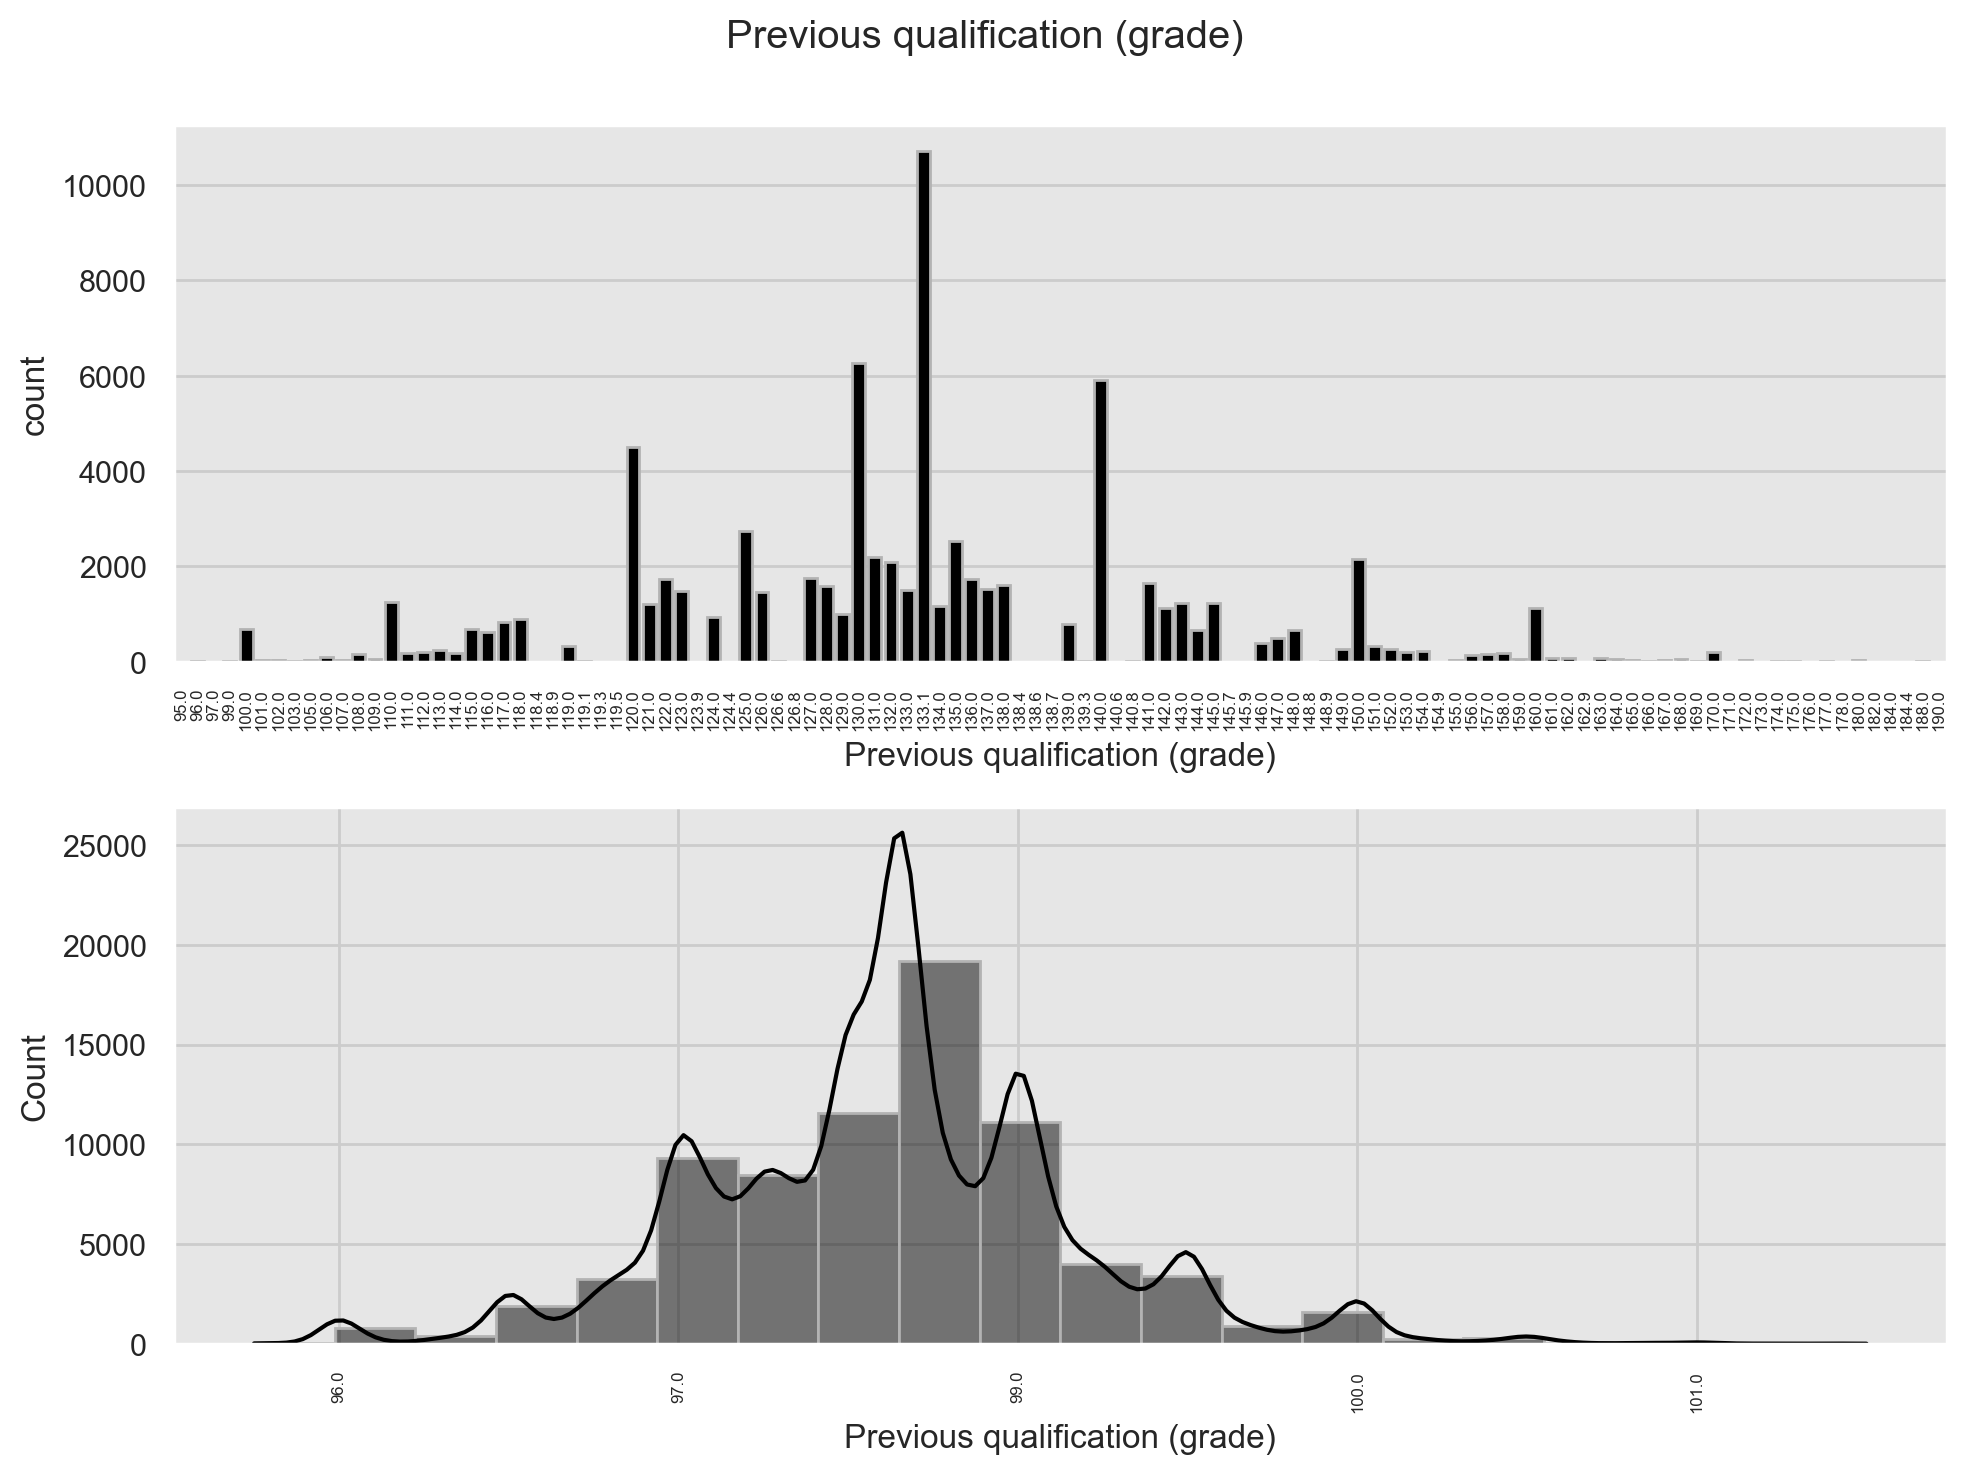

In [18]:
col = grade_cols[0]
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 7))
g1 = sns.countplot(
    data=X,
    x=col,
    color="black",
    edgecolor=".7",
    ax=axes[0]
)
g1.set_xticklabels(labels=np.sort(X[col].unique()), fontsize=6, rotation=90)

g2 = sns.histplot(
    data=X,
    x=col,
    bins=20,
    kde=True,
    color="black",
    edgecolor=".7",
    ax=axes[1]
)
g2.set_xticklabels(labels=np.sort(X[col].unique()), fontsize=6, rotation=90)
fig.tight_layout()
fig.suptitle(col, y=1.05);

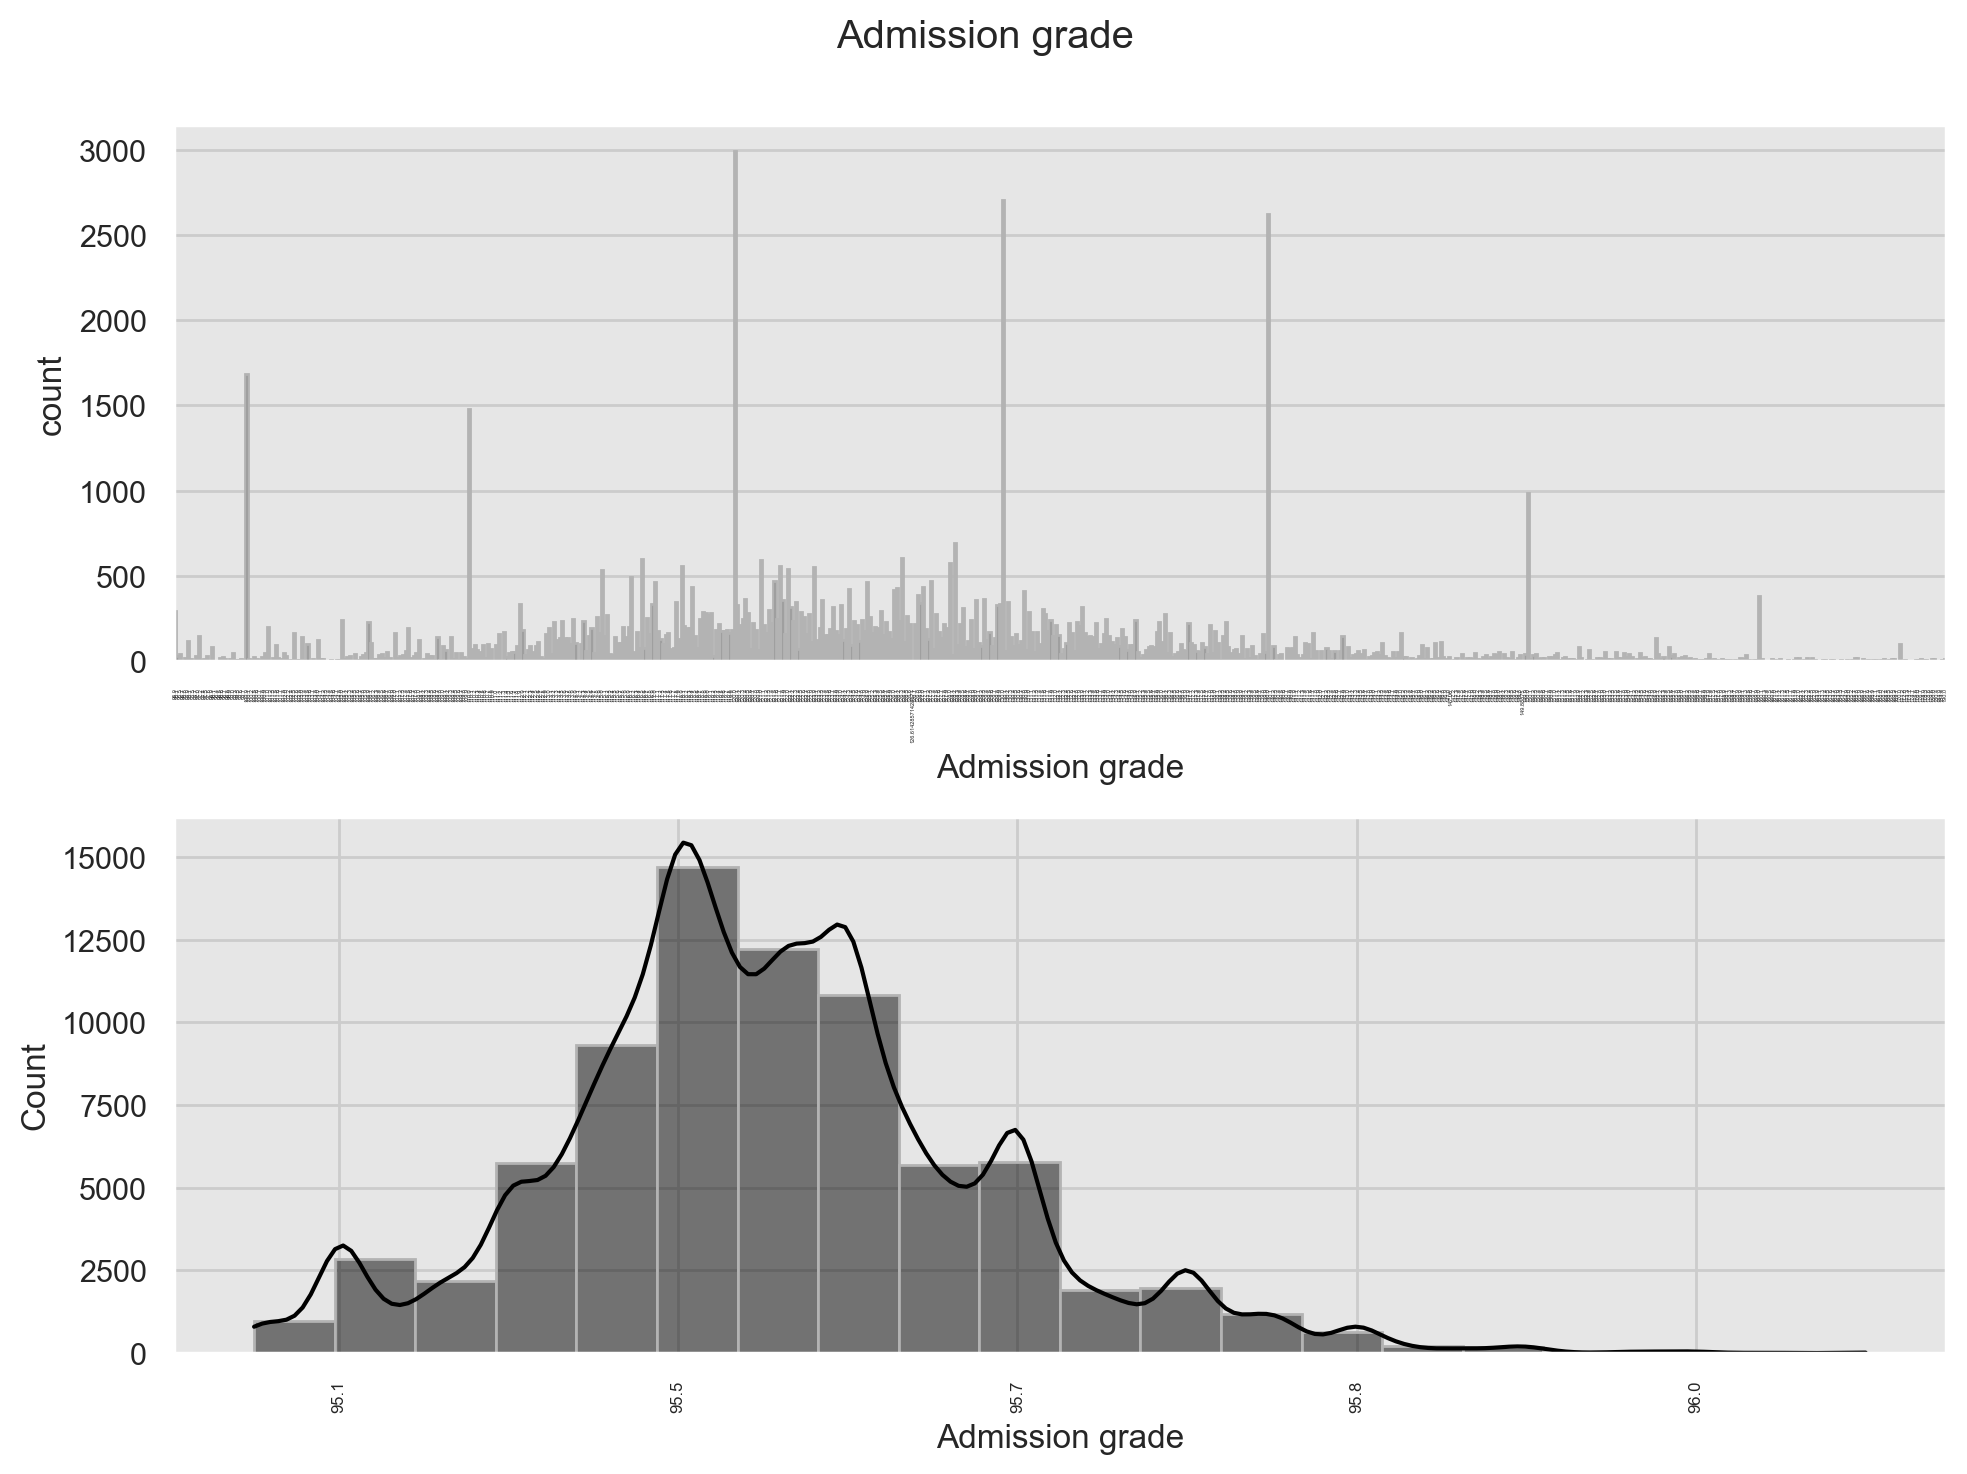

In [19]:
col = grade_cols[1]
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 7))
g1 = sns.countplot(
    data=X,
    x=col,
    color="black",
    edgecolor=".7",
    ax=axes[0]
)
g1.set_xticklabels(labels=np.sort(X[col].unique()), fontsize=2, rotation=90)

g2 = sns.histplot(
    data=X,
    x=col,
    bins=20,
    kde=True,
    color="black",
    edgecolor=".7",
    ax=axes[1]
)
g2.set_xticklabels(labels=np.sort(X[col].unique()), fontsize=6, rotation=90)
fig.tight_layout()
fig.suptitle(col, y=1.05);

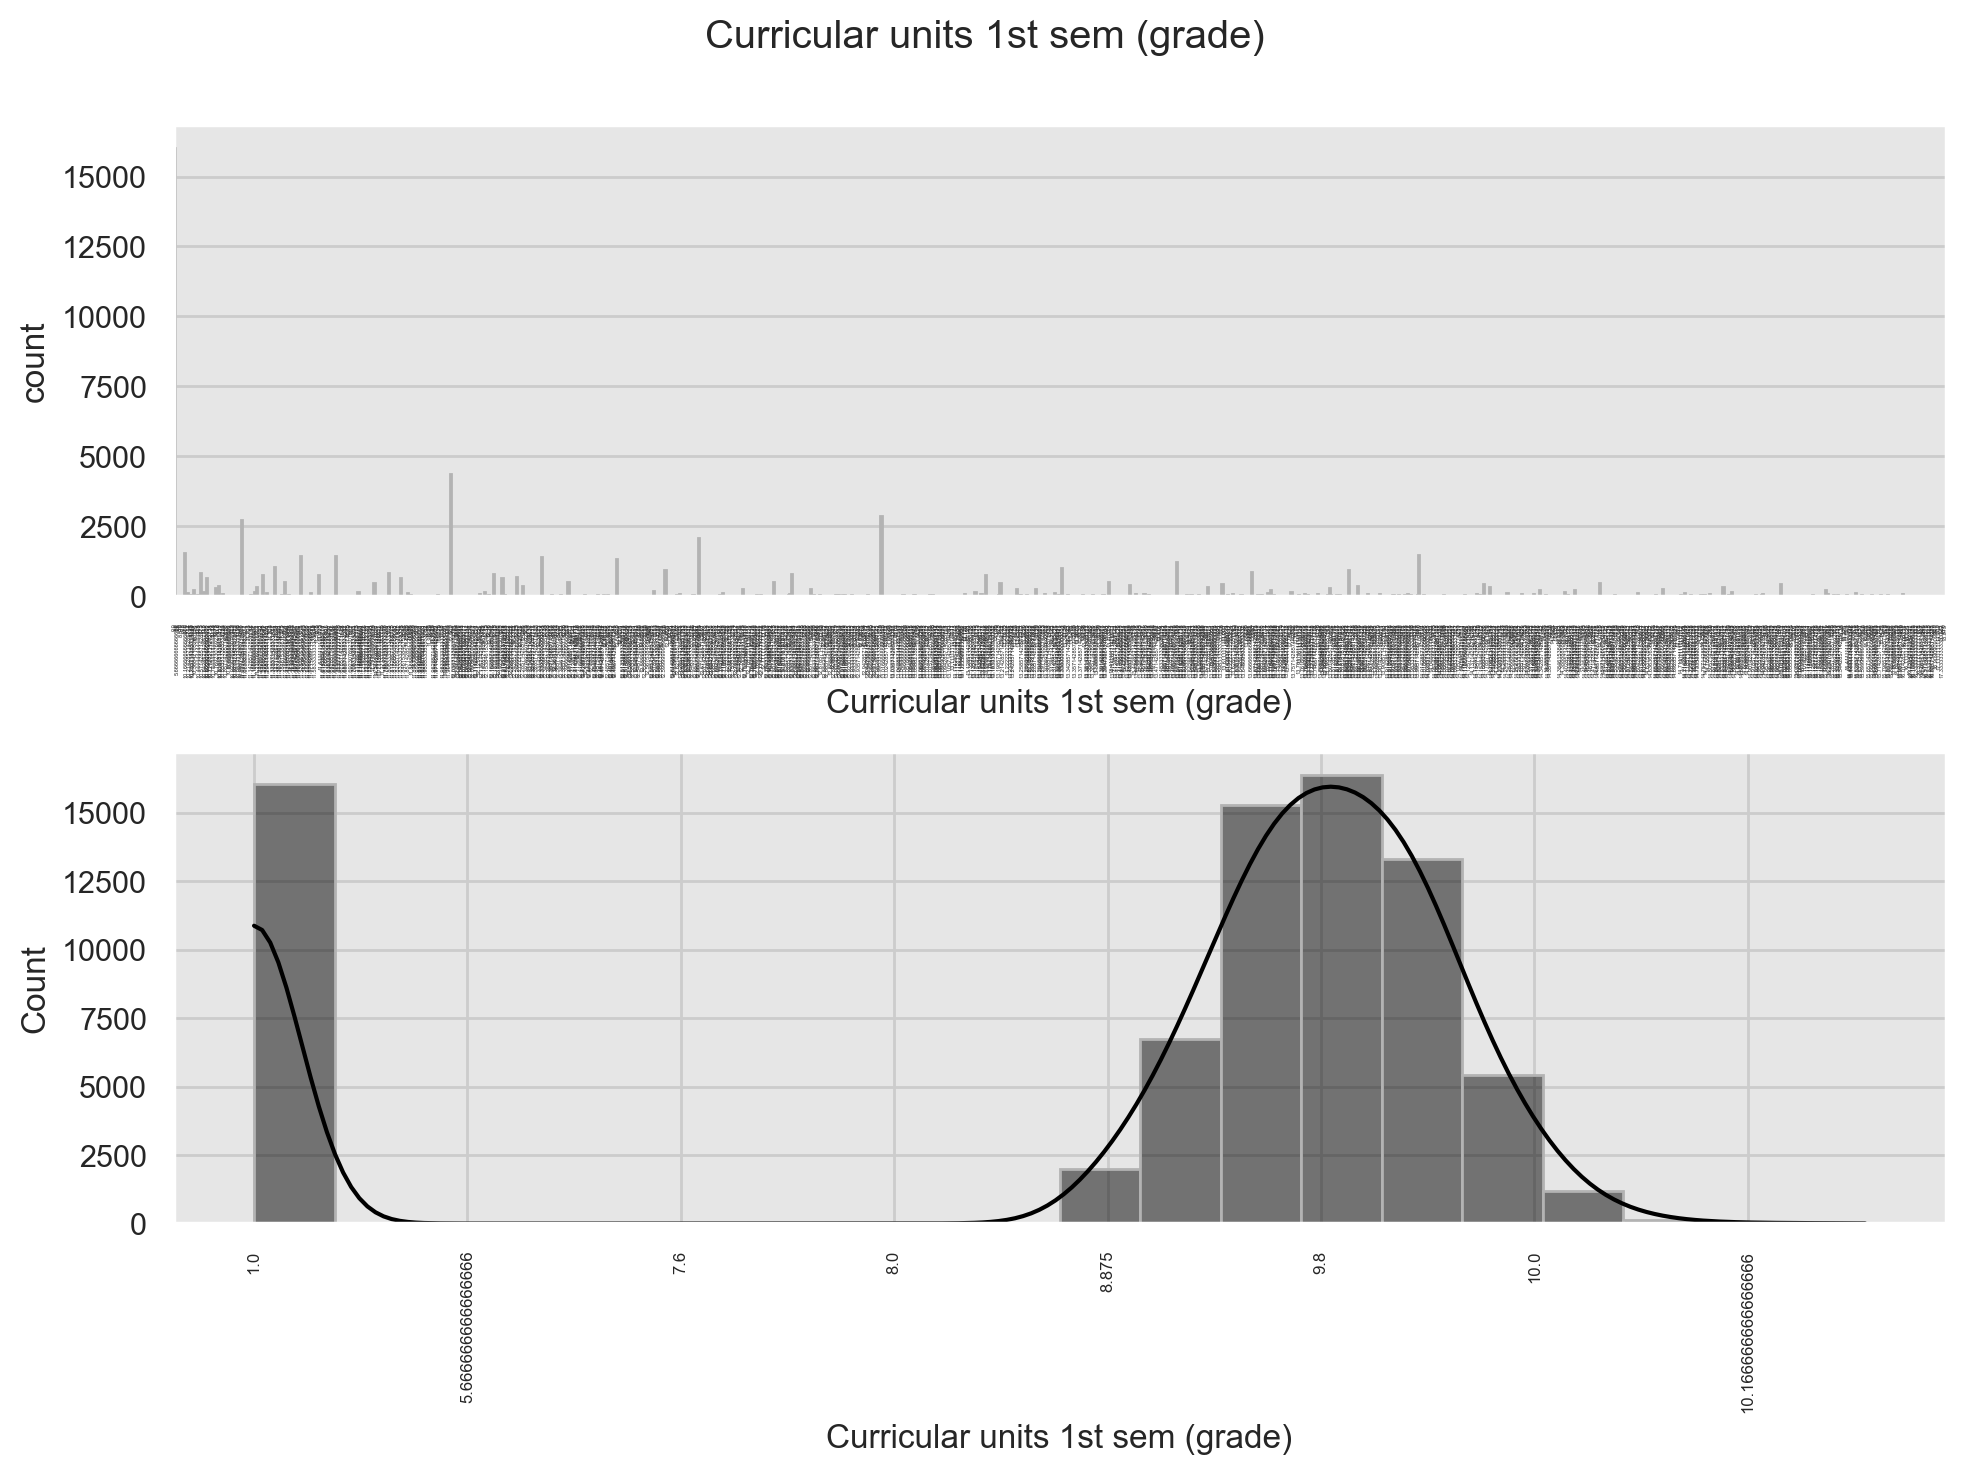

In [20]:
col = grade_cols[2]
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 7))
g1 = sns.countplot(
    data=X,
    x=col,
    color="black",
    edgecolor=".7",
    ax=axes[0]
)
g1.set_xticklabels(labels=np.sort(X[col].unique()), fontsize=2, rotation=90)

g2 = sns.histplot(
    data=X,
    x=col,
    bins=20,
    kde=True,
    color="black",
    edgecolor=".7",
    ax=axes[1]
)
g2.set_xticklabels(labels=np.sort(X[col].unique()), fontsize=6, rotation=90)
fig.tight_layout()
fig.suptitle(col, y=1.05);

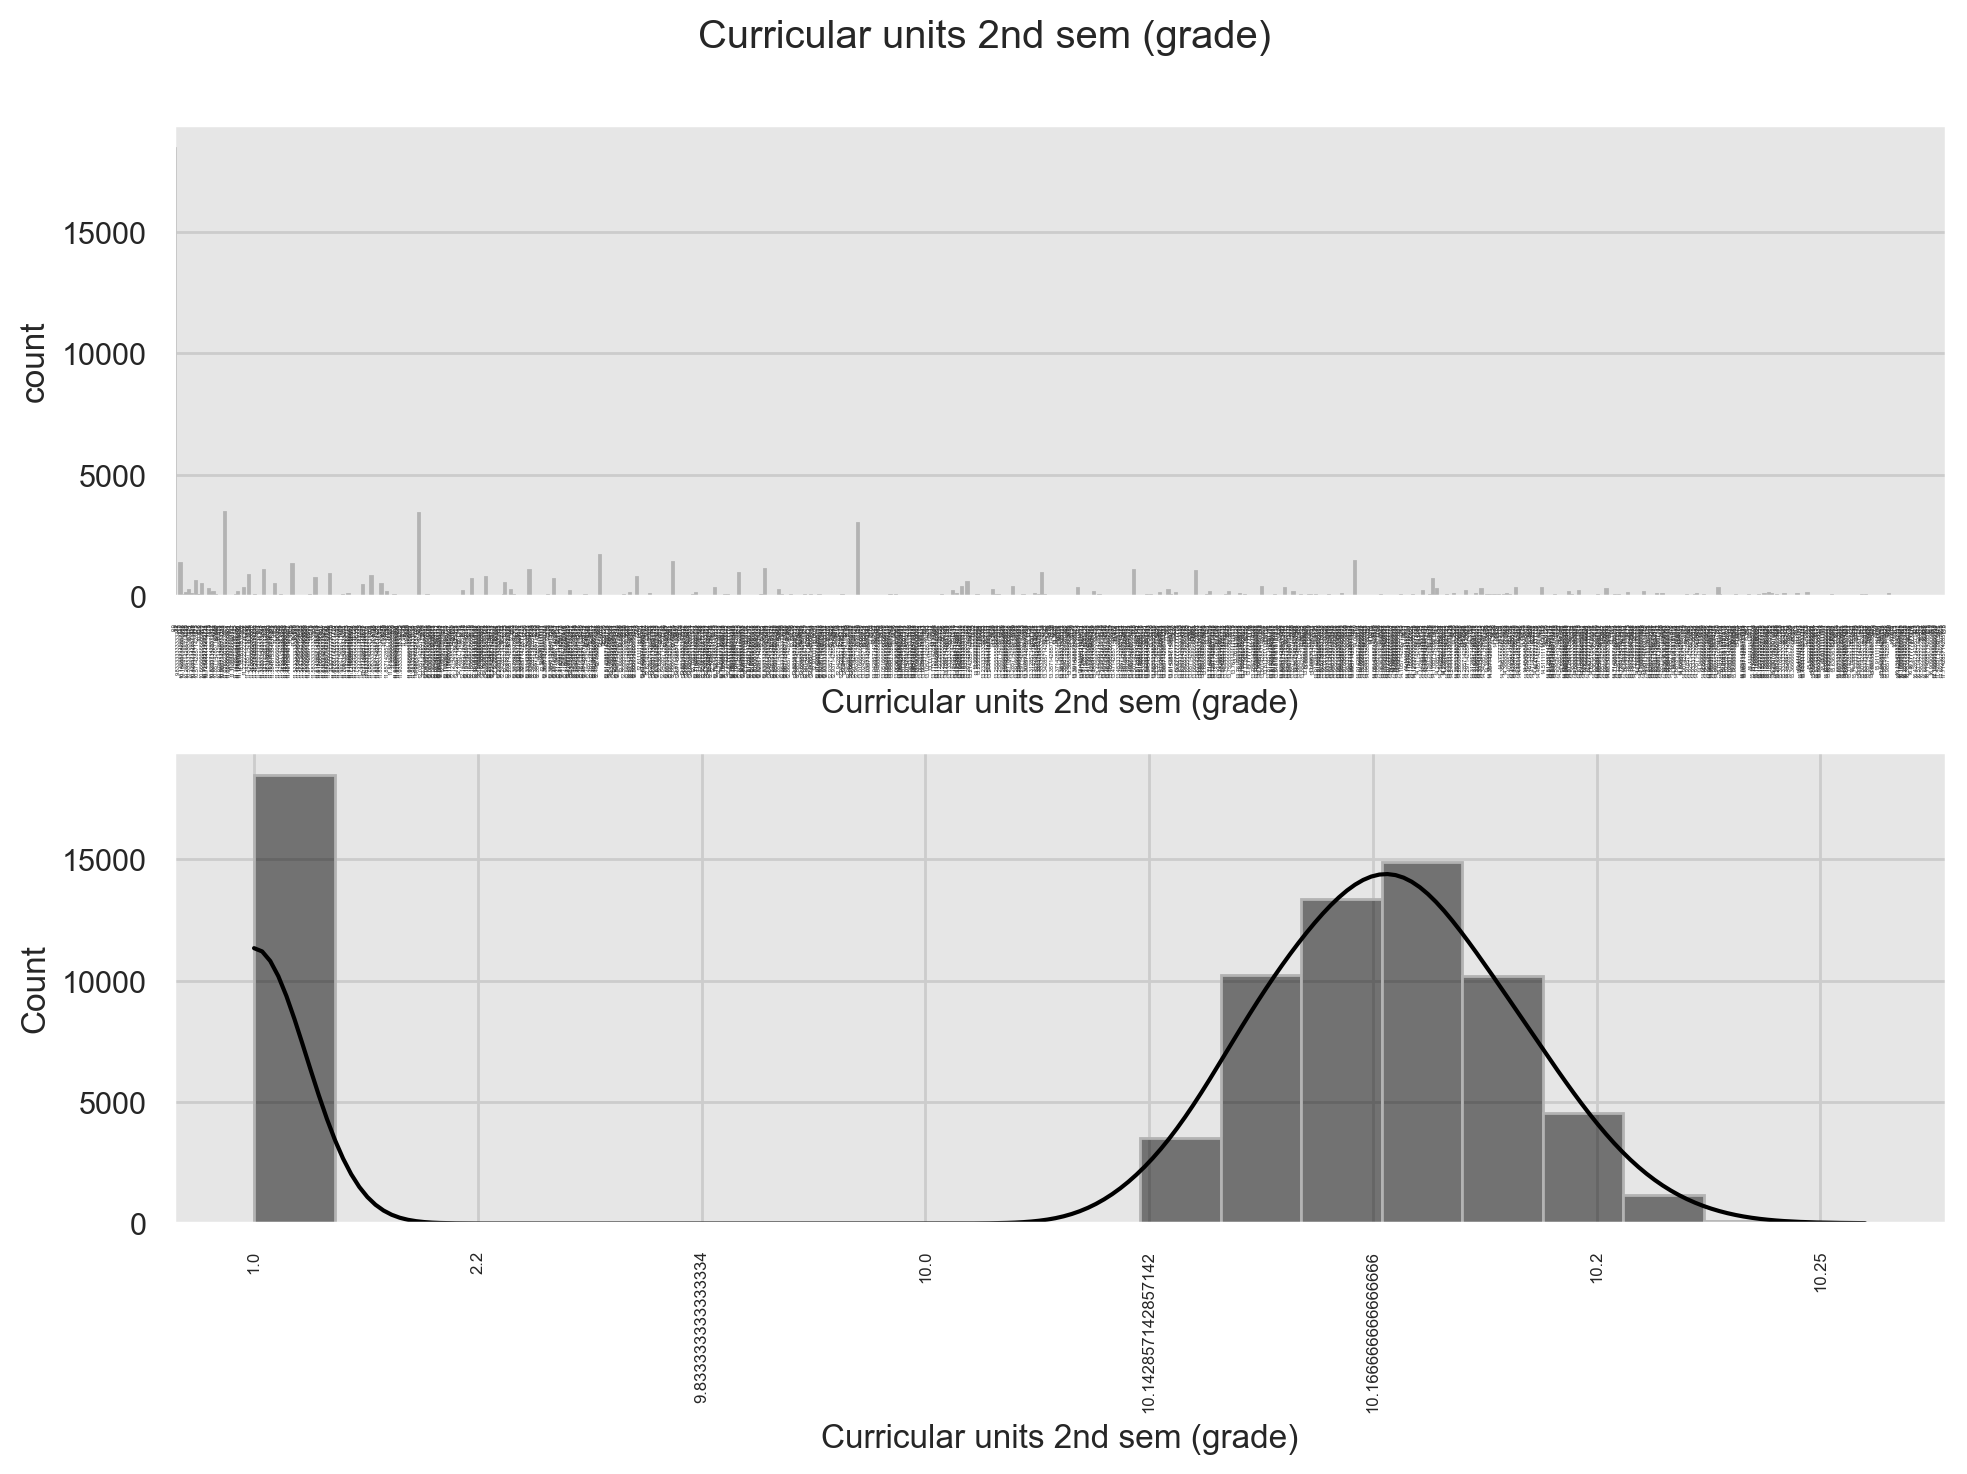

In [21]:
col = grade_cols[3]
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 7))
g1 = sns.countplot(
    data=X,
    x=col,
    color="black",
    edgecolor=".7",
    ax=axes[0]
)
g1.set_xticklabels(labels=np.sort(X[col].unique()), fontsize=2, rotation=90)

g2 = sns.histplot(
    data=X,
    x=col,
    bins=20,
    kde=True,
    color="black",
    edgecolor=".7",
    ax=axes[1]
)
g2.set_xticklabels(labels=np.sort(X[col].unique()), fontsize=6, rotation=90)
fig.tight_layout()
fig.suptitle(col, y=1.05);

### grade columns 의 binning
- 20개 구간으로 binning 후 grade_1~grade_19로 라벨링
- grade columns는 categorical features로 적용
   - dtypes category로 변경
   - numeric_features 리스트에서 제외
   - categorical_features 리스트에 포함

In [165]:
grade_cols

['Previous qualification (grade)',
 'Admission grade',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (grade)']

In [17]:
def get_binning_X(X, bin_num, bin_cols) : 
    
    bin_X = X.copy()

    for c in bin_cols : 
        grade_col_min = bin_X[c].unique().min()
        grade_col_max = bin_X[c].unique().max()
        bin_X[c] = pd.cut(bin_X[c], 
                          bins=np.linspace(grade_col_min, grade_col_max, bin_num), 
                          labels=["grade_{}".format(i) for i in range(1, bin_num)])

    bin_X[bin_cols] = bin_X[bin_cols].fillna("grade_1")
    bin_X[bin_cols] = bin_X[bin_cols].astype("category")
    
    new_numeric_features = list(set(numeric_features).difference(bin_cols))
    new_categorical_features = categorical_features + bin_cols
    
    return bin_X, new_numeric_features, new_categorical_features 

In [33]:
binning_20_X = get_binning_X(20)
binning_20_X[grade_cols].head()

Previous qualification (grade) Admission grade  \
0                        grade_7         grade_6   
1                        grade_6         grade_5   
2                        grade_9        grade_10   
3                        grade_8         grade_7   
4                        grade_8         grade_6   

  Curricular units 1st sem (grade) Curricular units 2nd sem (grade)  
0                         grade_15                         grade_14  
1                         grade_12                          grade_1  
2                          grade_1                          grade_1  
3                         grade_13                         grade_14  
4                         grade_14                         grade_14

In [34]:
binning_20_X[grade_cols].dtypes

Previous qualification (grade)      category
Admission grade                     category
Curricular units 1st sem (grade)    category
Curricular units 2nd sem (grade)    category
dtype: object

In [37]:
numeric_features_2 = list(set(numeric_features).difference(grade_cols))
categorical_features_2 = categorical_features + grade_cols

len(numeric_features_2), len(categorical_features)

(14, 18)

### grade cols 제외한 나머지 numeric features 로그 변환

In [36]:
binning_20_X[numeric_features_2] = binning_20_X[numeric_features_2].apply(lambda x: (x+1).transform(np.log), axis=1)
binning_20_X[numeric_features_2].head()

Age at enrollment  Curricular units 2nd sem (evaluations)  \
0           2.944439                                2.079442   
1           2.944439                                2.302585   
2           2.944439                                0.000000   
3           2.944439                                2.484907   
4           2.944439                                2.564949   

   Unemployment rate  Curricular units 2nd sem (approved)  \
0           2.493205                             1.945910   
1           2.493205                             0.000000   
2           2.844909                             0.000000   
3           2.493205                             2.079442   
4           2.151762                             1.945910   

   Curricular units 1st sem (without evaluations)  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   Curricular units 1st sem (credited)  Curricular units 1st sem (approved)  \
0                                  0.0                             1.945910   
1                                  0.0                             1.609438   
2                                  0.0                             0.000000   
3                                  0.0                             2.079442   
4                                  0.0                             1.945910   

        GDP  Curricular units 1st sem (evaluations)  \
0  1.105257                                1.945910   
1  1.105257                                2.197225   
2 -2.525729                                0.000000   
3  1.105257                                2.302585   
4  0.277632                                2.564949   

   Curricular units 2nd sem (enrolled)  Curricular units 2nd sem (credited)  \
0                             1.945910                                  0.0   
1                             1.945910                                  0.0   
2                             1.945910                                  0.0   
3                             2.197225                                  0.0   
4                             2.079442                                  0.0   

   Inflation rate  Curricular units 2nd sem (without evaluations)  \
0        0.470004                                             0.0   
1        0.470004                                             0.0   
2        0.262364                                             0.0   
3        0.470004                                             0.0   
4        1.280934                                             0.0   

   Curricular units 1st sem (enrolled)  
0                             1.945910  
1                             1.945910  
2                             1.945910  
3                             2.079442  
4                             2.079442

In [15]:
def get_cv_result(X, y, pipe, model_name=None, num_scaler=None, cate_encoder=None) : 
    
    pipe.set_params(model=model_link[model_name])
    
    kfold = KFold(n_splits=5, shuffle=True, random_state=45)
    cv_results = []
    # scaler와 encoder의 조합으로 모델링 실험
    total_start_time = time.time()
    for comb in list(product(num_scaler, cate_encoder)) :
        
        pipe["preprocessor"].set_params(
            num_transformer=num_transformer[comb[0]], cat_transformer=cat_transformer[comb[1]]
        )
        
        start_time = time.time()
        cv_result = cross_validate(
            estimator=pipe, 
            X=X, 
            y=y, 
            scoring="accuracy", 
            cv=kfold,
            return_train_score=True,
            n_jobs=2,
        )
        end_time = time.time()
        
        cv_results.append(pd.DataFrame({
            "model": pipe["model"].__class__.__name__,
            "num_transformer": comb[0],
            "cat_transformer": comb[1],
            "train_score": cv_result["train_score"].mean(),
            "test_score": cv_result["test_score"].mean(),
            "fit_time": end_time - start_time
        }, index=[0]
        ))
    
    result = pd.concat(cv_results, axis=0).sort_values("test_score", ascending=False)
    total_end_time = time.time()
    print(f"total time : {total_end_time - total_start_time : .3f}")
    
    return result

In [16]:
num_transformer = Pipeline(steps=[
    ("ss", StandardScaler()),
    ("mms", MinMaxScaler()),
    ("non_scaler", "passthrough")
])

# onehot, ordinal encoder의 "handle_unknown" 설정으로 train, test 데이터의 불균형 문제를 해결 할 수 있다.
# onehot encoder에서 sparse_output=False로 설정하면 
cat_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(sparse_output=False, handle_unknown="ignore")),
    ("ordinal", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)),
    ("non_encoder", "passthrough"),
    ("drop_cate", "drop")
])

# columntransformer의 transformer 파라미터 구성 : name, transformer, columns
# columns로 features의 이름을 설정하면 features의 dtype이나 데이터의 type에 따라서 에러가 날 수 있다.
# columns로 make_column_selector()를 설정하면 포함할 dtype, 제외할 dtype을 설정할 수 있다. 
feature_preprocessor = ColumnTransformer(
    transformers=[
        ("num_transformer", num_transformer, make_column_selector(dtype_exclude="category")),
        #("cat_transformer", cat_transformer, categorical_features)
        ("cat_transformer", cat_transformer, make_column_selector(dtype_include="category"))
    ], remainder="passthrough"
)

model_link = {}

model_pipe_4 = Pipeline(
    steps=[
        ("preprocessor", feature_preprocessor),
        ("model", model_link)
    ]
)

model_pipe_4

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transformer',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler()),
                                                                  ('mms',
                                                                   MinMaxScaler()),
                                                                  ('non_scaler',
                                                                   'passthrough')]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000023653829210>),
                                                 ('cat_transformer',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1)),
                                                                  ('non_encoder',
                                                                   'passthrough'),
                                                                  ('drop_cate',
                                                                   'drop')]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002365382AC80>)])),
                ('model', {})])

In [38]:
model_link.update({"histGB": HistGradientBoostingClassifier(l2_regularization=0.1, 
                                                            max_depth=5, 
                                                            max_iter=300, 
                                                            min_samples_leaf=5,
                                                            learning_rate=0.1)})
model_link

{'histGB': HistGradientBoostingClassifier(l2_regularization=0.1, max_depth=5, max_iter=300,
                                min_samples_leaf=5)}

### 전처리 방법으로 encoder의 "non_encoder"를 사용하면 오류 발생
- categorical feature의 처리 과정에서 binning 값인 grade_x를 int로 converting 할 수 없다는 오류 발생
- non_encoder 옵션 제외 후 테스트

In [42]:
%%time

scaler = ["ss", "mms", "non_scaler"]
encoder = ["onehot", "ordinal"]

binning_20_X_cv_result = get_cv_result(binning_20_X, 
                                       y_enc, 
                                       model_pipe_4, 
                                       model_name="histGB", 
                                       num_scaler=scaler, 
                                       cate_encoder=encoder)

binning_20_X_cv_result

total time :  233.225
CPU times: total: 750 ms
Wall time: 3min 53s


model num_transformer cat_transformer  \
0  HistGradientBoostingClassifier             mms          onehot   
0  HistGradientBoostingClassifier              ss         ordinal   
0  HistGradientBoostingClassifier              ss          onehot   
0  HistGradientBoostingClassifier      non_scaler         ordinal   
0  HistGradientBoostingClassifier      non_scaler          onehot   
0  HistGradientBoostingClassifier             mms         ordinal   

   train_score  test_score   fit_time  
0     0.848826    0.831203  61.920442  
0     0.851267    0.830693  13.563003  
0     0.849408    0.830602  65.310987  
0     0.851381    0.830471  13.676003  
0     0.849049    0.830275  64.087001  
0     0.852564    0.830131  14.661996

In [47]:
len(numeric_features_2)

14

In [53]:
submission_X = test_df.copy().drop("id", axis=1)
binning_20_submission_X = get_binning_X(submission_X, 20)
binning_20_submission_X[numeric_features_2] = binning_20_submission_X[numeric_features_2].apply(lambda x: 
                                                                                                  (x+1).transform(np.log), axis=1)
binning_20_submission_X[numeric_features_2].head()

Age at enrollment  Curricular units 2nd sem (evaluations)  \
0           2.944439                                0.000000   
1           2.995732                                1.945910   
2           2.944439                                2.484907   
3           3.178054                                2.708050   
4           3.295837                                2.302585   

   Unemployment rate  Curricular units 2nd sem (approved)  \
0           2.701361                             0.000000   
1           2.493205                             1.945910   
2           2.803360                             1.791759   
3           2.292535                             1.791759   
4           2.151762                             1.609438   

   Curricular units 1st sem (without evaluations)  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   Curricular units 1st sem (credited)  Curricular units 1st sem (approved)  \
0                             0.000000                             0.000000   
1                             0.000000                             1.945910   
2                             0.000000                             1.945910   
3                             1.098612                             1.791759   
4                             0.000000                             1.386294   

        GDP  Curricular units 1st sem (evaluations)  \
0  0.582216                                0.000000   
1  1.105257                                2.079442   
2       NaN                                2.484907   
3  1.506297                                2.772589   
4  0.277632                                2.302585   

   Curricular units 2nd sem (enrolled)  Curricular units 2nd sem (credited)  \
0                             2.197225                             0.000000   
1                             1.945910                             0.000000   
2                             1.945910                             0.000000   
3                             2.197225                             1.386294   
4                             1.945910                             0.000000   

   Inflation rate  Curricular units 2nd sem (without evaluations)  \
0       -0.356675                                        0.000000   
1        0.470004                                        0.000000   
2        1.335001                                        0.000000   
3        0.875469                                        0.000000   
4        1.280934                                        1.098612   

   Curricular units 1st sem (enrolled)  
0                             2.079442  
1                             1.945910  
2                             1.945910  
3                             1.945910  
4                             1.945910

In [62]:
model_pipe_4["preprocessor"].set_params(
    num_transformer=num_transformer["mms"],
    cat_transformer=cat_transformer["onehot"]
)
model_pipe_4.set_params(model=model_link["histGB"])

model_pipe_4.fit(binning_20_X, y_enc)
pred = model_pipe_4.predict(binning_20_submission_X)

binning_20_submission_df = submission_df.copy()
binning_20_submission_df["Target"] = pred
target_mapper = dict(zip(np.array([2, 0, 1]), Y.unique()))
binning_20_submission_df["Target"] = binning_20_submission_df["Target"].map(target_mapper)
binning_20_submission_df.head()

id    Target
0  76518   Dropout
1  76519  Graduate
2  76520  Graduate
3  76521  Enrolled
4  76522  Enrolled

In [63]:
binning_20_submission_df.to_csv("./submission/binning_20_submission_df.csv", index=False)
os.listdir("./submission")

['binning_20_submission_df.csv',
 'cap_temp_submission_df.csv',
 'histGB_best_estimator_dorp_association_features.csv',
 'histGB_best_estimator_feature_importances_69.csv',
 'histGB_best_estimator_feature_importances_70.csv',
 'histGB_best_estimator_feature_importances_79.csv',
 'histGB_best_estimator_feature_importance_119.csv',
 'histGB_best_estimator_submission_df.csv',
 'histGB_best_estimator_submission_df_2.csv',
 'log_trans_submission_df.csv',
 'quant_cap_submission_df.csv',
 'std_ol_cap_log_trans_submission_df.csv',
 'submission_df_0619.csv']

In [64]:
model_pipe_4

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transformer',
                                                  MinMaxScaler(),
                                                  ['Age at enrollment',
                                                   'Curricular units 2nd sem '
                                                   '(evaluations)',
                                                   'Unemployment rate',
                                                   'Curricular units 2nd sem '
                                                   '(approved)',
                                                   'Curricular units 1st sem '
                                                   '(without evaluations)',
                                                   'Curricular units 1st sem '
                                                   '(credited)',
                                                   'Curricular units 1st sem '
                                                   '(approved...
                                                   'Curricular units 2nd sem '
                                                   '(without evaluations)',
                                                   'Curricular units 1st sem '
                                                   '(enrolled)']),
                                                 ('cat_transformer',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000014DB1CC61A0>)])),
                ('model',
                 HistGradientBoostingClassifier(l2_regularization=0.1,
                                                max_depth=5, max_iter=300,
                                                min_samples_leaf=5))])

### submission (13) - Binning
- binning 대상 feature로 grade features에 Age feature를 추가하여 성능 테스트
- submission score : 
    - **binning 30 (grade + Age features) + log transform : 0.82748**
    - **binning 30 (grade features) + log transform : 0.82817**
    - **binning 10 (grade features) + log transform : 0.83169**

In [111]:
#binning_features = grade_cols + ['Age at enrollment']
binning_features = grade_cols
binning_features

['Previous qualification (grade)',
 'Admission grade',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (grade)']

In [123]:
binning_10_X, numeric_features_2, categorical_features_2 = get_binning_X(X, 10, binning_features)
binning_10_X[binning_features].head()

Previous qualification (grade) Admission grade  \
0                        grade_3         grade_3   
1                        grade_3         grade_3   
2                        grade_4         grade_5   
3                        grade_4         grade_3   
4                        grade_4         grade_3   

  Curricular units 1st sem (grade) Curricular units 2nd sem (grade)  
0                          grade_7                          grade_7  
1                          grade_6                          grade_1  
2                          grade_1                          grade_1  
3                          grade_7                          grade_7  
4                          grade_7                          grade_7

In [124]:
len(numeric_features_2), len(categorical_features_2)

(14, 22)

In [131]:
binning_10_X[numeric_features_2] = binning_10_X[numeric_features_2].apply(lambda x: (x+1).transform(np.log), axis=1)
binning_10_X[numeric_features_2].head()

Age at enrollment  Curricular units 2nd sem (evaluations)  \
0           2.944439                                2.079442   
1           2.944439                                2.302585   
2           2.944439                                0.000000   
3           2.944439                                2.484907   
4           2.944439                                2.564949   

   Unemployment rate  Curricular units 2nd sem (approved)  \
0           2.493205                             1.945910   
1           2.493205                             0.000000   
2           2.844909                             0.000000   
3           2.493205                             2.079442   
4           2.151762                             1.945910   

   Curricular units 1st sem (without evaluations)  \
0                                             0.0   
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   Curricular units 1st sem (credited)  Curricular units 1st sem (approved)  \
0                                  0.0                             1.945910   
1                                  0.0                             1.609438   
2                                  0.0                             0.000000   
3                                  0.0                             2.079442   
4                                  0.0                             1.945910   

        GDP  Curricular units 1st sem (evaluations)  \
0  1.105257                                1.945910   
1  1.105257                                2.197225   
2 -2.525729                                0.000000   
3  1.105257                                2.302585   
4  0.277632                                2.564949   

   Curricular units 2nd sem (enrolled)  Curricular units 2nd sem (credited)  \
0                             1.945910                                  0.0   
1                             1.945910                                  0.0   
2                             1.945910                                  0.0   
3                             2.197225                                  0.0   
4                             2.079442                                  0.0   

   Inflation rate  Curricular units 2nd sem (without evaluations)  \
0        0.470004                                             0.0   
1        0.470004                                             0.0   
2        0.262364                                             0.0   
3        0.470004                                             0.0   
4        1.280934                                             0.0   

   Curricular units 1st sem (enrolled)  
0                             1.945910  
1                             1.945910  
2                             1.945910  
3                             2.079442  
4                             2.079442

In [132]:
model_link.update({"histGB": HistGradientBoostingClassifier(l2_regularization=0.1, 
                                                            max_depth=5, 
                                                            max_iter=300, 
                                                            min_samples_leaf=5,
                                                            learning_rate=0.1)})
model_link

{'histGB': HistGradientBoostingClassifier(l2_regularization=0.1, max_depth=5, max_iter=300,
                                min_samples_leaf=5)}

In [133]:
%%time

scaler = ["ss", "mms", "non_scaler"]
encoder = ["onehot", "ordinal"]

binning_10_X_cv_result = get_cv_result(binning_10_X, 
                                       y_enc, 
                                       model_pipe_4, 
                                       model_name="histGB", 
                                       num_scaler=scaler, 
                                       cate_encoder=encoder)

binning_10_X_cv_result

total time :  232.915
CPU times: total: 438 ms
Wall time: 3min 52s


model num_transformer cat_transformer  \
0  HistGradientBoostingClassifier              ss          onehot   
0  HistGradientBoostingClassifier      non_scaler         ordinal   
0  HistGradientBoostingClassifier             mms          onehot   
0  HistGradientBoostingClassifier             mms         ordinal   
0  HistGradientBoostingClassifier      non_scaler          onehot   
0  HistGradientBoostingClassifier              ss         ordinal   

   train_score  test_score   fit_time  
0     0.846954    0.830014  57.126485  
0     0.848088    0.829726  12.477001  
0     0.849519    0.829530  68.453041  
0     0.849258    0.829504  13.826001  
0     0.849369    0.829269  66.739511  
0     0.850228    0.829256  14.286718

In [134]:
submission_X = test_df.copy().drop("id", axis=1)
binning_10_submission_X, _, _ = get_binning_X(submission_X, 10, binning_features)
binning_10_submission_X[numeric_features_2] = binning_10_submission_X[numeric_features_2].apply(lambda x: 
                                                                                                  (x+1).transform(np.log), axis=1)

model_pipe_4["preprocessor"].set_params(
    num_transformer=num_transformer["ss"],
    cat_transformer=cat_transformer["onehot"]
)
model_pipe_4.set_params(model=model_link["histGB"])
model_pipe_4.fit(binning_10_X, y_enc)
pred = model_pipe_4.predict(binning_10_submission_X)

binning_10_submission_df = submission_df.copy()
binning_10_submission_df["Target"] = pred
target_mapper = dict(zip(np.array([2, 0, 1]), Y.unique()))
binning_10_submission_df["Target"] = binning_10_submission_df["Target"].map(target_mapper)
binning_10_submission_df.head()

id    Target
0  76518   Dropout
1  76519  Graduate
2  76520  Graduate
3  76521  Enrolled
4  76522  Enrolled

In [135]:
binning_10_submission_df.to_csv("./submission/binning_10_submission_df.csv", index=False)
os.listdir("./submission")

['binning_10_submission_df.csv',
 'binning_20_submission_df.csv',
 'binning_30_submission_df.csv',
 'cap_temp_submission_df.csv',
 'histGB_best_estimator_dorp_association_features.csv',
 'histGB_best_estimator_feature_importances_69.csv',
 'histGB_best_estimator_feature_importances_70.csv',
 'histGB_best_estimator_feature_importances_79.csv',
 'histGB_best_estimator_feature_importance_119.csv',
 'histGB_best_estimator_submission_df.csv',
 'histGB_best_estimator_submission_df_2.csv',
 'log_trans_submission_df.csv',
 'quant_cap_submission_df.csv',
 'std_ol_cap_log_trans_submission_df.csv',
 'submission_df_0619.csv']

### Submission (14) - categorical features Binning
- 빈도수가 낮은 데이터를 특정한 값으로 대체
- submission score 
   - lower 100 unique data -> 9999 : 0.83464 (성능 향상)
   - lower 50 unique data -> 9999 : 0.83356
   - lower 200 unique data -> 9999 : 0.83454

In [98]:
train_count_unique_df.reset_index().query("index in @categorical_features")

index  count
0               Marital status      6
1             Application mode     22
2            Application order      8
3                       Course     19
4   Daytime/evening attendance      2
5       Previous qualification     21
7                  Nacionality     18
8       Mother's qualification     35
9       Father's qualification     39
10         Mother's occupation     40
11         Father's occupation     56
13                   Displaced      2
14   Educational special needs      2
15                      Debtor      2
16     Tuition fees up to date      2
17                      Gender      2
18          Scholarship holder      2
20               International      2

### unique 데이터의 갯수가 기준값보다 작은 feature와 unique 값을 9999 로 대체
- other 를 의미하는 9999 (int)로 대체
   - "ohter"로 대체하니 에러 발생 : 다른 값들이 int이므로 같은 type으로 맞춰주어야 한다.
- OneHotEncoder()로 ecoding할 때 카테고리 features의 데이터 type이 동일해야 한다. 

In [17]:
binning_cate_X = X.copy()

low_count_cate_datas = []
for col in categorical_features : 
    low_count_cate = list(binning_cate_X[col].value_counts(ascending=True).to_frame().query("count < 200").index)
    if len(low_count_cate) :
        low_count_cate_datas.append((col, low_count_cate, len(low_count_cate)))

In [18]:
low_count_cate_datas

[('Previous qualification',
  [36, 17, 11, 14, 37, 5, 15, 4, 38, 43, 10, 6, 2],
  13),
 ('Marital status', [3, 6, 5], 3),
 ('Application mode', [3, 4, 35, 9, 12, 26, 27, 2, 10, 5, 15], 11),
 ('Course', [39, 979, 33], 3),
 ("Father's qualification",
  [23,
   33,
   31,
   25,
   24,
   21,
   15,
   27,
   7,
   20,
   13,
   44,
   18,
   35,
   42,
   6,
   26,
   10,
   22,
   41,
   30,
   43,
   14,
   9,
   29,
   40,
   36,
   11,
   5,
   39],
  30),
 ("Mother's occupation",
  [124,
   127,
   125,
   103,
   101,
   11,
   38,
   163,
   171,
   172,
   173,
   131,
   122,
   153,
   143,
   134,
   151,
   175,
   132,
   193,
   152,
   10,
   192,
   144,
   123,
   141,
   194,
   99],
  28),
 ('Application order', [9, 0], 2),
 ('Nacionality',
  [32, 109, 17, 62, 21, 25, 105, 100, 101, 103, 2, 24, 11, 22, 6, 26],
  16),
 ("Mother's qualification",
  [28,
   27,
   7,
   8,
   15,
   44,
   33,
   31,
   18,
   26,
   14,
   22,
   35,
   30,
   36,
   29,
   10,
   43,
  

In [19]:
for ele in low_count_cate_datas : 
    col = ele[0]
    low_count_cates = ele[1]
    binning_cate_X[col] = binning_cate_X[col].apply(lambda x: x if x not in low_count_cates else 9999)
    print(f"{col}'s <other> : {binning_cate_X[col].value_counts()[9999]}")

Previous qualification's <other> : 364
Marital status's <other> : 167
Application mode's <other> : 329
Course's <other> : 74
Father's qualification's <other> : 541
Mother's occupation's <other> : 489
Application order's <other> : 4
Nacionality's <other> : 284
Mother's qualification's <other> : 446
Father's occupation's <other> : 701


In [20]:
model_link.update({"histGB": HistGradientBoostingClassifier(l2_regularization=0.1, max_depth=5, max_iter=300, min_samples_leaf=5)})
model_link

{'histGB': HistGradientBoostingClassifier(l2_regularization=0.1, max_depth=5, max_iter=300,
                                min_samples_leaf=5)}

In [21]:
%%time

scaler = ["ss", "mms", "non_scaler"]
encoder = ["onehot", "ordinal"]

binning_cate_X_cv_result = get_cv_result(binning_cate_X, 
                                       y_enc, 
                                       model_pipe_4, 
                                       model_name="histGB", 
                                       num_scaler=scaler, 
                                       cate_encoder=encoder)

binning_cate_X_cv_result

total time :  96.199
CPU times: total: 703 ms
Wall time: 1min 36s


model num_transformer cat_transformer  \
0  HistGradientBoostingClassifier              ss          onehot   
0  HistGradientBoostingClassifier              ss         ordinal   
0  HistGradientBoostingClassifier      non_scaler          onehot   
0  HistGradientBoostingClassifier             mms          onehot   
0  HistGradientBoostingClassifier             mms         ordinal   
0  HistGradientBoostingClassifier      non_scaler         ordinal   

   train_score  test_score   fit_time  
0     0.856576    0.831464  19.378829  
0     0.855044    0.831399  13.919731  
0     0.854528    0.830955  15.958621  
0     0.858644    0.830785  19.420853  
0     0.852365    0.830733  13.595867  
0     0.853387    0.830615  13.917299

In [25]:
binning_cate_submission_X = test_df.copy().drop("id", axis=1)
binning_cate_submission_X[categorical_features] = binning_cate_submission_X[categorical_features].astype("category")

for ele in low_count_cate_datas : 
    col = ele[0]
    low_count_cates = ele[1]
    binning_cate_submission_X[col] = binning_cate_submission_X[col].apply(lambda x: x if x not in low_count_cates else 9999)
    print(f"{col}'s <other=9999> : {len(binning_cate_submission_X[binning_cate_submission_X[col] == 9999])}")
    
model_pipe_4["preprocessor"].set_params(
    num_transformer=num_transformer["ss"], cat_transformer=cat_transformer["onehot"]
)
model_pipe_4.set_params(model=model_link["histGB"])
model_pipe_4.fit(binning_cate_X, y_enc)
pred = model_pipe_4.predict(binning_cate_submission_X)

binning_cate_submission_df = submission_df.copy()
binning_cate_submission_df["Target"] = pred
target_mapper = dict(zip(np.array([2, 0, 1]), Y.unique()))
binning_cate_submission_df["Target"] = binning_cate_submission_df["Target"].map(target_mapper)
binning_cate_submission_df.head()

Previous qualification's <other=9999> : 235
Marital status's <other=9999> : 119
Application mode's <other=9999> : 224
Course's <other=9999> : 42
Father's qualification's <other=9999> : 376
Mother's occupation's <other=9999> : 315
Application order's <other=9999> : 6
Nacionality's <other=9999> : 186
Mother's qualification's <other=9999> : 273
Father's occupation's <other=9999> : 451


id    Target
0  76518   Dropout
1  76519  Graduate
2  76520  Graduate
3  76521  Enrolled
4  76522  Enrolled

In [26]:
binning_cate_submission_df.to_csv("./submission/binning_cate_submission_df_3.csv", index=False)
os.listdir("./submission")

['binning_10_submission_df.csv',
 'binning_20_submission_df.csv',
 'binning_30_submission_df.csv',
 'binning_cate_submission_df.csv',
 'binning_cate_submission_df_2.csv',
 'binning_cate_submission_df_3.csv',
 'cap_temp_submission_df.csv',
 'histGB_best_estimator_dorp_association_features.csv',
 'histGB_best_estimator_feature_importances_69.csv',
 'histGB_best_estimator_feature_importances_70.csv',
 'histGB_best_estimator_feature_importances_79.csv',
 'histGB_best_estimator_feature_importance_119.csv',
 'histGB_best_estimator_submission_df.csv',
 'histGB_best_estimator_submission_df_2.csv',
 'log_trans_submission_df.csv',
 'quant_cap_submission_df.csv',
 'std_ol_cap_log_trans_submission_df.csv',
 'submission_df_0619.csv']

### Submission (15) - feature interaction, feature select 추가
- SelectKBest(score_func=chi2) : chi2 는 non-negative feature 만 가능함
- onehot + feature interaction 을 하면 에러 발생
   - onehot encoding 후 feature의 갯수가 298개이고, PolynomialFeatures(degree=2)를 사용하여 interaction을 적용하면 4만개의 feature가 된다. 
   - binning으로 unique 데이터의 갯수를 줄여 onehot encoder의 갯수를 줄인 후 테스트하거나
   - onehot이 아닌 ordinal encoder 사용하여 테스트
- onehot 후 빅데이터 처리 방법 사용
   - partial_fit() 매서드 모델
- **submission score : 0.81719**

In [69]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, chi2, f_classif

In [73]:
num_transformer = Pipeline(
    steps=[
        ("ss", StandardScaler()),
        ("mms", MinMaxScaler()),
        ("non_scaler", "passthrough")
])

# onehot, ordinal encoder의 "handle_unknown" 설정으로 train, test 데이터의 불균형 문제를 해결 할 수 있다.
# onehot encoder에서 sparse_output=False로 설정하면 
cat_transformer = Pipeline(
    steps=[
        ("onehot", OneHotEncoder(sparse_output=False, handle_unknown="ignore")),
        ("ordinal", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)),
        ("non_encoder", "passthrough"),
        ("drop_cate", "drop")
])

# columntransformer의 transformer 파라미터 구성 : name, transformer, columns
# columns로 features의 이름을 설정하면 features의 dtype이나 데이터의 type에 따라서 에러가 날 수 있다.
# columns로 make_column_selector()를 설정하면 포함할 dtype, 제외할 dtype을 설정할 수 있다. 
feature_preprocessor = ColumnTransformer(
    transformers=[
        ("num_transformer", num_transformer, make_column_selector(dtype_exclude="category")),
        #("cat_transformer", cat_transformer, categorical_features)
        ("cat_transformer", cat_transformer, make_column_selector(dtype_include="category"))
    ], remainder="passthrough"
)

feature_tech = Pipeline(
    steps=[
        ("feature_interaction", PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),
        ("feature_select", SelectKBest(score_func=f_classif))
    ]
)

feature_engineering = Pipeline(
    steps=[
        ("preprocessor", feature_preprocessor),
        ("tech", feature_tech)
    ]
)

model_link = {"histGB": HistGradientBoostingClassifier()}

model_pipe_5 = Pipeline(
    steps=[
        ("engineering", feature_engineering),
        ("model", model_link)
    ]
)

model_pipe_5

Pipeline(steps=[('engineering',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('num_transformer',
                                                                   Pipeline(steps=[('ss',
                                                                                    StandardScaler()),
                                                                                   ('mms',
                                                                                    MinMaxScaler()),
                                                                                   ('non_scaler',
                                                                                    'passthrough')]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x000001AB7F391AE0>),
                                                                  ('cat_transformer',
                                                                   Pipeline(step...
                                                                                                   unknown_value=-1)),
                                                                                   ('non_encoder',
                                                                                    'passthrough'),
                                                                                   ('drop_cate',
                                                                                    'drop')]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x000001AB7F392AA0>)])),
                                 ('tech',
                                  Pipeline(steps=[('feature_interaction',
                                                   PolynomialFeatures(include_bias=False,
                                                                      interaction_only=True)),
                                                  ('feature_select',
                                                   SelectKBest())]))])),
                ('model', {'histGB': HistGradientBoostingClassifier()})])

In [13]:
def get_cv_result_5(X, y, pipe, model_name=None, num_scaler=None, cate_encoder=None) : 
    
    pipe.set_params(model=model_link[model_name])
    
    kfold = KFold(n_splits=5, shuffle=True, random_state=45)
    cv_results = []
    # scaler와 encoder의 조합으로 모델링 실험
    total_start_time = time.time()
    for comb in list(product(num_scaler, cate_encoder)) :
        # model_pipe_5는 engineering pipe에 tech와 perprocessor step으로 구분함
        pipe["engineering"]["preprocessor"].set_params(
            num_transformer=num_transformer[comb[0]], 
            cat_transformer=cat_transformer[comb[1]]
        )
        pipe.set_params(model=model_link[model_name])
        
        start_time = time.time()
        cv_result = cross_validate(
            estimator=pipe, 
            X=X, 
            y=y, 
            scoring="accuracy", 
            cv=kfold,
            return_train_score=True,
            n_jobs=2,
        )
        end_time = time.time()
        
        cv_results.append(pd.DataFrame({
            "model": pipe["model"].__class__.__name__,
            "num_transformer": comb[0],
            "cat_transformer": comb[1],
            "train_score": cv_result["train_score"].mean(),
            "test_score": cv_result["test_score"].mean(),
            "fit_time": end_time - start_time
        }, index=[0]
        ))
    
    result = pd.concat(cv_results, axis=0).sort_values("test_score", ascending=False)
    total_end_time = time.time()
    print(f"total time : {total_end_time - total_start_time : .3f}")
    
    return result

### ss + ordinal + feature_interation + feature_select

In [14]:
%%time

scaler = ["ss", "mms"]
encoder = ["ordinal"]

X_cv_result = get_cv_result_5(X, 
                            y_enc, 
                            model_pipe_5, 
                            model_name="histGB", 
                            num_scaler=scaler, 
                            cate_encoder=encoder)

X_cv_result

total time :  25.820
CPU times: total: 46.9 ms
Wall time: 25.8 s


model num_transformer cat_transformer  \
0  HistGradientBoostingClassifier              ss         ordinal   
0  HistGradientBoostingClassifier             mms         ordinal   

   train_score  test_score   fit_time  
0     0.823659    0.814972  14.720793  
0     0.815779    0.808307  11.096151

In [48]:
ordinal_interaction_X = pd.DataFrame(model_pipe_5["engineering"]["tech"]["feature_interaction"].fit_transform(X),
            columns=[c for c in model_pipe_5["engineering"]["tech"]["feature_interaction"].get_feature_names_out()])
ordinal_interaction_X.head()

Marital status  Application mode  Application order  Course  \
0             1.0               1.0                1.0  9238.0   
1             1.0              17.0                1.0  9238.0   
2             1.0              17.0                2.0  9254.0   
3             1.0               1.0                3.0  9500.0   
4             1.0               1.0                2.0  9500.0   

   Daytime/evening attendance  Previous qualification  \
0                         1.0                     1.0   
1                         1.0                     1.0   
2                         1.0                     1.0   
3                         1.0                     1.0   
4                         1.0                     1.0   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           126.0          1.0                     1.0   
1                           125.0          1.0                    19.0   
2                           137.0          1.0                     3.0   
3                           131.0          1.0                    19.0   
4                           132.0          1.0                    19.0   

   Father's qualification  ...  \
0                    19.0  ...   
1                    19.0  ...   
2                    19.0  ...   
3                     3.0  ...   
4                    37.0  ...   

   Curricular units 2nd sem (grade) Curricular units 2nd sem (without evaluations)  \
0                                                                              0.0   
1                                                                              0.0   
2                                                                              0.0   
3                                                                              0.0   
4                                                                              0.0   

   Curricular units 2nd sem (grade) Unemployment rate  \
0                                          137.957143   
1                                            0.000000   
2                                            0.000000   
3                                          142.302000   
4                                           98.293333   

   Curricular units 2nd sem (grade) Inflation rate  \
0                                         7.457143   
1                                         0.000000   
2                                         0.000000   
3                                         7.692000   
4                                        33.626667   

   Curricular units 2nd sem (grade) GDP  \
0                             25.105714   
1                              0.000000   
2                             -0.000000   
3                             25.896400   
4                              4.138667   

   Curricular units 2nd sem (without evaluations) Unemployment rate  \
0                                                               0.0   
1                                                               0.0   
2                                                               0.0   
3                                                               0.0   
4                                                               0.0   

   Curricular units 2nd sem (without evaluations) Inflation rate  \
0                                                            0.0   
1                                                            0.0   
2                                                            0.0   
3                                                            0.0   
4                                                            0.0   

   Curricular units 2nd sem (without evaluations) GDP  \
0                                                 0.0   
1                                                 0.0   
2                                                -0.0   
3                                                 0.0   
4                                               

In [49]:
ordinal_interaction_select_kb_X = pd.DataFrame(
    model_pipe_5["engineering"]["tech"]["feature_select"].fit_transform(ordinal_interaction_X, y_enc),
    columns=[c for c in model_pipe_5["engineering"]["tech"]["feature_select"].get_feature_names_out()])

ordinal_interaction_select_kb_X.head()

Curricular units 2nd sem (approved)  \
0                                  6.0   
1                                  0.0   
2                                  0.0   
3                                  7.0   
4                                  6.0   

   Course Curricular units 2nd sem (approved)  \
0                                     55428.0   
1                                         0.0   
2                                         0.0   
3                                     66500.0   
4                                     57000.0   

   Previous qualification (grade) Curricular units 2nd sem (approved)  \
0                                                               756.0   
1                                                                 0.0   
2                                                                 0.0   
3                                                               917.0   
4                                                               792.0   

   Admission grade Curricular units 2nd sem (approved)  \
0                                                735.6   
1                                                  0.0   
2                                                  0.0   
3                                                882.7   
4                                                720.6   

   Tuition fees up to date Curricular units 1st sem (approved)  \
0                                                          6.0   
1                                                          4.0   
2                                                          0.0   
3                                                          7.0   
4                                                          6.0   

   Tuition fees up to date Curricular units 2nd sem (approved)  \
0                                                          6.0   
1                                                          0.0   
2                                                          0.0   
3                                                          7.0   
4                                                          6.0   

   Tuition fees up to date Curricular units 2nd sem (grade)  \
0                                                 12.428571   
1                                                  0.000000   
2                                                  0.000000   
3                                                 12.820000   
4                                                 12.933333   

   Curricular units 1st sem (grade) Curricular units 2nd sem (approved)  \
0                                                              87.00000   
1                                                               0.00000   
2                                                               0.00000   
3                                                              88.13875   
4                                                              77.60000   

   Curricular units 1st sem (grade) Curricular units 2nd sem (grade)  \
0                                                         180.214286   
1                                                           0.000000   
2                                                           0.000000   
3                                                         161.419825   
4                                                         167.271111   

   Curricular units 2nd sem (approved) Curricular units 2nd sem (grade)  
0                                                             74.571429  
1                                                              0.000000  
2                                                              0.000000  
3                                                             89.740000  
4                                                             77.600000

In [62]:
model_pipe_5["engineering"]["preprocessor"].set_params(
    num_transformer=num_transformer["ss"], cat_transformer=cat_transformer["ordinal"]
)
model_pipe_5.set_params(model=model_link["histGB"])

submission_X = test_df.copy().drop("id", axis=1)
model_pipe_5.fit(X, y_enc)
pred = model_pipe_5.predict(submission_X)

ordinal_interaction_select_submission_df = submission_df.copy()
ordinal_interaction_select_submission_df["Target"] = pred
target_mapper = {0: "Dropout", 1: "Enrolled", 2: "Graduate"}
ordinal_interaction_select_submission_df["Target"] = ordinal_interaction_select_submission_df["Target"].map(target_mapper)
ordinal_interaction_select_submission_df.head()

id    Target
0  76518   Dropout
1  76519  Graduate
2  76520  Graduate
3  76521  Graduate
4  76522  Enrolled

In [64]:
ordinal_interaction_select_submission_df.to_csv("./submission/ordinal_interaction_select_submission_df.csv", index=False)
os.listdir("./submission")

['binning_10_submission_df.csv',
 'binning_20_submission_df.csv',
 'binning_30_submission_df.csv',
 'binning_cate_submission_df.csv',
 'binning_cate_submission_df_2.csv',
 'binning_cate_submission_df_3.csv',
 'cap_temp_submission_df.csv',
 'histGB_best_estimator_dorp_association_features.csv',
 'histGB_best_estimator_feature_importances_69.csv',
 'histGB_best_estimator_feature_importances_70.csv',
 'histGB_best_estimator_feature_importances_79.csv',
 'histGB_best_estimator_feature_importance_119.csv',
 'histGB_best_estimator_submission_df.csv',
 'histGB_best_estimator_submission_df_2.csv',
 'log_trans_submission_df.csv',
 'ordinal_interaction_select_submission_df.csv',
 'quant_cap_submission_df.csv',
 'std_ol_cap_log_trans_submission_df.csv',
 'submission_df_0619.csv']

### submission (16) - selectkbtest() 설정
- feature select에서 선택한 feature들이 모형의 입력변수가 된다. 따라서 SelectKBest()의 k 값을 다르게 하여 모델의 성능을 측정한다. 
- k=400
- **submission score : 0.83287**

In [70]:
model_pipe_5["engineering"]["tech"].set_params(feature_select=SelectKBest(score_func=f_classif, k=400))
model_pipe_5["engineering"]["tech"]["feature_select"].get_params()

{'k': 400,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

In [71]:
%%time

scaler = ["ss", "mms"]
encoder = ["ordinal"]

X_cv_result = get_cv_result_5(X, 
                            y_enc, 
                            model_pipe_5, 
                            model_name="histGB", 
                            num_scaler=scaler, 
                            cate_encoder=encoder)

X_cv_result

total time :  173.949
CPU times: total: 31.2 ms
Wall time: 2min 53s


model num_transformer cat_transformer  \
0  HistGradientBoostingClassifier             mms         ordinal   
0  HistGradientBoostingClassifier              ss         ordinal   

   train_score  test_score   fit_time  
0     0.862973    0.830027  86.943418  
0     0.861085    0.829413  87.001839

In [72]:
model_pipe_5["engineering"]["preprocessor"].set_params(
    num_transformer=num_transformer["mms"], cat_transformer=cat_transformer["ordinal"]
)
model_pipe_5.set_params(model=model_link["histGB"])

Pipeline(steps=[('engineering',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('num_transformer',
                                                                   MinMaxScaler(),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x000002A782BCED10>),
                                                                  ('cat_transformer',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x000002A78210BCA0>)])),
                                 ('tech',
                                  Pipeline(steps=[('feature_interaction',
                                                   PolynomialFeatures(include_bias=False,
                                                                      interaction_only=True)),
                                                  ('feature_select',
                                                   SelectKBest(k=400))]))])),
                ('model', HistGradientBoostingClassifier())])

In [73]:
%%time

histGB_params = {
    "model__learning_rate": [0.1, 0.2],
    "model__max_iter": [100, 200, 300],
    "model__max_depth": [2, 3, 4, 5, 6],
    "model__l2_regularization": [0.1, 0.2]
}
kfold = KFold(n_splits=5, shuffle=True, random_state=45)
histGB_grid_cv_5 = GridSearchCV(estimator=model_pipe_5,
                              param_grid=histGB_params, 
                              cv=kfold, 
                              scoring="accuracy", 
                              n_jobs=2,
                              return_train_score=True)

histGB_grid_cv_5.fit(X, y_enc)

CPU times: total: 15.4 s
Wall time: 55min 19s


GridSearchCV(cv=KFold(n_splits=5, random_state=45, shuffle=True),
             estimator=Pipeline(steps=[('engineering',
                                        Pipeline(steps=[('preprocessor',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('num_transformer',
                                                                                          MinMaxScaler(),
                                                                                          <sklearn.compose._column_transformer.make_column_selector object at 0x000002A782BCED10>),
                                                                                         ('cat_transformer',
                                                                                          OrdinalEncoder(hand...
                                                         Pipeline(steps=[('feature_interaction',
                                                                          PolynomialFeatures(include_bias=False,
                                                                                             interaction_only=True)),
                                                                         ('feature_select',
                                                                          SelectKBest(k=400))]))])),
                                       ('model',
                                        HistGradientBoostingClassifier())]),
             n_jobs=2,
             param_grid={'model__l2_regularization': [0.1, 0.2],
                         'model__learning_rate': [0.1, 0.2],
                         'model__max_depth': [2, 3, 4, 5, 6],
                         'model__max_iter': [100, 200, 300]},
             return_train_score=True, scoring='accuracy')

In [74]:
def get_grid_cv_result_df(grid_cv) : 
    
    result_df = pd.DataFrame(grid_cv.cv_results_).sort_values("rank_test_score")
    cols = list(result_df.filter(regex="^param_model").columns) + ["mean_test_score", "mean_train_score", "std_test_score", "rank_test_score"]
    result_df = result_df[cols]
    
    return result_df

In [77]:
histGB_grid_cv_result_df_5 = get_grid_cv_result_df(histGB_grid_cv_5)
histGB_grid_cv_result_df_5[:5]

param_model__l2_regularization param_model__learning_rate  \
44                            0.2                        0.1   
13                            0.1                        0.1   
6                             0.1                        0.1   
12                            0.1                        0.1   
40                            0.2                        0.1   

   param_model__max_depth param_model__max_iter  mean_test_score  \
44                      6                   300         0.830327   
13                      6                   200         0.830131   
6                       4                   100         0.829949   
12                      6                   100         0.829935   
40                      5                   200         0.829883   

    mean_train_score  std_test_score  rank_test_score  
44          0.862820        0.002972                1  
13          0.861330        0.003532                2  
6           0.848088        0.003202                3  
12          0.861307        0.003238                4  
40          0.860376        0.004477                5

In [81]:
histGB_grid_cv_5.best_estimator_

Pipeline(steps=[('engineering',
                 Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('num_transformer',
                                                                   MinMaxScaler(),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x000002A78B1B76A0>),
                                                                  ('cat_transformer',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x000002A78B1B59F0>)])),
                                 ('tech',
                                  Pipeline(steps=[('feature_interaction',
                                                   PolynomialFeatures(include_bias=False,
                                                                      interaction_only=True)),
                                                  ('feature_select',
                                                   SelectKBest(k=400))]))])),
                ('model',
                 HistGradientBoostingClassifier(l2_regularization=0.2,
                                                max_depth=6, max_iter=300))])

In [82]:
submission_X = test_df.copy().drop("id", axis=1)
pred = histGB_grid_cv_5.best_estimator_.predict(submission_X)

histGB_grid_cv_submission_df = submission_df.copy()
histGB_grid_cv_submission_df["Target"] = pred
target_mapper = {0: "Dropout", 1: "Enrolled", 2: "Graduate"}
histGB_grid_cv_submission_df["Target"] = histGB_grid_cv_submission_df["Target"].map(target_mapper)
histGB_grid_cv_submission_df.head()

id    Target
0  76518   Dropout
1  76519  Graduate
2  76520  Graduate
3  76521  Enrolled
4  76522  Enrolled

In [83]:
histGB_grid_cv_submission_df.to_csv("./submission/selectkb_400_histGB_grid_cv_submission_df.csv", index=False)
os.listdir("./submission")

['binning_10_submission_df.csv',
 'binning_20_submission_df.csv',
 'binning_30_submission_df.csv',
 'binning_cate_submission_df.csv',
 'binning_cate_submission_df_2.csv',
 'binning_cate_submission_df_3.csv',
 'cap_temp_submission_df.csv',
 'histGB_best_estimator_dorp_association_features.csv',
 'histGB_best_estimator_feature_importances_69.csv',
 'histGB_best_estimator_feature_importances_70.csv',
 'histGB_best_estimator_feature_importances_79.csv',
 'histGB_best_estimator_feature_importance_119.csv',
 'histGB_best_estimator_submission_df.csv',
 'histGB_best_estimator_submission_df_2.csv',
 'log_trans_submission_df.csv',
 'ordinal_interaction_select_submission_df.csv',
 'quant_cap_submission_df.csv',
 'selectkb_400_histGB_grid_cv_submission_df.csv',
 'std_ol_cap_log_trans_submission_df.csv',
 'submission_df_0619.csv']

### Submission (17) - SelectKBest(k=200)
- **submission score : 0.83287**

In [84]:
model_pipe_5["engineering"]["tech"].set_params(feature_select=SelectKBest(score_func=f_classif, k=200))
model_pipe_5["engineering"]["tech"]["feature_select"].get_params()

{'k': 200,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

In [85]:
%%time

scaler = ["ss", "mms"]
encoder = ["ordinal"]

X_cv_result = get_cv_result_5(X, 
                            y_enc, 
                            model_pipe_5, 
                            model_name="histGB", 
                            num_scaler=scaler, 
                            cate_encoder=encoder)

X_cv_result

total time :  84.226
CPU times: total: 93.8 ms
Wall time: 1min 24s


model num_transformer cat_transformer  \
0  HistGradientBoostingClassifier             mms         ordinal   
0  HistGradientBoostingClassifier              ss         ordinal   

   train_score  test_score   fit_time  
0     0.859556    0.829504  43.050978  
0     0.853721    0.828472  41.168863

In [89]:
histGB_grid_cv_5.best_estimator_["engineering"]["tech"].set_params(feature_select=SelectKBest(score_func=f_classif, k=200))
histGB_grid_cv_5.best_estimator_["engineering"]["tech"]["feature_select"].get_params()

{'k': 200,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

In [91]:
submission_X = test_df.copy().drop("id", axis=1)
histGB_grid_cv_5.best_estimator_.fit(X, y_enc)
pred = histGB_grid_cv_5.best_estimator_.predict(submission_X)

histGB_grid_cv_submission_df = submission_df.copy()
histGB_grid_cv_submission_df["Target"] = pred
target_mapper = {0: "Dropout", 1: "Enrolled", 2: "Graduate"}
histGB_grid_cv_submission_df["Target"] = histGB_grid_cv_submission_df["Target"].map(target_mapper)
histGB_grid_cv_submission_df.head()

id    Target
0  76518   Dropout
1  76519  Graduate
2  76520  Graduate
3  76521  Enrolled
4  76522  Enrolled

In [92]:
histGB_grid_cv_submission_df.to_csv("./submission/selectkb_200_histGB_grid_cv_submission_df.csv", index=False)
os.listdir("./submission")

['binning_10_submission_df.csv',
 'binning_20_submission_df.csv',
 'binning_30_submission_df.csv',
 'binning_cate_submission_df.csv',
 'binning_cate_submission_df_2.csv',
 'binning_cate_submission_df_3.csv',
 'cap_temp_submission_df.csv',
 'histGB_best_estimator_dorp_association_features.csv',
 'histGB_best_estimator_feature_importances_69.csv',
 'histGB_best_estimator_feature_importances_70.csv',
 'histGB_best_estimator_feature_importances_79.csv',
 'histGB_best_estimator_feature_importance_119.csv',
 'histGB_best_estimator_submission_df.csv',
 'histGB_best_estimator_submission_df_2.csv',
 'log_trans_submission_df.csv',
 'ordinal_interaction_select_submission_df.csv',
 'quant_cap_submission_df.csv',
 'selectkb_200_histGB_grid_cv_submission_df.csv',
 'selectkb_400_histGB_grid_cv_submission_df.csv',
 'std_ol_cap_log_trans_submission_df.csv',
 'submission_df_0619.csv']

### Submission (18), (19) - numeric, categorical features binning + log transform
- transform 1
    - cate binning : 100 lower unique -> 9999
    - num binning : grade features bin=10
    - num features : log transform
    - **submission score : 0.82562**
- transform 2
    - cate binning : 100 lower unique -> 9999
    - num binning : grade features bin=20
    - num features : log transform    
    - **submission score : 0.83013**

In [163]:
transform_X = X.copy()

low_count_cate_datas = []
for col in categorical_features : 
    low_count_cate = list(transform_X[col].value_counts(ascending=True).to_frame().query("count < 100").index)
    if len(low_count_cate) :
        low_count_cate_datas.append((col, low_count_cate, len(low_count_cate)))

low_count_cate_datas

[("Mother's qualification",
  [28,
   27,
   7,
   8,
   15,
   44,
   33,
   31,
   18,
   26,
   14,
   22,
   35,
   30,
   36,
   29,
   10,
   43,
   42,
   6,
   41,
   11,
   9,
   39,
   40,
   5],
  26),
 ('Previous qualification',
  [36, 17, 11, 14, 37, 5, 15, 4, 38, 43, 10, 6, 2],
  13),
 ('Application order', [9, 0], 2),
 ("Mother's occupation",
  [124,
   127,
   125,
   103,
   101,
   11,
   38,
   163,
   171,
   172,
   173,
   131,
   122,
   153,
   143,
   134,
   151,
   175,
   132,
   193,
   152,
   10,
   192,
   144,
   123,
   141,
   194],
  27),
 ('Course', [39, 979, 33], 3),
 ("Father's occupation",
  [12,
   191,
   124,
   125,
   161,
   96,
   148,
   39,
   22,
   19,
   13,
   11,
   121,
   132,
   134,
   174,
   141,
   101,
   114,
   143,
   131,
   195,
   153,
   122,
   183,
   194,
   123,
   154,
   102,
   172,
   112,
   151,
   182,
   135,
   152,
   181,
   192,
   103,
   175,
   163,
   144,
   171,
   193],
  43),
 ('Marital status'

In [164]:
for ele in low_count_cate_datas :
    col = ele[0]
    low_count_cates = ele[1]
    transform_X[col] = transform_X[col].apply(lambda x: x if x not in low_count_cates else 9999)
    print(f"{col}'s <other> : {transform_X[col].value_counts()[9999]}")        

Mother's qualification's <other> : 446
Previous qualification's <other> : 364
Application order's <other> : 4
Mother's occupation's <other> : 351
Course's <other> : 74
Father's occupation's <other> : 551
Marital status's <other> : 51
Nacionality's <other> : 284
Father's qualification's <other> : 321
Application mode's <other> : 146


In [165]:
#binning_features = grade_cols + ['Age at enrollment']
grade_cols = list(train_df.filter(regex=".*grade").columns)
binning_features = grade_cols
binning_features

['Previous qualification (grade)',
 'Admission grade',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (grade)']

In [166]:
def get_binning_X(X, bin_num, bin_cols) : 
    
    bin_X = X.copy()

    for c in bin_cols : 
        grade_col_min = bin_X[c].unique().min()
        grade_col_max = bin_X[c].unique().max()
        bin_X[c] = pd.cut(bin_X[c], 
                          bins=np.linspace(grade_col_min, grade_col_max, bin_num), 
                          labels=["grade_{}".format(i) for i in range(1, bin_num)])

    bin_X[bin_cols] = bin_X[bin_cols].fillna("grade_1")
    bin_X[bin_cols] = bin_X[bin_cols].astype("category")
    
    new_numeric_features = list(set(numeric_features).difference(bin_cols))
    new_categorical_features = categorical_features + bin_cols
    
    return bin_X, new_numeric_features, new_categorical_features 

In [167]:
transform_X_2, numeric_features_2, categorical_features_2 = get_binning_X(transform_X, 20, binning_features)
transform_X_2[binning_features].head()

Previous qualification (grade) Admission grade  \
0                        grade_7         grade_6   
1                        grade_6         grade_5   
2                        grade_9        grade_10   
3                        grade_8         grade_7   
4                        grade_8         grade_6   

  Curricular units 1st sem (grade) Curricular units 2nd sem (grade)  
0                         grade_15                         grade_14  
1                         grade_12                          grade_1  
2                          grade_1                          grade_1  
3                         grade_13                         grade_14  
4                         grade_14                         grade_14

In [168]:
len(numeric_features_2), len(categorical_features_2)

(14, 22)

### 음수 값이 있는 num features를 log 변환
- 음수 값이 있으면 nan으로 처리된다.
- feature x에 최소값을 뺀 후 1을 더한다.

In [169]:
transform_X_2[numeric_features_2] = transform_X_2[numeric_features_2].apply(lambda x: (x-x.min()+1).transform(np.log), axis=1)
transform_X_2[numeric_features_2].head()

Curricular units 2nd sem (approved)       GDP  Unemployment rate  \
0                             1.945910  1.105257           2.493205   
1                             0.000000  1.105257           2.493205   
2                             0.652325  0.000000           2.897016   
3                             2.079442  1.105257           2.493205   
4                             1.945910  0.277632           2.151762   

   Curricular units 1st sem (evaluations)  \
0                                1.945910   
1                                2.197225   
2                                0.652325   
3                                2.302585   
4                                2.564949   

   Curricular units 1st sem (without evaluations)  \
0                                        0.000000   
1                                        0.000000   
2                                        0.652325   
3                                        0.000000   
4                                        0.000000   

   Curricular units 2nd sem (evaluations)  \
0                                2.079442   
1                                2.302585   
2                                0.652325   
3                                2.484907   
4                                2.564949   

   Curricular units 2nd sem (without evaluations)  \
0                                        0.000000   
1                                        0.000000   
2                                        0.652325   
3                                        0.000000   
4                                        0.000000   

   Curricular units 1st sem (enrolled)  Inflation rate  Age at enrollment  \
0                             1.945910        0.470004           2.944439   
1                             1.945910        0.470004           2.944439   
2                             2.069391        0.797507           2.991724   
3                             2.079442        0.470004           2.944439   
4                             2.079442        1.280934           2.944439   

   Curricular units 1st sem (credited)  Curricular units 1st sem (approved)  \
0                             0.000000                             1.945910   
1                             0.000000                             1.609438   
2                             0.652325                             0.652325   
3                             0.000000                             2.079442   
4                             0.000000                             1.945910   

   Curricular units 2nd sem (enrolled)  Curricular units 2nd sem (credited)  
0                             1.945910                             0.000000  
1                             1.945910                             0.000000  
2                             2.069391                             0.652325  
3                             2.197225                             0.000000  
4                             2.079442                             0.000000

In [170]:
model_pipe_5["engineering"]["tech"].set_params(feature_select=SelectKBest(score_func=f_classif, k=400))
model_pipe_5["engineering"]["tech"]["feature_select"].get_params()

{'k': 400,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

In [171]:
%%time

scaler = ["ss", "mms"]
encoder = ["ordinal"]

X_cv_result = get_cv_result_5(transform_X_2, 
                            y_enc, 
                            model_pipe_5, 
                            model_name="histGB", 
                            num_scaler=scaler, 
                            cate_encoder=encoder)

X_cv_result

total time :  193.708
CPU times: total: 375 ms
Wall time: 3min 13s


model num_transformer cat_transformer  \
0  HistGradientBoostingClassifier             mms         ordinal   
0  HistGradientBoostingClassifier              ss         ordinal   

   train_score  test_score   fit_time  
0     0.860402    0.828119  95.925840  
0     0.861686    0.826864  97.776776

In [172]:
histGB_grid_cv_5.best_estimator_["engineering"]["tech"].set_params(feature_select=SelectKBest(score_func=f_classif, k=400))
histGB_grid_cv_5.best_estimator_["engineering"]["tech"]["feature_select"].get_params()

{'k': 400,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

In [173]:
submission_X = test_df.copy().drop("id", axis=1)
for ele in low_count_cate_datas :
    col = ele[0]
    low_count_cates = ele[1]
    submission_X[col] = submission_X[col].apply(lambda x: x if x not in low_count_cates else 9999)
    print(f"{col}'s <other> : {submission_X[col].value_counts()[9999]}")    
    
transform_submission_X, _, _ = get_binning_X(submission_X, 20, binning_features)
transform_submission_X[numeric_features_2] = transform_submission_X[numeric_features_2].apply(lambda x: (x-x.min()+1).transform(np.log), axis=1)
transform_submission_X.head()

Mother's qualification's <other> : 273
Previous qualification's <other> : 235
Application order's <other> : 6
Mother's occupation's <other> : 239
Course's <other> : 42
Father's occupation's <other> : 365
Marital status's <other> : 31
Nacionality's <other> : 186
Father's qualification's <other> : 224
Application mode's <other> : 105


Marital status  Application mode  Application order  Course  \
0               1                 1                  1    9500   
1               1                 1                  1    9238   
2               1                 1                  1    9238   
3               1                44                  1    9147   
4               1                39                  1    9670   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                      39   
4                           1                       1   

  Previous qualification (grade)  Nacionality  Mother's qualification  \
0                       grade_10            1                       3   
1                        grade_7            1                       1   
2                        grade_5            1                       1   
3                        grade_7            1                       1   
4                        grade_3            1                       1   

   Father's qualification  ...  \
0                       1  ...   
1                      19  ...   
2                      19  ...   
3                      19  ...   
4                      37  ...   

   Curricular units 1st sem (without evaluations)  \
0                                        0.262364   
1                                        0.000000   
2                                        1.621366   
3                                        0.000000   
4                                        0.000000   

   Curricular units 2nd sem (credited) Curricular units 2nd sem (enrolled)  \
0                             0.262364                            2.230014   
1                             0.000000                            1.945910   
2                             1.621366                            2.403335   
3                             1.386294                            2.197225   
4                             0.000000                            1.945910   

   Curricular units 2nd sem (evaluations)  \
0                                0.262364   
1                                1.945910   
2                                2.776332   
3                                2.708050   
4                                2.302585   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                             0.262364                           grade_1   
1                             1.945910                          grade_15   
2                             2.308567                          grade_12   
3                             1.791759                          grade_12   
4                             1.609438                          grade_12   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                        0.262364           2.721295   
1                                        0.000000           2.493205   
2                                        1.621366           3.023347   
3                                        0.000000           2.292535   
4                                        1.098612           2.151762   

   Inflation rate       GDP  
0        0.000000  0.737164  
1        0.470004  1.105257  
2        2.061787  0.000000  
3        0.875469  1.506297  
4        1.280934  0.277632  

[5 rows x 36 columns]

In [174]:
histGB_grid_cv_5.best_estimator_.fit(transform_X_2, y_enc)
pred = histGB_grid_cv_5.best_estimator_.predict(transform_submission_X)

histGB_grid_cv_submission_df = submission_df.copy()
histGB_grid_cv_submission_df["Target"] = pred
target_mapper = {0: "Dropout", 1: "Enrolled", 2: "Graduate"}
histGB_grid_cv_submission_df["Target"] = histGB_grid_cv_submission_df["Target"].map(target_mapper)
histGB_grid_cv_submission_df.head()

id    Target
0  76518   Dropout
1  76519  Graduate
2  76520  Graduate
3  76521  Enrolled
4  76522  Enrolled

In [175]:
histGB_grid_cv_submission_df.to_csv("./submission/binning_logtrans_histGB_grid_cv_submission_df_2.csv", index=False)
os.listdir("./submission")

['binning_10_submission_df.csv',
 'binning_20_submission_df.csv',
 'binning_30_submission_df.csv',
 'binning_cate_submission_df.csv',
 'binning_cate_submission_df_2.csv',
 'binning_cate_submission_df_3.csv',
 'binning_logtrans_histGB_grid_cv_submission_df.csv',
 'binning_logtrans_histGB_grid_cv_submission_df_2.csv',
 'cap_temp_submission_df.csv',
 'histGB_best_estimator_dorp_association_features.csv',
 'histGB_best_estimator_feature_importances_69.csv',
 'histGB_best_estimator_feature_importances_70.csv',
 'histGB_best_estimator_feature_importances_79.csv',
 'histGB_best_estimator_feature_importance_119.csv',
 'histGB_best_estimator_submission_df.csv',
 'histGB_best_estimator_submission_df_2.csv',
 'log_trans_submission_df.csv',
 'ordinal_interaction_select_submission_df.csv',
 'quant_cap_submission_df.csv',
 'selectkb_200_histGB_grid_cv_submission_df.csv',
 'selectkb_400_histGB_grid_cv_submission_df.csv',
 'std_ol_cap_log_trans_submission_df.csv',
 'submission_df_0619.csv']

### Submission (20) - Naive bayes 모델
- Naive Bayes 모델의 모수 추정 원리인 "나이브 가정 (naive assumption)"을 사용하여 가능도를 계산한 후 예측값을 추정한다.
   - 나이브 가정 : 모든 차원의 독립변수가 모두 조건부 독립이라는 가정으로, 각 독립변수의 가능도를 모두 곱하면 전체 가능도를 계산할 수 있다.
   - 이러한 방법을 사용하면, 데이터 타입별로 다른 나이브 모형을 사용하여 가능도를 계산한 후 모두 곱하여 전체 가능도를 계산할 수 있다.
- **submission score : 0.78602**
   - 다른 모델링 방법들에 비해서 성능이 떨어진다.

In [12]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB, CategoricalNB

In [15]:
bern_features = list(train_count_unique_df.query("count == 2").index)
bern_features

['Daytime/evening attendance',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'International']

In [16]:
for f in bern_features : 
    print(f"col : {f}, unique : {set(X[f])}, {'category' if f in categorical_features else 'numeric'}")

col : Daytime/evening attendance, unique : {0, 1}, category
col : Displaced, unique : {0, 1}, category
col : Educational special needs, unique : {0, 1}, category
col : Debtor, unique : {0, 1}, category
col : Tuition fees up to date, unique : {0, 1}, category
col : Gender, unique : {0, 1}, category
col : Scholarship holder, unique : {0, 1}, category
col : International, unique : {0, 1}, category


In [19]:
cate_features = list(set(categorical_features).difference(bern_features))
cate_features

["Father's occupation",
 "Mother's occupation",
 'Application order',
 "Father's qualification",
 'Course',
 'Marital status',
 'Nacionality',
 "Mother's qualification",
 'Application mode',
 'Previous qualification']

In [20]:
int_features = []
float_features = []

for f in numeric_features : 
    if X[f].dtype == "int64" : 
        int_features.append(f)
    else : 
        float_features.append(f)

In [21]:
int_features

['Curricular units 2nd sem (without evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 2nd sem (approved)',
 'Age at enrollment',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 1st sem (without evaluations)']

In [22]:
float_features

['Previous qualification (grade)',
 'Curricular units 2nd sem (grade)',
 'Admission grade',
 'Inflation rate',
 'Unemployment rate',
 'Curricular units 1st sem (grade)',
 'GDP']

In [23]:
assert len(numeric_features) == len(int_features + float_features)

In [24]:
test_X = test_df.copy().drop("id", axis=1)
test_X.head()

Marital status  Application mode  Application order  Course  \
0               1                 1                  1    9500   
1               1                 1                  1    9238   
2               1                 1                  1    9238   
3               1                44                  1    9147   
4               1                39                  1    9670   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                      39   
4                           1                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           141.0            1                       3   
1                           128.0            1                       1   
2                           118.0            1                       1   
3                           130.0            1                       1   
4                           110.0            1                       1   

   Father's qualification  ...  \
0                       1  ...   
1                      19  ...   
2                      19  ...   
3                      19  ...   
4                      37  ...   

   Curricular units 1st sem (without evaluations)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  \
0                                    0                                    8   
1                                    0                                    6   
2                                    0                                    6   
3                                    3                                    8   
4                                    0                                    6   

   Curricular units 2nd sem (evaluations)  \
0                                       0   
1                                       6   
2                                      11   
3                                      14   
4                                       9   

   Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  \
0                                    0                          0.000000   
1                                    6                         13.500000   
2                                    5                         11.000000   
3                                    5                         11.000000   
4                                    4                         10.666667   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               13.9   
1                                               0               11.1   
2                                               0               15.5   
3                                               0                8.9   
4                                               2                7.6   

   Inflation rate   GDP  
0            -0.3  0.79  
1             0.6  2.02  
2             2.8 -4.06  
3             1.4  3.51  
4             2.6  0.32  

[5 rows x 36 columns]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.2, random_state=45)

X_train.shape, X_test.shape

((61214, 36), (15304, 36))

In [26]:
bern_nb = BernoulliNB()
bern_nb.fit(X_train[bern_features], y_train)
proba_bern = bern_nb.predict_proba(X_test[bern_features])

gau_nb = GaussianNB()
gau_nb.fit(X_train[float_features], y_train)
proba_gau = gau_nb.predict_proba(X_test[float_features])

multi_nb = MultinomialNB()
multi_nb.fit(X_train[int_features], y_train)
proba_multi = multi_nb.predict_proba(X_test[int_features])

cate_nb = CategoricalNB()
cate_nb.fit(X_train[cate_features], y_train)
proba_cate = cate_nb.predict_proba(X_test[cate_features])

In [27]:
bern_likeli = proba_bern / gau_nb.class_prior_
gau_likeli = proba_gau / gau_nb.class_prior_
multi_likeli = proba_multi / gau_nb.class_prior_
cate_likeli = proba_cate / gau_nb.class_prior_

total_proba = bern_likeli * gau_likeli * multi_likeli * cate_likeli * gau_nb.class_prior_
total_proba.shape

(15304, 3)

In [28]:
total_pred = np.argmax(total_proba, axis=1)
total_pred

array([0, 0, 2, ..., 0, 0, 2], dtype=int64)

In [29]:
acc = accuracy_score(y_test, total_pred)
acc

0.77946941975954

In [33]:
from itertools import combinations

In [40]:
int(len(list(combinations(bern_features, 2))) * 0.8)

22

In [44]:
poly_features = len(list(combinations(bern_features, 2)))
select_k = int(poly_features * 0.8)
print("select features : {}".format(select_k))

bern_pipe = Pipeline(
    steps=[
        ("interaction", PolynomialFeatures(degree=2, interaction_only=True)),
        ("select", SelectKBest(score_func=f_classif, k=select_k)),
        ("model", BernoulliNB())
    ]
)

bern_pipe

select features : 22


Pipeline(steps=[('interaction', PolynomialFeatures(interaction_only=True)),
                ('select', SelectKBest(k=22)), ('model', BernoulliNB())])

In [45]:
%%time

bern_params = {
    "model__alpha": [0.01, 0.02, 0.1, 0.1, 1.0]
}

cv = KFold(n_splits=5, shuffle=True, random_state=45)
bern_grid_cv = GridSearchCV(estimator=bern_pipe, param_grid=bern_params, cv=cv, scoring="accuracy", n_jobs=2, return_train_score=True)
bern_grid_cv.fit(X[bern_features], y_enc)

CPU times: total: 297 ms
Wall time: 4.62 s


GridSearchCV(cv=KFold(n_splits=5, random_state=45, shuffle=True),
             estimator=Pipeline(steps=[('interaction',
                                        PolynomialFeatures(interaction_only=True)),
                                       ('select', SelectKBest(k=22)),
                                       ('model', BernoulliNB())]),
             n_jobs=2, param_grid={'model__alpha': [0.01, 0.02, 0.1, 0.1, 1.0]},
             return_train_score=True, scoring='accuracy')

In [38]:
def get_grid_cv_result_df(grid_cv) : 
    
    result_df = pd.DataFrame(grid_cv.cv_results_).sort_values("rank_test_score")
    cols = list(result_df.filter(regex="^param_model").columns) + ["mean_test_score", "mean_train_score", "std_test_score", "rank_test_score"]
    result_df = result_df[cols]
    
    return result_df

In [46]:
get_grid_cv_result_df(bern_grid_cv)

param_model__alpha  mean_test_score  mean_train_score  std_test_score  \
0               0.01          0.58317          0.583170        0.002834   
1               0.02          0.58317          0.583170        0.002834   
2                0.1          0.58317          0.583170        0.002834   
3                0.1          0.58317          0.583170        0.002834   
4                1.0          0.58317          0.583167        0.002834   

   rank_test_score  
0                1  
1                1  
2                1  
3                1  
4                1

In [107]:
len(list(combinations(float_features, 2)))

21

### GaussianNB pipeline

In [62]:
num_transformer = Pipeline(
    steps=[
        ("ss", StandardScaler()),
        ("mms", MinMaxScaler()),
        ("non_scaler", "passthrough")
])

In [50]:
poly_features = len(list(combinations(float_features, 2)))
select_k = int(poly_features * 0.8)
print("select features : {}".format(select_k))

gau_pipe = Pipeline(
    steps=[
        ("num_transformer", num_transformer["ss"]),
        ("interaction", PolynomialFeatures(degree=2, interaction_only=True)),
        ("select", SelectKBest(score_func=f_classif, k=select_k)),
        ("model", GaussianNB())
    ]
)

gau_pipe

select features : 16


Pipeline(steps=[('num_transformer', StandardScaler()),
                ('interaction', PolynomialFeatures(interaction_only=True)),
                ('select', SelectKBest(k=16)), ('model', GaussianNB())])

In [51]:
%%time

gau_params = {
    "model__var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

cv = KFold(n_splits=5, shuffle=True, random_state=45)
gau_grid_cv = GridSearchCV(estimator=gau_pipe, 
                           param_grid=gau_params, 
                           cv=cv, 
                           scoring="accuracy", 
                           n_jobs=2,
                           return_train_score=True)
gau_grid_cv.fit(X[float_features], y_enc)

CPU times: total: 125 ms
Wall time: 2.39 s


GridSearchCV(cv=KFold(n_splits=5, random_state=45, shuffle=True),
             estimator=Pipeline(steps=[('num_transformer', StandardScaler()),
                                       ('interaction',
                                        PolynomialFeatures(interaction_only=True)),
                                       ('select', SelectKBest(k=16)),
                                       ('model', GaussianNB())]),
             n_jobs=2,
             param_grid={'model__var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06,
                                                  1e-05]},
             return_train_score=True, scoring='accuracy')

In [52]:
get_grid_cv_result_df(gau_grid_cv)

param_model__var_smoothing  mean_test_score  mean_train_score  \
0                        0.0         0.699391          0.700126   
1                        0.0         0.699391          0.700126   
2                        0.0         0.699391          0.700126   
3                   0.000001         0.699391          0.700126   
4                    0.00001         0.699378          0.700123   

   std_test_score  rank_test_score  
0        0.006148                1  
1        0.006148                1  
2        0.006148                1  
3        0.006148                1  
4        0.006162                5

In [125]:
len(list(combinations(int_features, 2)))

55

### MultinomialNB pipeline

In [53]:
poly_features = len(list(combinations(int_features, 2)))
select_k = int(poly_features * 0.8)
print("select features : {}".format(select_k))

multi_pipe = Pipeline(
    steps=[
        ("interaction", PolynomialFeatures(degree=2, interaction_only=True)),
        ("select", SelectKBest(score_func=f_classif, k=select_k)),
        ("model", MultinomialNB())
    ]
)

multi_pipe

select features : 44


Pipeline(steps=[('interaction', PolynomialFeatures(interaction_only=True)),
                ('select', SelectKBest(k=44)), ('model', MultinomialNB())])

In [54]:
%%time

multi_params = {
    "model__alpha": [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1]
}

cv = KFold(n_splits=5, shuffle=True, random_state=45)
multi_grid_cv = GridSearchCV(estimator=multi_pipe, param_grid=multi_params, cv=cv, scoring="accuracy", n_jobs=2, return_train_score=True)
multi_grid_cv.fit(X[int_features], y_enc)

CPU times: total: 562 ms
Wall time: 9.95 s


GridSearchCV(cv=KFold(n_splits=5, random_state=45, shuffle=True),
             estimator=Pipeline(steps=[('interaction',
                                        PolynomialFeatures(interaction_only=True)),
                                       ('select', SelectKBest(k=44)),
                                       ('model', MultinomialNB())]),
             n_jobs=2,
             param_grid={'model__alpha': [0.01, 0.02, 0.03, 0.04, 0.05, 0.1,
                                          0.2, 0.3, 0.4, 0.5, 1]},
             return_train_score=True, scoring='accuracy')

In [55]:
get_grid_cv_result_df(multi_grid_cv)

param_model__alpha  mean_test_score  mean_train_score  std_test_score  \
0                0.01         0.781672          0.781542        0.003436   
1                0.02         0.781672          0.781542        0.003436   
2                0.03         0.781672          0.781542        0.003436   
3                0.04         0.781672          0.781542        0.003436   
4                0.05         0.781672          0.781542        0.003436   
5                 0.1         0.781672          0.781542        0.003436   
6                 0.2         0.781672          0.781542        0.003436   
7                 0.3         0.781672          0.781545        0.003436   
8                 0.4         0.781672          0.781545        0.003436   
9                 0.5         0.781672          0.781545        0.003436   
10                  1         0.781659          0.781545        0.003428   

    rank_test_score  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  
5                 1  
6                 1  
7                 1  
8                 1  
9                 1  
10               11

### CategoricalNB pipeline

In [148]:
# onehot, ordinal encoder의 "handle_unknown" 설정으로 train, test 데이터의 불균형 문제를 해결 할 수 있다.
# onehot encoder에서 sparse_output=False로 설정하면 
cat_transformer = Pipeline(
    steps=[
        ("onehot", OneHotEncoder(sparse_output=False, handle_unknown="ignore")),
        ("ordinal", OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)),
        ("non_encoder", "passthrough"),
        ("drop_cate", "drop")
])

In [160]:
poly_features = len(list(combinations(cate_features, 2)))
select_k = int(poly_features * 0.8)
print("select features : {}".format(select_k))

cate_pipe = Pipeline(
    steps=[
        ("cat_transformer", cat_transformer["onehot"]),
        ("interaction", PolynomialFeatures(degree=2, interaction_only=True)),
        ("select", SelectKBest(score_func=chi2, k=select_k)),
        ("model", CategoricalNB())
    ]
)

cate_pipe

select features : 36


Pipeline(steps=[('cat_transformer',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
                ('interaction', PolynomialFeatures(interaction_only=True)),
                ('select',
                 SelectKBest(k=36,
                             score_func=<function chi2 at 0x00000209DB91B7F0>)),
                ('model', CategoricalNB())])

In [161]:
%%time

cate_params = {
    "model__alpha": [0.01, 0.1, 1]
}

cv = KFold(n_splits=5, shuffle=True, random_state=45)
cate_grid_cv = GridSearchCV(estimator=cate_pipe, 
                            param_grid=cate_params, 
                            cv=cv, 
                            scoring="accuracy", 
                            n_jobs=2,
                            error_score="raise",
                            return_train_score=True)

cate_grid_cv.fit(X[cate_features], y_enc)

CPU times: total: 53.5 s
Wall time: 33min 44s


GridSearchCV(cv=KFold(n_splits=5, random_state=45, shuffle=True),
             error_score='raise',
             estimator=Pipeline(steps=[('cat_transformer',
                                        OneHotEncoder(handle_unknown='ignore',
                                                      sparse_output=False)),
                                       ('interaction',
                                        PolynomialFeatures(interaction_only=True)),
                                       ('select',
                                        SelectKBest(k=36,
                                                    score_func=<function chi2 at 0x00000209DB91B7F0>)),
                                       ('model', CategoricalNB())]),
             n_jobs=2, param_grid={'model__alpha': [0.01, 0.1, 1]},
             return_train_score=True, scoring='accuracy')

In [162]:
get_grid_cv_result_df(cate_grid_cv)

param_model__alpha  mean_test_score  mean_train_score  std_test_score  \
0               0.01         0.543623          0.544646        0.023738   
1                0.1         0.543623          0.544646        0.023738   
2                  1         0.543623          0.544646        0.023738   

   rank_test_score  
0                1  
1                1  
2                1

In [179]:
def nb_prior_clf(bern_nb, gau_nb, multi_nb, cate_nb, submission_X) : 

    bern_nb.fit(X[bern_features], y_enc)
    proba_bern = bern_nb.predict_proba(submission_X[bern_features])

    gau_nb.fit(X[float_features], y_enc)
    proba_gau = gau_nb.predict_proba(submission_X[float_features])

    multi_nb.fit(X[int_features], y_enc)
    proba_multi = multi_nb.predict_proba(submission_X[int_features])

    cate_nb.fit(X[cate_features], y_enc)
    proba_cate = cate_nb.predict_proba(submission_X[cate_features])
    
    class_prior = gau_nb["model"].class_prior_
    bern_likeli = proba_bern / class_prior
    gau_likeli = proba_gau / class_prior
    multi_likeli = proba_multi / class_prior
    cate_likeli = proba_cate / class_prior

    total_proba = bern_likeli * gau_likeli * multi_likeli * cate_likeli * class_prior
    total_pred = np.argmax(total_proba, axis=1)
    
    return total_pred

In [180]:
%%time

submission_X = test_df.copy().drop("id", axis=1)
pred = nb_prior_clf(bern_grid_cv.best_estimator_, 
                    gau_grid_cv.best_estimator_,
                    multi_grid_cv.best_estimator_,
                    cate_grid_cv.best_estimator_,
                    submission_X)
pred

CPU times: total: 1min 22s
Wall time: 3min 20s


array([0, 2, 1, ..., 0, 1, 0], dtype=int64)

In [182]:
nive_prior_submission_df = submission_df.copy()
nive_prior_submission_df["Target"] = pred
target_mapper = {0: "Dropout", 1: "Enrolled", 2: "Graduate"}
nive_prior_submission_df["Target"] = nive_prior_submission_df["Target"].map(target_mapper)
nive_prior_submission_df.head()

id    Target
0  76518   Dropout
1  76519  Graduate
2  76520  Enrolled
3  76521  Enrolled
4  76522  Enrolled

In [183]:
nive_prior_submission_df.to_csv("./submission/nive_prior_submission_df.csv", index=False)
os.listdir("./submission")

['binning_10_submission_df.csv',
 'binning_20_submission_df.csv',
 'binning_30_submission_df.csv',
 'binning_cate_submission_df.csv',
 'binning_cate_submission_df_2.csv',
 'binning_cate_submission_df_3.csv',
 'binning_logtrans_histGB_grid_cv_submission_df.csv',
 'binning_logtrans_histGB_grid_cv_submission_df_2.csv',
 'cap_temp_submission_df.csv',
 'histGB_best_estimator_dorp_association_features.csv',
 'histGB_best_estimator_feature_importances_69.csv',
 'histGB_best_estimator_feature_importances_70.csv',
 'histGB_best_estimator_feature_importances_79.csv',
 'histGB_best_estimator_feature_importance_119.csv',
 'histGB_best_estimator_submission_df.csv',
 'histGB_best_estimator_submission_df_2.csv',
 'log_trans_submission_df.csv',
 'nive_prior_submission_df.csv',
 'ordinal_interaction_select_submission_df.csv',
 'quant_cap_submission_df.csv',
 'selectkb_200_histGB_grid_cv_submission_df.csv',
 'selectkb_400_histGB_grid_cv_submission_df.csv',
 'std_ol_cap_log_trans_submission_df.csv',
 'su